<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

## Game Description
Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.

## **TLDR**: 8 players poker game that involved probability for data analysis and game meta for predictor feature analysis. ##




## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

## Datasets

**Target Label**: *placement*
1 is best. Lower is better.

**Set**
Dragonlands 	June 8, 2022 	Dragons

In [154]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
# import tensorflow as tf
import time
# from tensorflow import keras
# from tensorflow.keras import layers
# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

pd.options.mode.chained_assignment = None  # default='warn'

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [155]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
MAX_COUNT = settings.max_count

SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'

TARGETNAME = 'placement'

# Data Loading

In [156]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_matches.pickle'))

In [157]:
raw_df

match_id  placement                             augment0  \
0      NA1_4360796245          8    TFT6_Augment_MetabolicAccelerator   
1      NA1_4360796245          5             TFT7_Augment_MikaelsGift   
2      NA1_4360796245          3              TFT6_Augment_Traitless2   
3      NA1_4360796245          6             TFT6_Augment_TradeSector   
4      NA1_4360796245          7  TFT7_Augment_BruiserTitanicStrength   
...               ...        ...                                  ...   
18219  NA1_4356067946          5            TFT7_Augment_RevelEmblem2   
18220  NA1_4356067946          4             TFT6_Augment_LudensEcho3   
18221  NA1_4356067946          2           TFT6_Augment_RadiantRelics   
18222  NA1_4356067946          6            TFT7_Augment_GuildEmblem2   
18223  NA1_4356067946          7         TFT7_Augment_SacrificialPact   

                              augment1                       augment2  \
0         TFT6_Augment_HighEndShopping  TFT6_Augment_ComponentGrabBag   
1           TFT6_Augment_RadiantRelics  TFT6_Augment_CyberneticShell2   
2        TFT6_Augment_CyberneticShell3      TFT6_Augment_SunfireBoard   
3            TFT7_Augment_UrfsGrabBag2       TFT6_Augment_Meditation2   
4            TFT6_Augment_ItemGrabBag2       TFT6_Augment_SecondWind2   
...                                ...                            ...   
18219         TFT6_Augment_LudensEcho2  TFT6_Augment_ThrillOfTheHunt2   
18220         TFT7_Augment_GuildEmblem       TFT7_Augment_MikaelsGift   
18221  TFT7_Augment_DragonmancerEmblem      TFT6_Augment_JeweledLotus   
18222     TFT6_Augment_TradeSectorPlus  TFT6_Augment_ComponentGrabBag   
18223        TFT7_Augment_GadgetExpert       TFT6_Augment_SecondWind2   

       Set7_Assassin  Set7_Bruiser  Set7_Cavalier  Set7_Guild  Set7_Legend  \
0                1.0           1.0            1.0         3.0          0.0   
1                NaN           1.0            NaN         NaN          NaN   
2                0.0           0.0            0.0         NaN          0.0   
3                NaN           1.0            NaN         NaN          0.0   
4                0.0           2.0            NaN         NaN          0.0   
...              ...           ...            ...         ...          ...   
18219            NaN           NaN            NaN         1.0          0.0   
18220            1.0           1.0            2.0         4.0          0.0   
18221            NaN           1.0            NaN         NaN          0.0   
18222            NaN           1.0            NaN         2.0          NaN   
18223            NaN           NaN            NaN         NaN          NaN   

       ...  TFT7_Senna_item0  TFT7_Senna_item1  TFT7_Senna_item2  \
0      ...               NaN               NaN               NaN   
1      ...               NaN               NaN               NaN   
2      ...               NaN               NaN               NaN   
3      ...               NaN               NaN               NaN   
4      ...               NaN               NaN               NaN   
...    ...               ...               ...               ...   
18219  ...               NaN               NaN               NaN   
18220  ...               NaN               NaN               NaN   
18221  ...               NaN               NaN               NaN   
18222  ...               NaN               NaN               NaN   
18223  ...               NaN               NaN               NaN   

       TFT7_Thresh_item1  TFT7_Thresh_item2  TFT7_Aatrox  TFT7_Aatrox_item0  \
0                    NaN                NaN          NaN                NaN   
1                    NaN                NaN          NaN                NaN   
2                    NaN                NaN          NaN                NaN   
3                    NaN                NaN          NaN                NaN   
4                    NaN                NaN          NaN                NaN   
...                  ...       

In [158]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [159]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 30.95 Mb (16.6% reduction)


In [160]:
raw_df[raw_df['match_id'].duplicated()]

match_id  placement                             augment0  \
1      NA1_4360796245          5             TFT7_Augment_MikaelsGift   
2      NA1_4360796245          3              TFT6_Augment_Traitless2   
3      NA1_4360796245          6             TFT6_Augment_TradeSector   
4      NA1_4360796245          7  TFT7_Augment_BruiserTitanicStrength   
5      NA1_4360796245          2        TFT6_Augment_ThrillOfTheHunt2   
...               ...        ...                                  ...   
18219  NA1_4356067946          5            TFT7_Augment_RevelEmblem2   
18220  NA1_4356067946          4             TFT6_Augment_LudensEcho3   
18221  NA1_4356067946          2           TFT6_Augment_RadiantRelics   
18222  NA1_4356067946          6            TFT7_Augment_GuildEmblem2   
18223  NA1_4356067946          7         TFT7_Augment_SacrificialPact   

                              augment1                       augment2  \
1           TFT6_Augment_RadiantRelics  TFT6_Augment_CyberneticShell2   
2        TFT6_Augment_CyberneticShell3      TFT6_Augment_SunfireBoard   
3            TFT7_Augment_UrfsGrabBag2       TFT6_Augment_Meditation2   
4            TFT6_Augment_ItemGrabBag2       TFT6_Augment_SecondWind2   
5            TFT6_Augment_GrandGambler         TFT6_Augment_Ascension   
...                                ...                            ...   
18219         TFT6_Augment_LudensEcho2  TFT6_Augment_ThrillOfTheHunt2   
18220         TFT7_Augment_GuildEmblem       TFT7_Augment_MikaelsGift   
18221  TFT7_Augment_DragonmancerEmblem      TFT6_Augment_JeweledLotus   
18222     TFT6_Augment_TradeSectorPlus  TFT6_Augment_ComponentGrabBag   
18223        TFT7_Augment_GadgetExpert       TFT6_Augment_SecondWind2   

       Set7_Assassin  Set7_Bruiser  Set7_Cavalier  Set7_Guild  Set7_Legend  \
1                NaN           1.0            NaN         NaN          NaN   
2                0.0           0.0            0.0         NaN          0.0   
3                NaN           1.0            NaN         NaN          0.0   
4                0.0           2.0            NaN         NaN          0.0   
5                NaN           0.0            2.0         1.0          1.0   
...              ...           ...            ...         ...          ...   
18219            NaN           NaN            NaN         1.0          0.0   
18220            1.0           1.0            2.0         4.0          0.0   
18221            NaN           1.0            NaN         NaN          0.0   
18222            NaN           1.0            NaN         2.0          NaN   
18223            NaN           NaN            NaN         NaN          NaN   

       ...  TFT7_Senna_item0  TFT7_Senna_item1  TFT7_Senna_item2  \
1      ...               NaN               NaN               NaN   
2      ...               NaN               NaN               NaN   
3      ...               NaN               NaN               NaN   
4      ...               NaN               NaN               NaN   
5      ...               NaN               NaN               NaN   
...    ...               ...               ...               ...   
18219  ...               NaN               NaN               NaN   
18220  ...               NaN               NaN               NaN   
18221  ...               NaN               NaN               NaN   
18222  ...               NaN               NaN               NaN   
18223  ...               NaN               NaN               NaN   

       TFT7_Thresh_item1  TFT7_Thresh_item2  TFT7_Aatrox  TFT7_Aatrox_item0  \
1                    NaN                NaN          NaN                NaN   
2                    NaN                NaN          NaN                NaN   
3                    NaN                NaN          NaN                NaN   
4                    NaN                NaN          NaN                NaN   
5                    NaN                NaN          NaN                NaN   
...                  ...       

# Data Cleanup

In [161]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [162]:
# Check NA
check_NA(raw_df)

augment1                   5
augment2                  54
Set7_Assassin          11276
Set7_Bruiser            7220
Set7_Cavalier          11939
                       ...  
TFT7_Aatrox            17991
TFT7_Aatrox_item0      18105
TFT7_Aatrox_item1      18174
TFT7_Aatrox_item2      18188
TFT7_Vladimir_item2    18173
Length: 264, dtype: int64


In [163]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [164]:
raw_df = impute(raw_df)

In [165]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [166]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [167]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4360796245    8
NA1_4359290552    8
NA1_4357751765    8
NA1_4357390339    8
NA1_4357819246    8
                 ..
NA1_4353831591    8
NA1_4353779598    8
NA1_4353804167    8
NA1_4353790923    8
NA1_4356067946    8
Name: match_id, Length: 2278, dtype: int64 

augment0
TFT6_Augment_PortableForge           801
TFT6_Augment_SecondWind2             548
TFT7_Augment_UrfsGrabBag1            536
TFT6_Augment_CelestialBlessing2      474
TFT6_Augment_TradeSector             462
                                    ... 
TFT7_Augment_WarriorEmblem2            3
TFT6_Augment_Diversify2                2
TFT7_Augment_MysticTrait2              2
TFT7_Augment_ShimmerscaleSpending      1
TFT7_Augment_AstralTrait2              1
Name: augment0, Length: 187, dtype: int64 

augment1
TFT6_Augment_SecondWind1                 796
TFT6_Augment_Weakspot                    707
TFT6_Augment_TinyTitans                  685
TFT6_Augment_PortableForg

In [169]:
raw_df.describe()

placement  Set7_Assassin  Set7_Bruiser  Set7_Cavalier    Set7_Guild  \
count  18224.000000   18224.000000  18224.000000   18224.000000  18224.000000   
mean       4.500000       0.369787      0.584394       0.348277      1.089004   
std        2.291351       0.698184      0.764844       0.765141      1.194741   
min        1.000000       0.000000      0.000000       0.000000      0.000000   
25%        2.750000       0.000000      0.000000       0.000000      0.000000   
50%        4.500000       0.000000      0.000000       0.000000      1.000000   
75%        6.250000       1.000000      1.000000       0.000000      2.000000   
max        8.000000       3.000000      4.000000       4.000000      6.000000   

        Set7_Legend  Set7_Ragewing  Set7_Swiftshot  Set7_Tempest  \
count  18224.000000   18224.000000    18224.000000  18224.000000   
mean       0.026668       0.340759        0.265419      0.399583   
std        0.161116       0.579322        0.477627      0.573818   
min        0.000000       0.000000        0.000000      0.000000   
25%        0.000000       0.000000        0.000000      0.000000   
50%        0.000000       0.000000        0.000000      0.000000   
75%        0.000000       1.000000        0.000000      1.000000   
max        1.000000       3.000000        3.000000      4.000000   

       Set7_Warrior  ...     TFT7_Bard     TFT7_Kayn  TFT7_DragonBlue  \
count  18224.000000  ...  18224.000000  18224.000000     18224.000000   
mean       0.220972  ...      0.396071      0.078578         0.160558   
std        0.433160  ...      0.660715      0.376815         0.533373   
min        0.000000  ...      0.000000      0.000000         0.000000   
25%        0.000000  ...      0.000000      0.000000         0.000000   
50%        0.000000  ...      0.000000      0.000000         0.000000   
75%        0.000000  ...      1.000000      0.000000         0.000000   
max        3.000000  ...      3.000000      3.000000         3.000000   

        TFT7_Lillia     TFT7_Yone   TFT7_Ezreal    TFT7_Leona    TFT7_Taric  \
count  18224.000000  18224.000000  18224.000000  18224.000000  18224.000000   
mean       0.087193      0.090156      0.074353      0.121433      0.082913   
std        0.416978      0.417269      0.400313      0.507003      0.432563   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

         TFT7_Senna   TFT7_Aatrox  
count  18224.000000  18224.000000  
mean       0.016736      0.023211  
std        0.184438      0.210724  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        3.000000      3.000000  

[8 rows x 88 columns]

In [170]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18224 entries, 0 to 18223
Columns: 267 entries, match_id to TFT7_Vladimir_item2
dtypes: float32(87), int8(1), object(179)
memory usage: 31.0+ MB


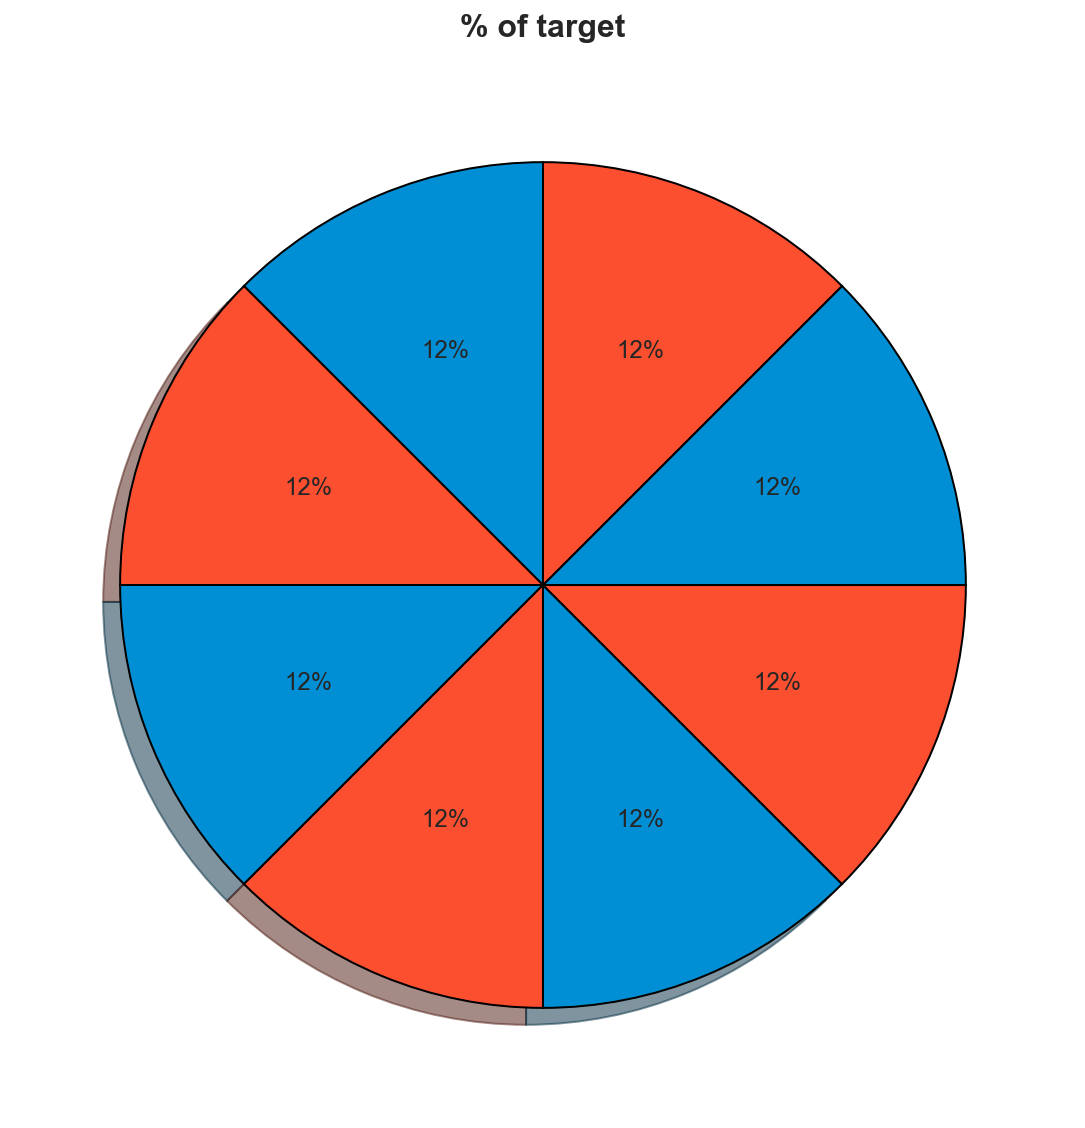

In [171]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
# plt.legend(loc='best', fontsize='medium')
plt.show()

# Preprocessing

To X, y

In [172]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [173]:
y = X.pop(TARGETNAME)

In [174]:
X.fillna('', inplace=True)

In [175]:
X.dtypes

augment0                object
augment1                object
augment2                object
Set7_Assassin          float32
Set7_Bruiser           float32
                        ...   
TFT7_Aatrox            float32
TFT7_Aatrox_item0       object
TFT7_Aatrox_item1       object
TFT7_Aatrox_item2       object
TFT7_Vladimir_item2     object
Length: 265, dtype: object

In [176]:
y.dtypes

dtype('int8')

In [177]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [372]:
X[numeric_cols]

Set7_Assassin  Set7_Bruiser  Set7_Cavalier  Set7_Guild  Set7_Legend  \
0                  1             1              1           3            0   
1                  0             1              0           0            0   
2                  0             0              0           0            0   
3                  0             1              0           0            0   
4                  0             2              0           0            0   
...              ...           ...            ...         ...          ...   
18219              0             0              0           1            0   
18220              1             1              2           4            0   
18221              0             1              0           0            0   
18222              0             1              0           2            0   
18223              0             0              0           0            0   

       Set7_Ragewing  Set7_Swiftshot  Set7_Tempest  Set7_Warrior  \
0                  1               1             0             0   
1                  0               0             0             0   
2                  0               0             0             0   
3                  0               0             2             0   
4                  0               0             1             1   
...              ...             ...           ...           ...   
18219              0               0             0             0   
18220              1               1             1             0   
18221              2               0             1             1   
18222              0               0             0             0   
18223              0               0             0             0   

       Set7_Whispers  ...  TFT7_Bard  TFT7_Kayn  TFT7_DragonBlue  TFT7_Lillia  \
0                  0  ...          0          0                0            0   
1                  0  ...          0          0                0            0   
2                  0  ...          0          0                0            0   
3                  0  ...          0          0                0            0   
4                  2  ...          0          0                0            0   
...              ...  ...        ...        ...              ...          ...   
18219              0  ...          1          0                0            0   
18220              0  ...          0          0                0            0   
18221              0  ...          0          0                0            0   
18222              0  ...          0          0                0            0   
18223              0  ...          0          0                2            0   

       TFT7_Yone  TFT7_Ezreal  TFT7_Leona  TFT7_Taric  TFT7_Senna  TFT7_Aatrox  
0              0            0           0           0           0            0  
1              0            0           0           0           0            0  
2              0            0           0           0           0            0  
3              0            0           0           0           0            0  
4              0            0           0           0           0            0  
...          ...          ...         ...         ...         ...          ...  
18219          0            0           0           0           0            0  
18220          0            0           0           0           0            0  
18221          0            0           0           0           0            0  
18222          0            0           0           0           0            0  
18223          2            0           2           2           0            0  

[18224 rows x 87 columns]

In [374]:
len(numeric_cols)

87

In [376]:
traits_col = [s for s in numeric_cols if "Set7" in s]

In [377]:
traits_col

['Set7_Assassin',
 'Set7_Bruiser',
 'Set7_Cavalier',
 'Set7_Guild',
 'Set7_Legend',
 'Set7_Ragewing',
 'Set7_Swiftshot',
 'Set7_Tempest',
 'Set7_Warrior',
 'Set7_Whispers',
 'Set7_Astral',
 'Set7_Dragon',
 'Set7_Evoker',
 'Set7_Mage',
 'Set7_Mystic',
 'Set7_Shapeshifter',
 'Set7_Cannoneer',
 'Set7_Dragonmancer',
 'Set7_Jade',
 'Set7_Mirage',
 'Set7_Revel',
 'Set7_Shimmerscale',
 'Set7_SpellThief',
 'Set7_Trainer',
 'Set7_Scalescorn',
 'Set7_Starcaller',
 'Set7_Guardian',
 'Set7_Bard']

In [309]:
df_unique = X.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']

In [ ]:
df_unique.to_csv('df_unique.csv')

In [366]:
items_col = set(categorical_cols) - {'augment0', 'augment1', 'augment2'}

In [368]:
len(items_col)

175

In [369]:
unique_items_set = {y for col in items_col for y in X[col].unique().tolist()}

In [356]:
unique_augments_set = {y for col in ['augment0', 'augment1', 'augment2'] for y in X[col].unique().tolist()}

In [371]:
len(unique_items_set)

128

In [178]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [179]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18224 entries, 0 to 18223
Columns: 265 entries, augment0 to TFT7_Vladimir_item2
dtypes: int64(87), object(178)
memory usage: 36.8+ MB


In [181]:
X

augment0                         augment1  \
0        TFT6_Augment_MetabolicAccelerator     TFT6_Augment_HighEndShopping   
1                 TFT7_Augment_MikaelsGift       TFT6_Augment_RadiantRelics   
2                  TFT6_Augment_Traitless2    TFT6_Augment_CyberneticShell3   
3                 TFT6_Augment_TradeSector        TFT7_Augment_UrfsGrabBag2   
4      TFT7_Augment_BruiserTitanicStrength        TFT6_Augment_ItemGrabBag2   
...                                    ...                              ...   
18219            TFT7_Augment_RevelEmblem2         TFT6_Augment_LudensEcho2   
18220             TFT6_Augment_LudensEcho3         TFT7_Augment_GuildEmblem   
18221           TFT6_Augment_RadiantRelics  TFT7_Augment_DragonmancerEmblem   
18222            TFT7_Augment_GuildEmblem2     TFT6_Augment_TradeSectorPlus   
18223         TFT7_Augment_SacrificialPact        TFT7_Augment_GadgetExpert   

                            augment2  Set7_Assassin  Set7_Bruiser  \
0      TFT6_Augment_ComponentGrabBag              1             1   
1      TFT6_Augment_CyberneticShell2              0             1   
2          TFT6_Augment_SunfireBoard              0             0   
3           TFT6_Augment_Meditation2              0             1   
4           TFT6_Augment_SecondWind2              0             2   
...                              ...            ...           ...   
18219  TFT6_Augment_ThrillOfTheHunt2              0             0   
18220       TFT7_Augment_MikaelsGift              1             1   
18221      TFT6_Augment_JeweledLotus              0             1   
18222  TFT6_Augment_ComponentGrabBag              0             1   
18223       TFT6_Augment_SecondWind2              0             0   

       Set7_Cavalier  Set7_Guild  Set7_Legend  Set7_Ragewing  Set7_Swiftshot  \
0                  1           3            0              1               1   
1                  0           0            0              0               0   
2                  0           0            0              0               0   
3                  0           0            0              0               0   
4                  0           0            0              0               0   
...              ...         ...          ...            ...             ...   
18219              0           1            0              0               0   
18220              2           4            0              1               1   
18221              0           0            0              2               0   
18222              0           2            0              0               0   
18223              0           0            0              0               0   

       ...  TFT7_Senna_item0  TFT7_Senna_item1  TFT7_Senna_item2  \
0      ...              None              None              None   
1      ...              None              None              None   
2      ...              None              None              None   
3      ...              None              None              None   
4      ...              None              None              None   
...    ...               ...               ...               ...   
18219  ...              None              None              None   
18220  ...              None              None              None   
18221  ...              None              None              None   
18222  ...              None              None              None   
18223  ...              None              None              None   

       TFT7_Thresh_item1  TFT7_Thresh_item2 TFT7_Aatrox  TFT7_Aatrox_item0  \
0                   None               None           0               None   
1                   None               None           0               None   
2                   None               None           0               None   
3                   None               None           0               None   
4                   None               None           0               None   
...       

# Data Analysis

## Traits

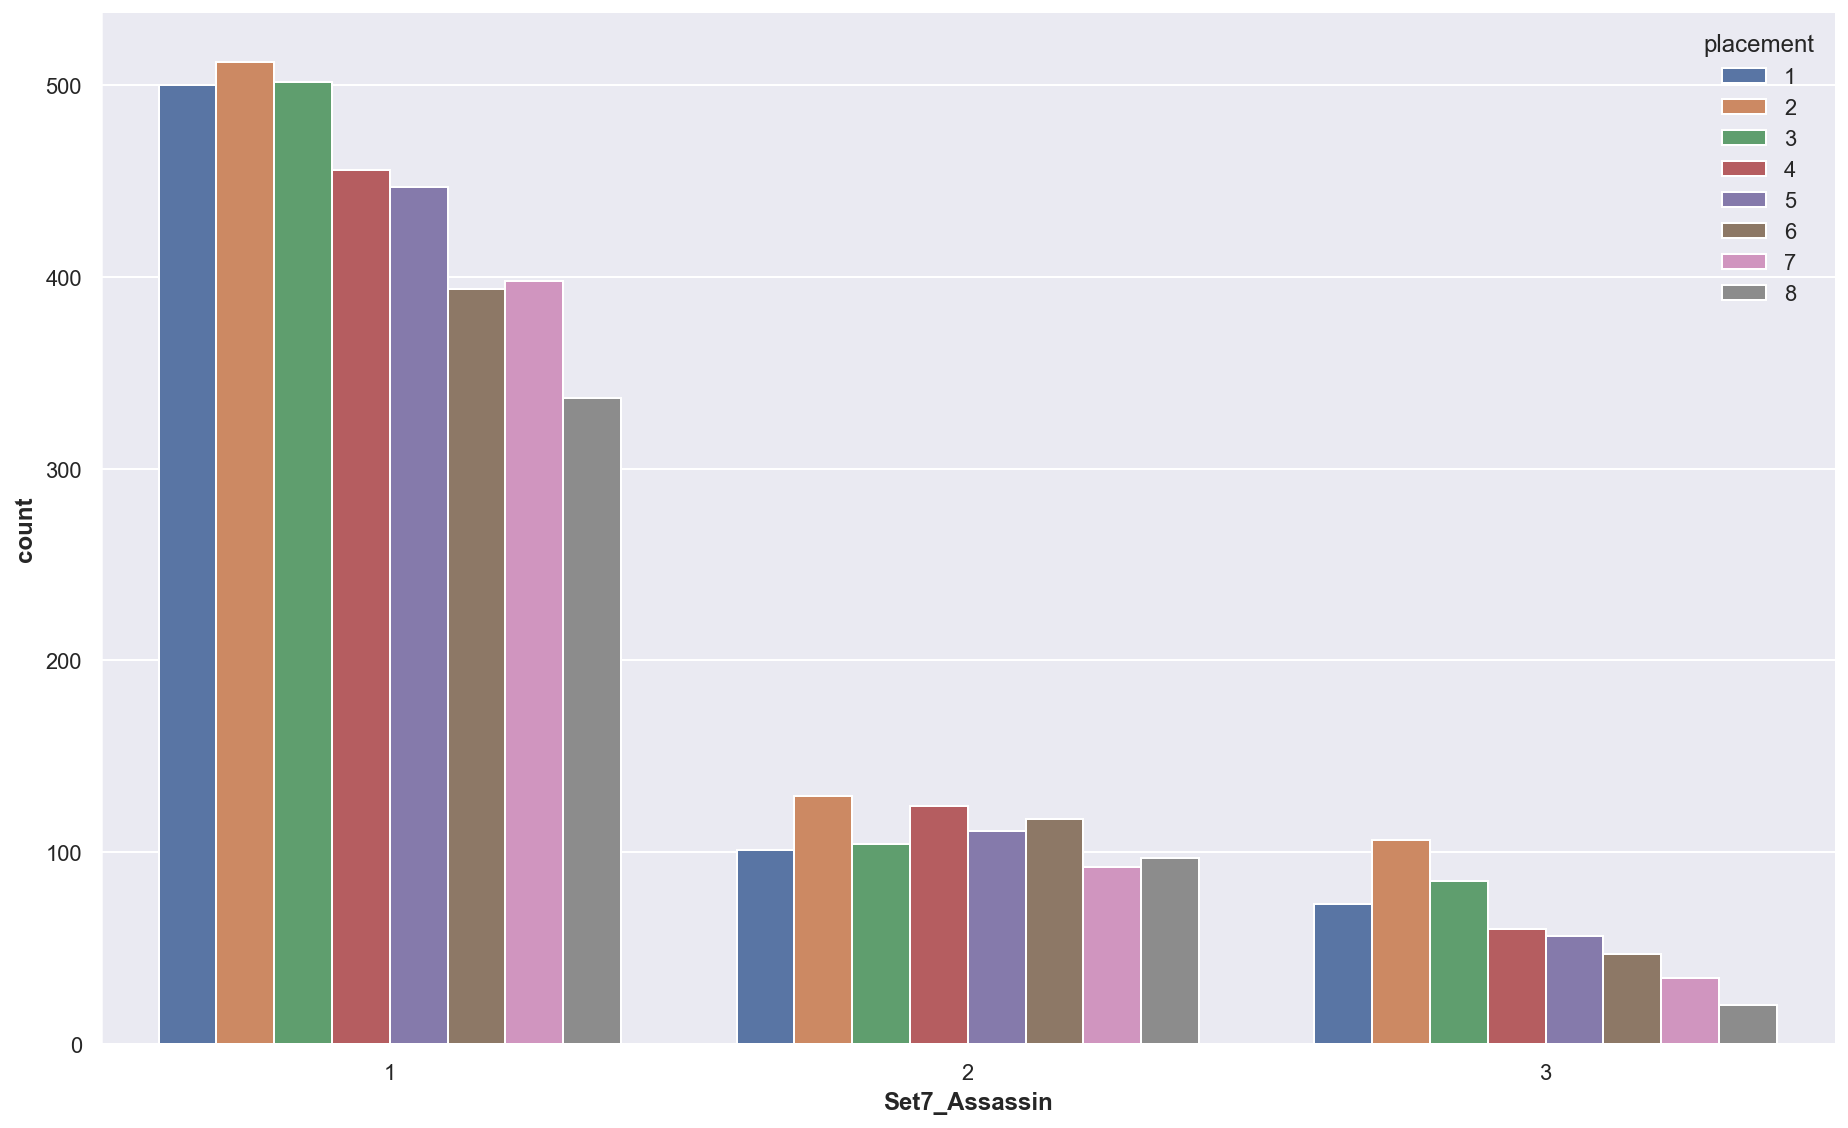

In [182]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

Worst Trait.

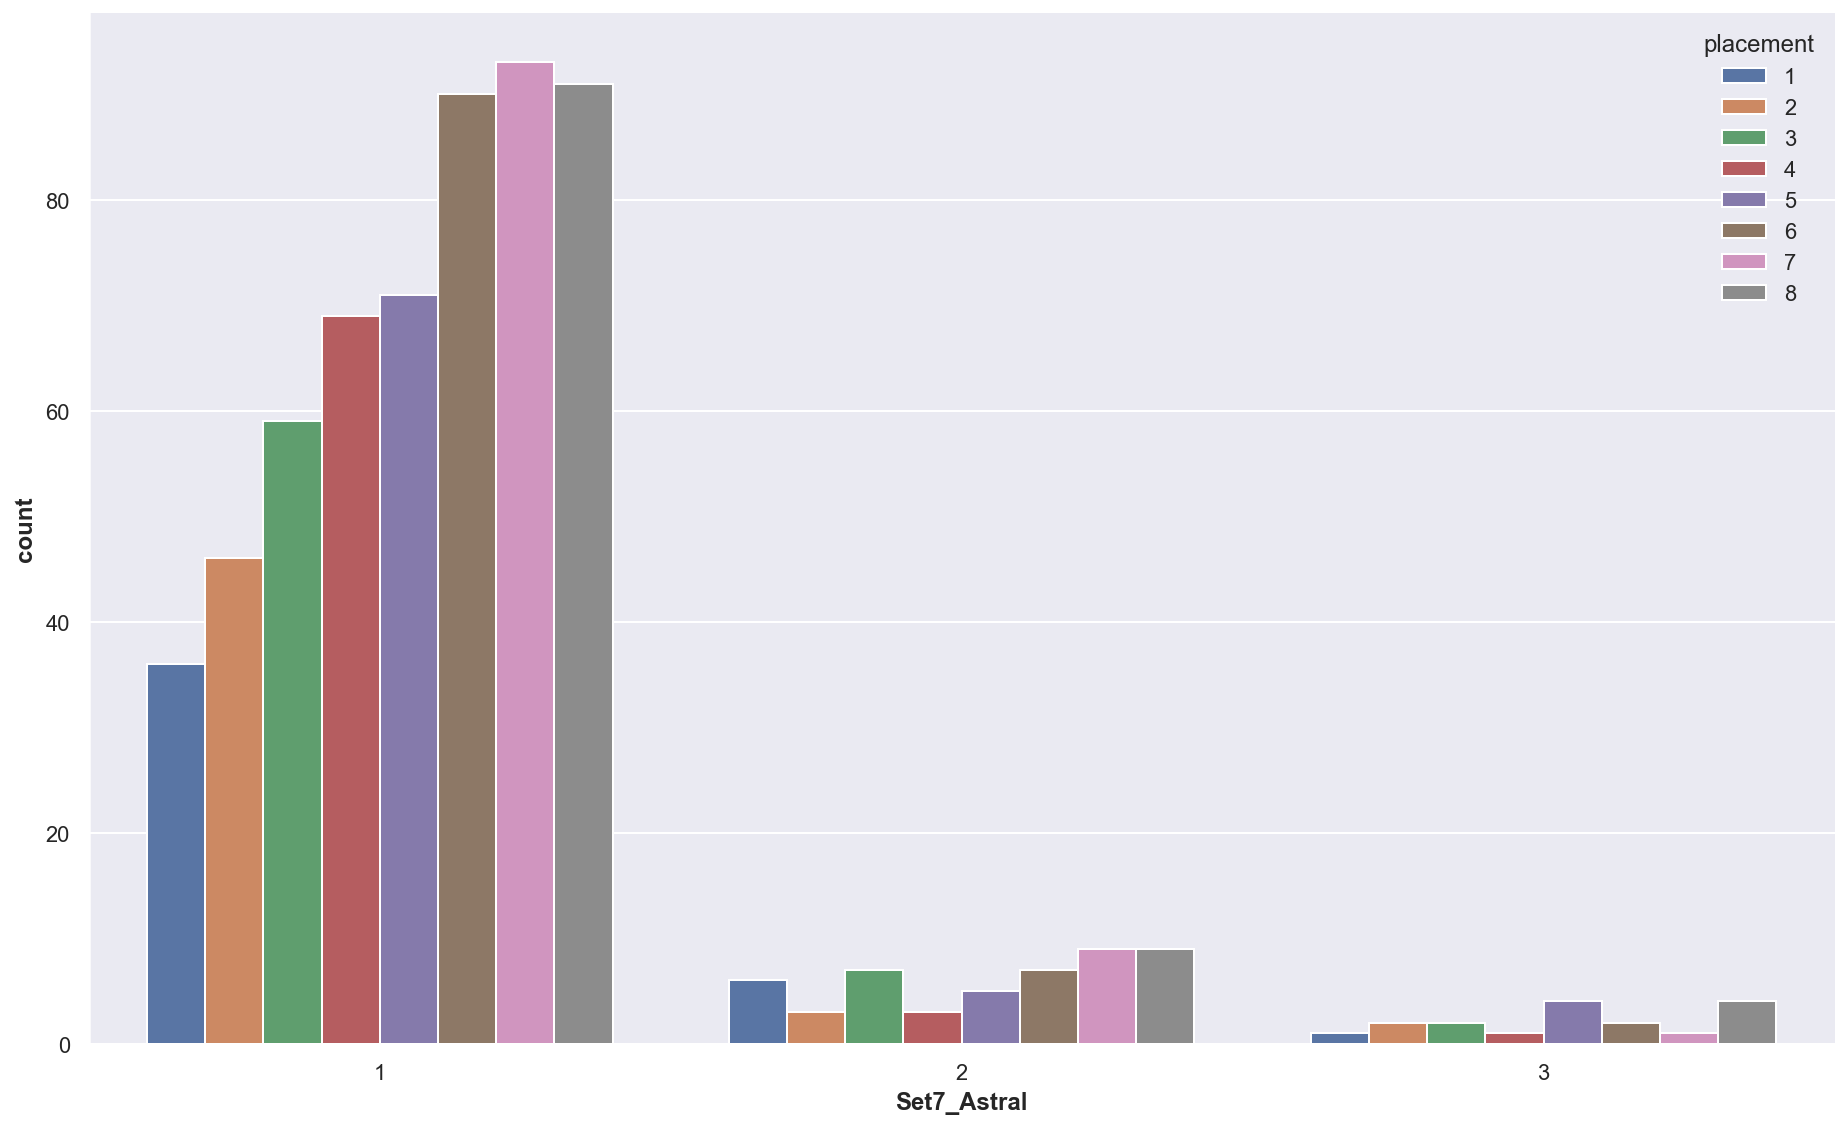

In [183]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Astral']>0], x='Set7_Astral', hue=TARGETNAME)
sns.despine()

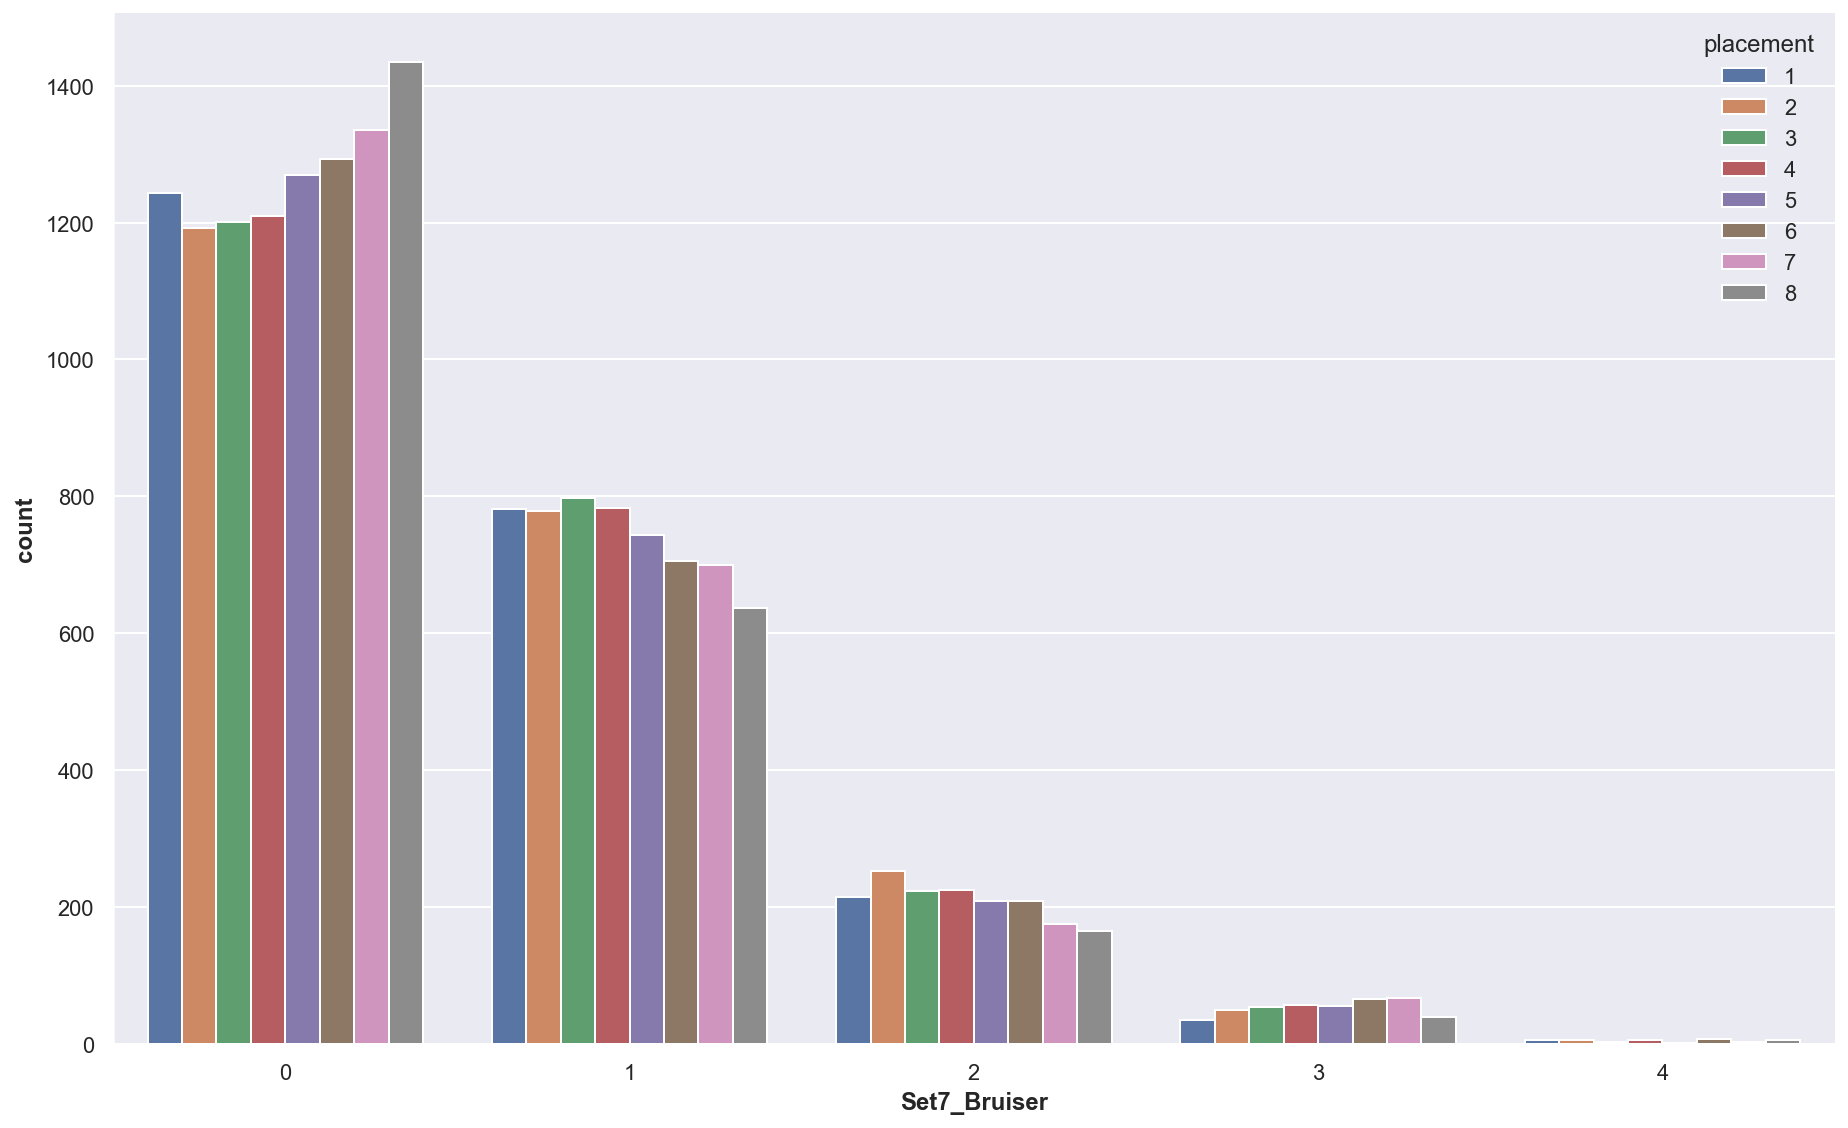

In [184]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

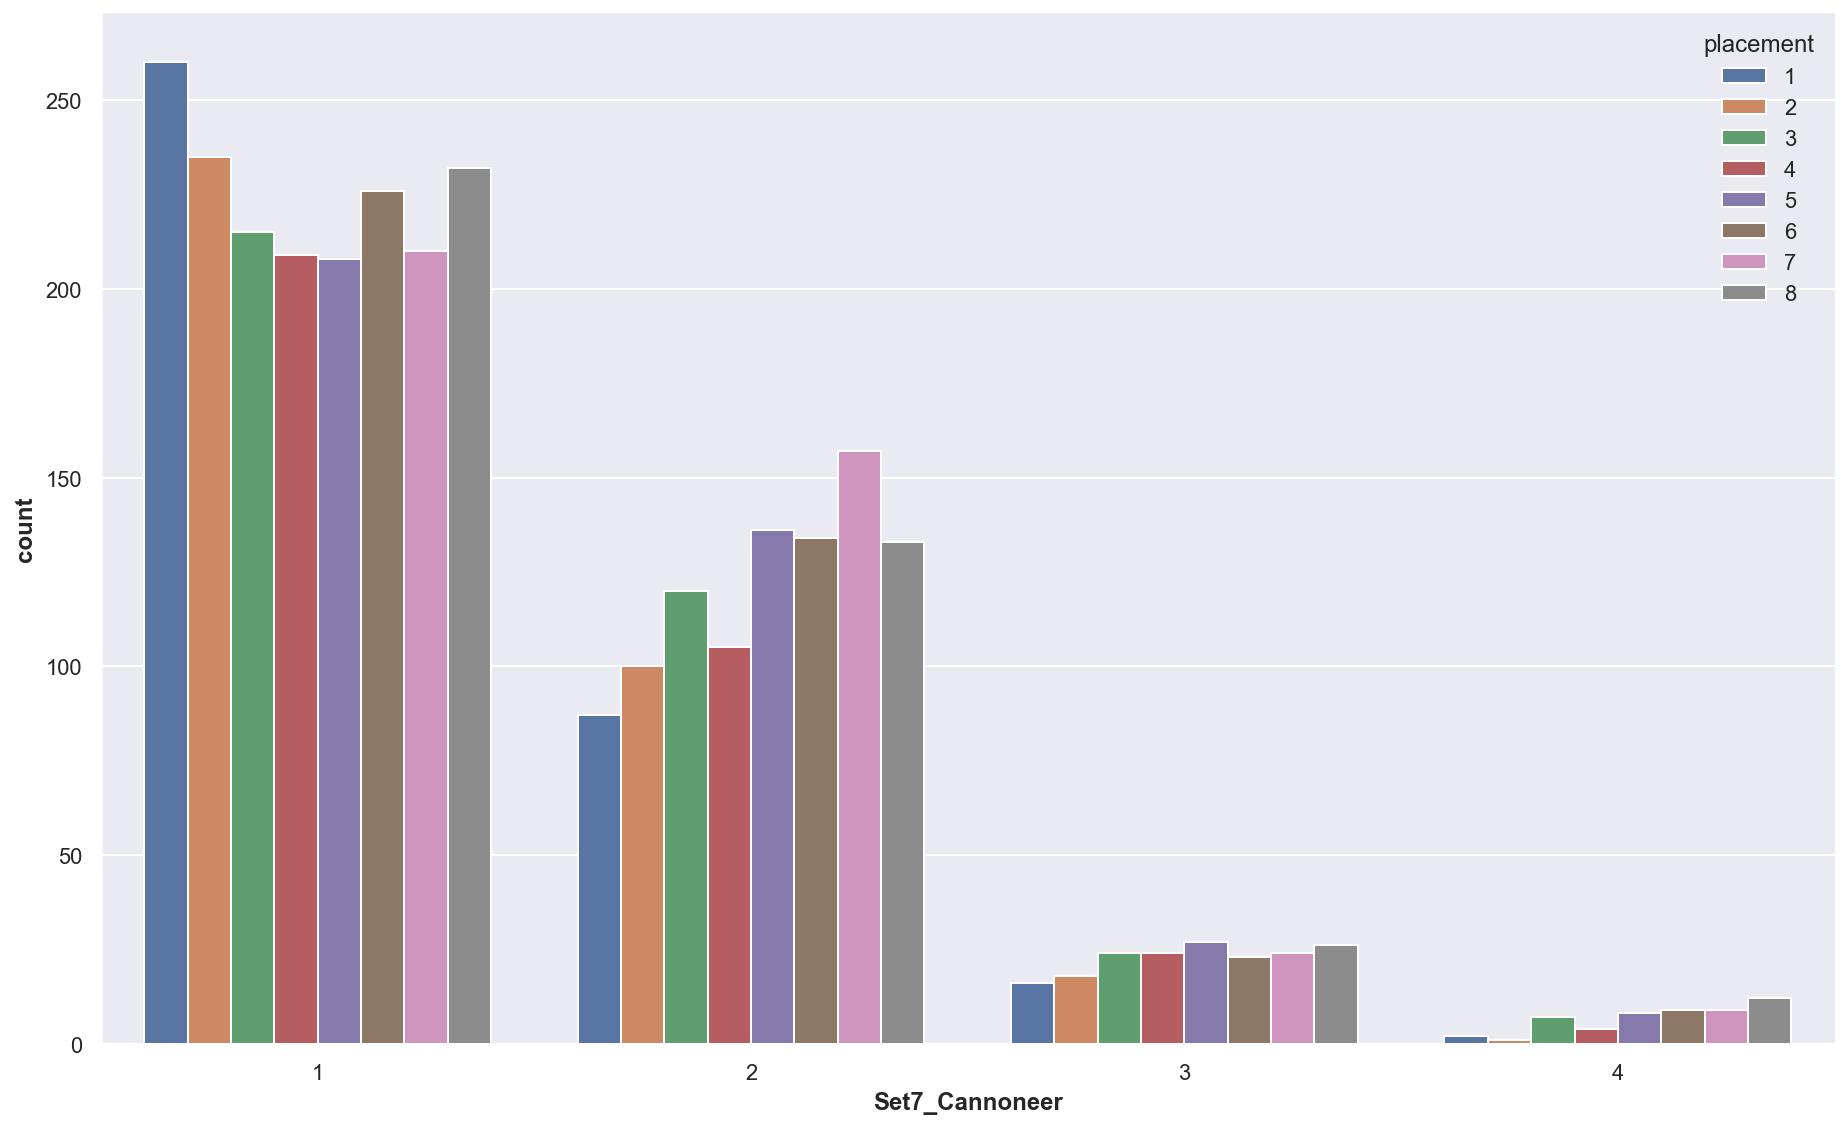

In [185]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

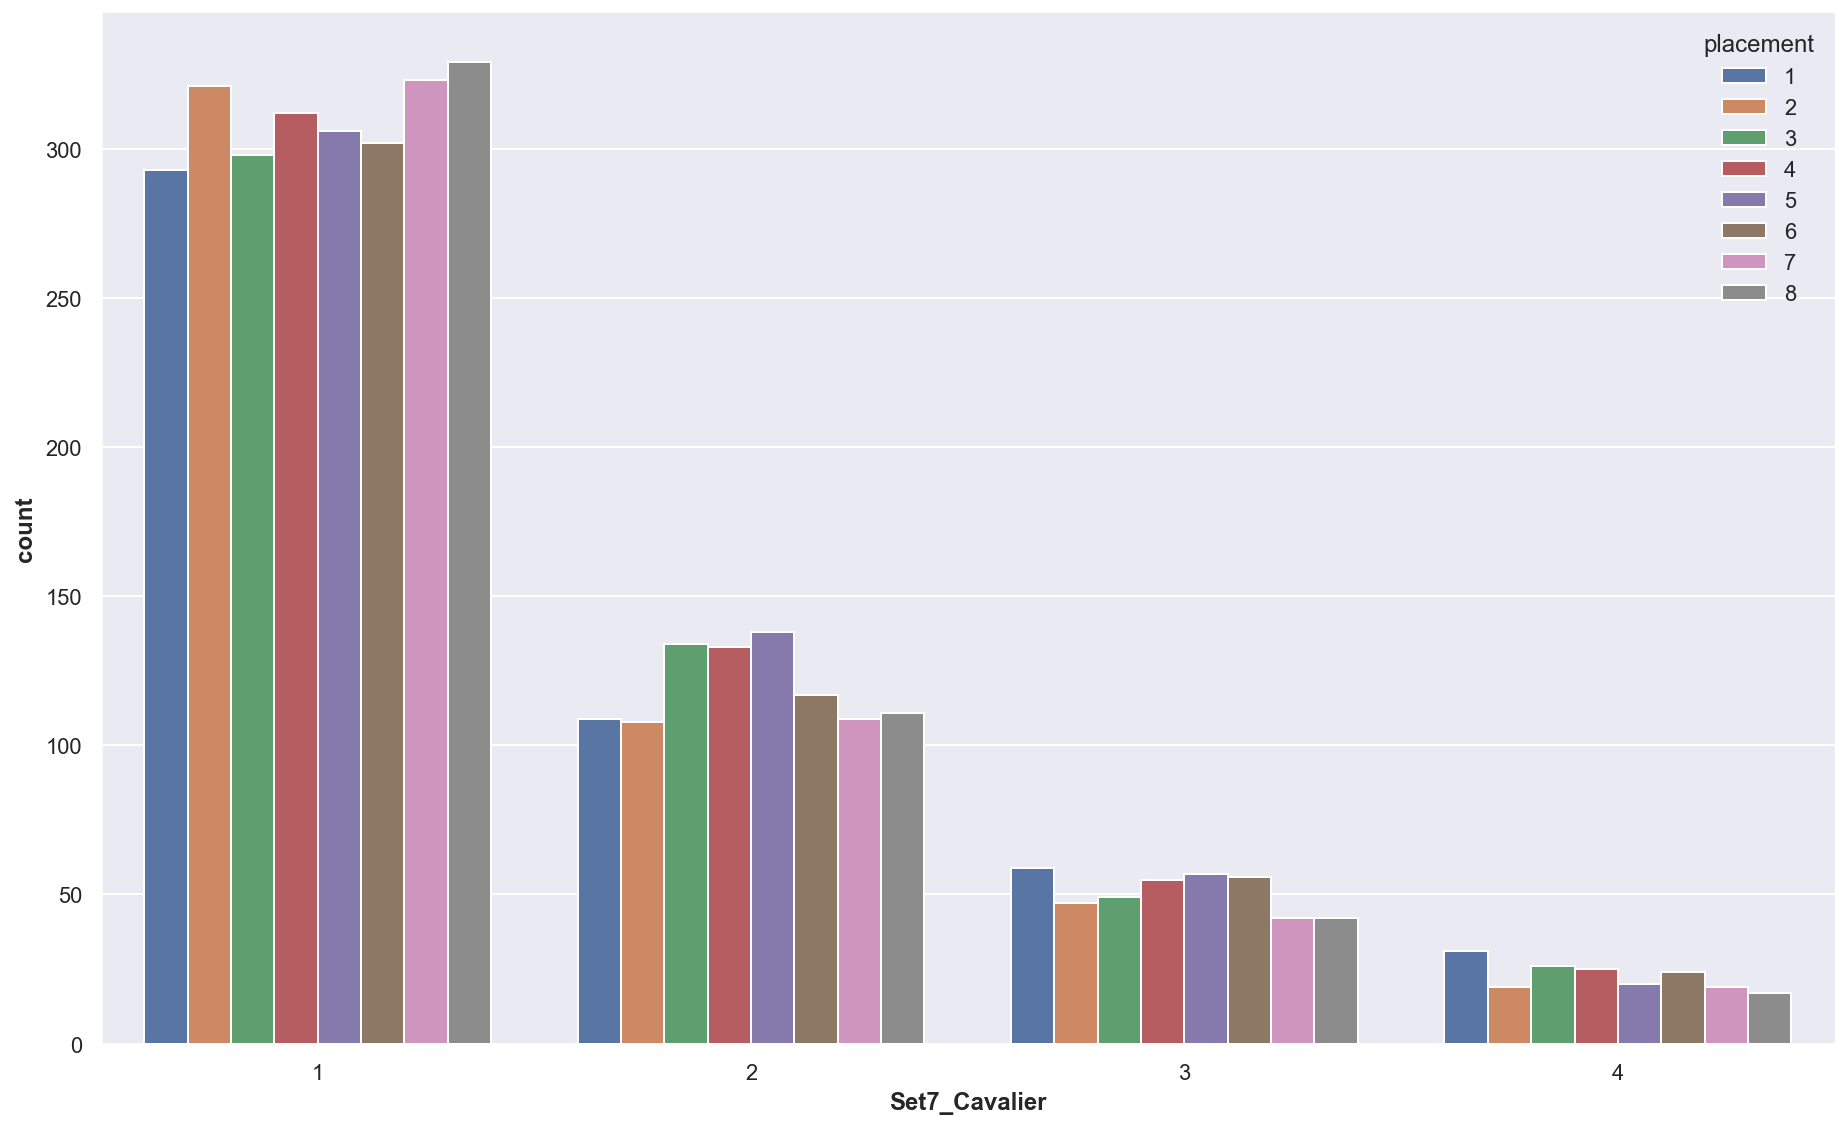

In [186]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

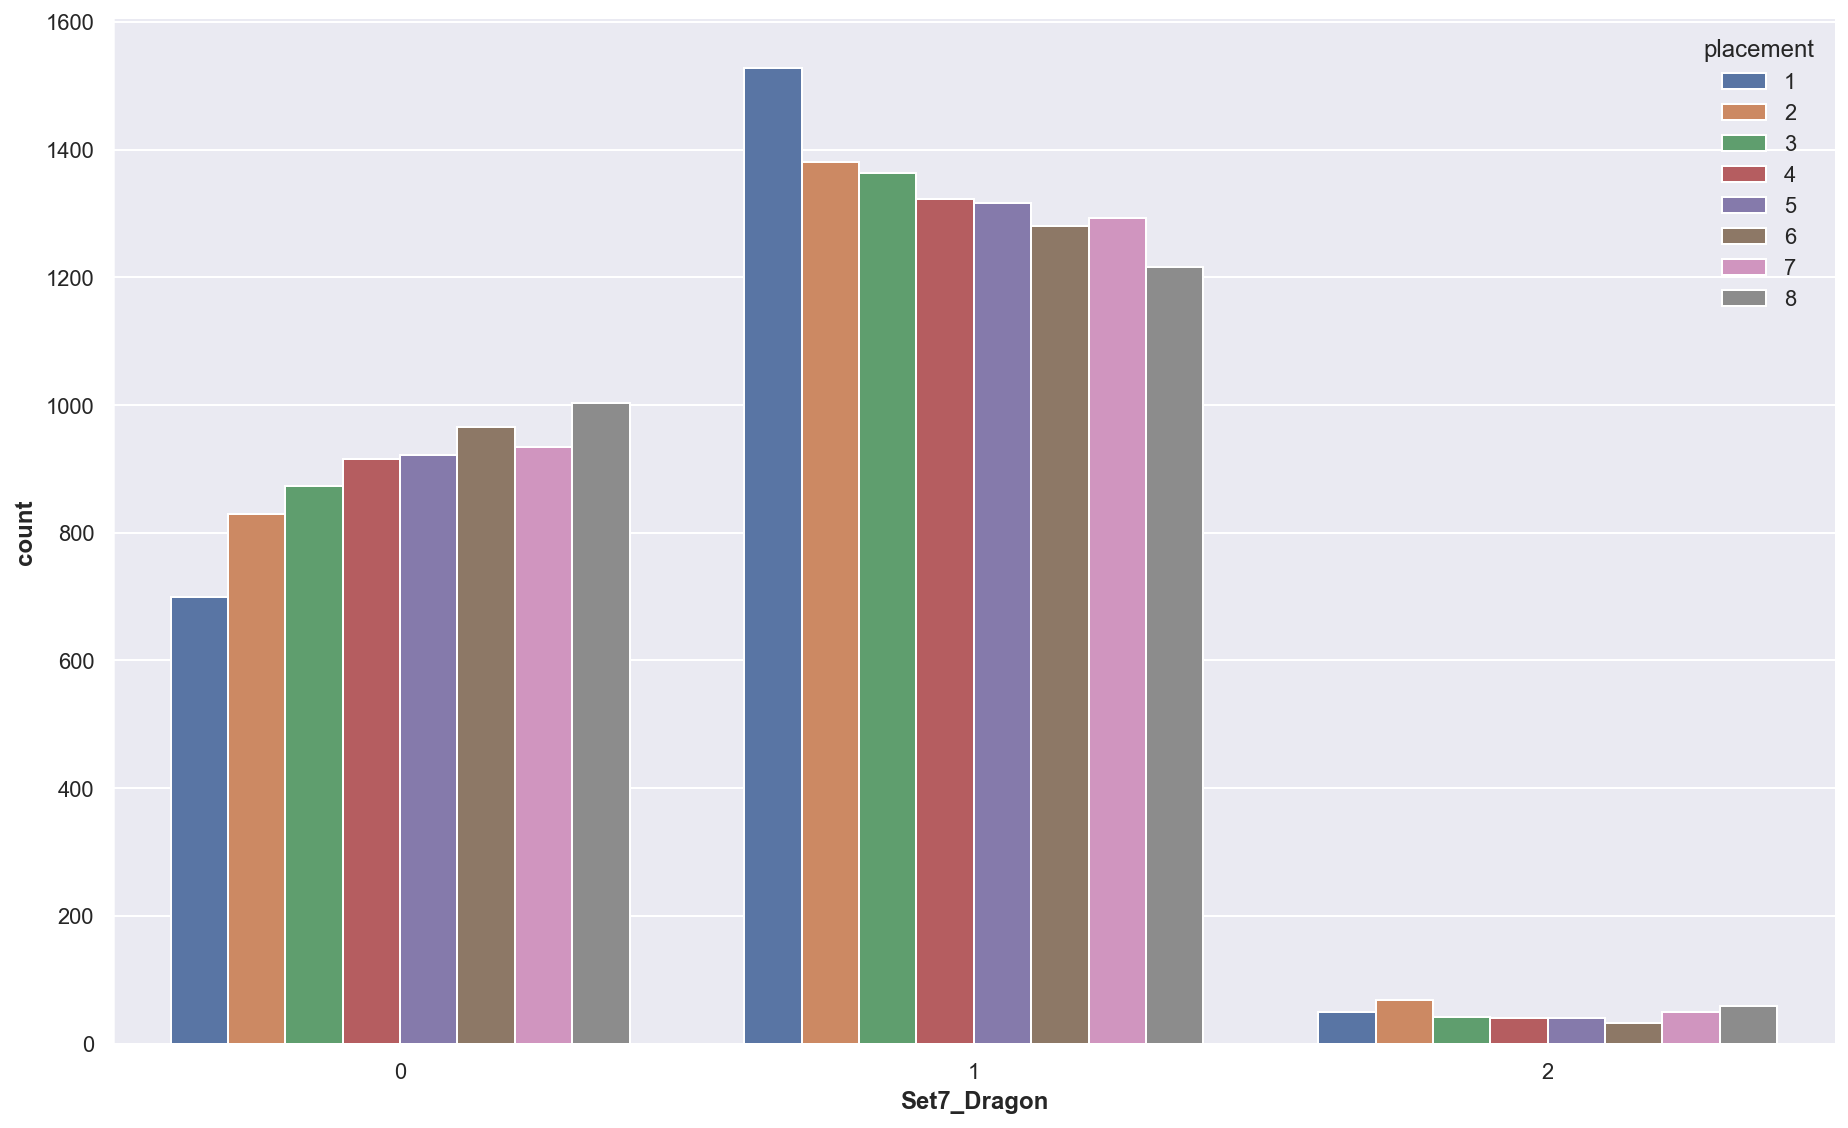

In [187]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragon']>=0], x='Set7_Dragon', hue=TARGETNAME)
sns.despine()

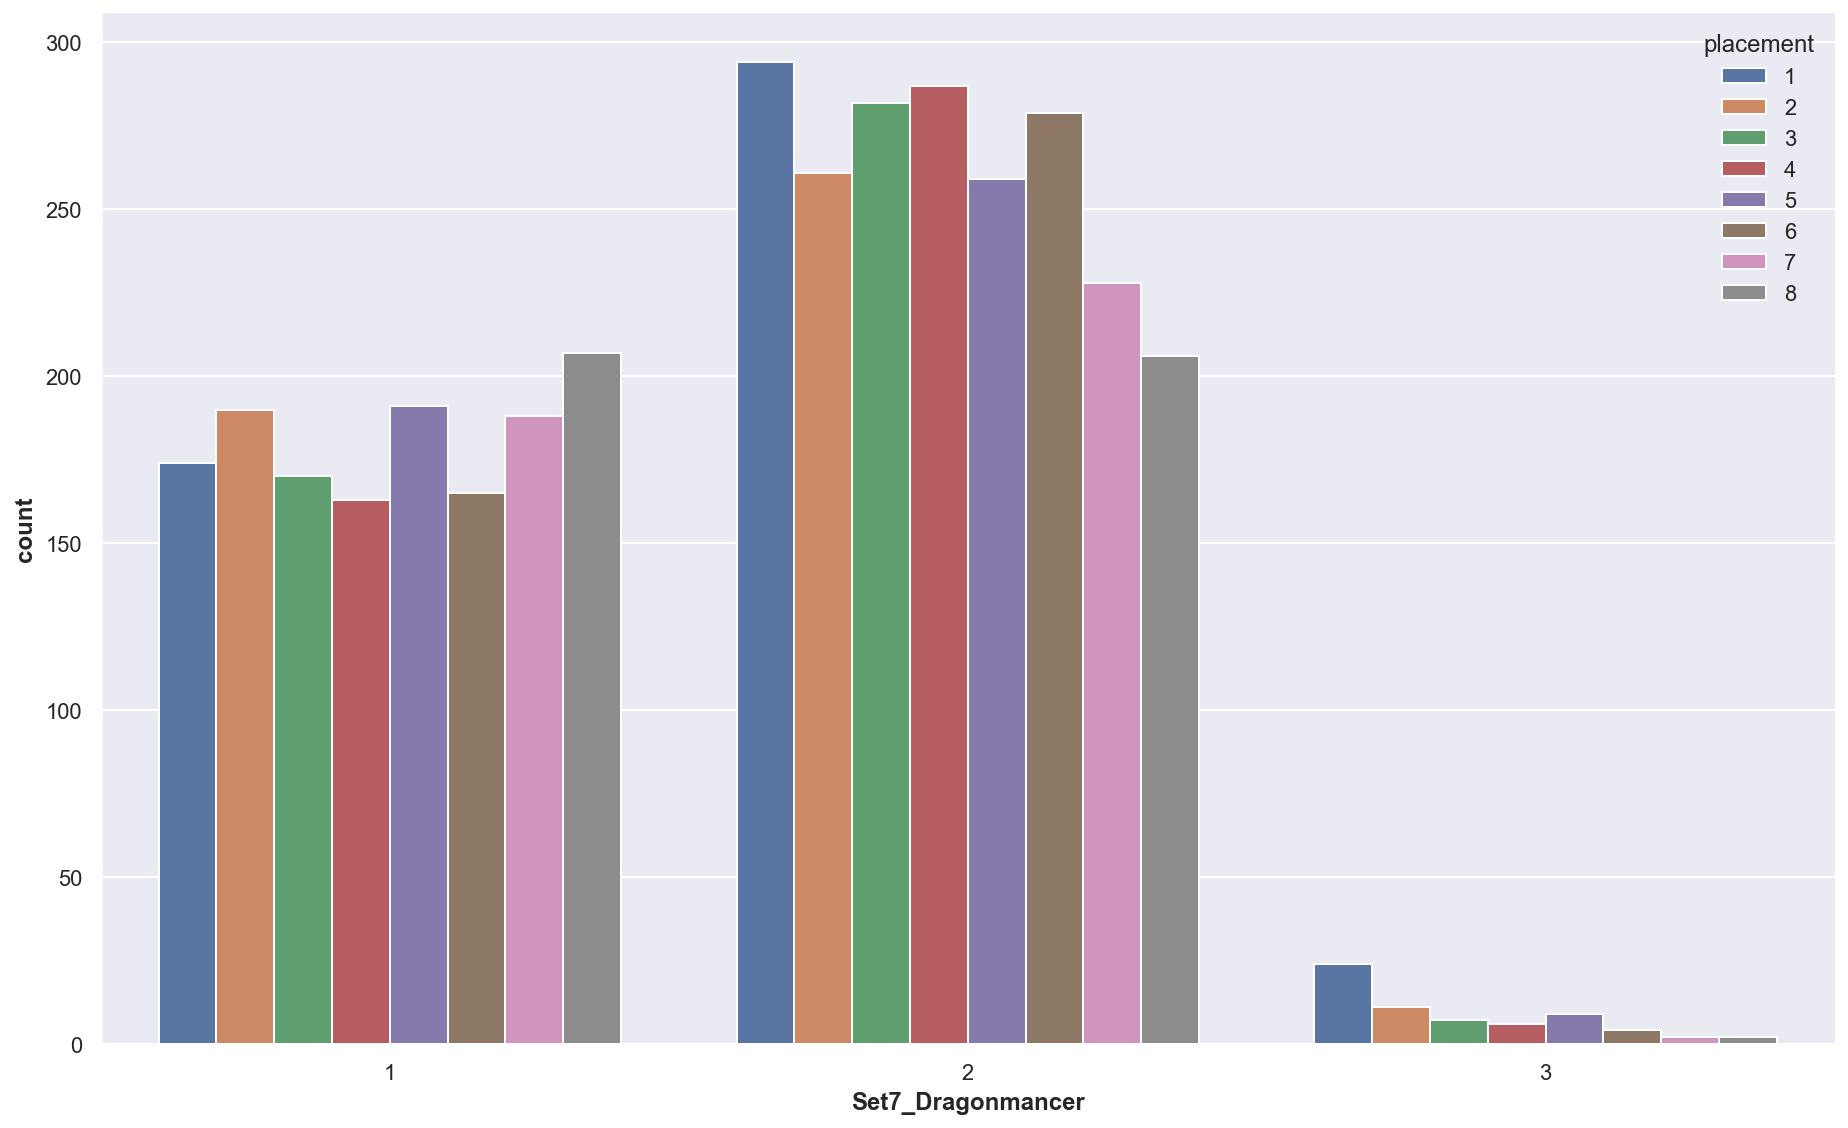

In [188]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

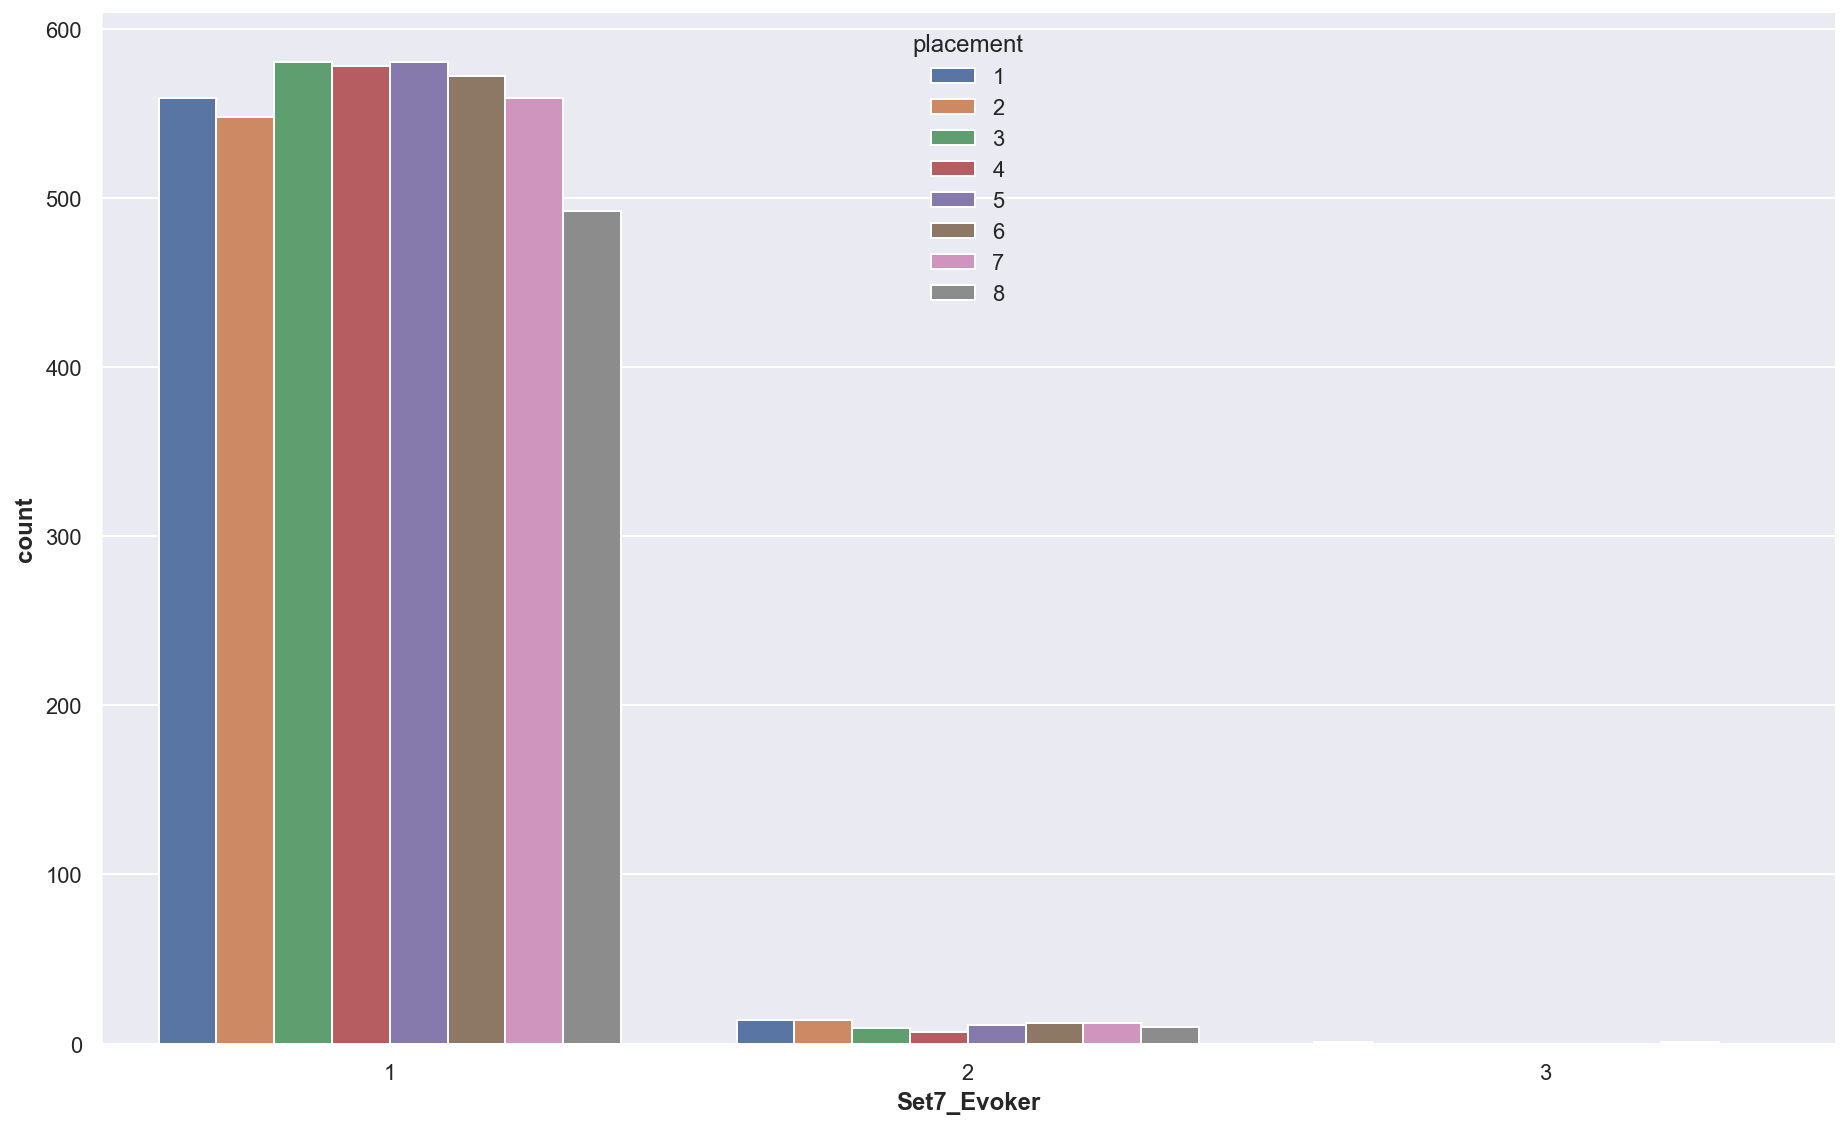

In [189]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

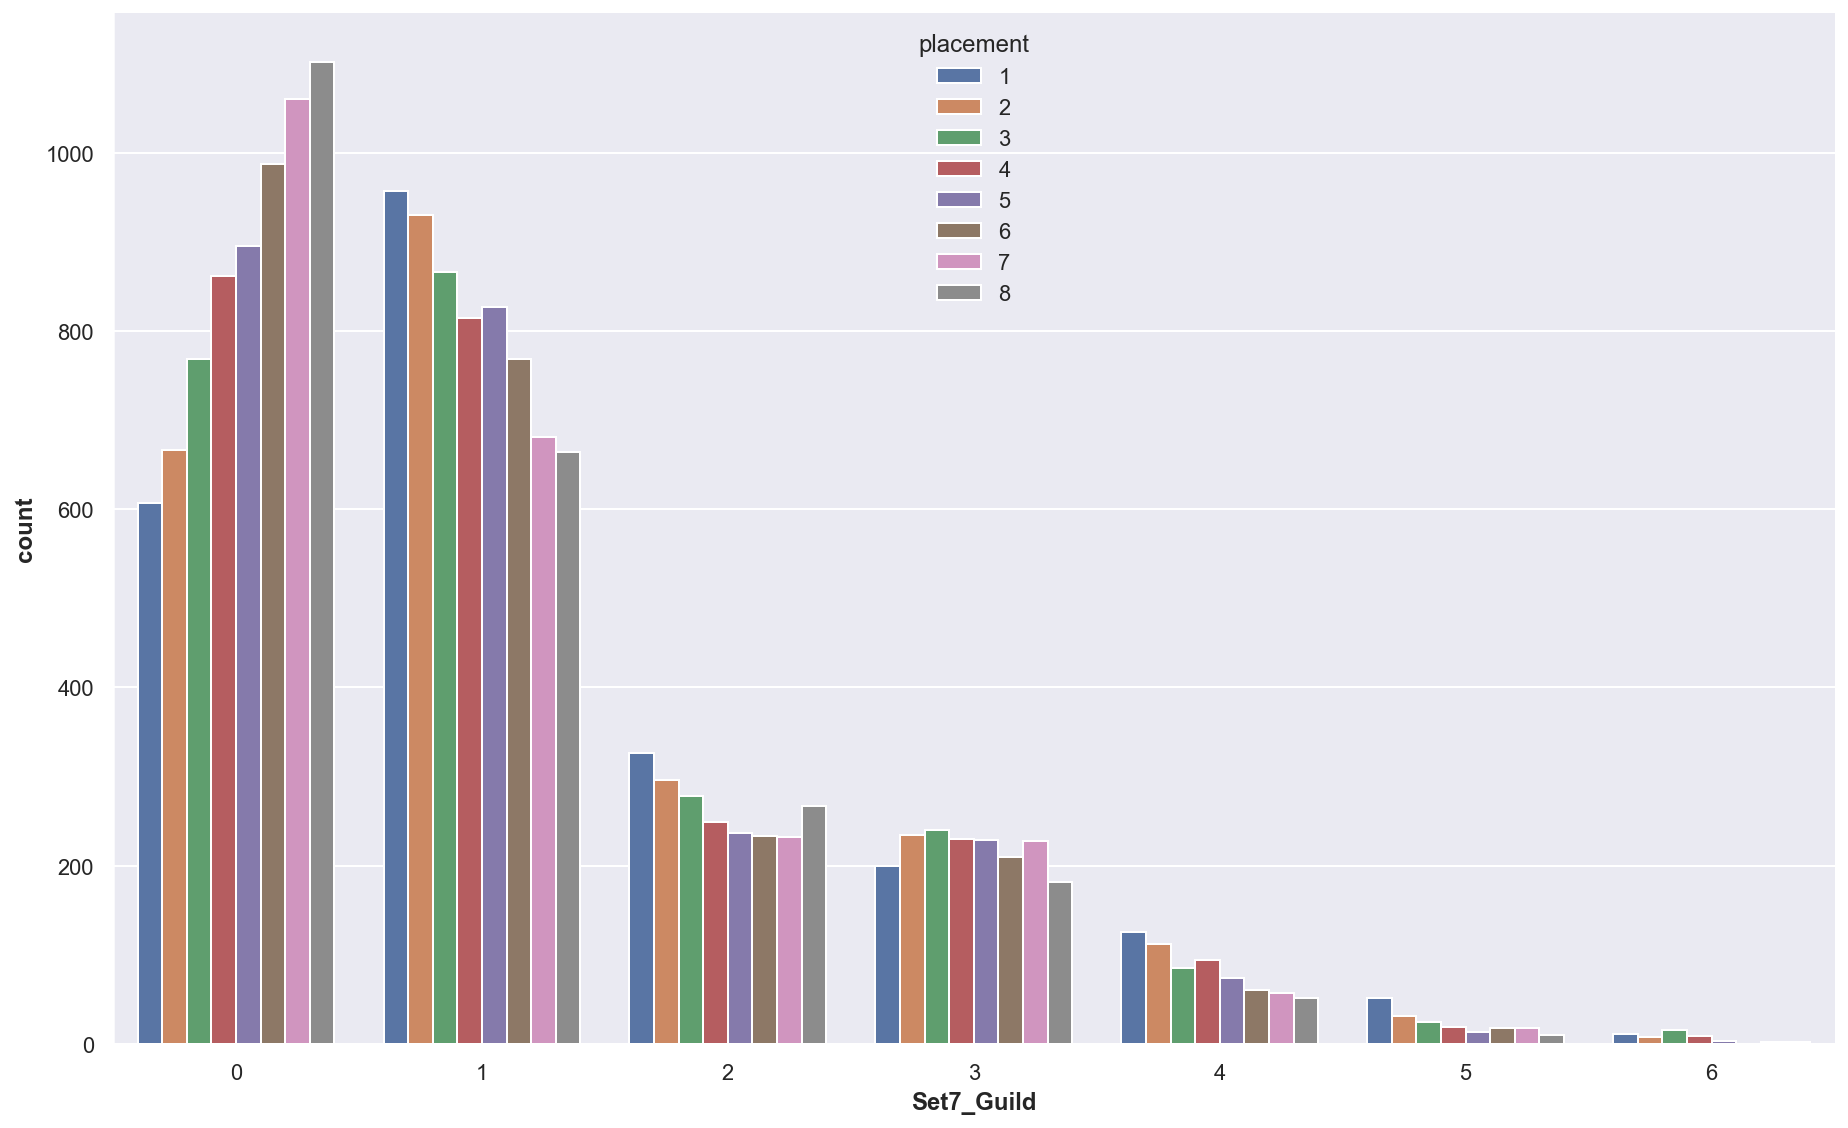

In [190]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

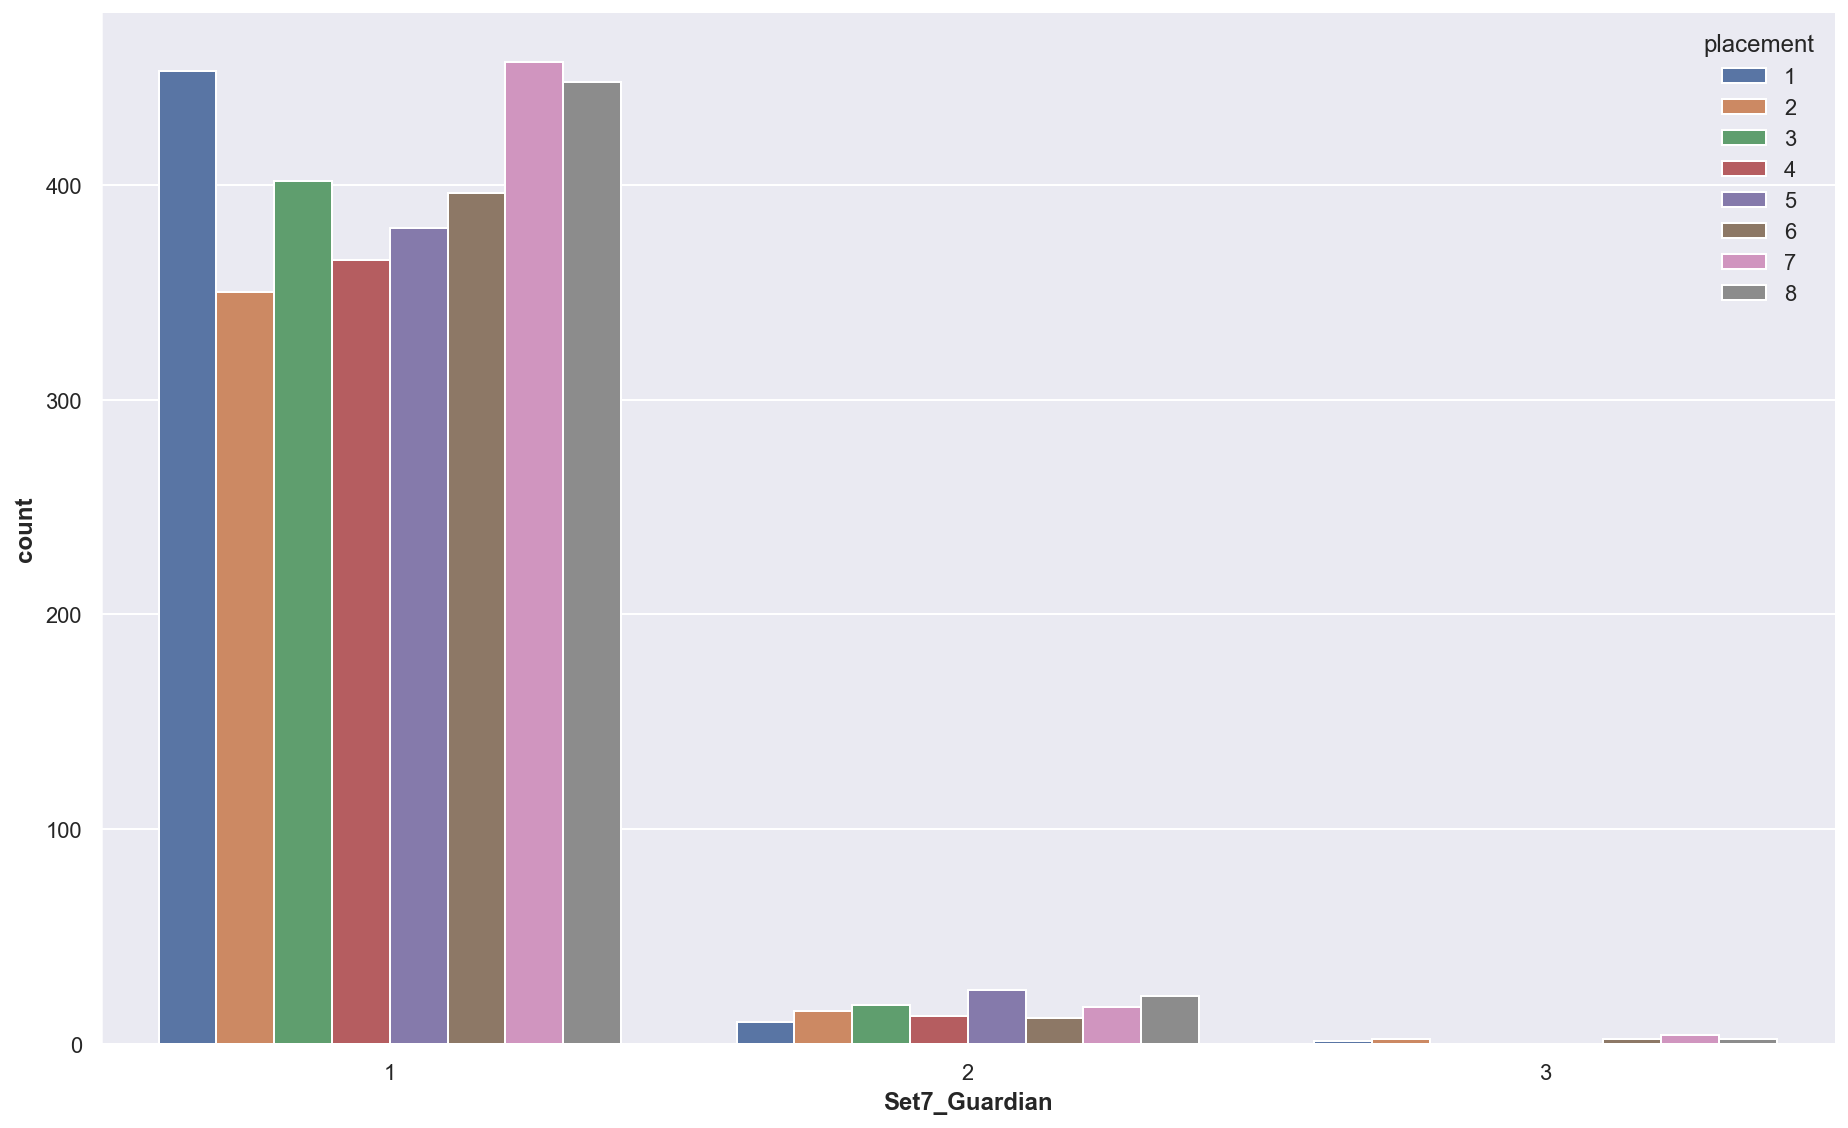

In [191]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

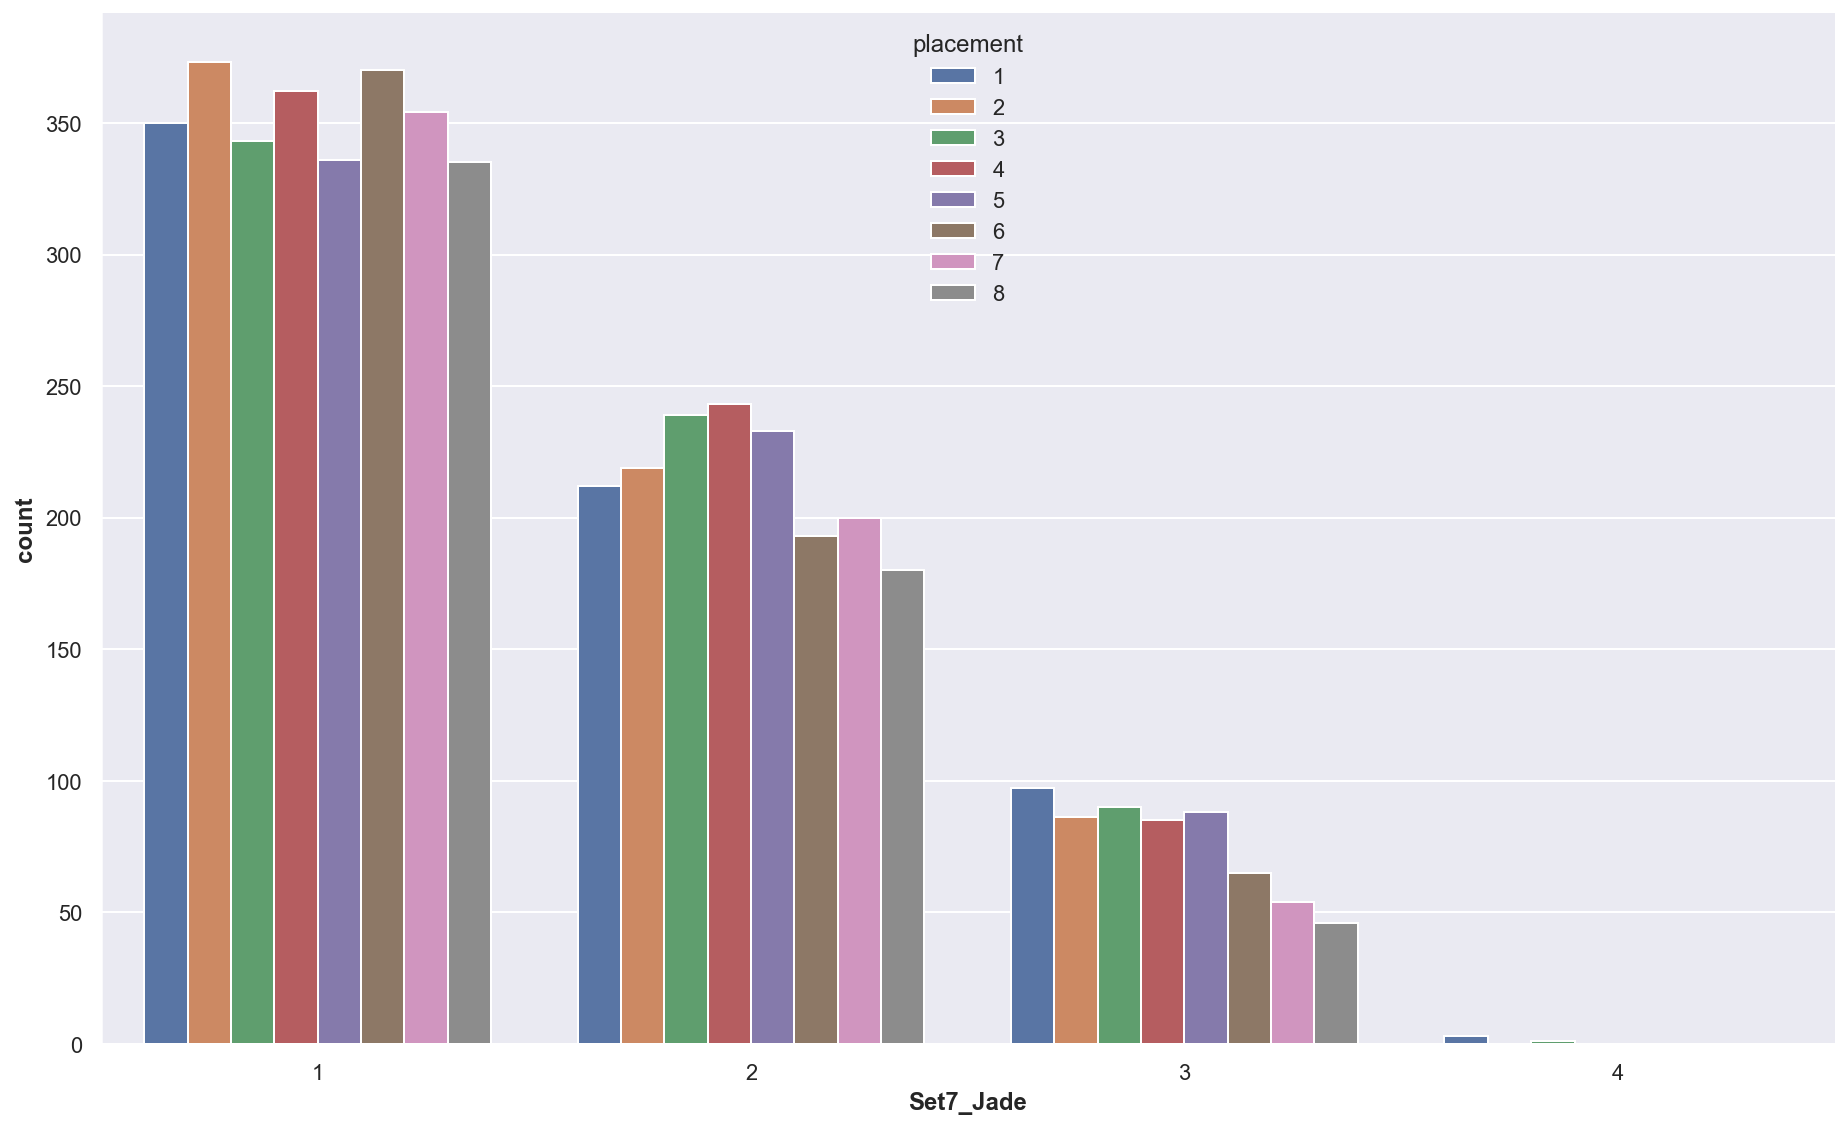

In [192]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

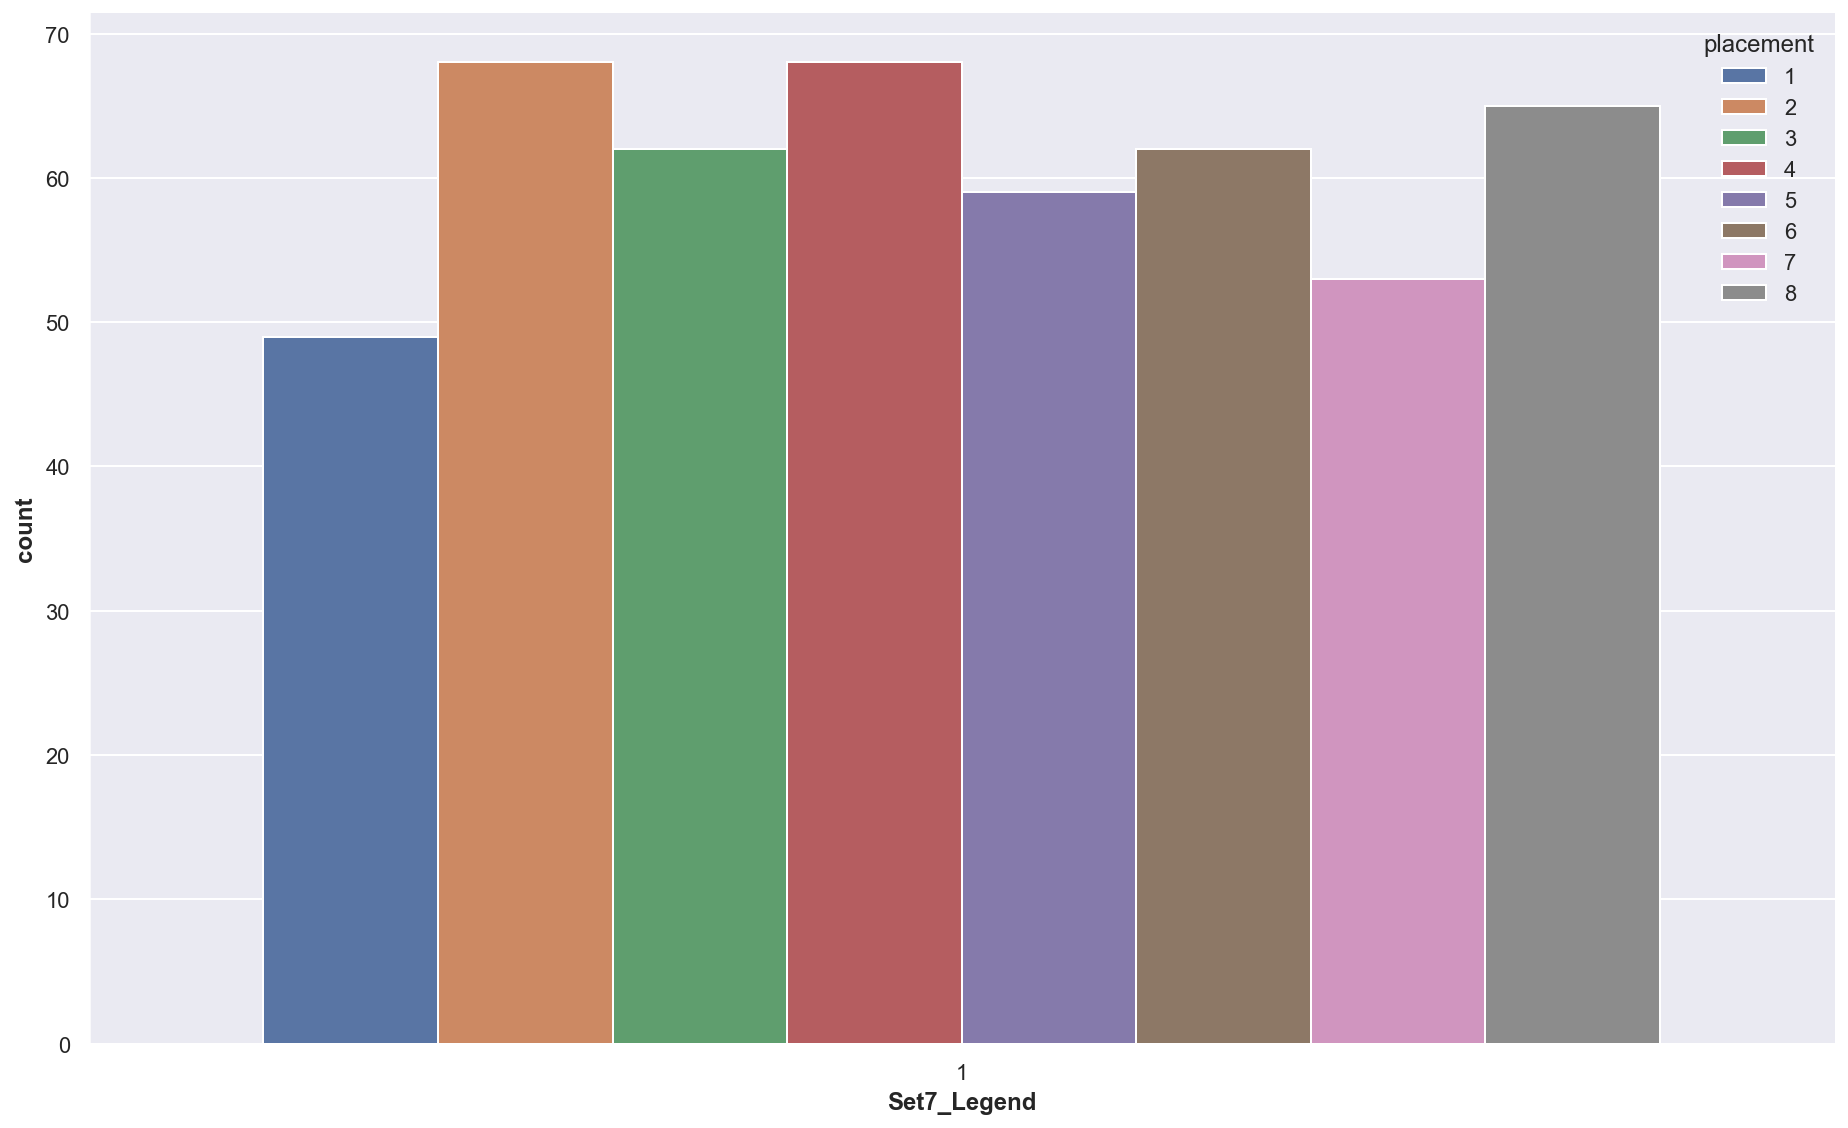

In [193]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

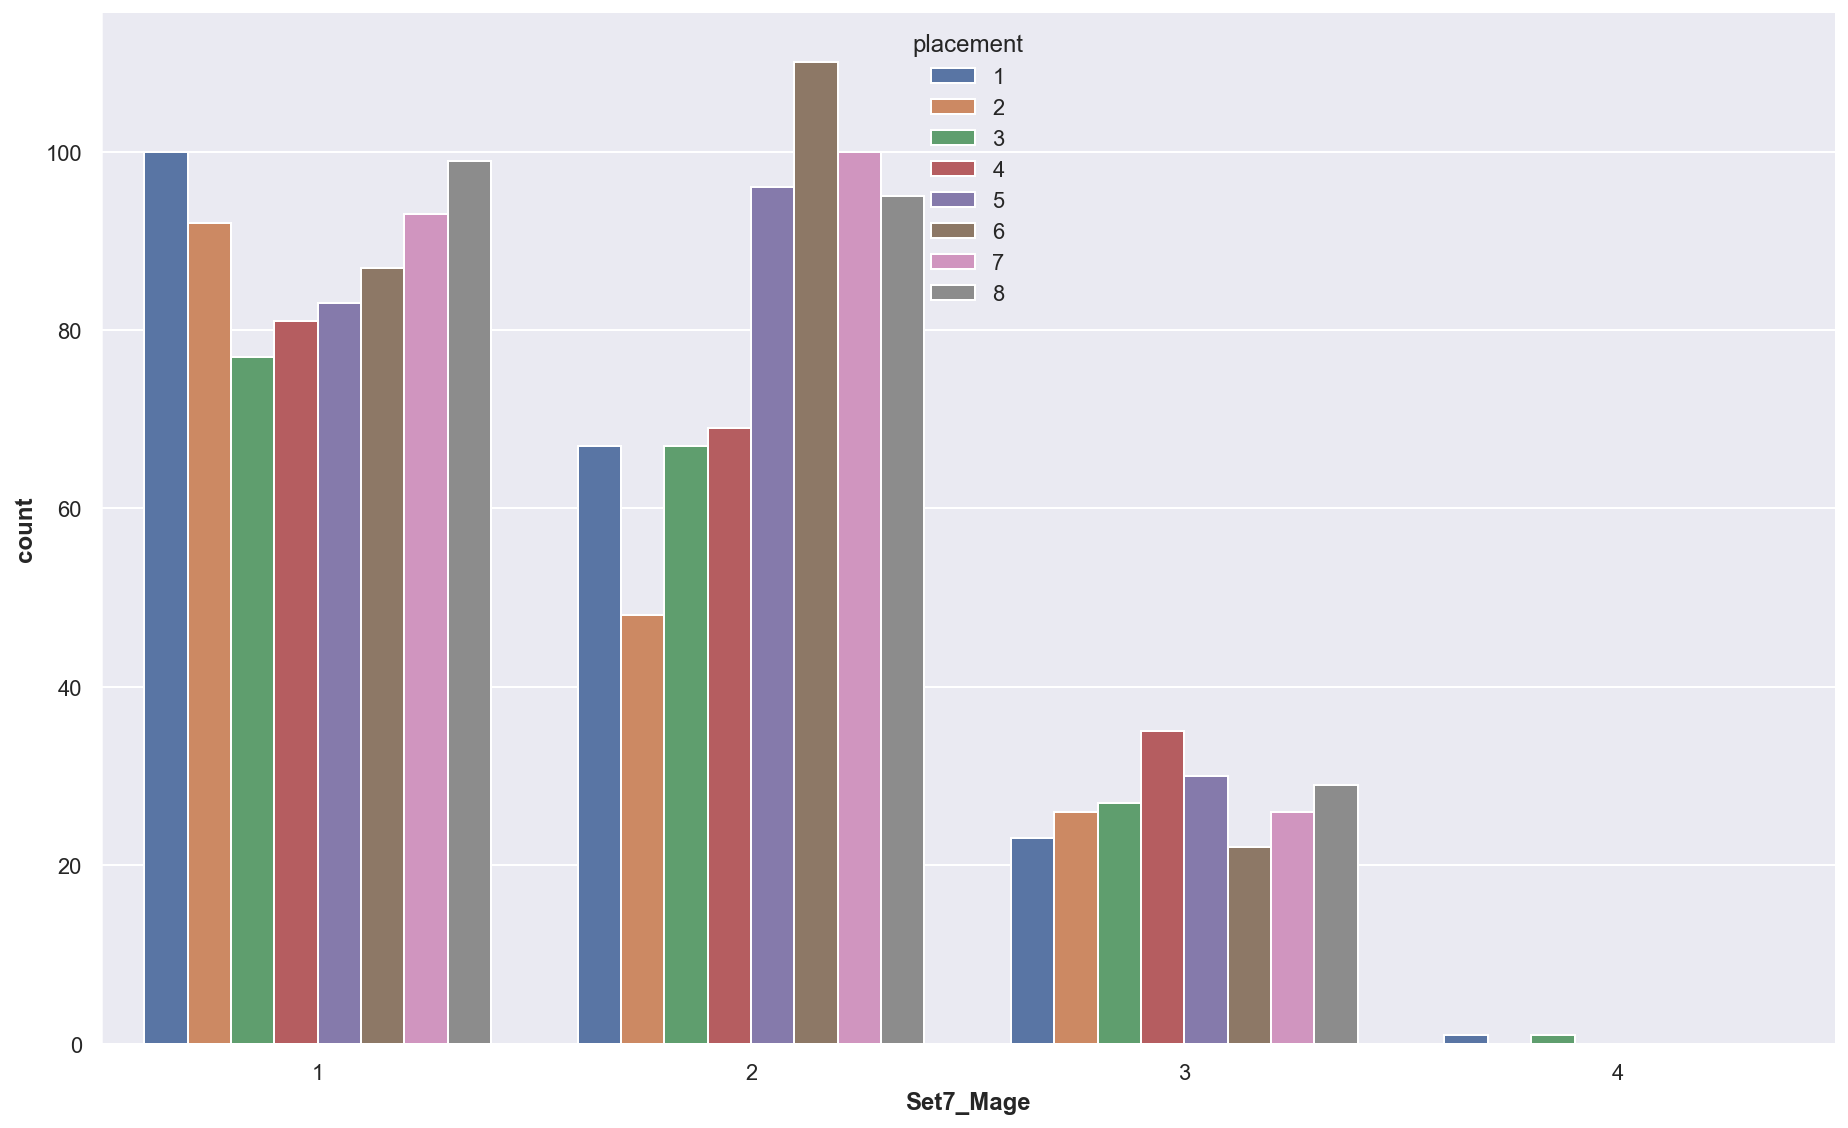

In [194]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

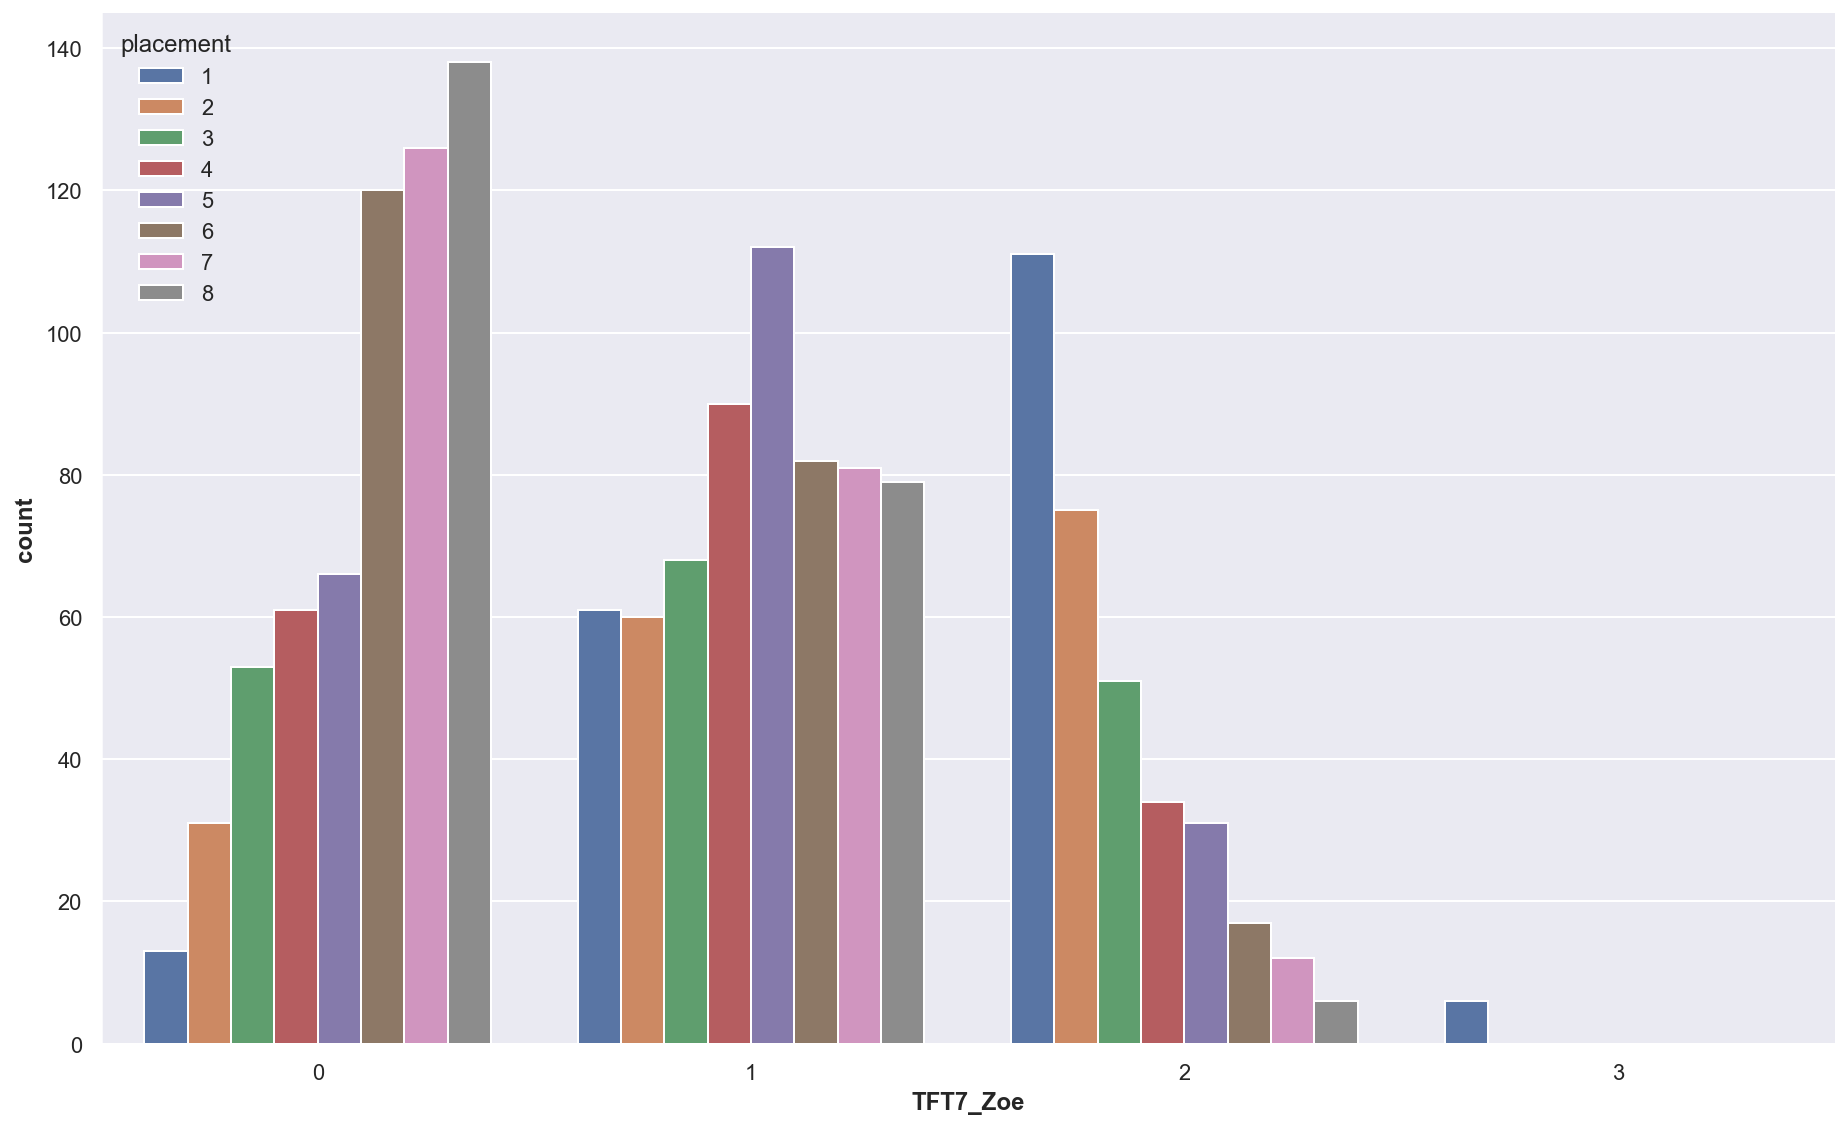

In [195]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

Significant correlation with Mystic.

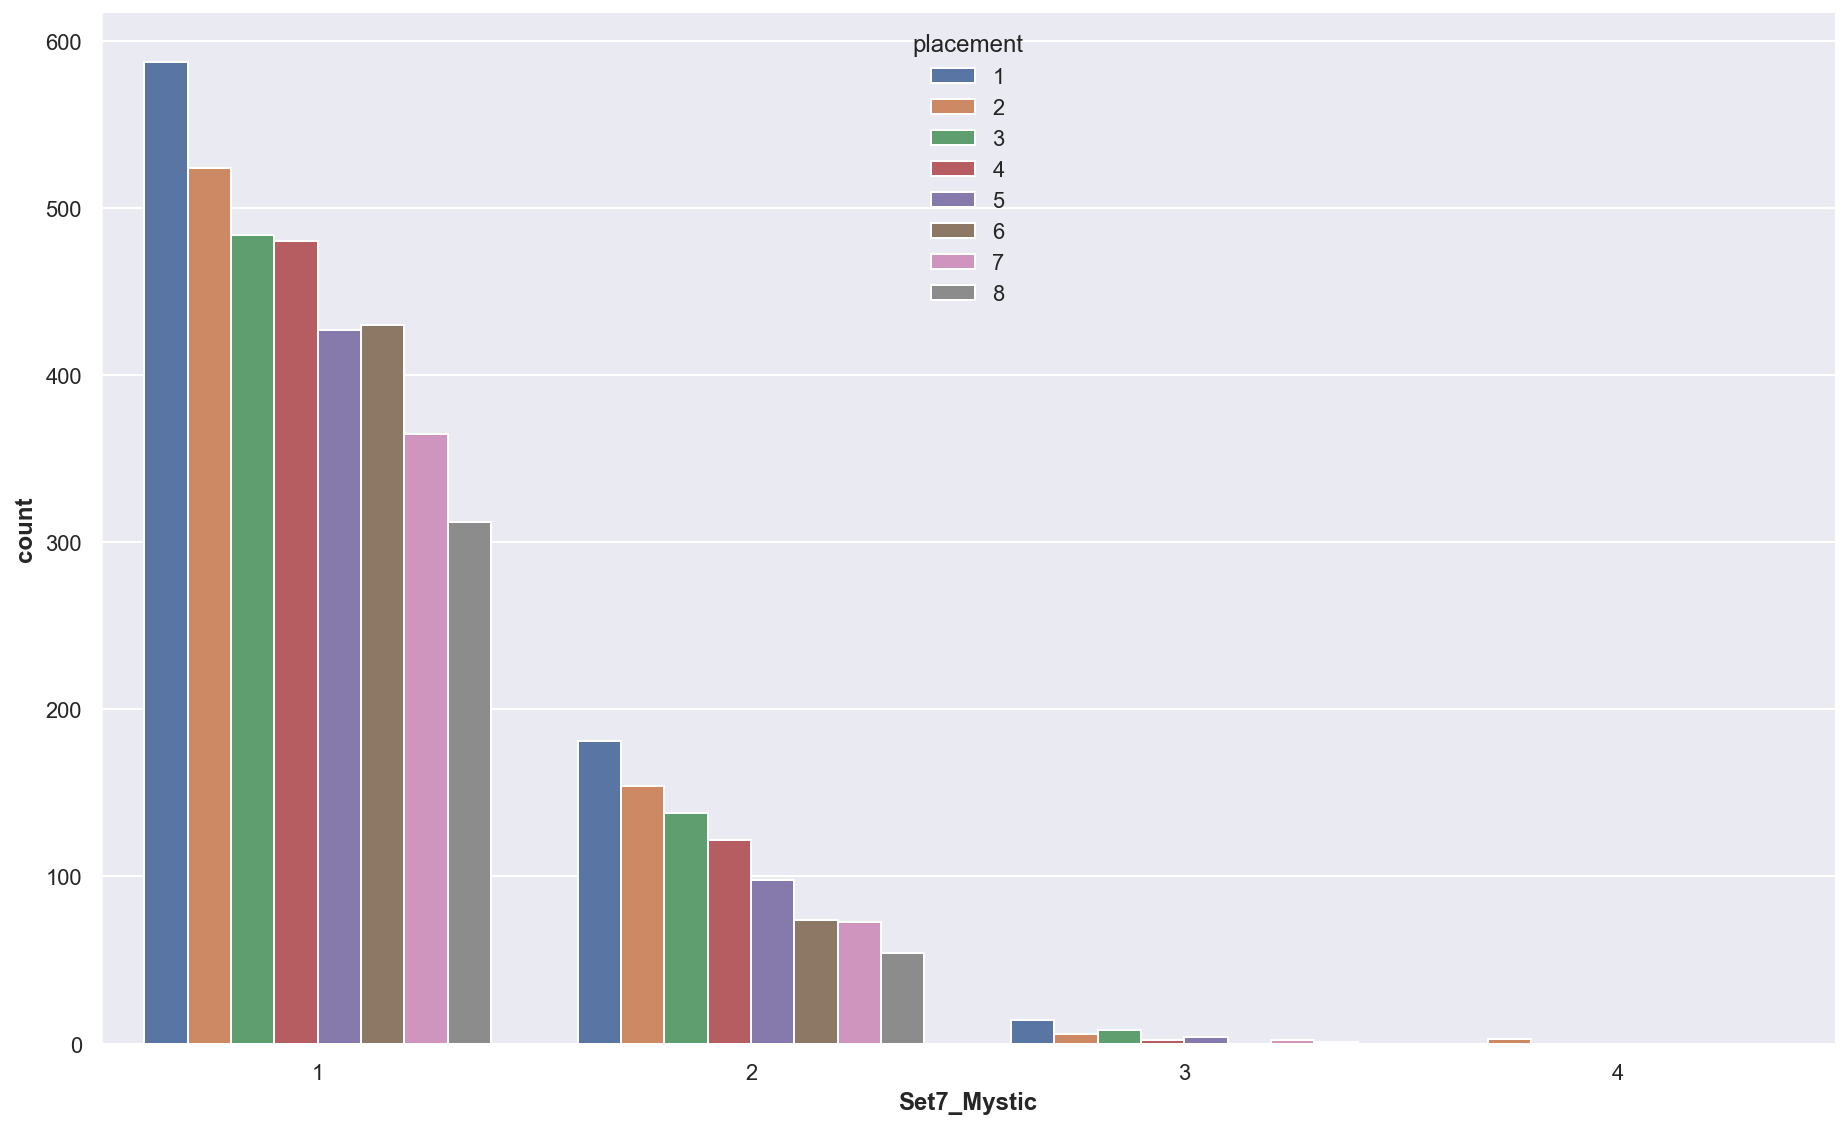

In [196]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mystic']>0], x='Set7_Mystic', hue=TARGETNAME)
sns.despine()

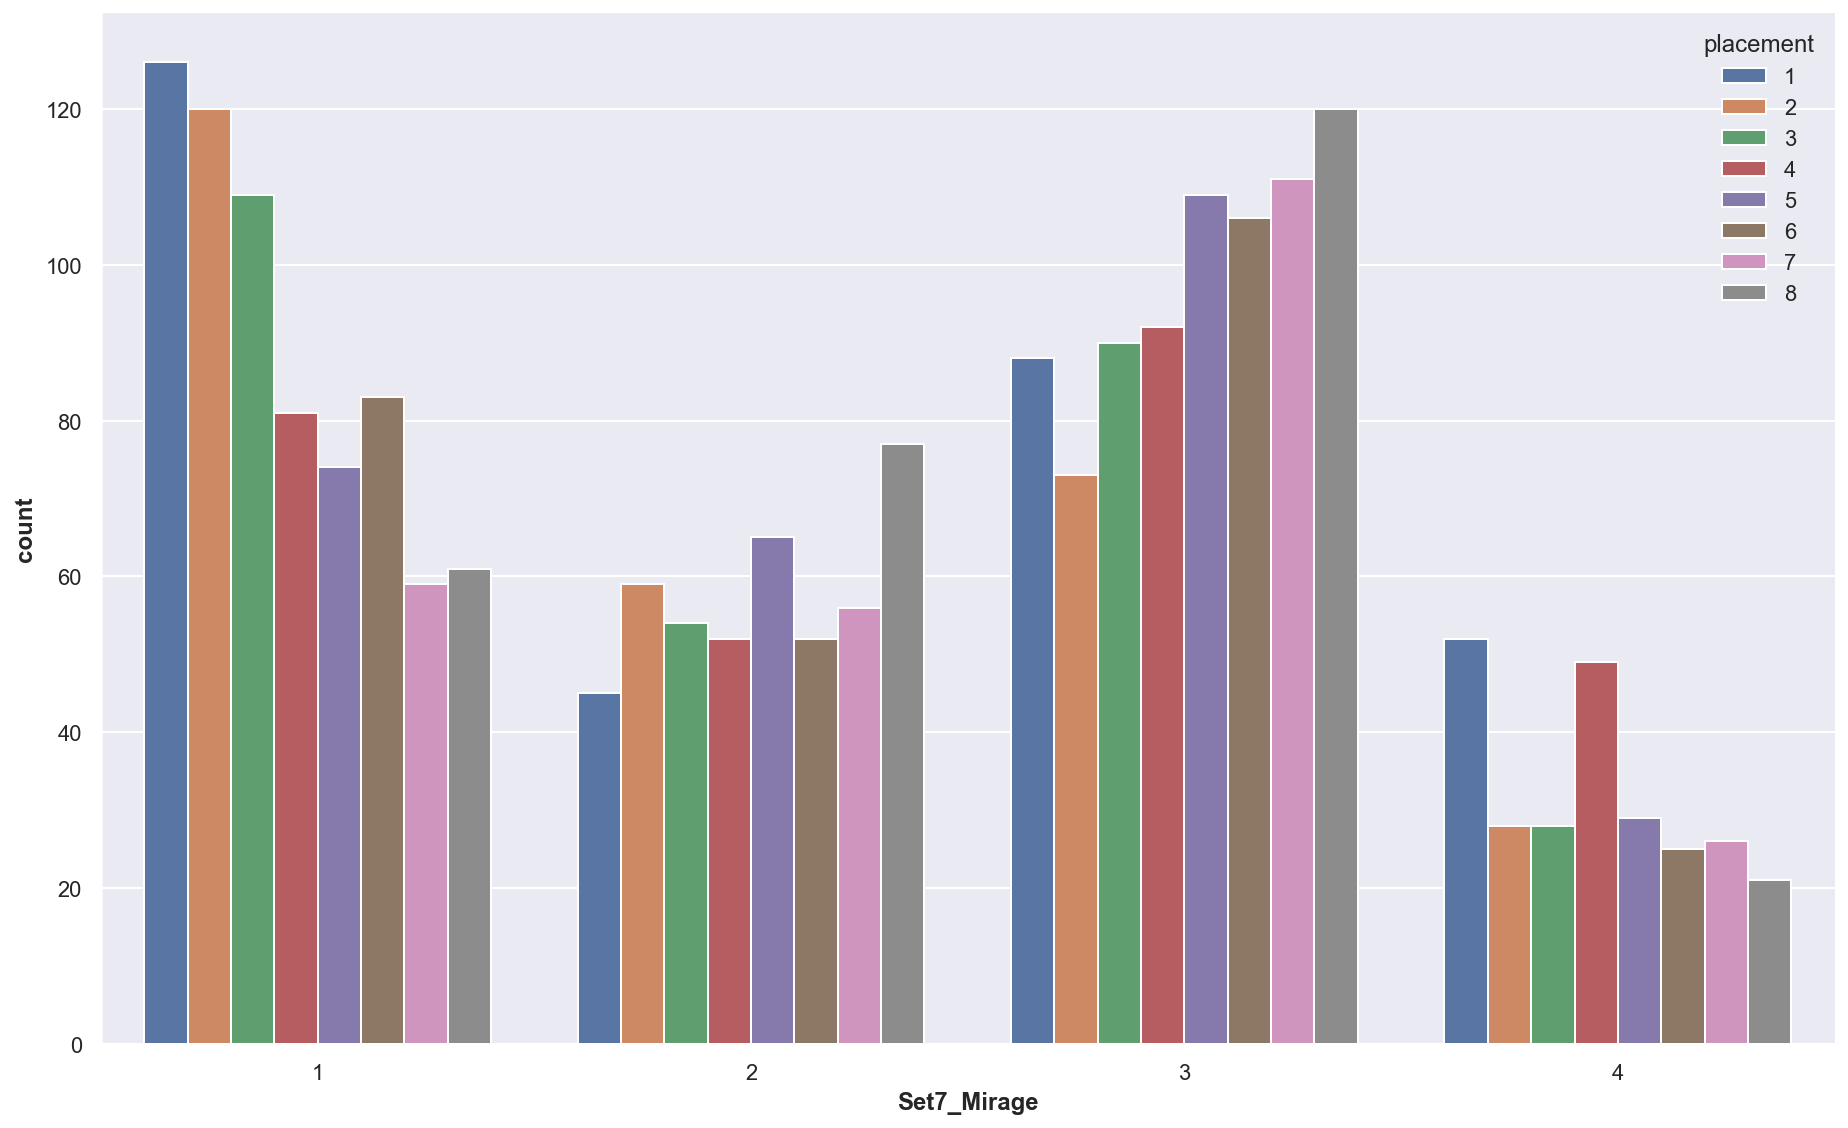

In [197]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

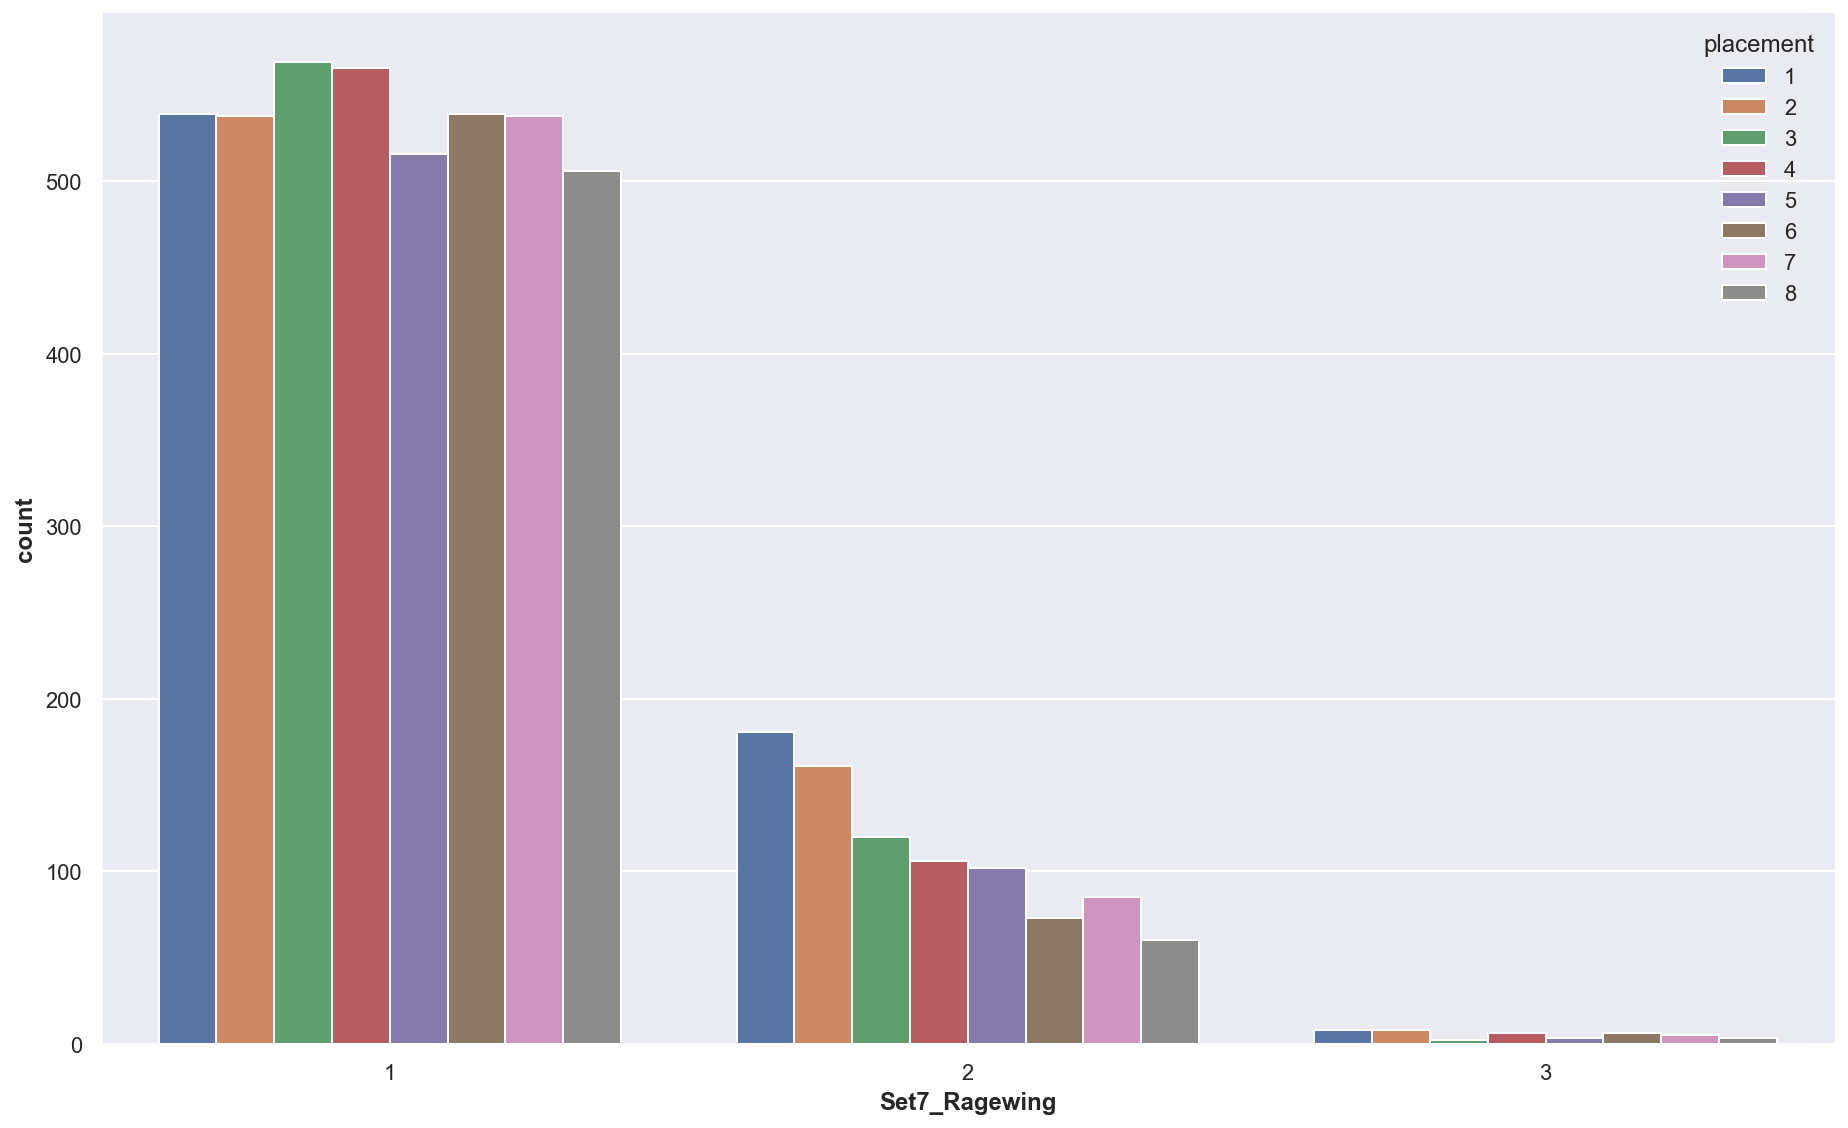

In [198]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

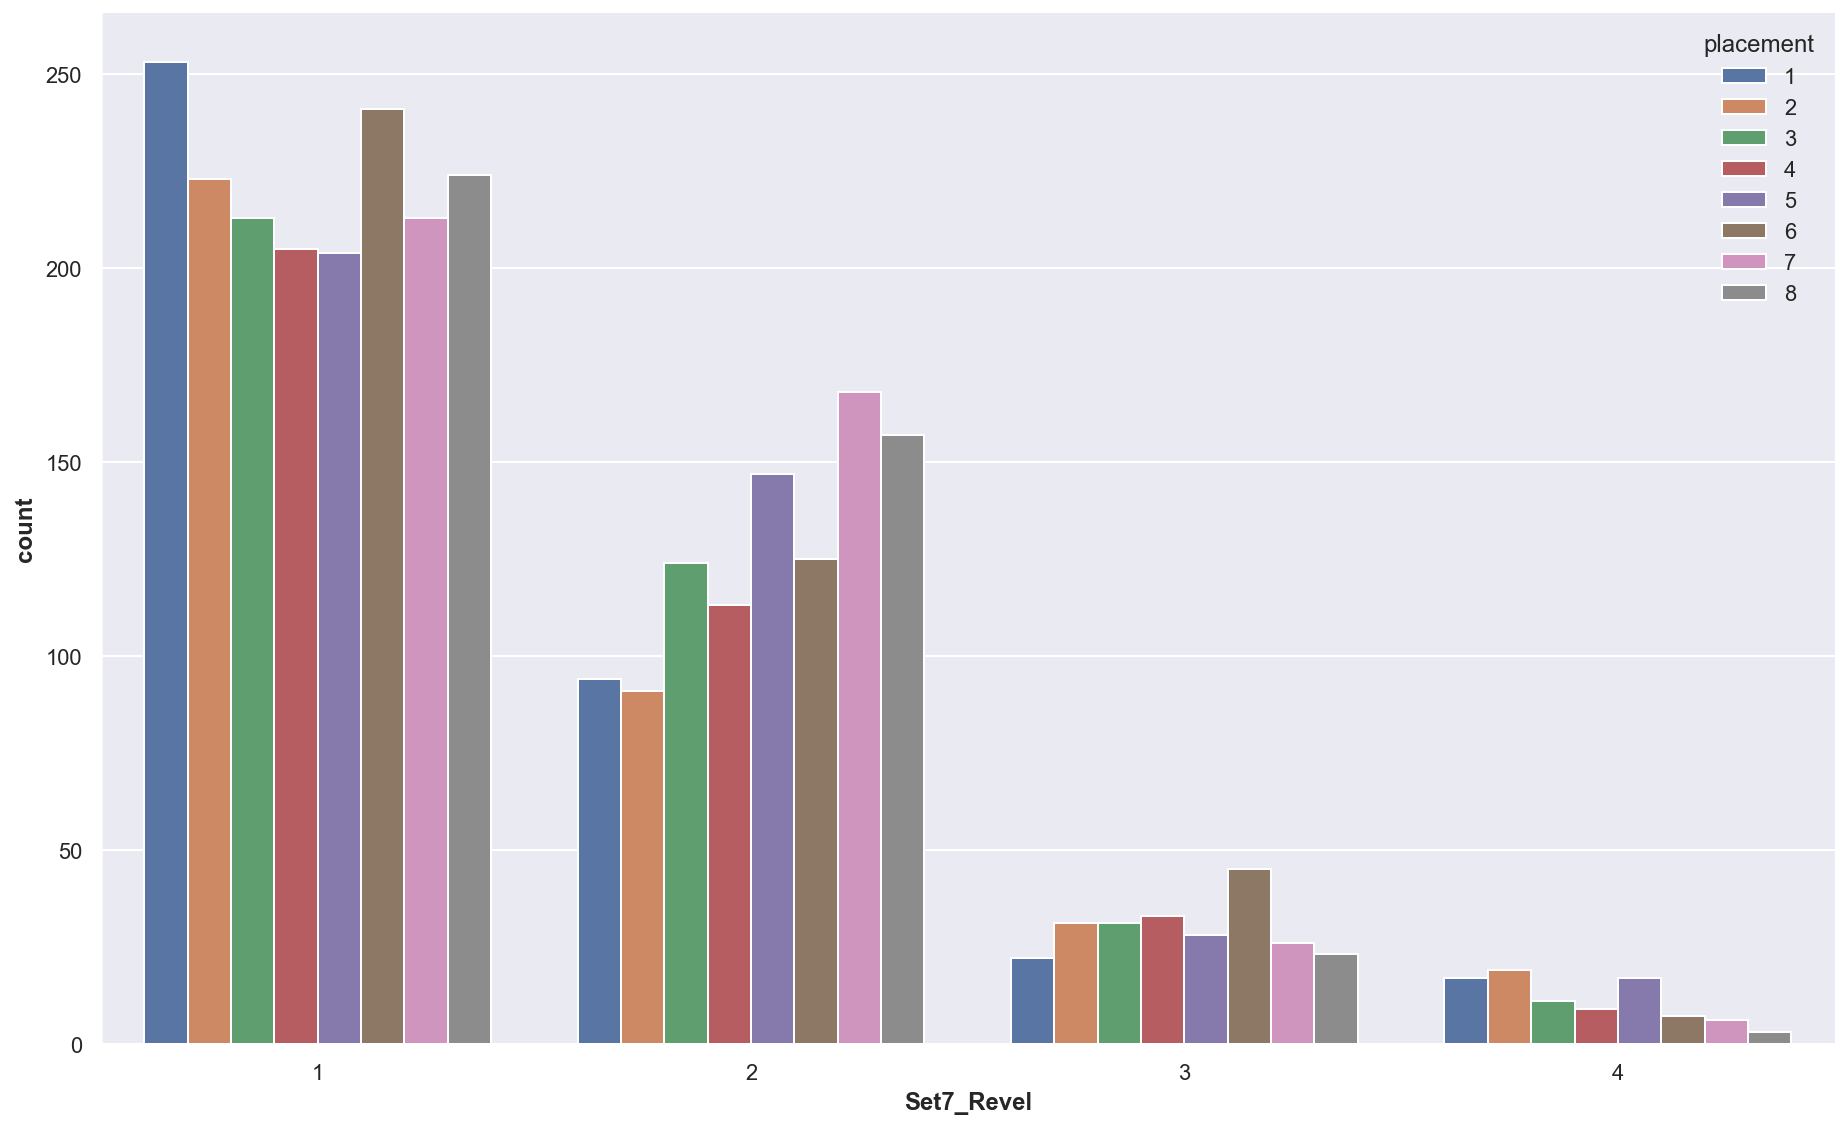

In [199]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Revel']>0], x='Set7_Revel', hue=TARGETNAME)
sns.despine()

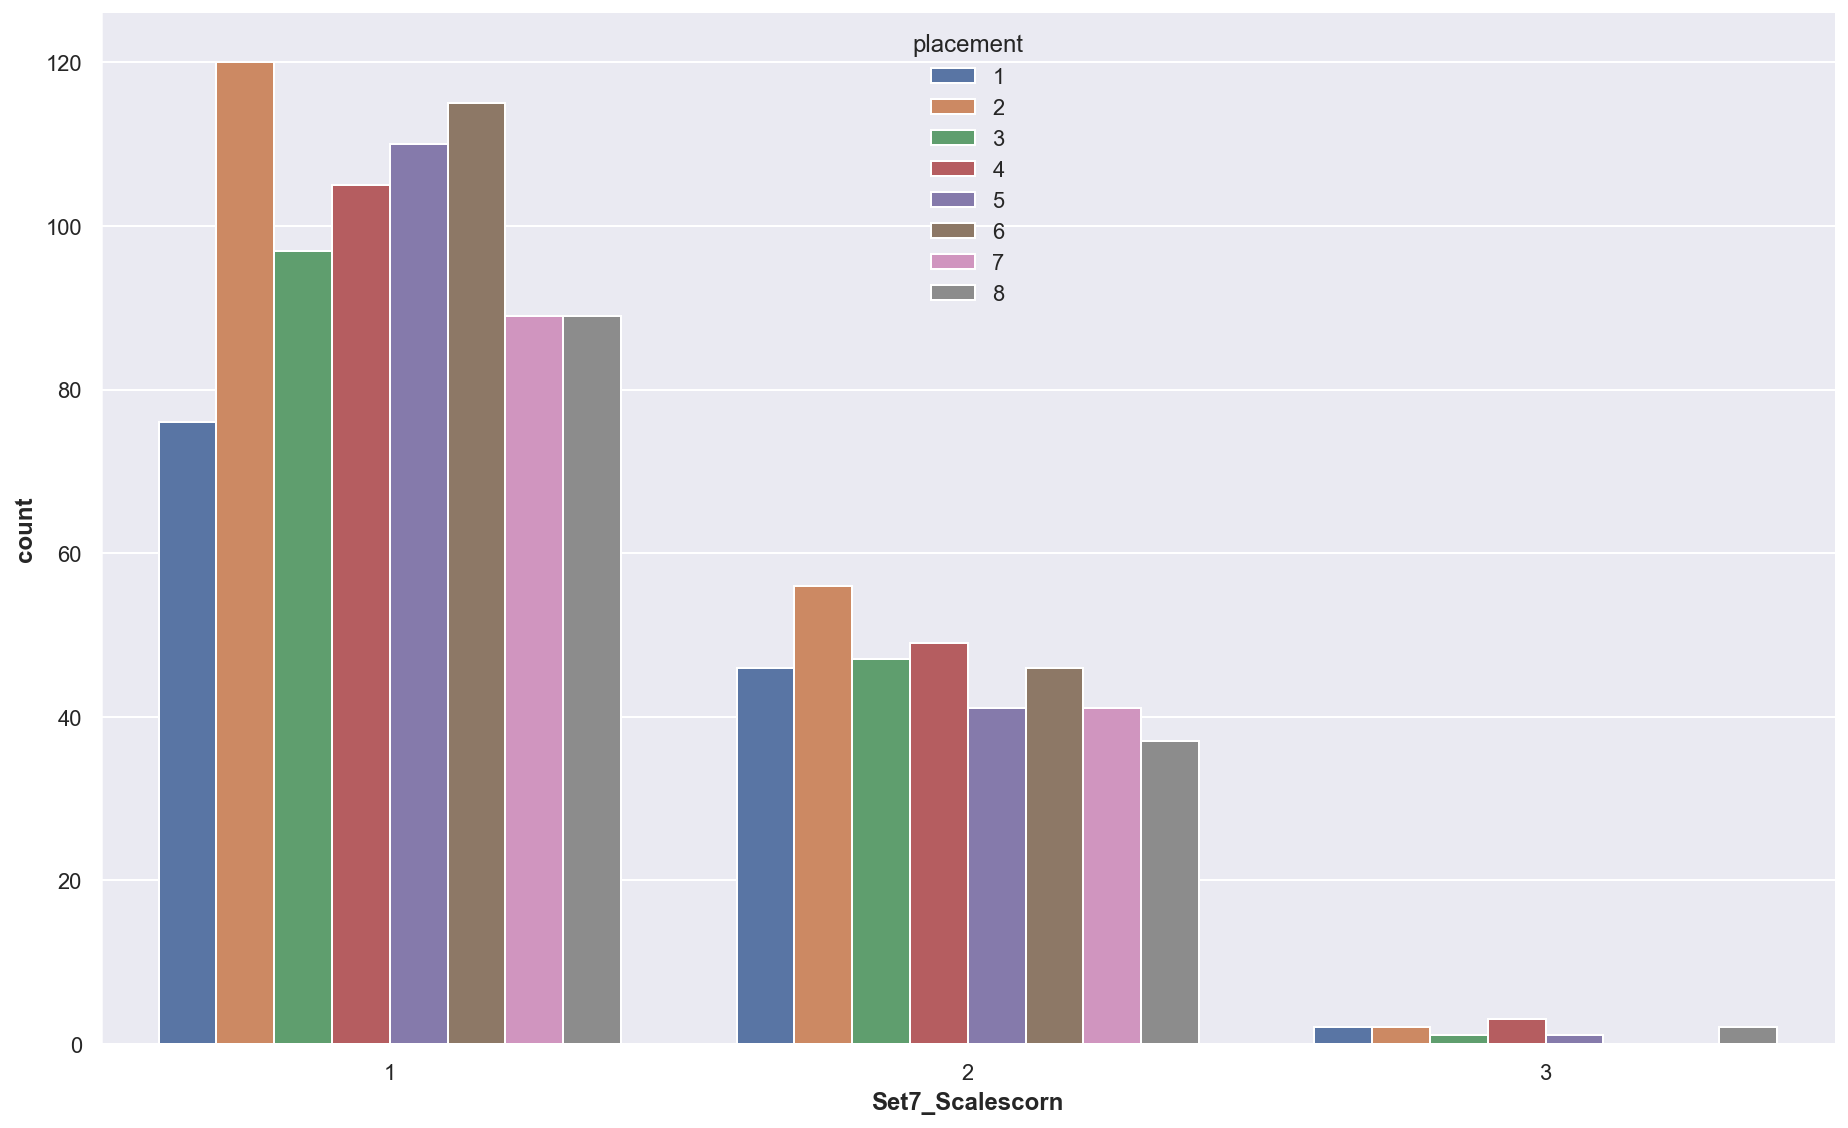

In [200]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Scalescorn']>0], x='Set7_Scalescorn', hue=TARGETNAME)
sns.despine()

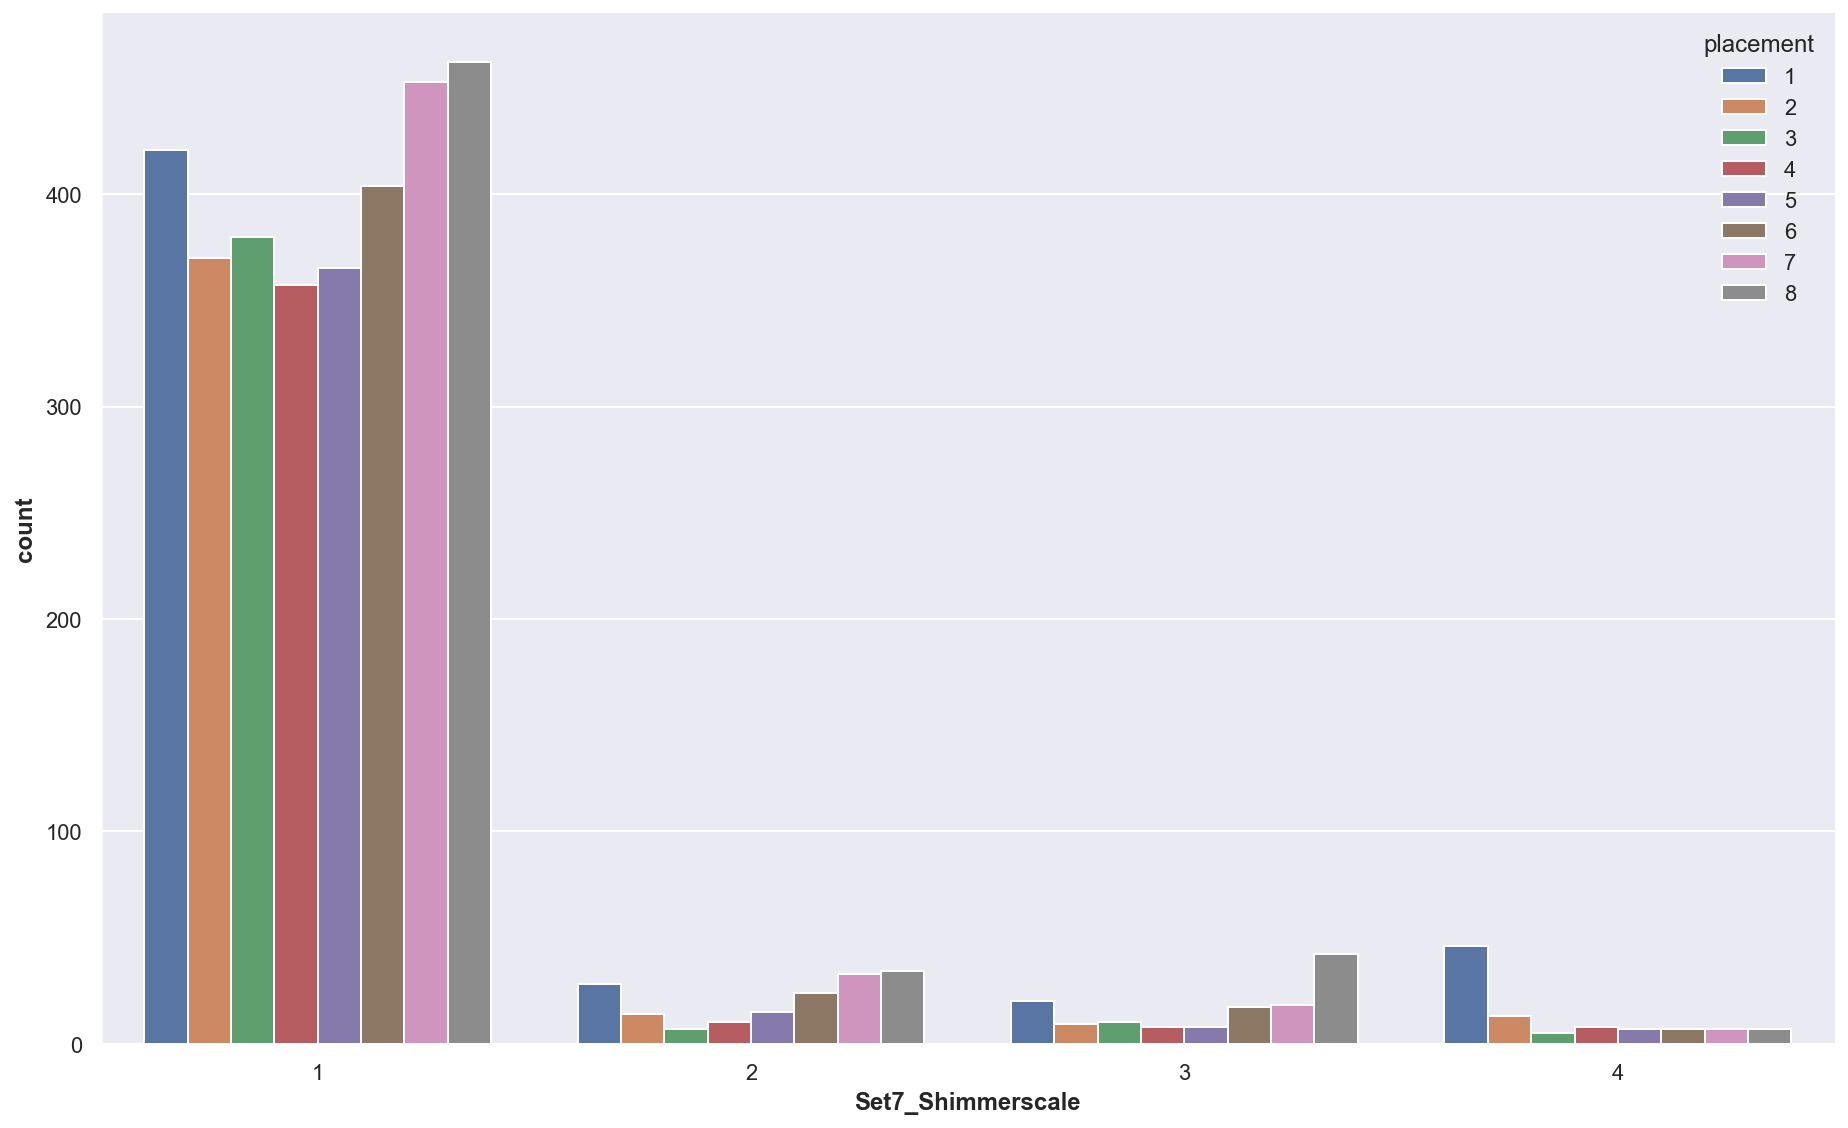

In [201]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

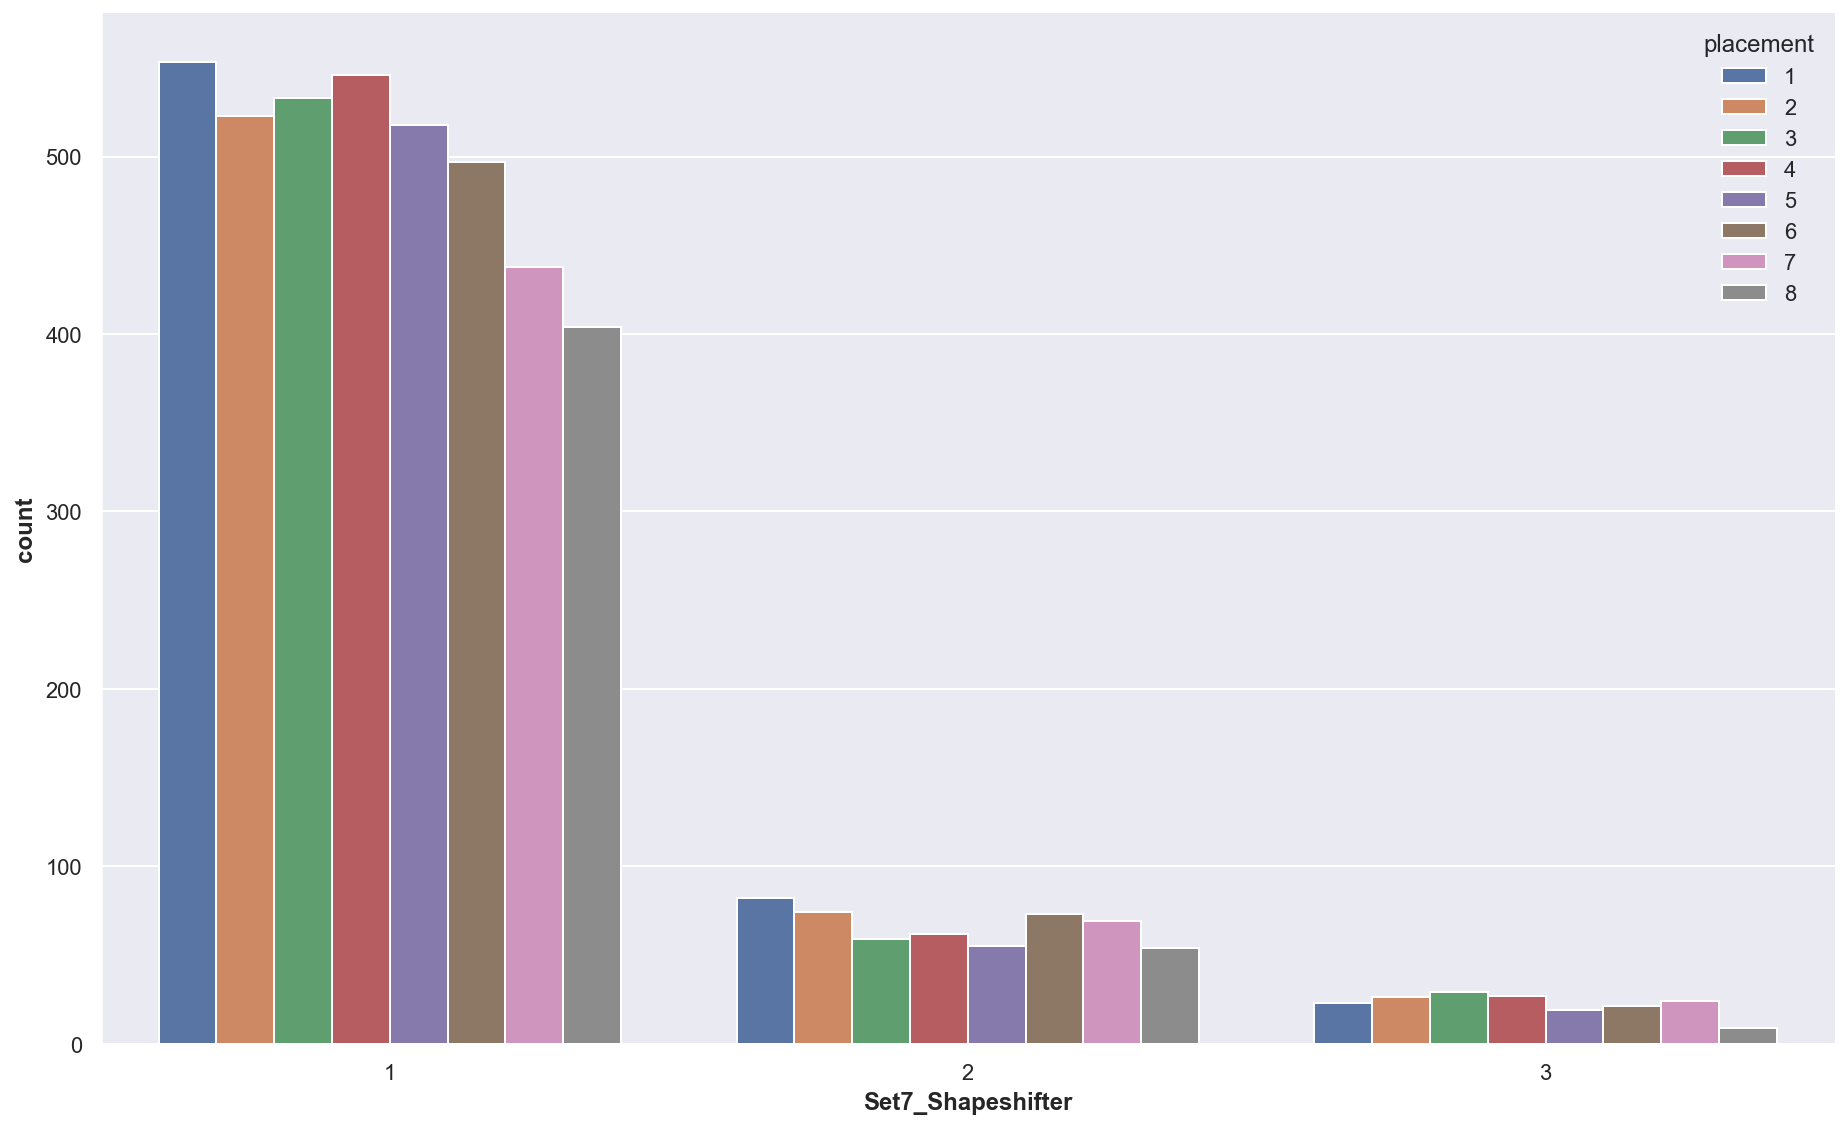

In [202]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shapeshifter']>0], x='Set7_Shapeshifter', hue=TARGETNAME)
sns.despine()

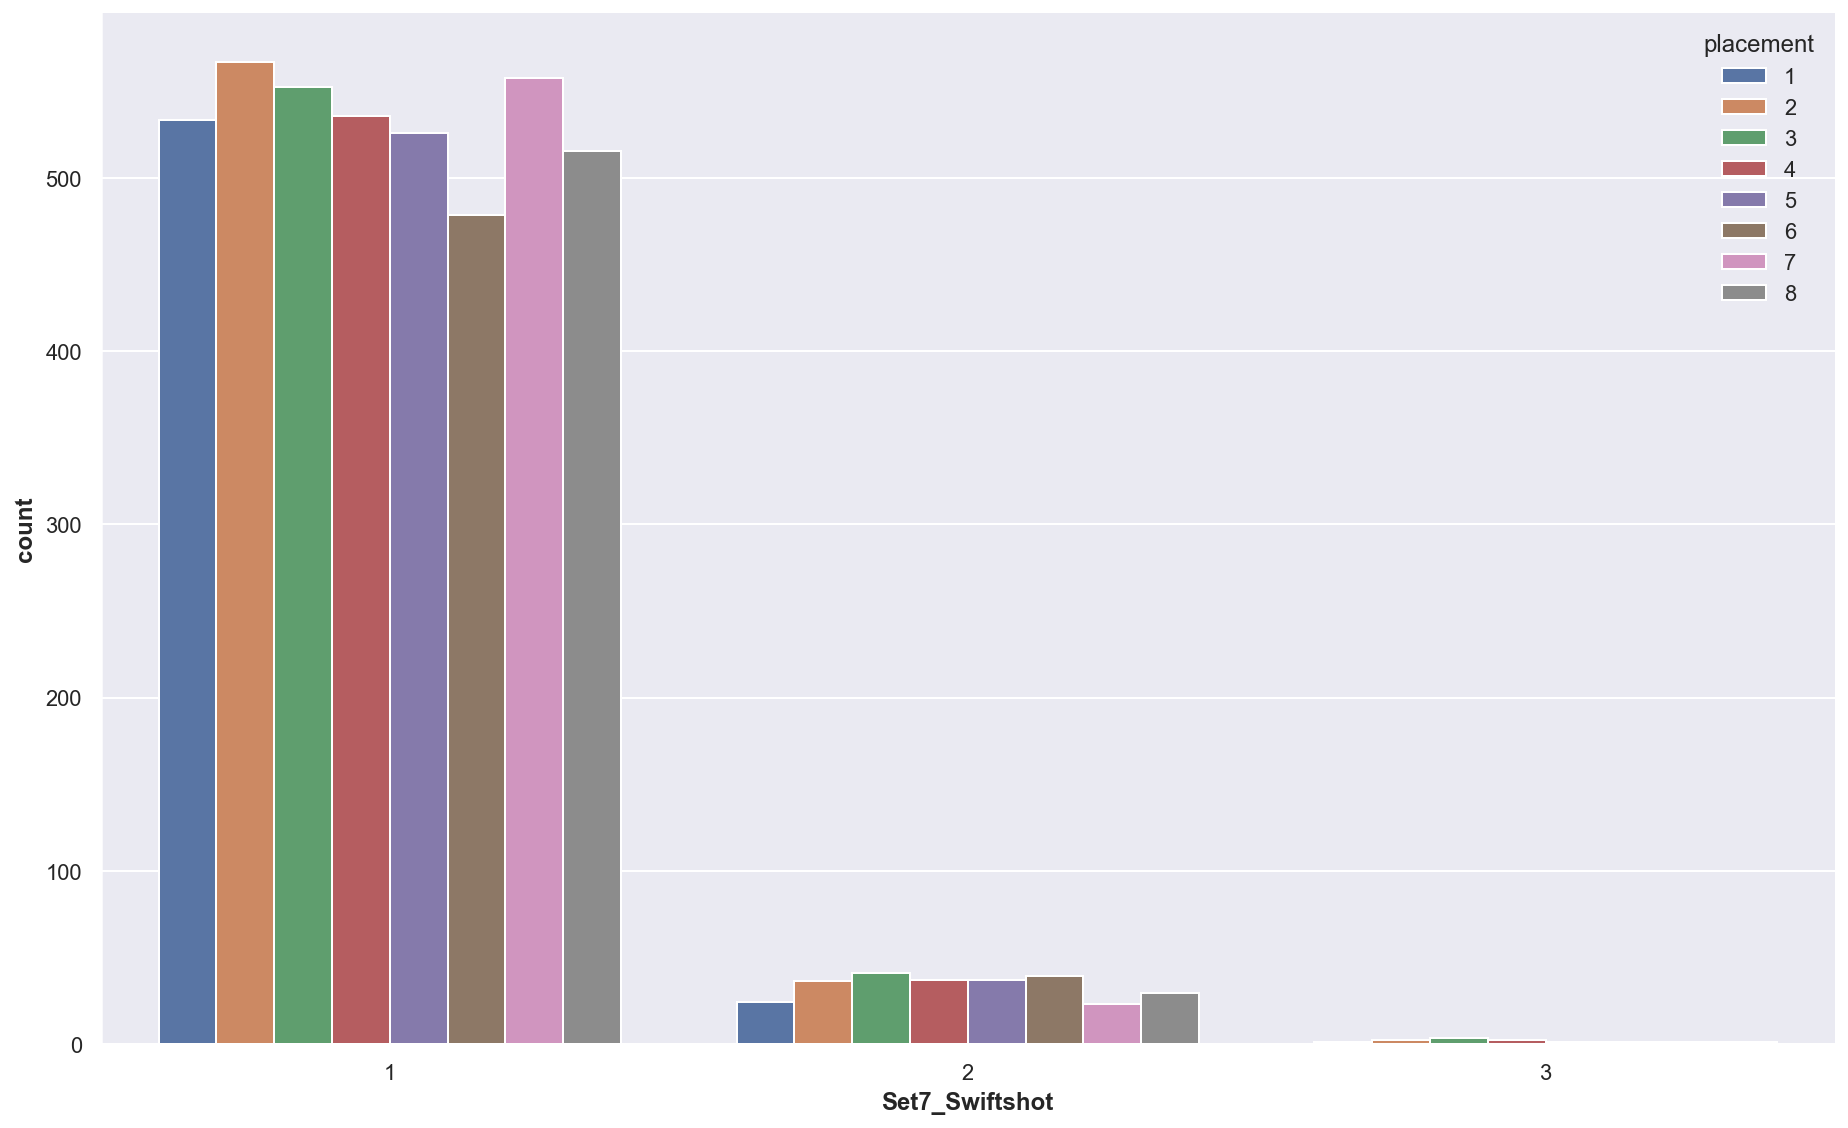

In [203]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

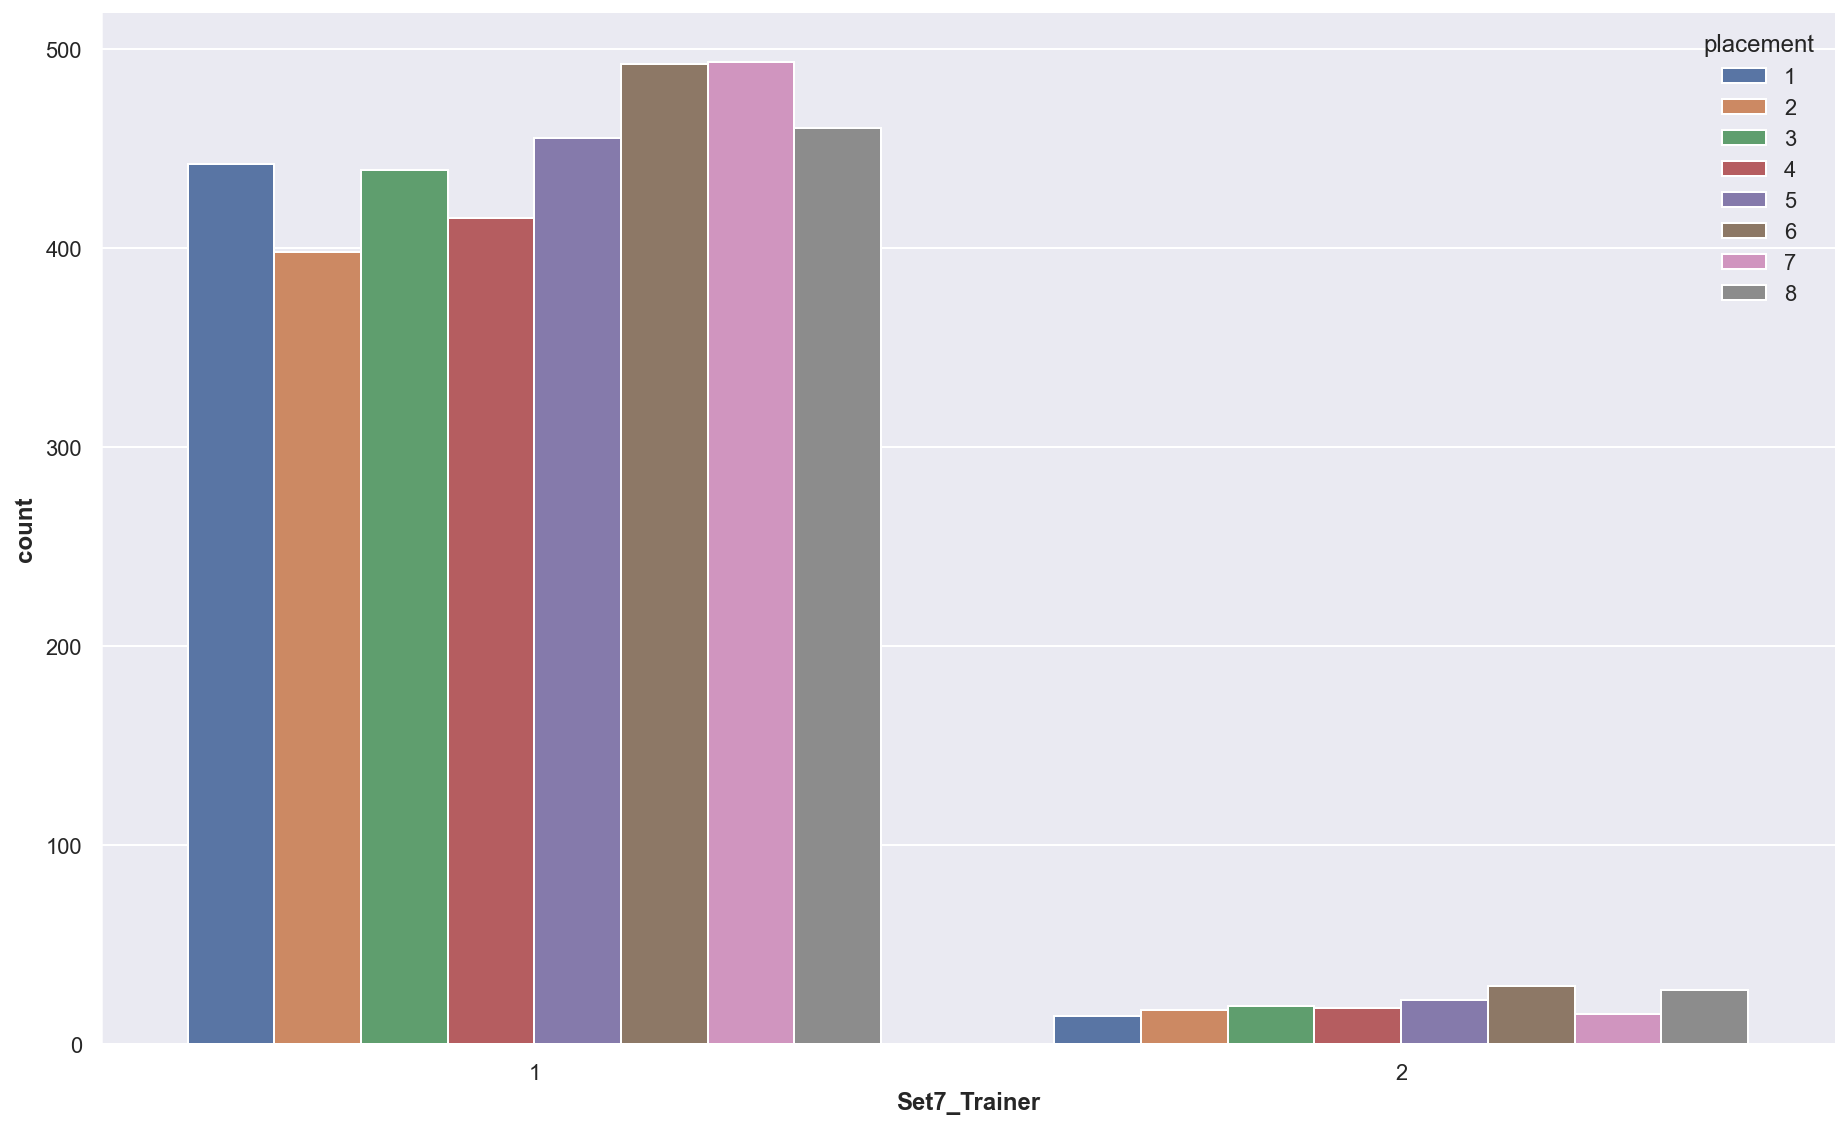

In [204]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

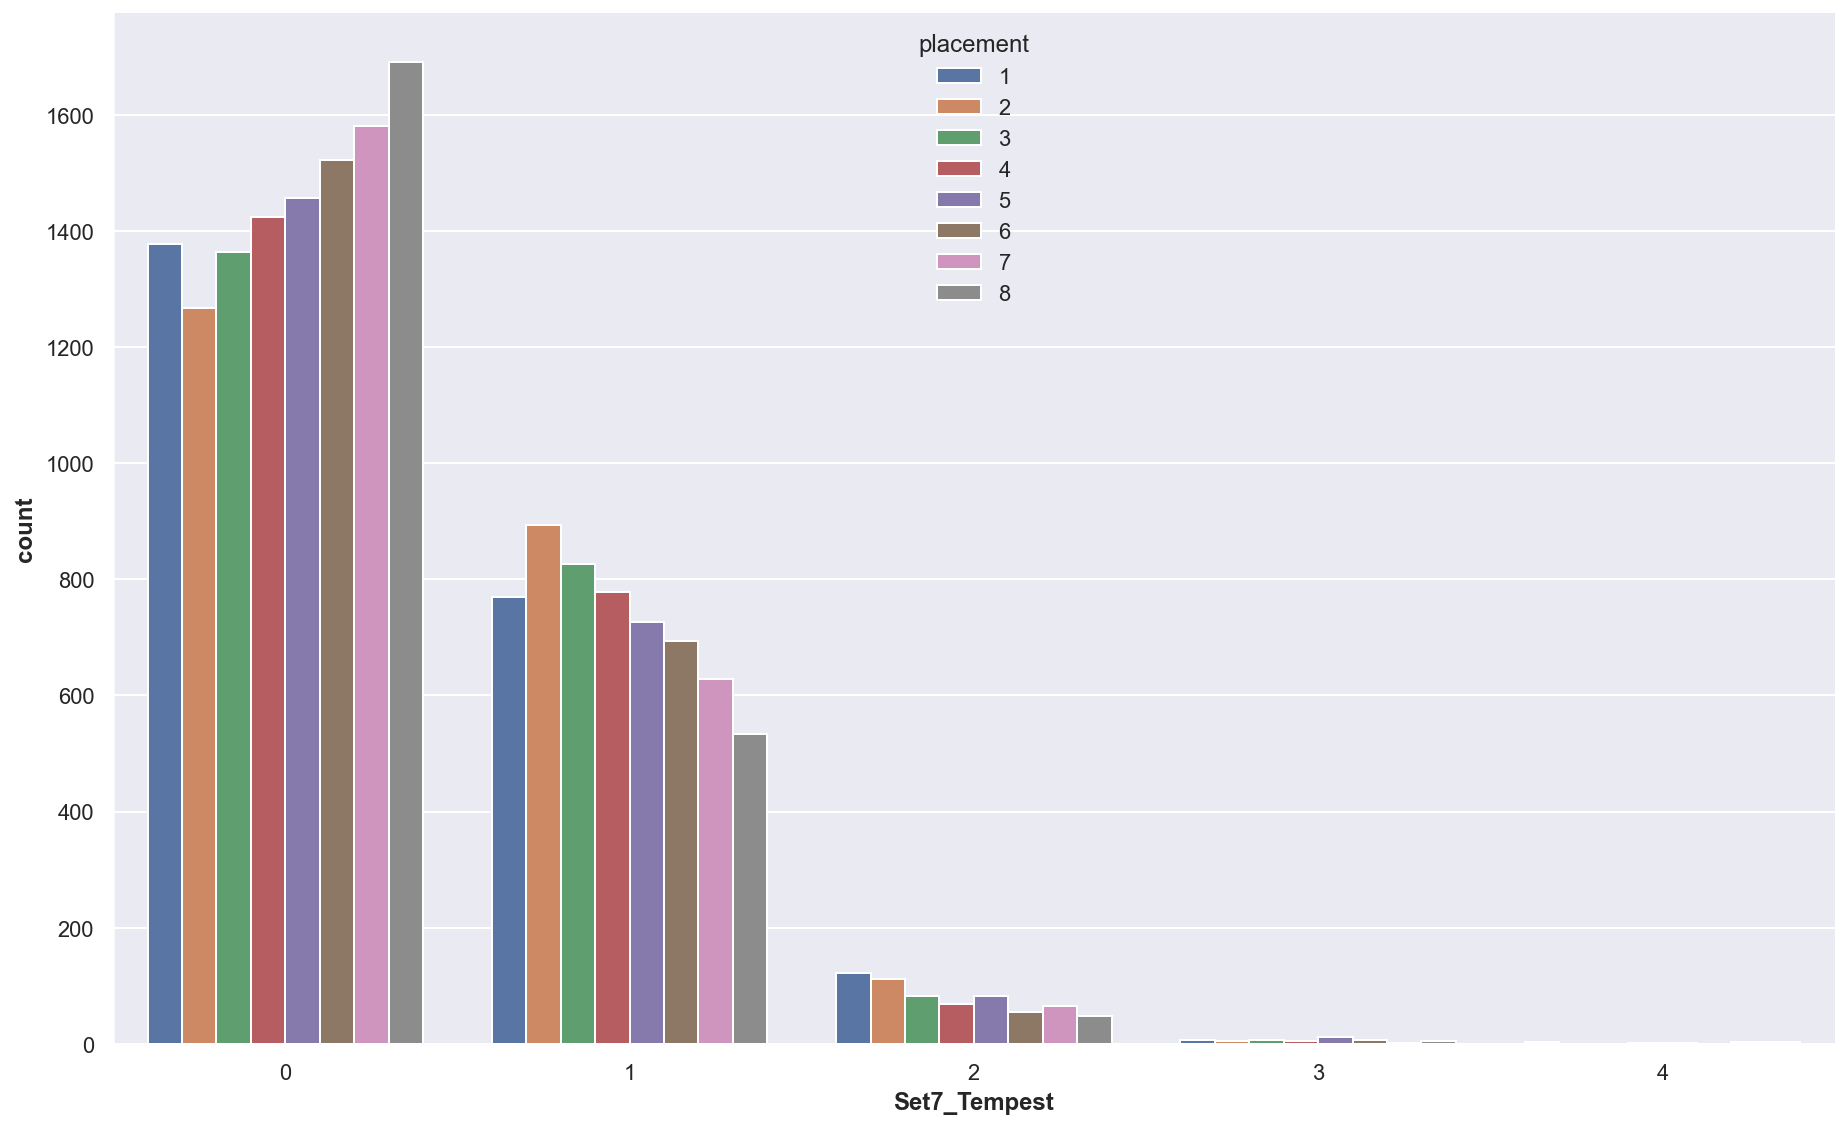

In [205]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

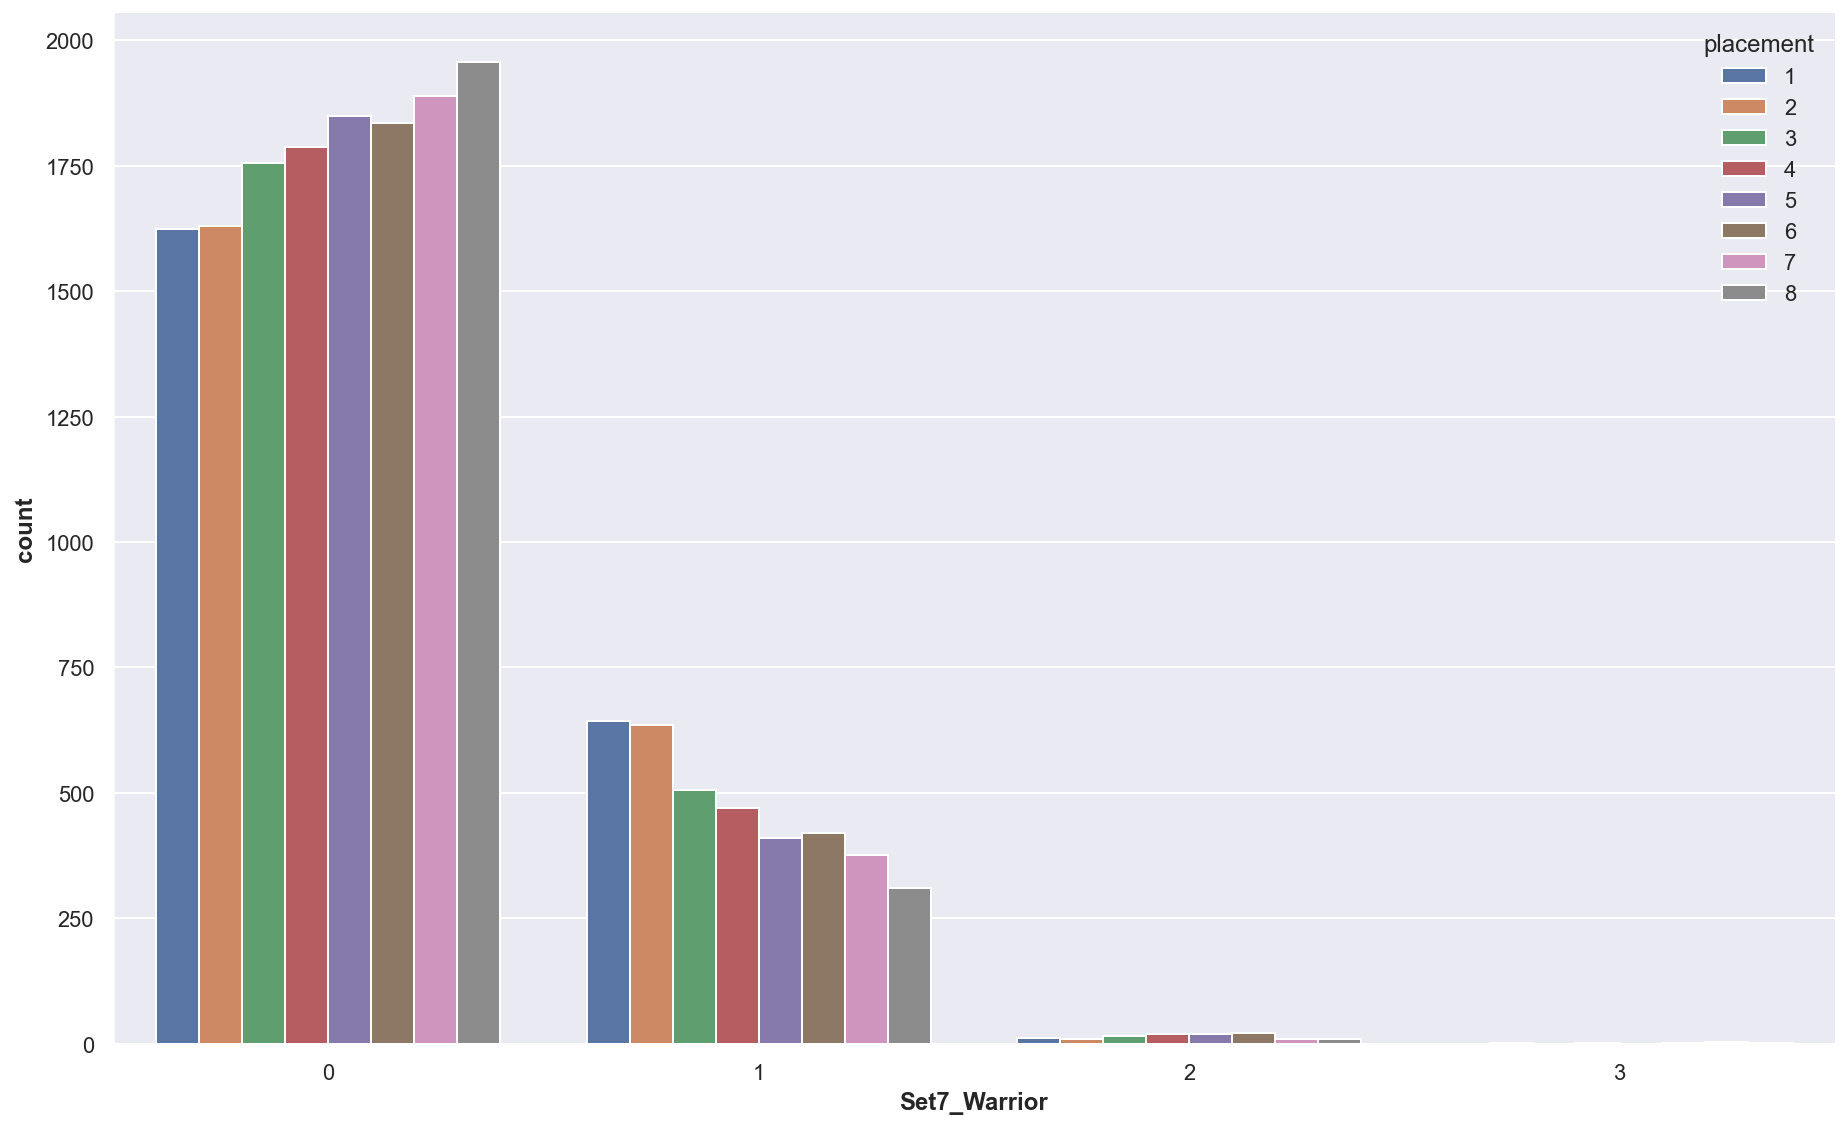

In [206]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

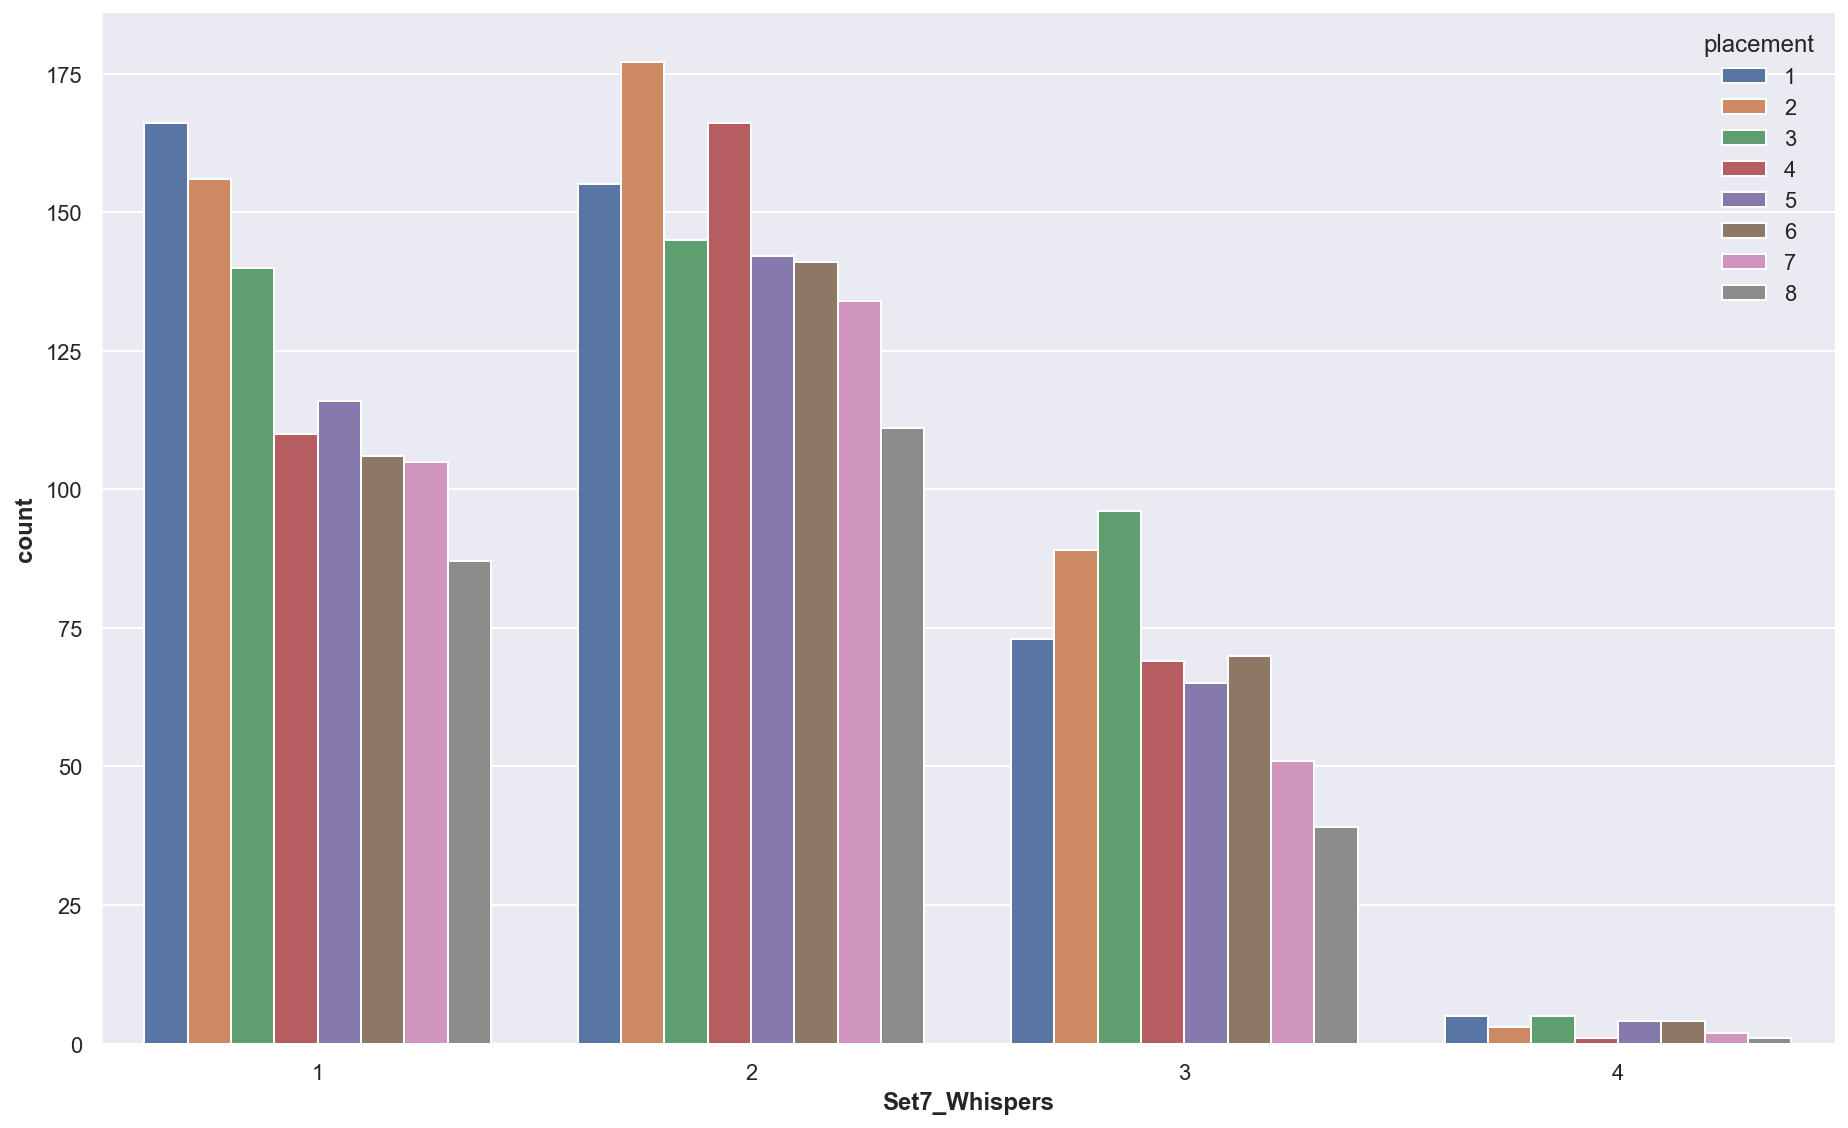

In [207]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Whispers']>0], x='Set7_Whispers', hue=TARGETNAME)
sns.despine()

## Units

Best unit in TFT Yasuo. DIESOFYASUO

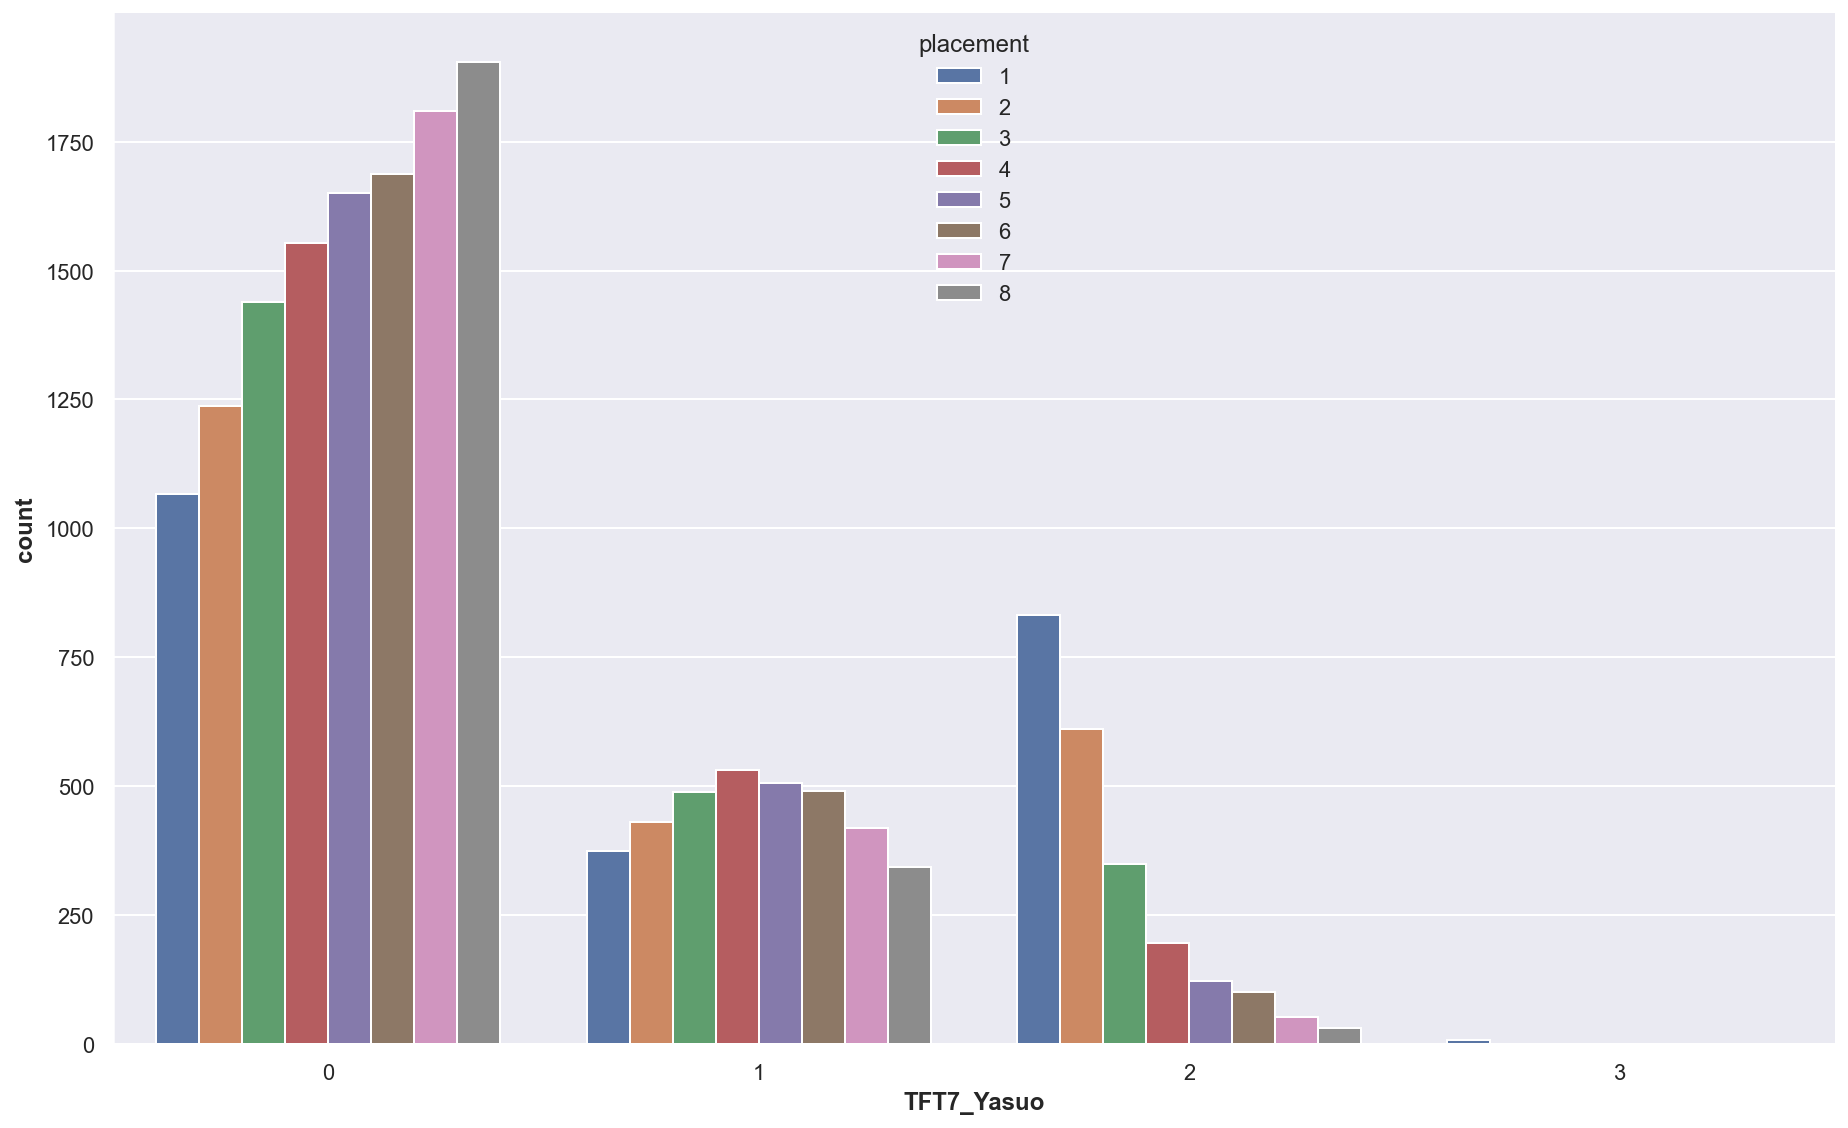

In [208]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

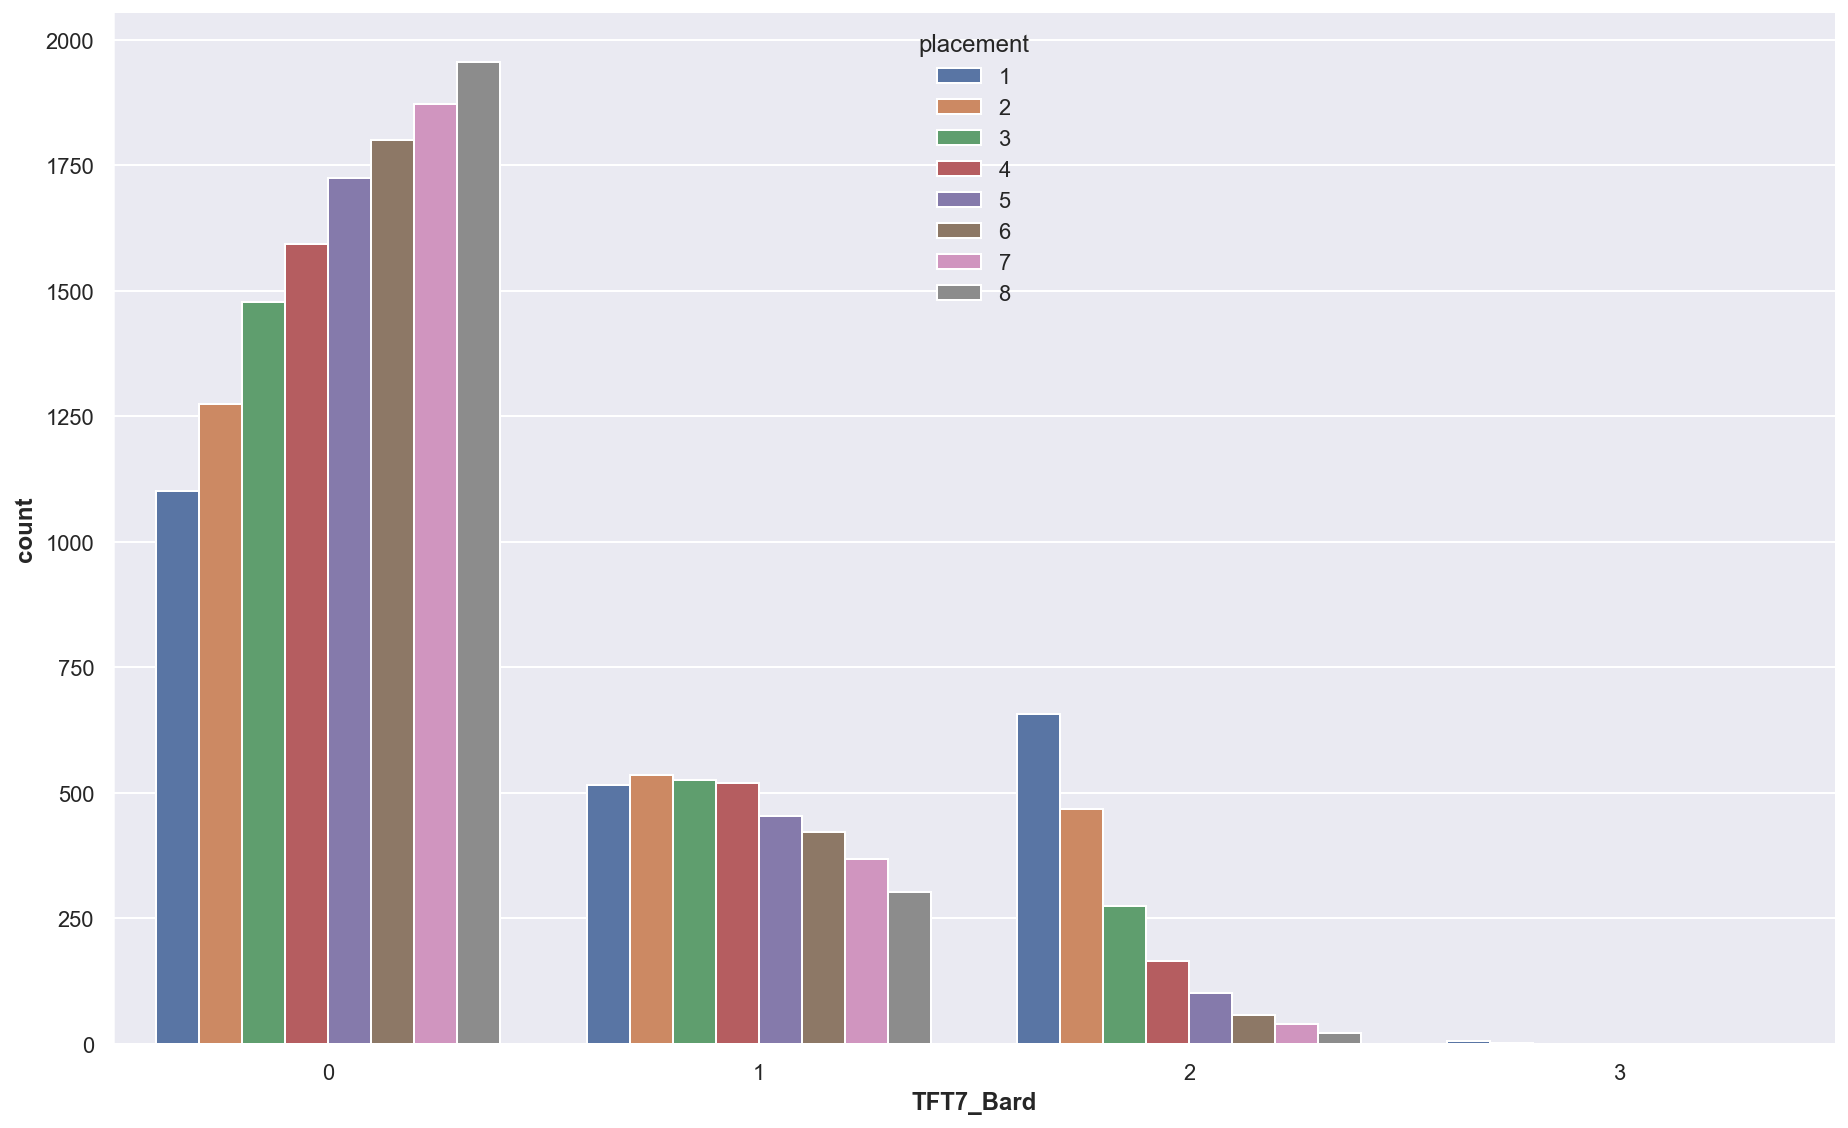

In [209]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

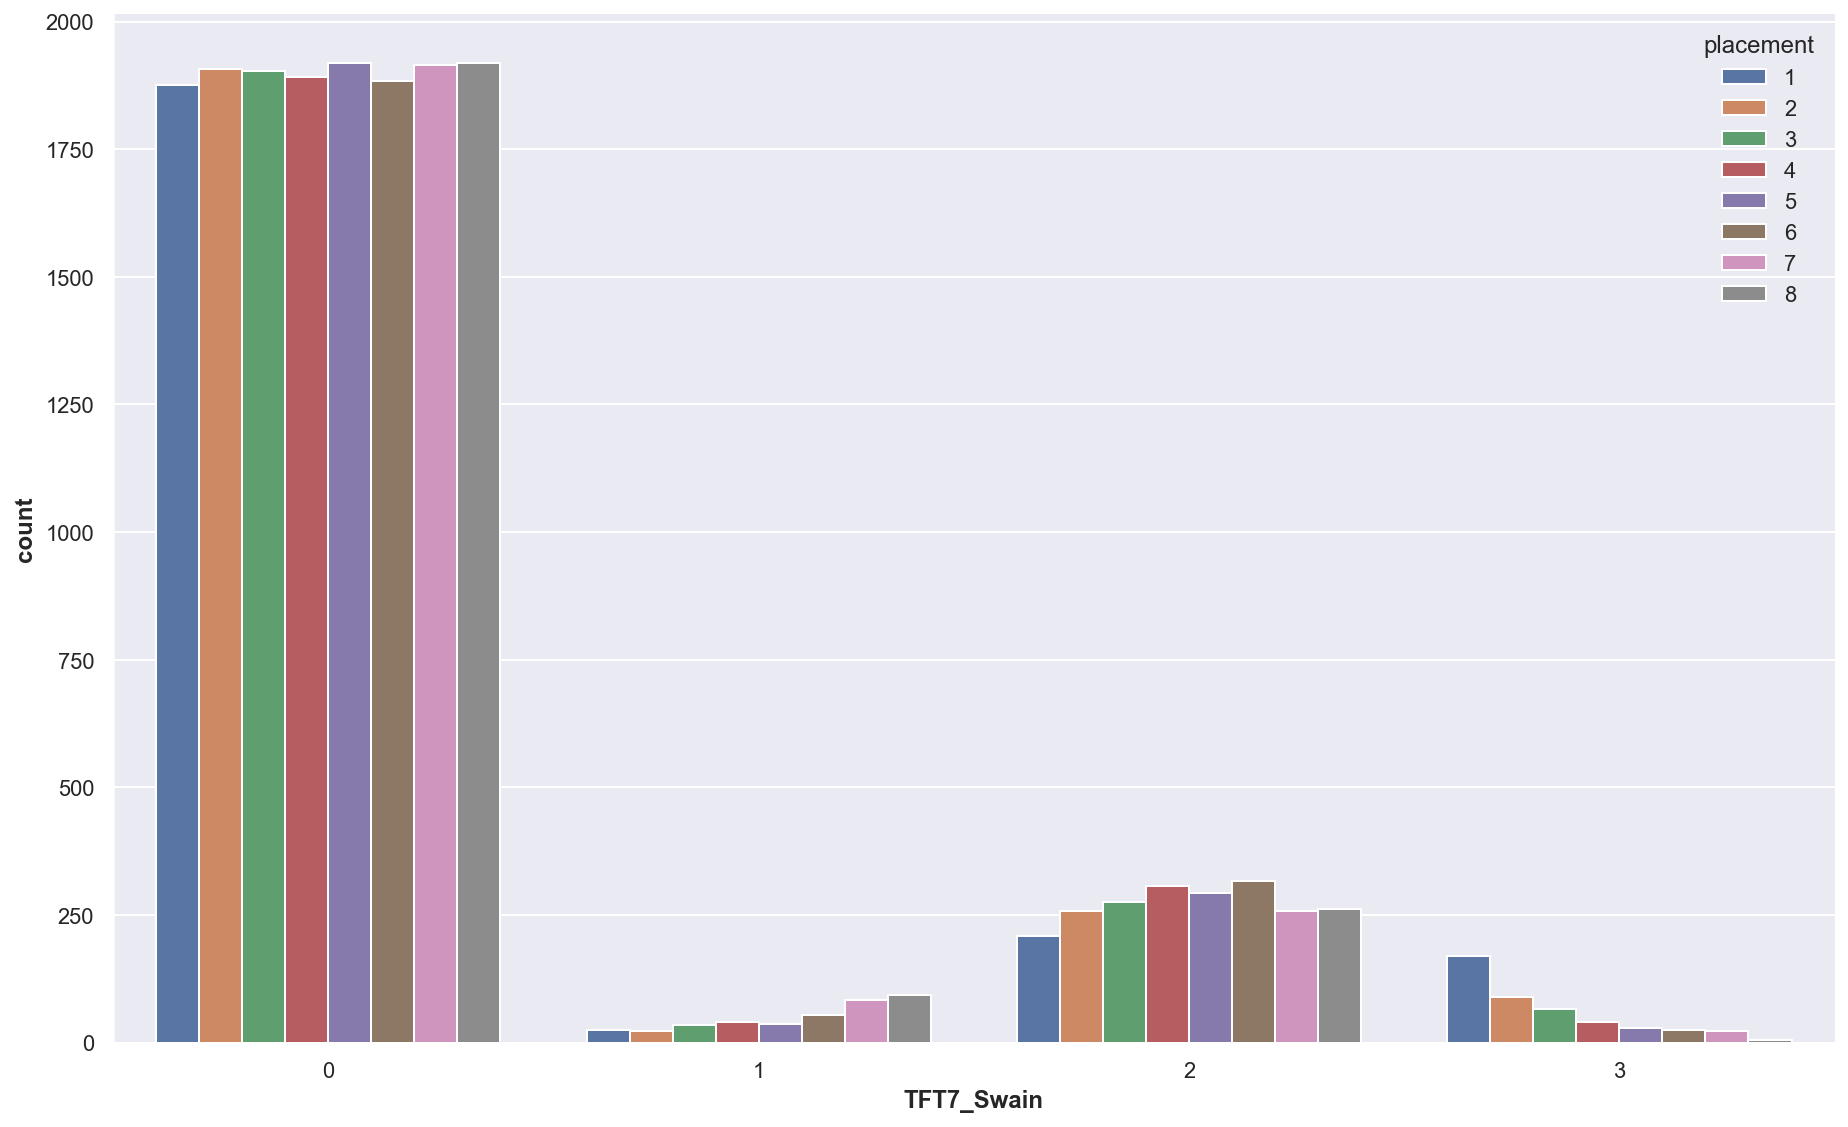

In [210]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

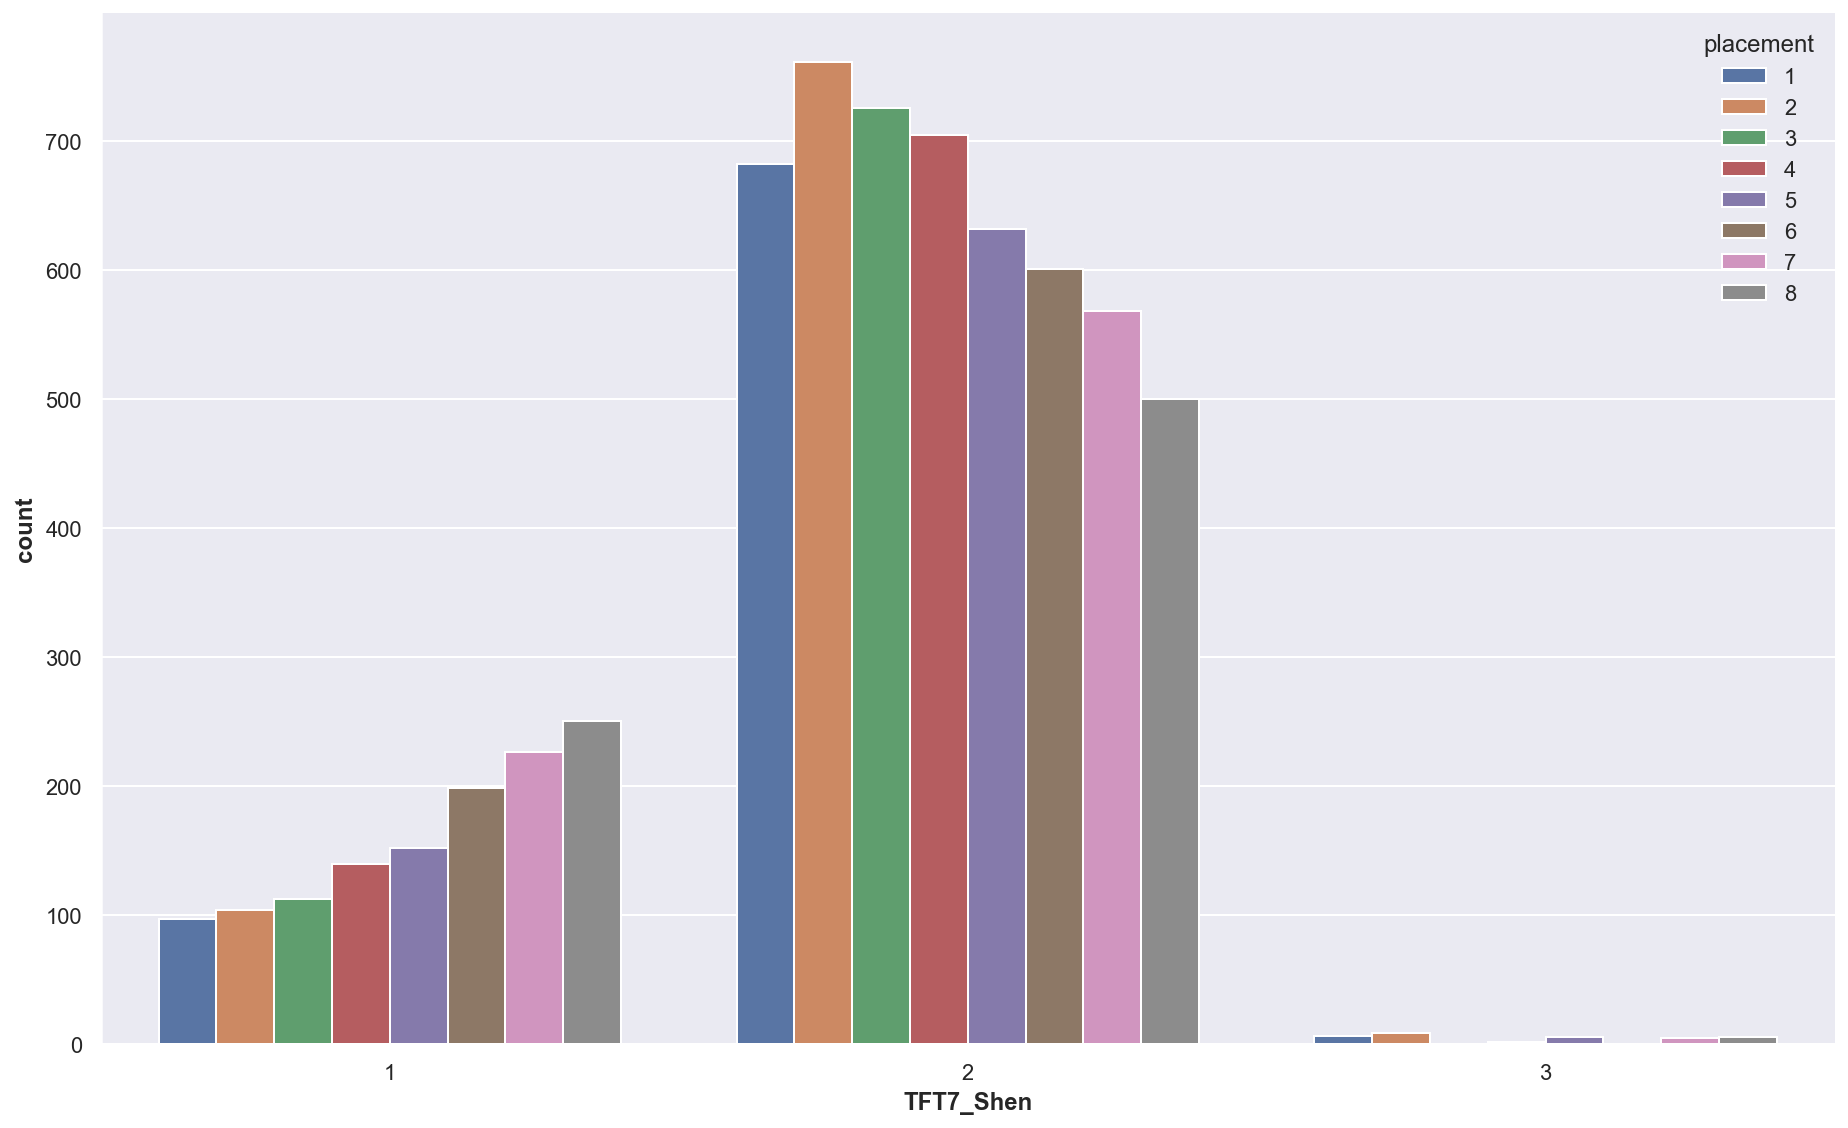

In [211]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

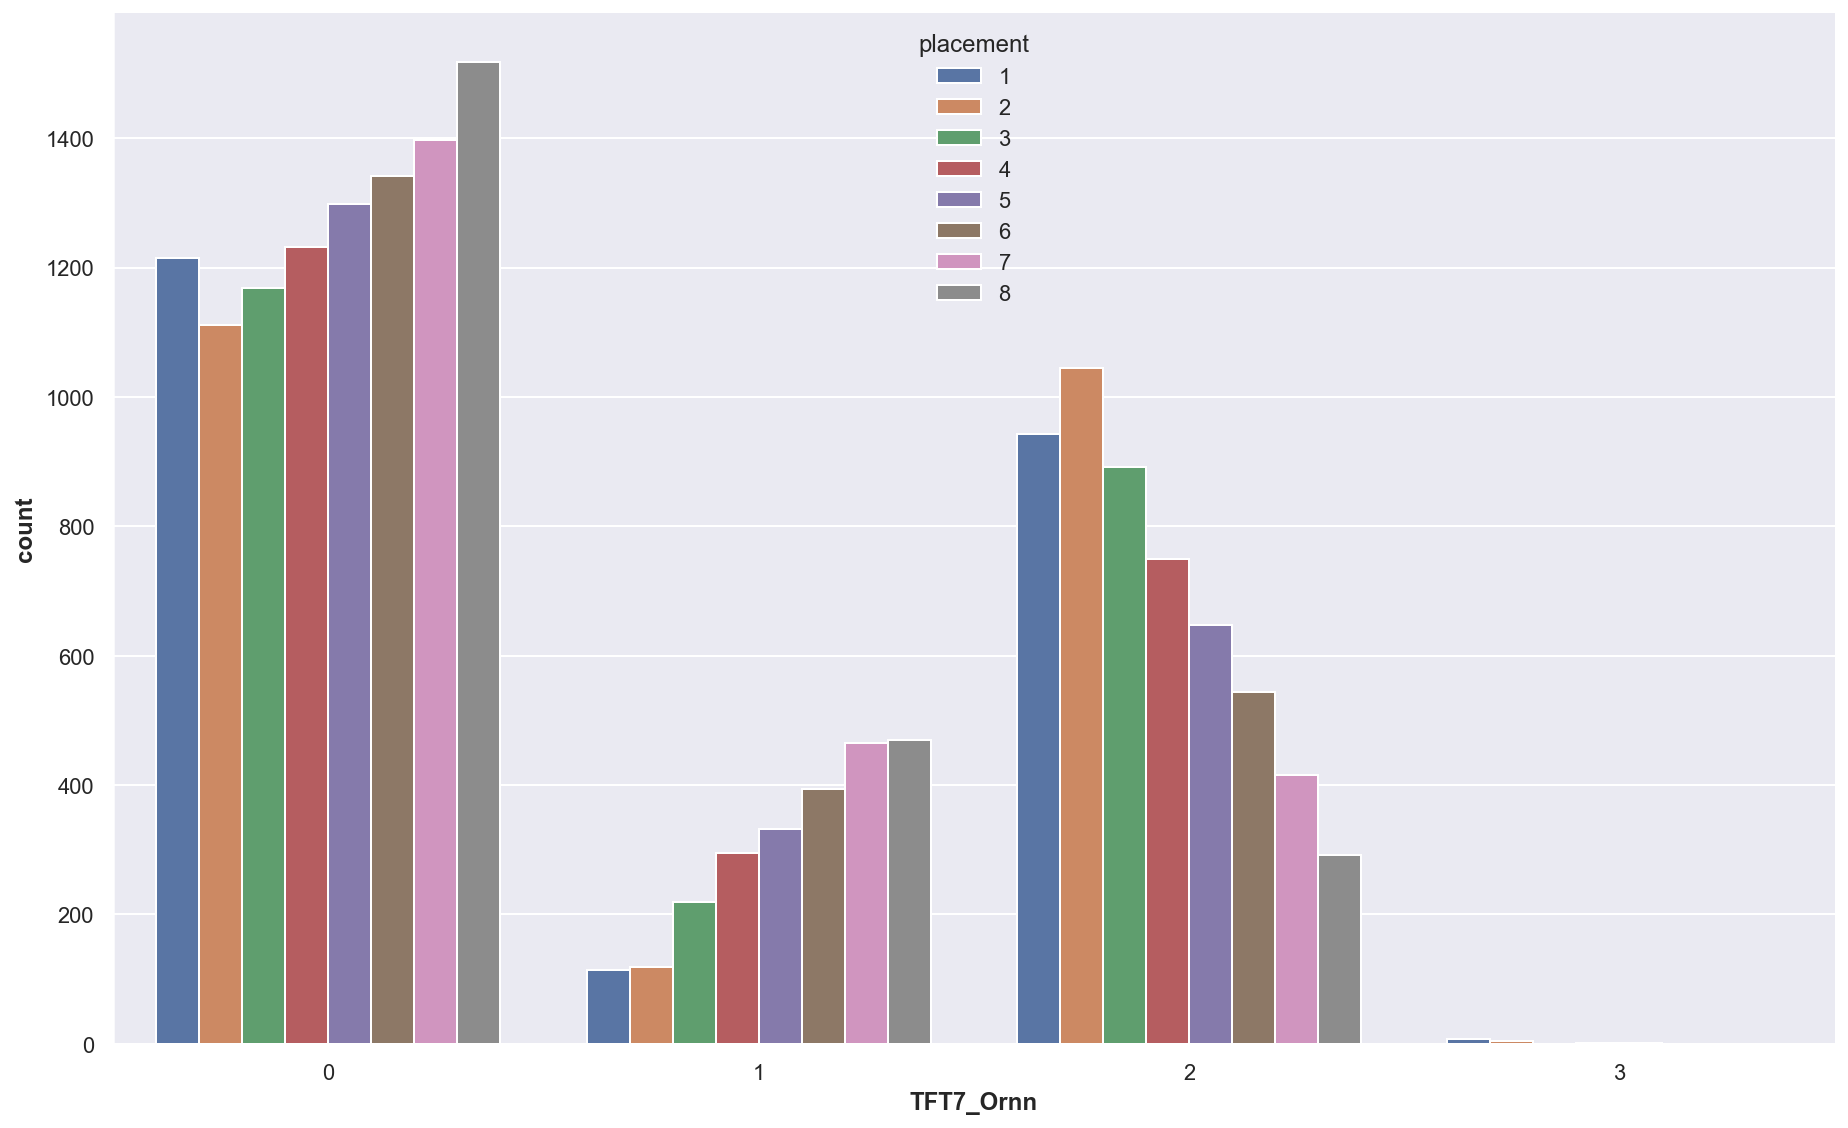

In [212]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

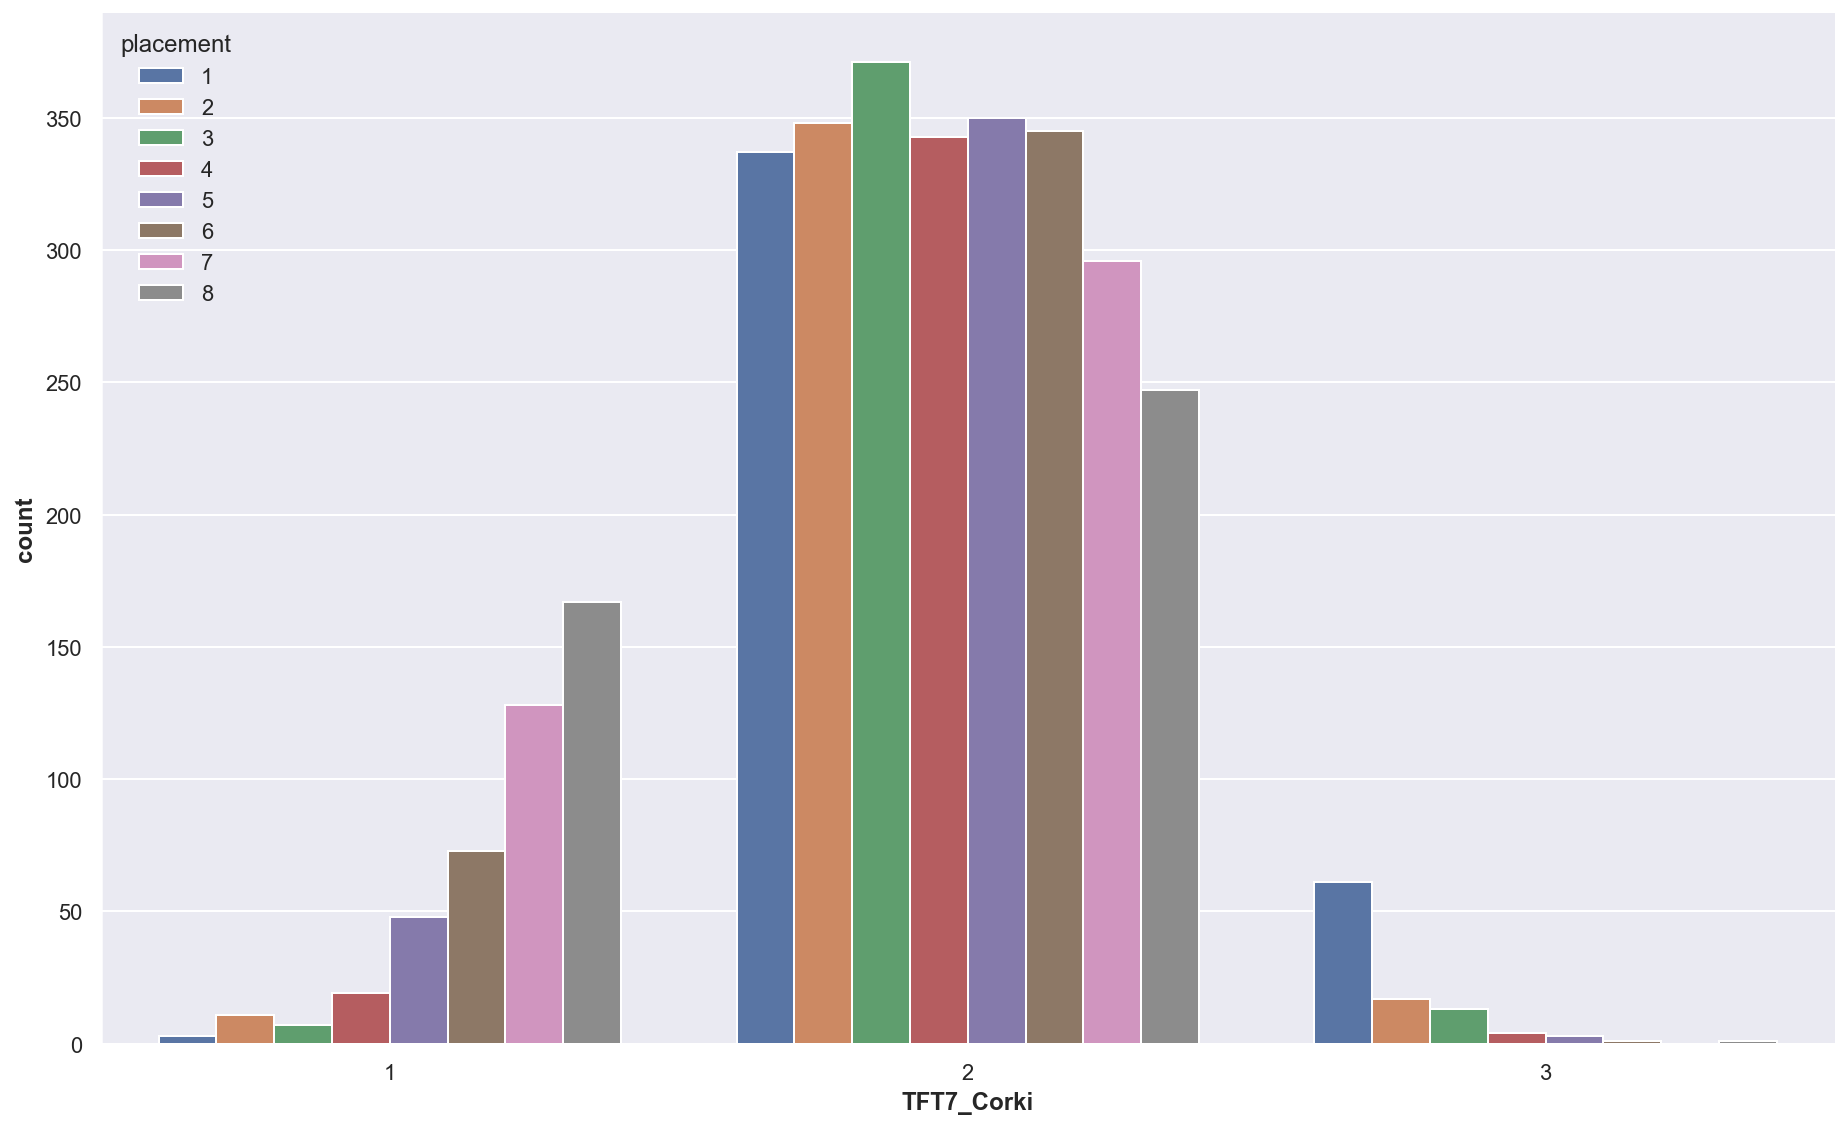

In [213]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

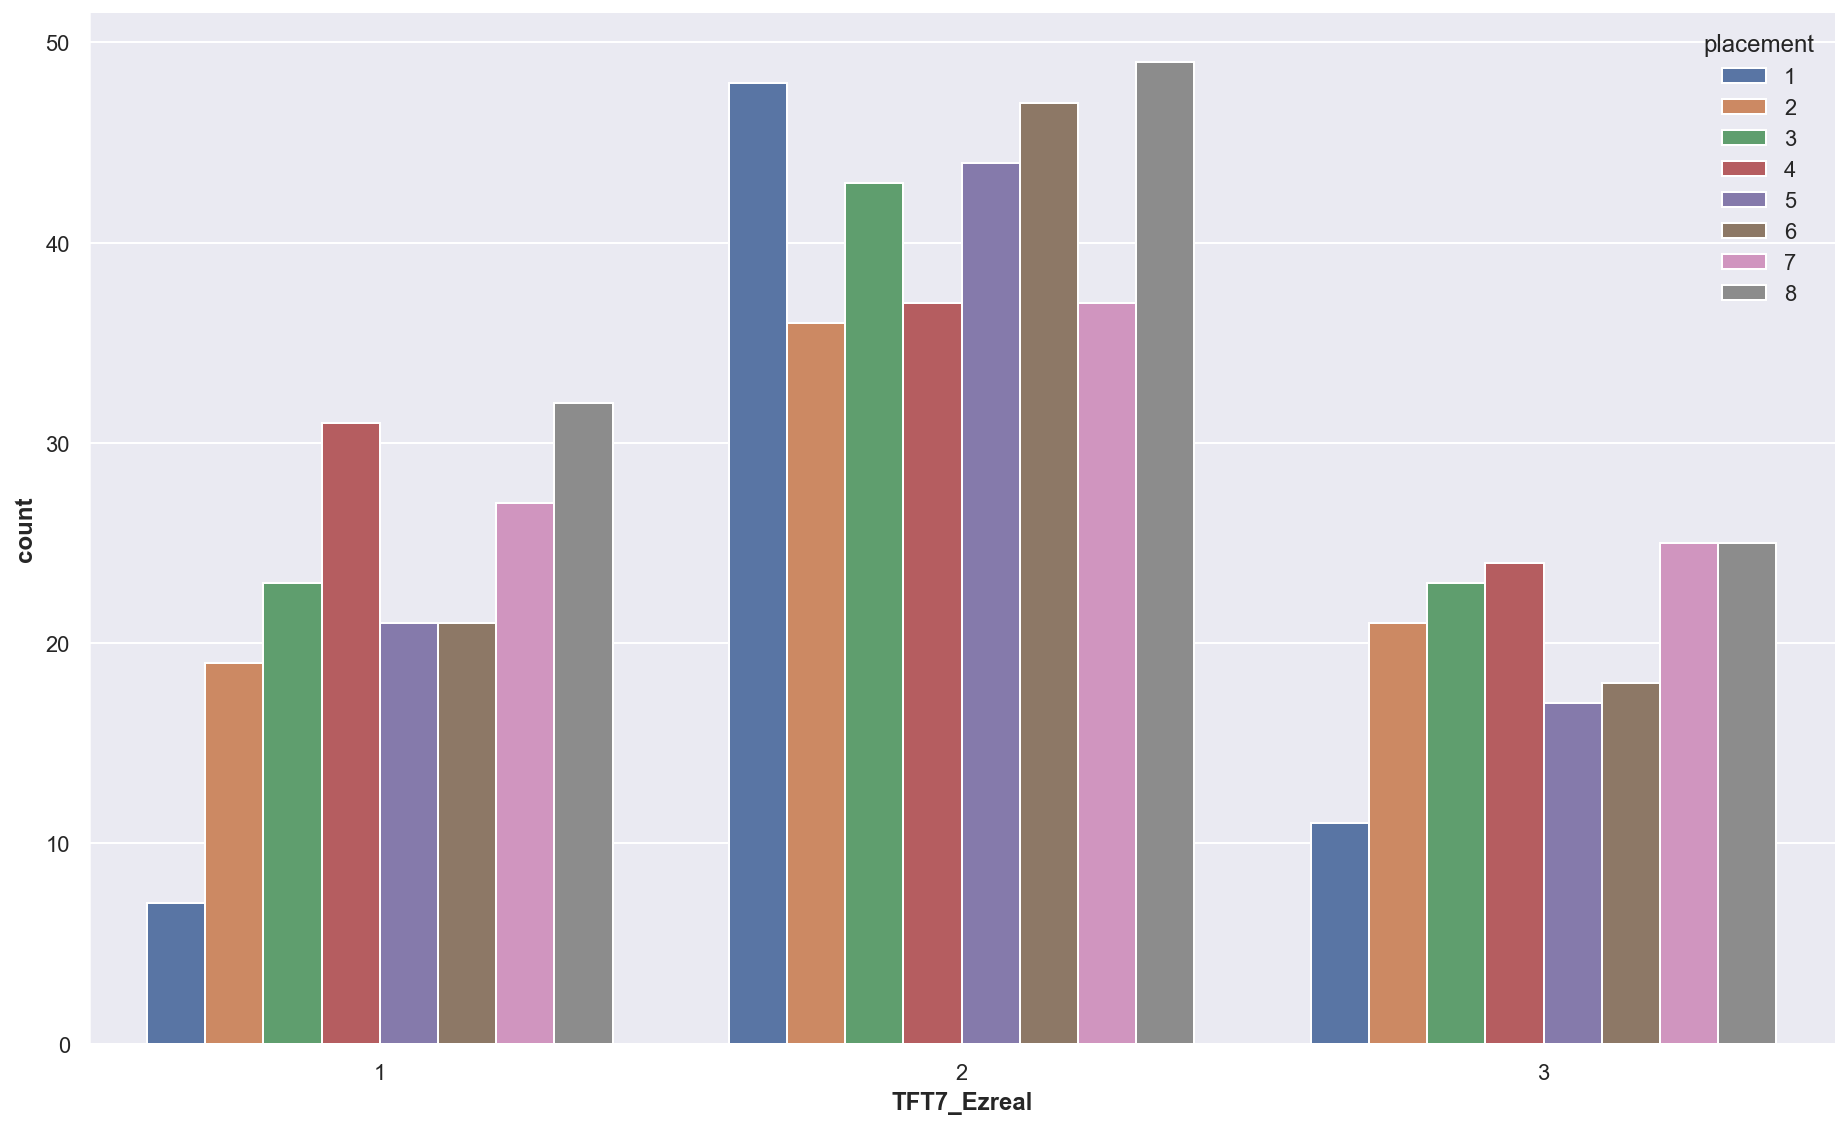

In [214]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

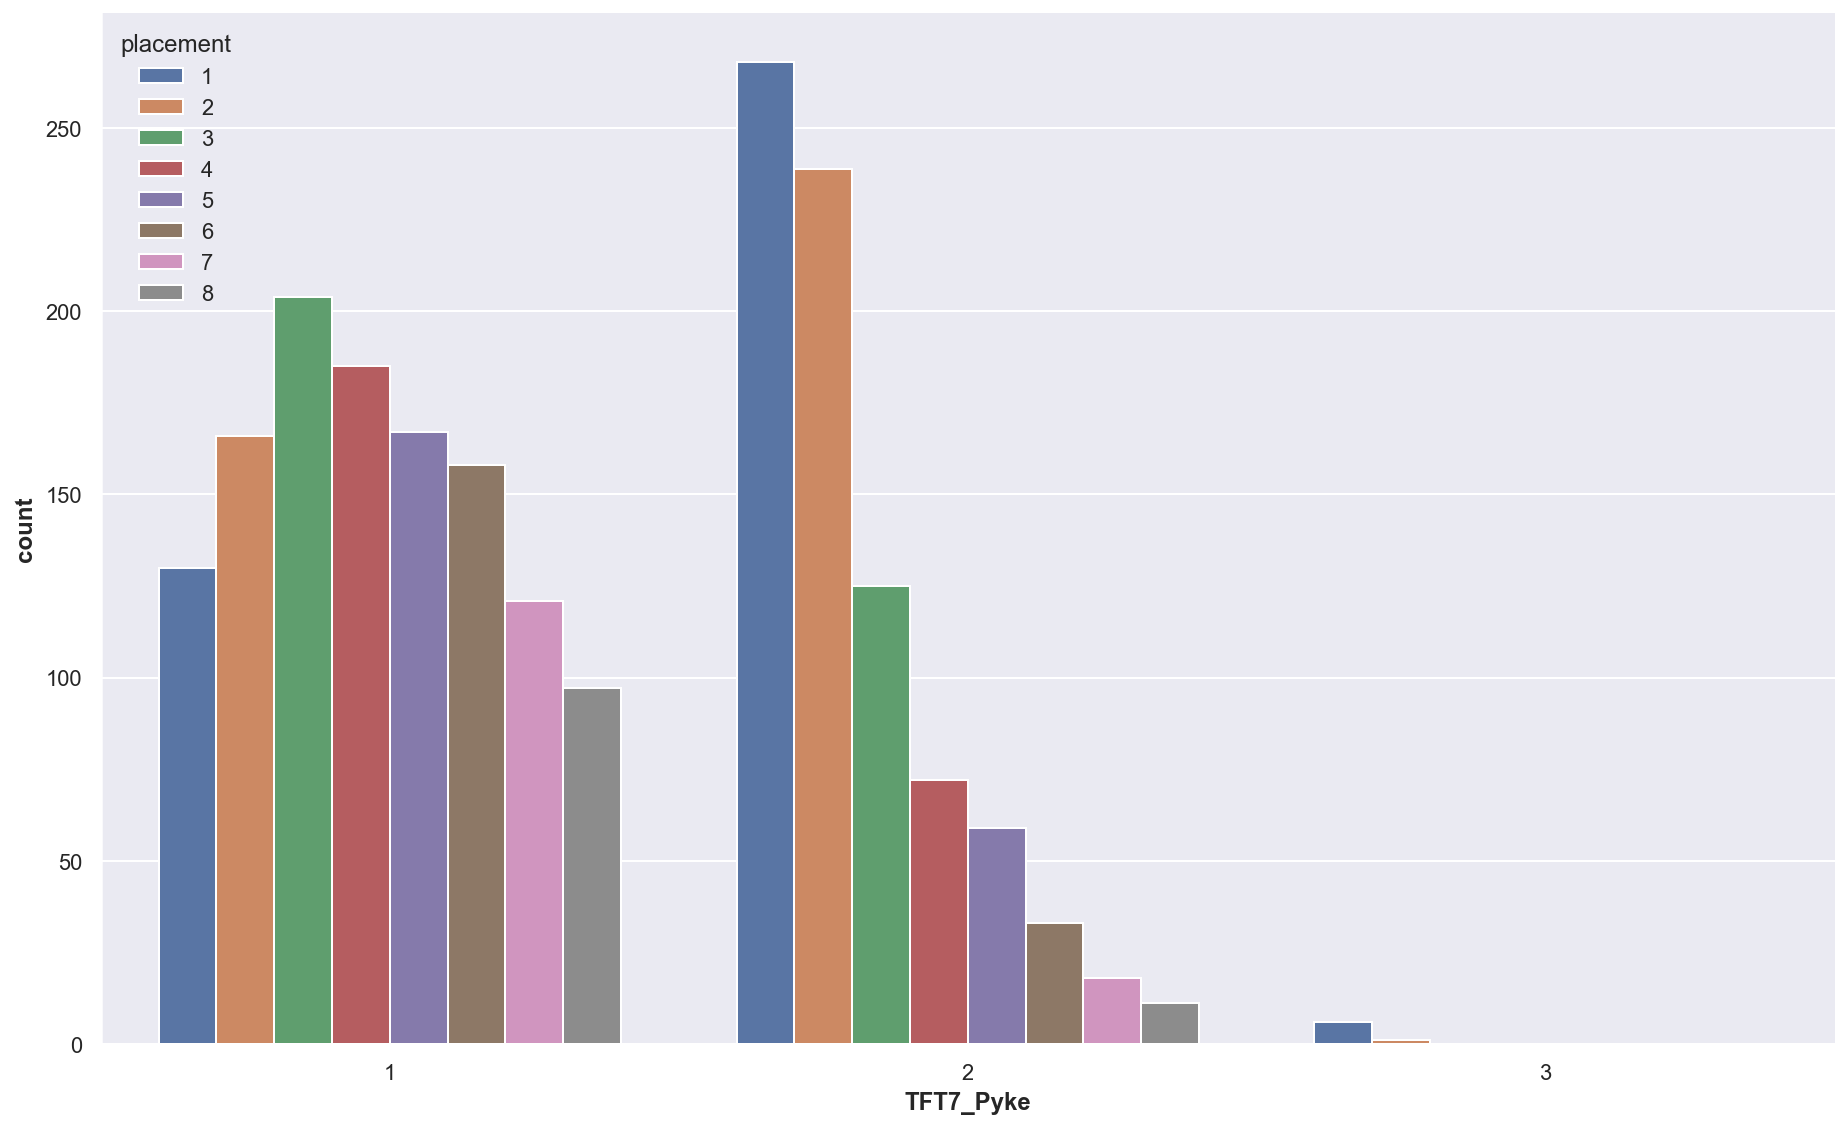

In [215]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Pyke']>0], x='TFT7_Pyke', hue=TARGETNAME)
sns.despine()

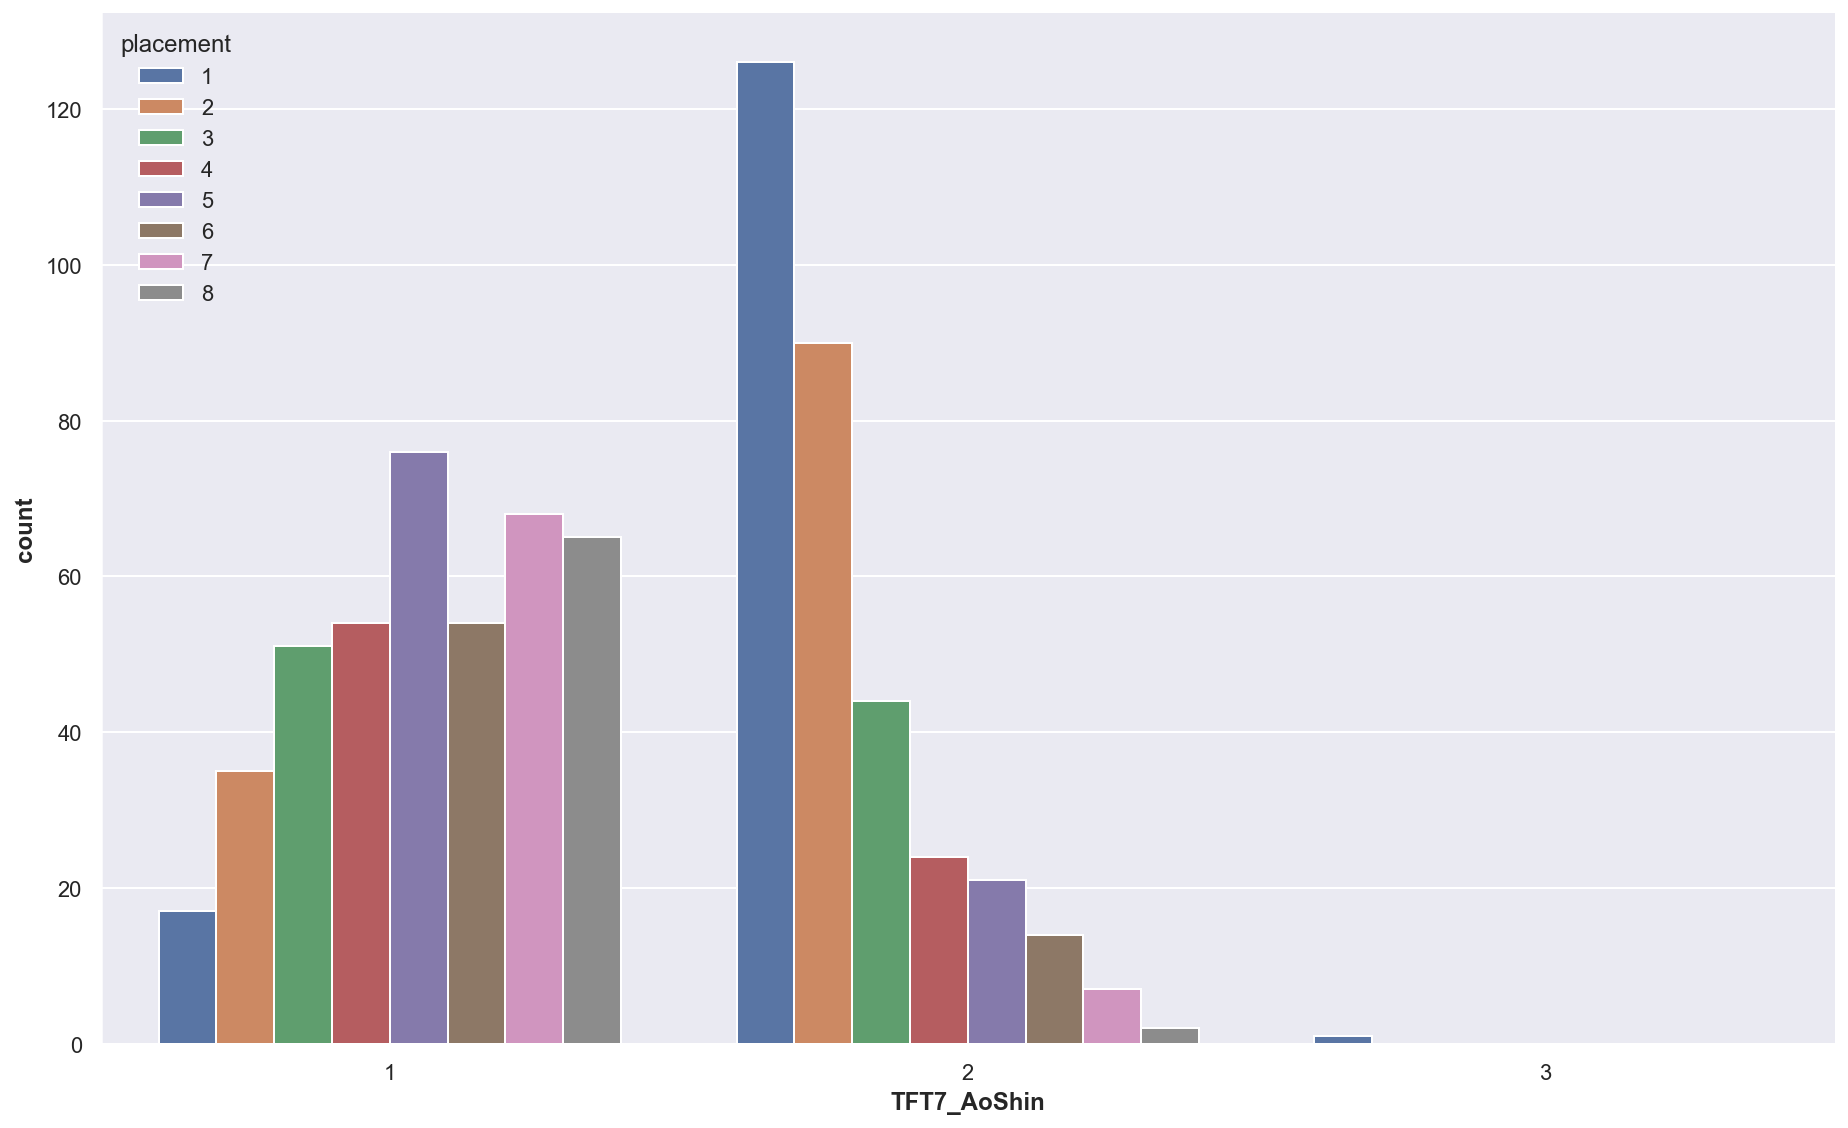

In [216]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_AoShin']>0], x='TFT7_AoShin', hue=TARGETNAME)
sns.despine()

Daeja.


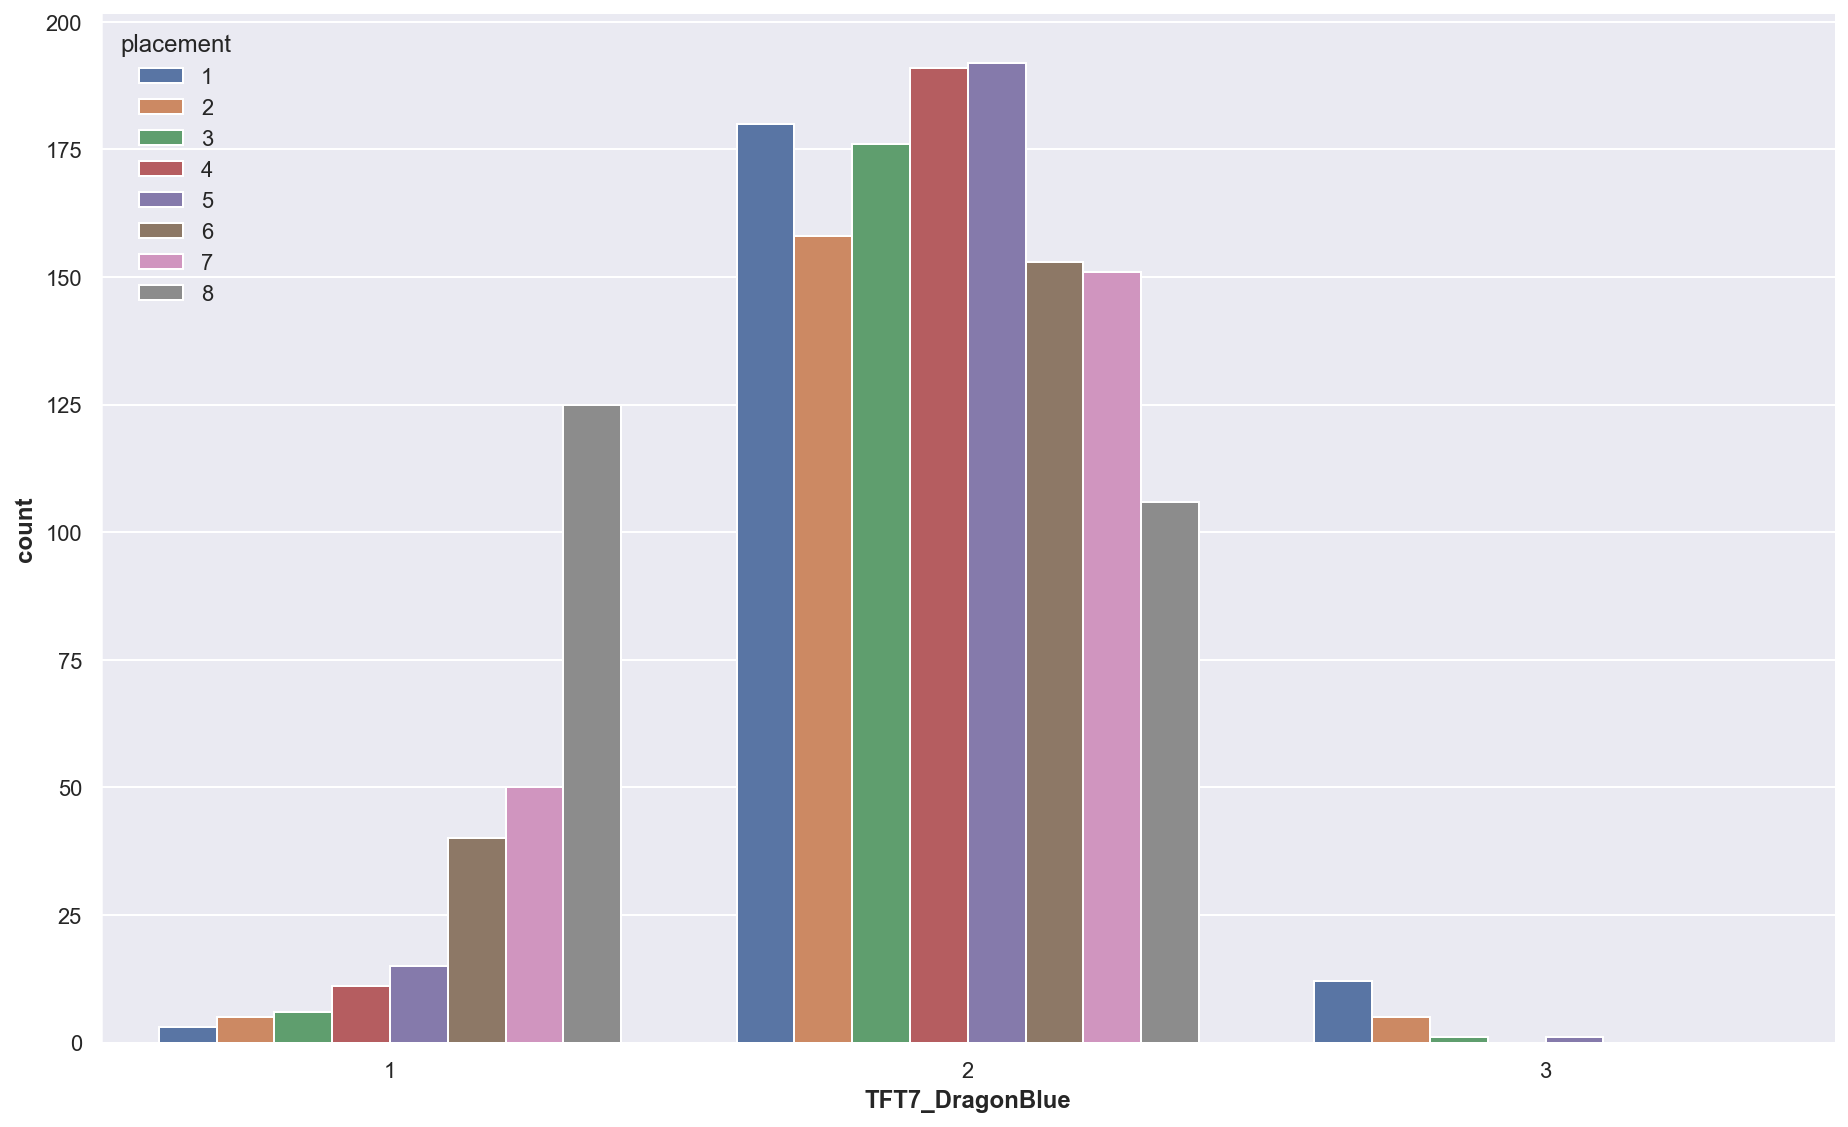

In [217]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

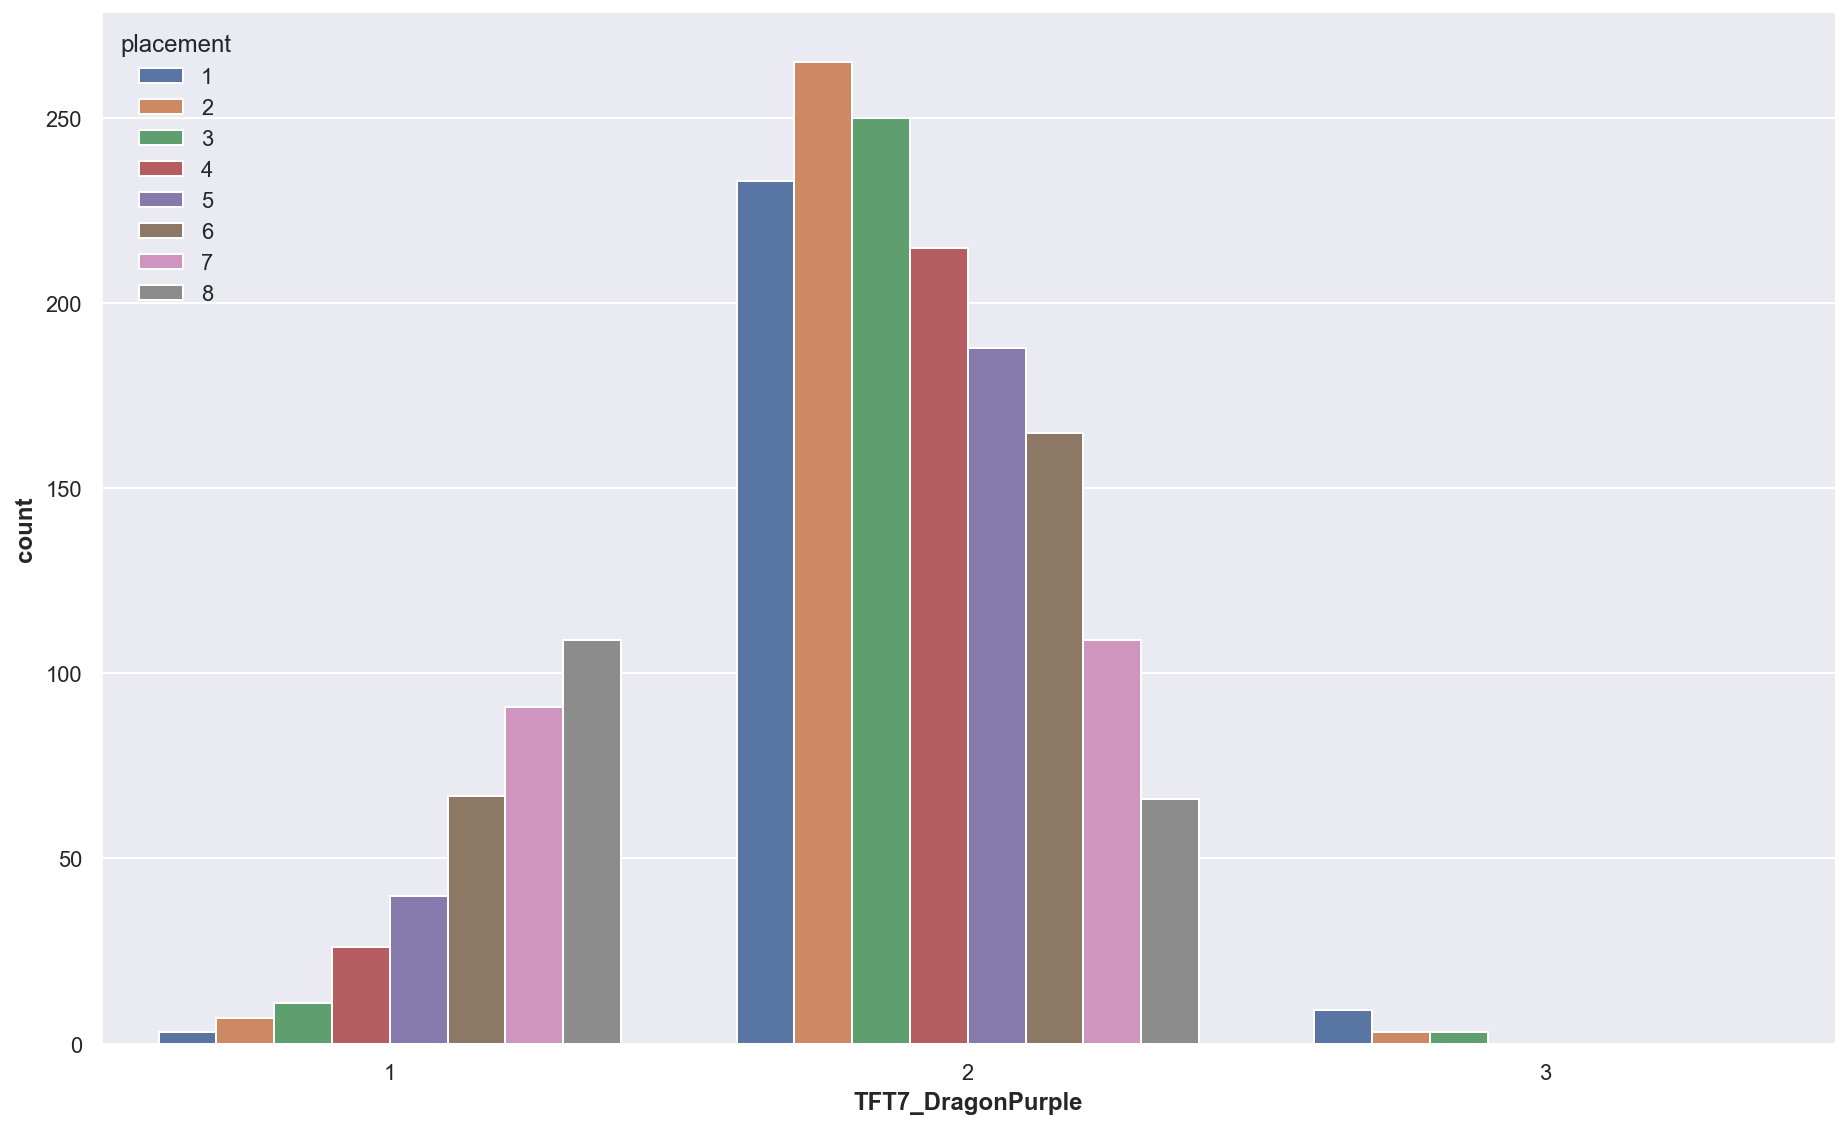

In [218]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonPurple']>0], x='TFT7_DragonPurple', hue=TARGETNAME)
sns.despine()

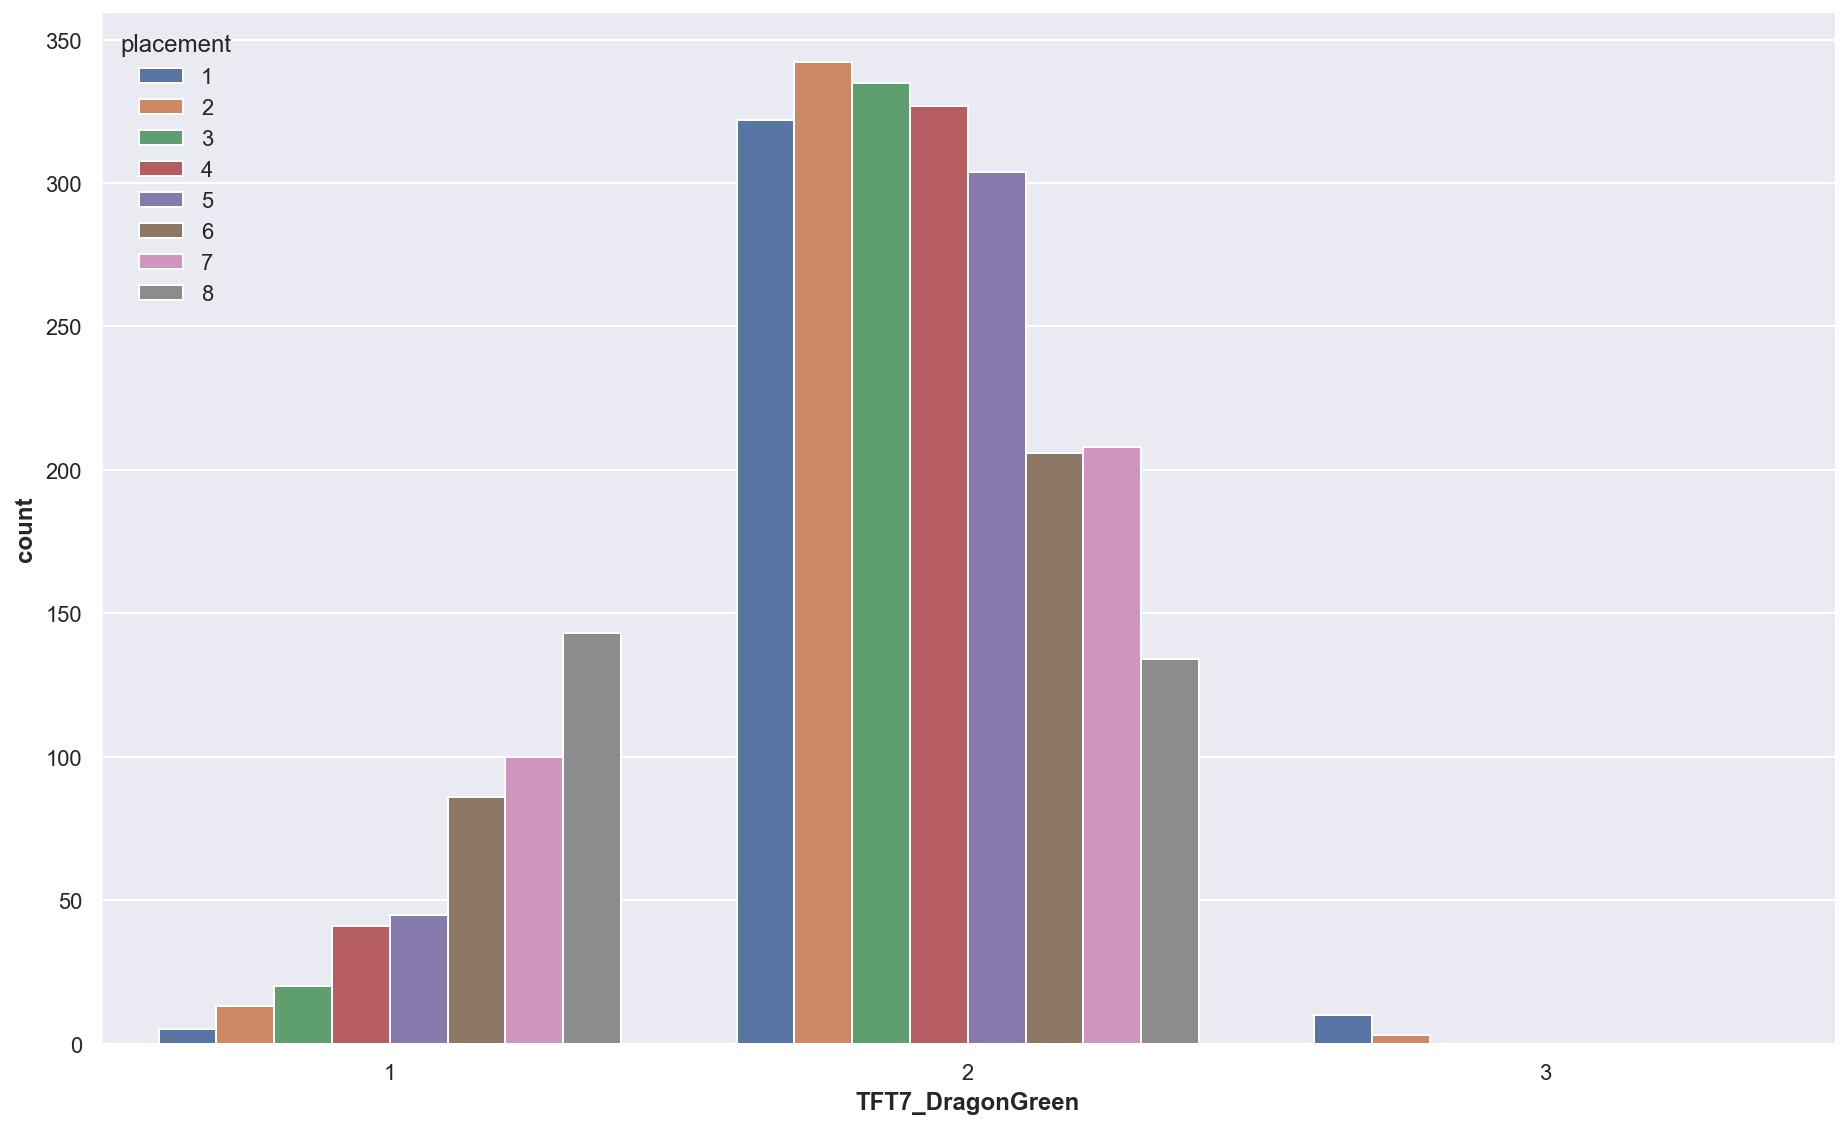

In [219]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGreen']>0], x='TFT7_DragonGreen', hue=TARGETNAME)
sns.despine()

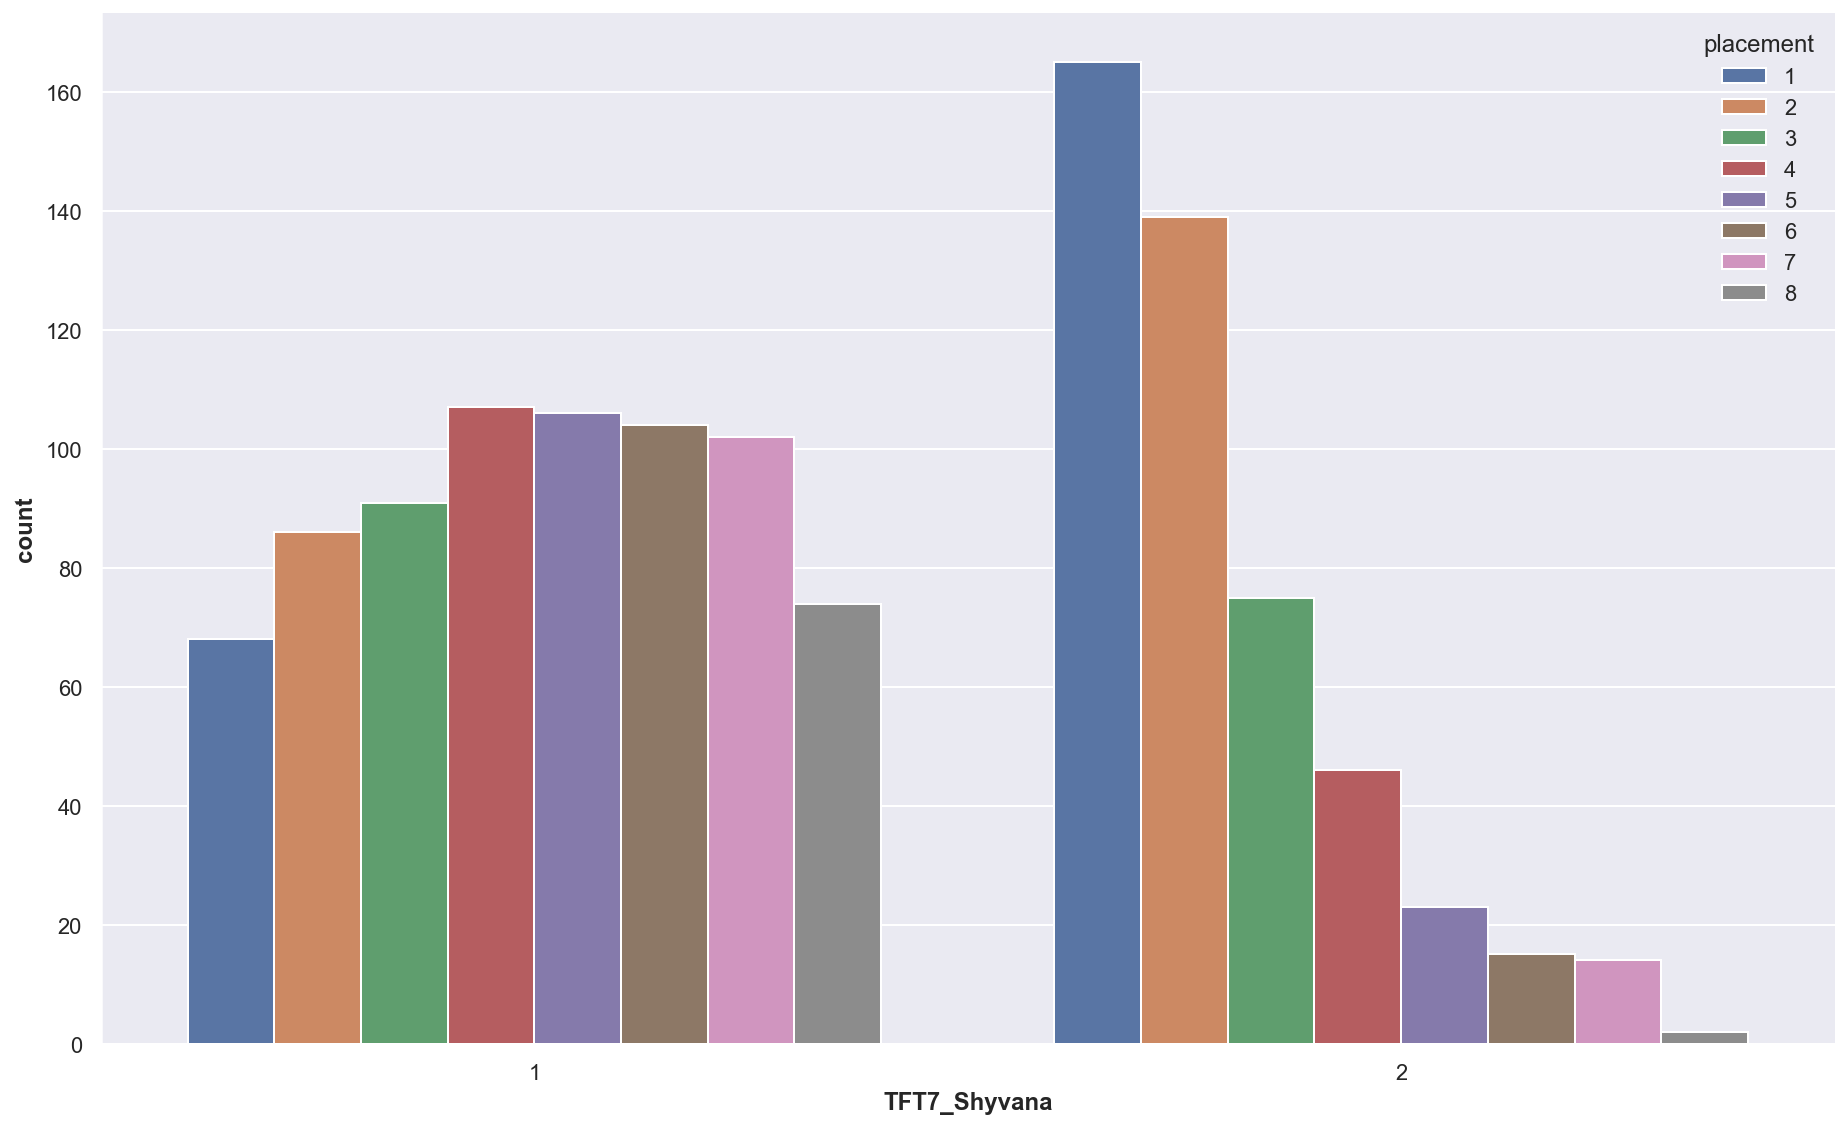

In [220]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shyvana']>0], x='TFT7_Shyvana', hue=TARGETNAME)
sns.despine()

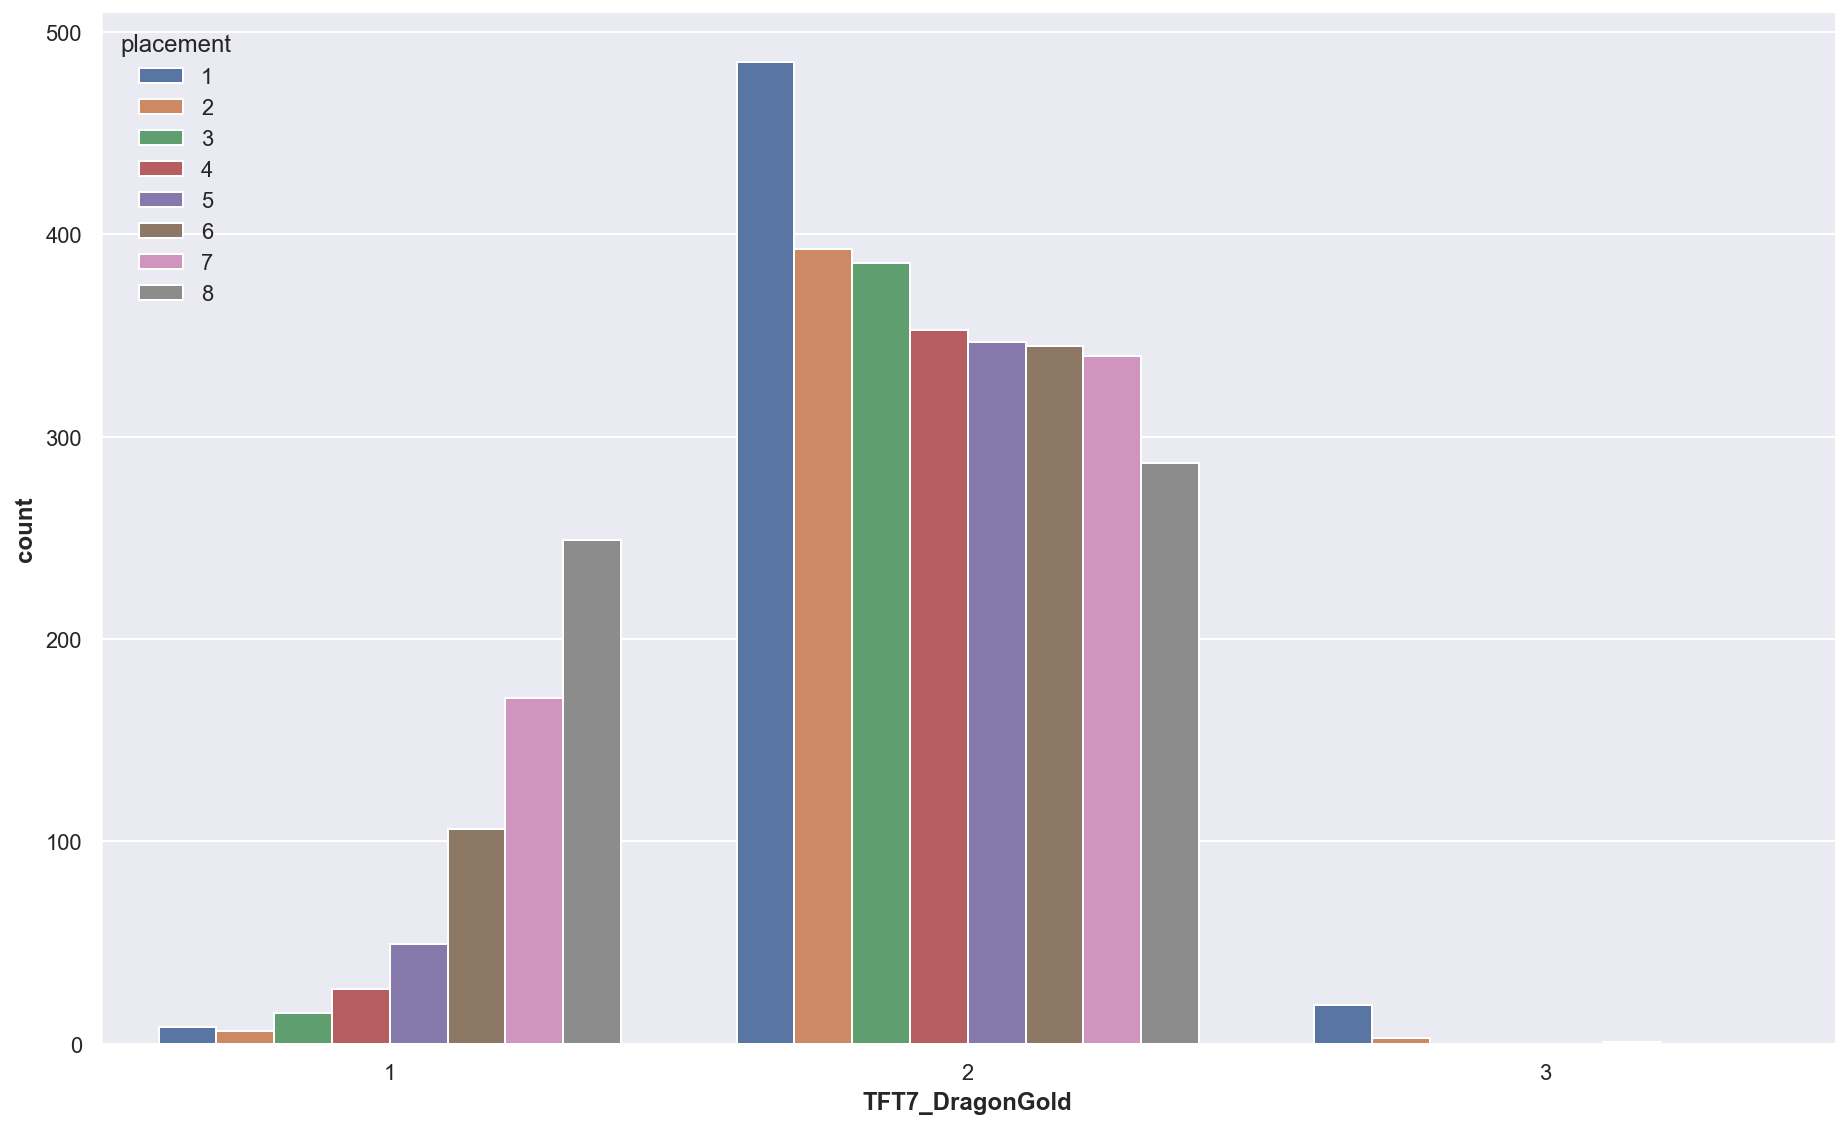

In [221]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGold']>0], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

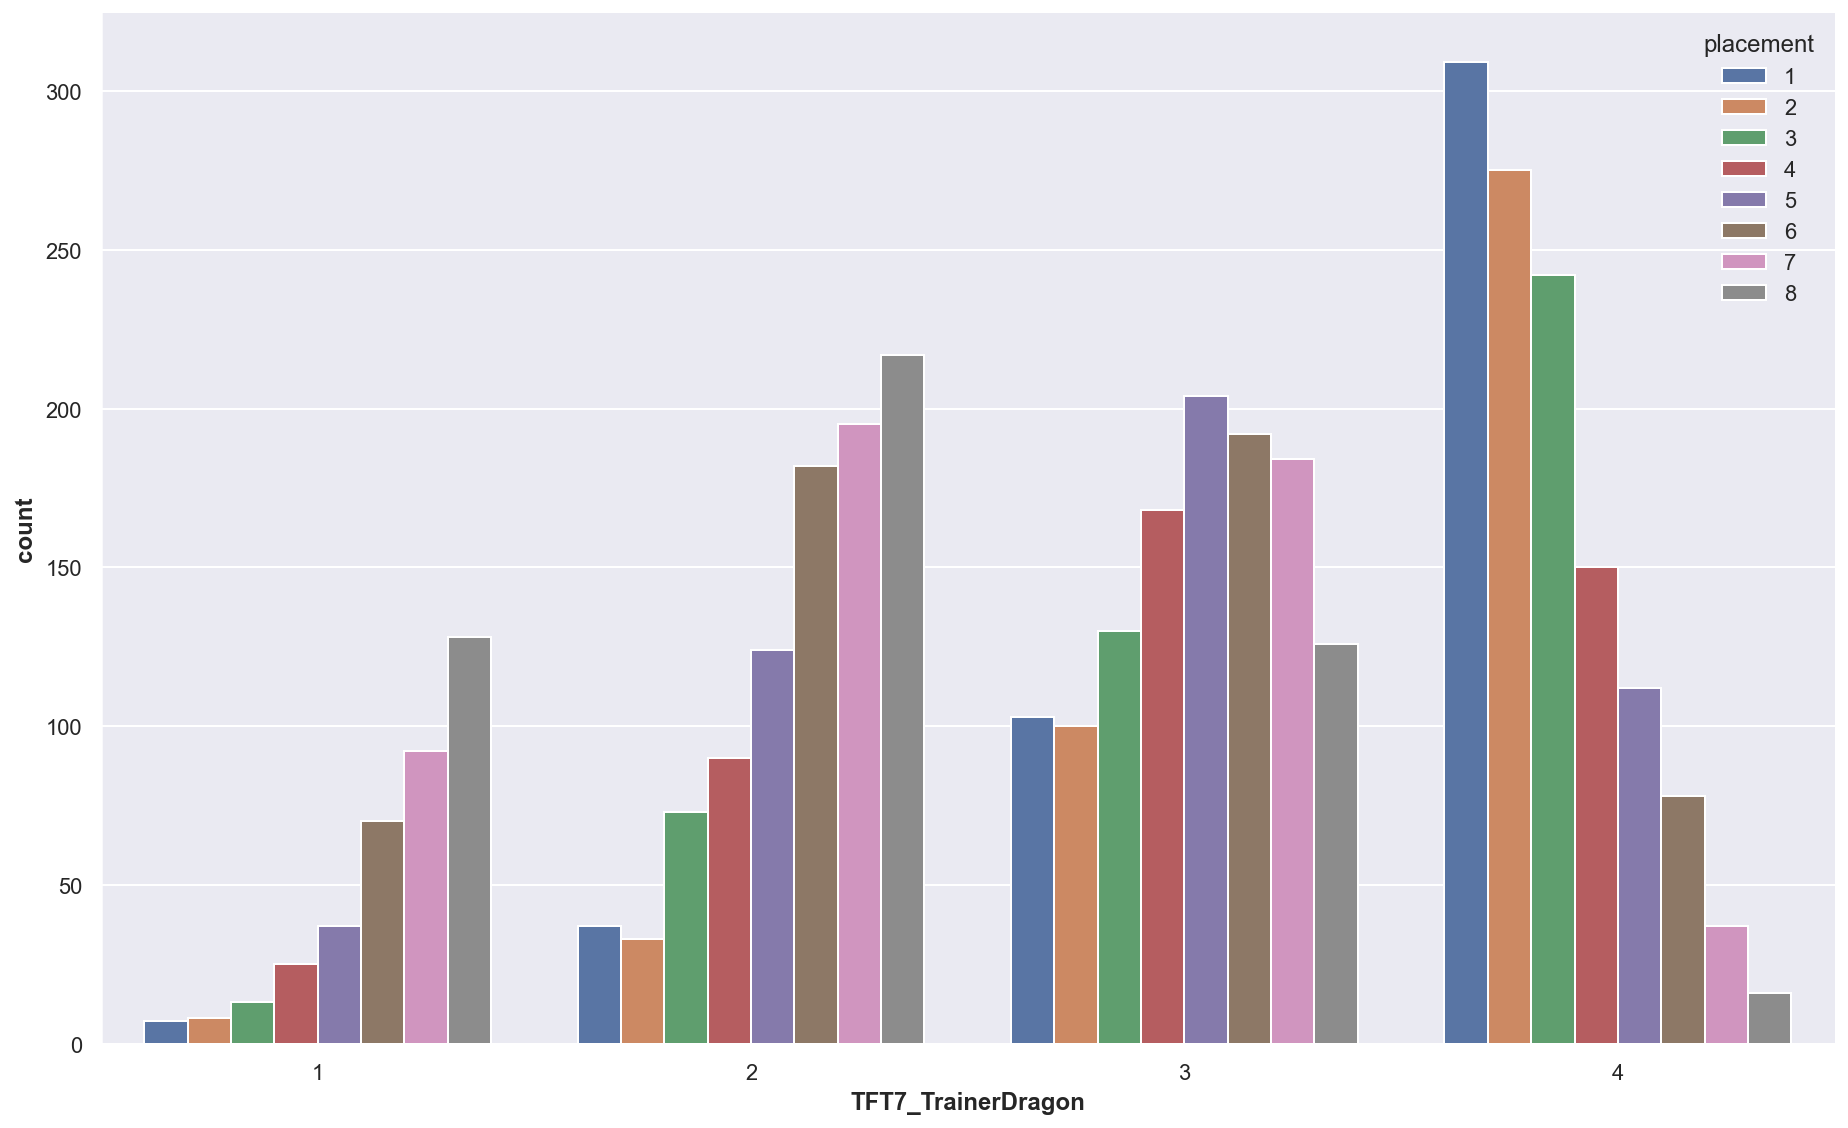

In [222]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


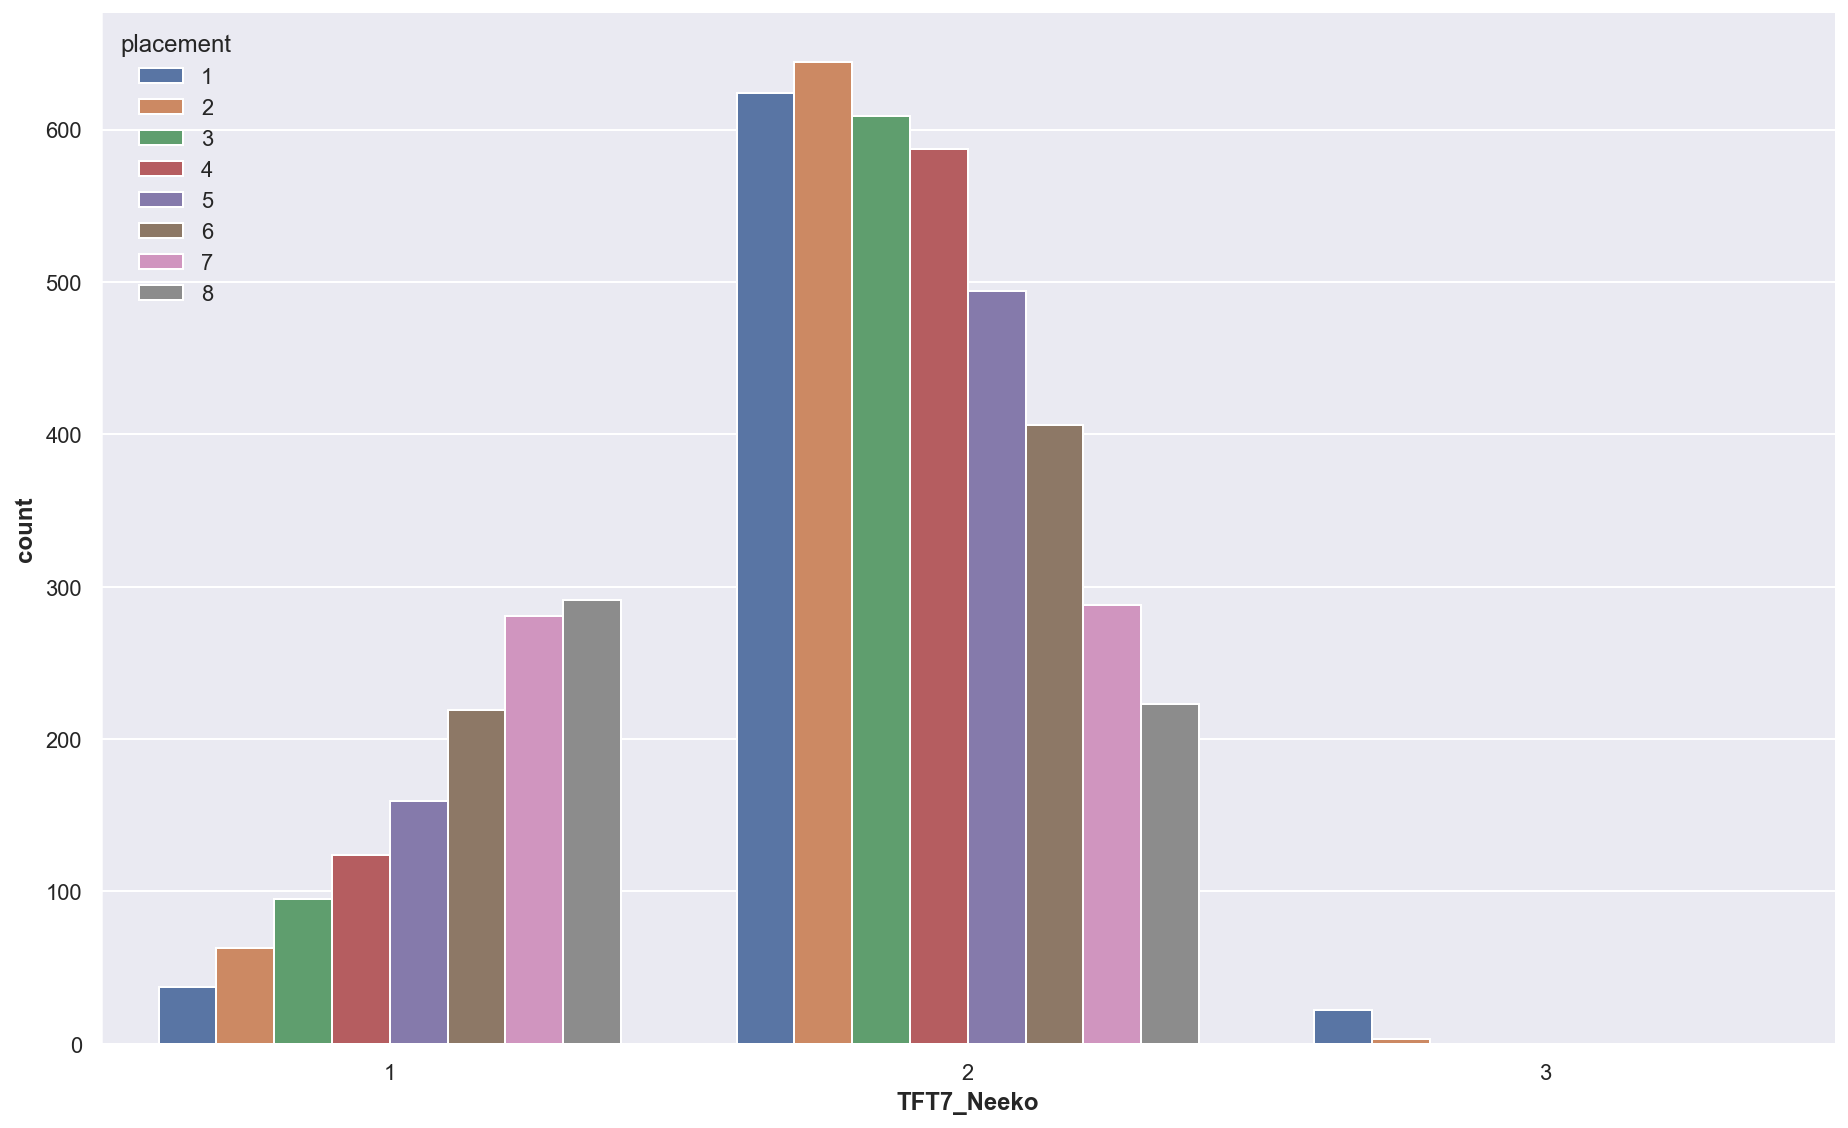

In [223]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

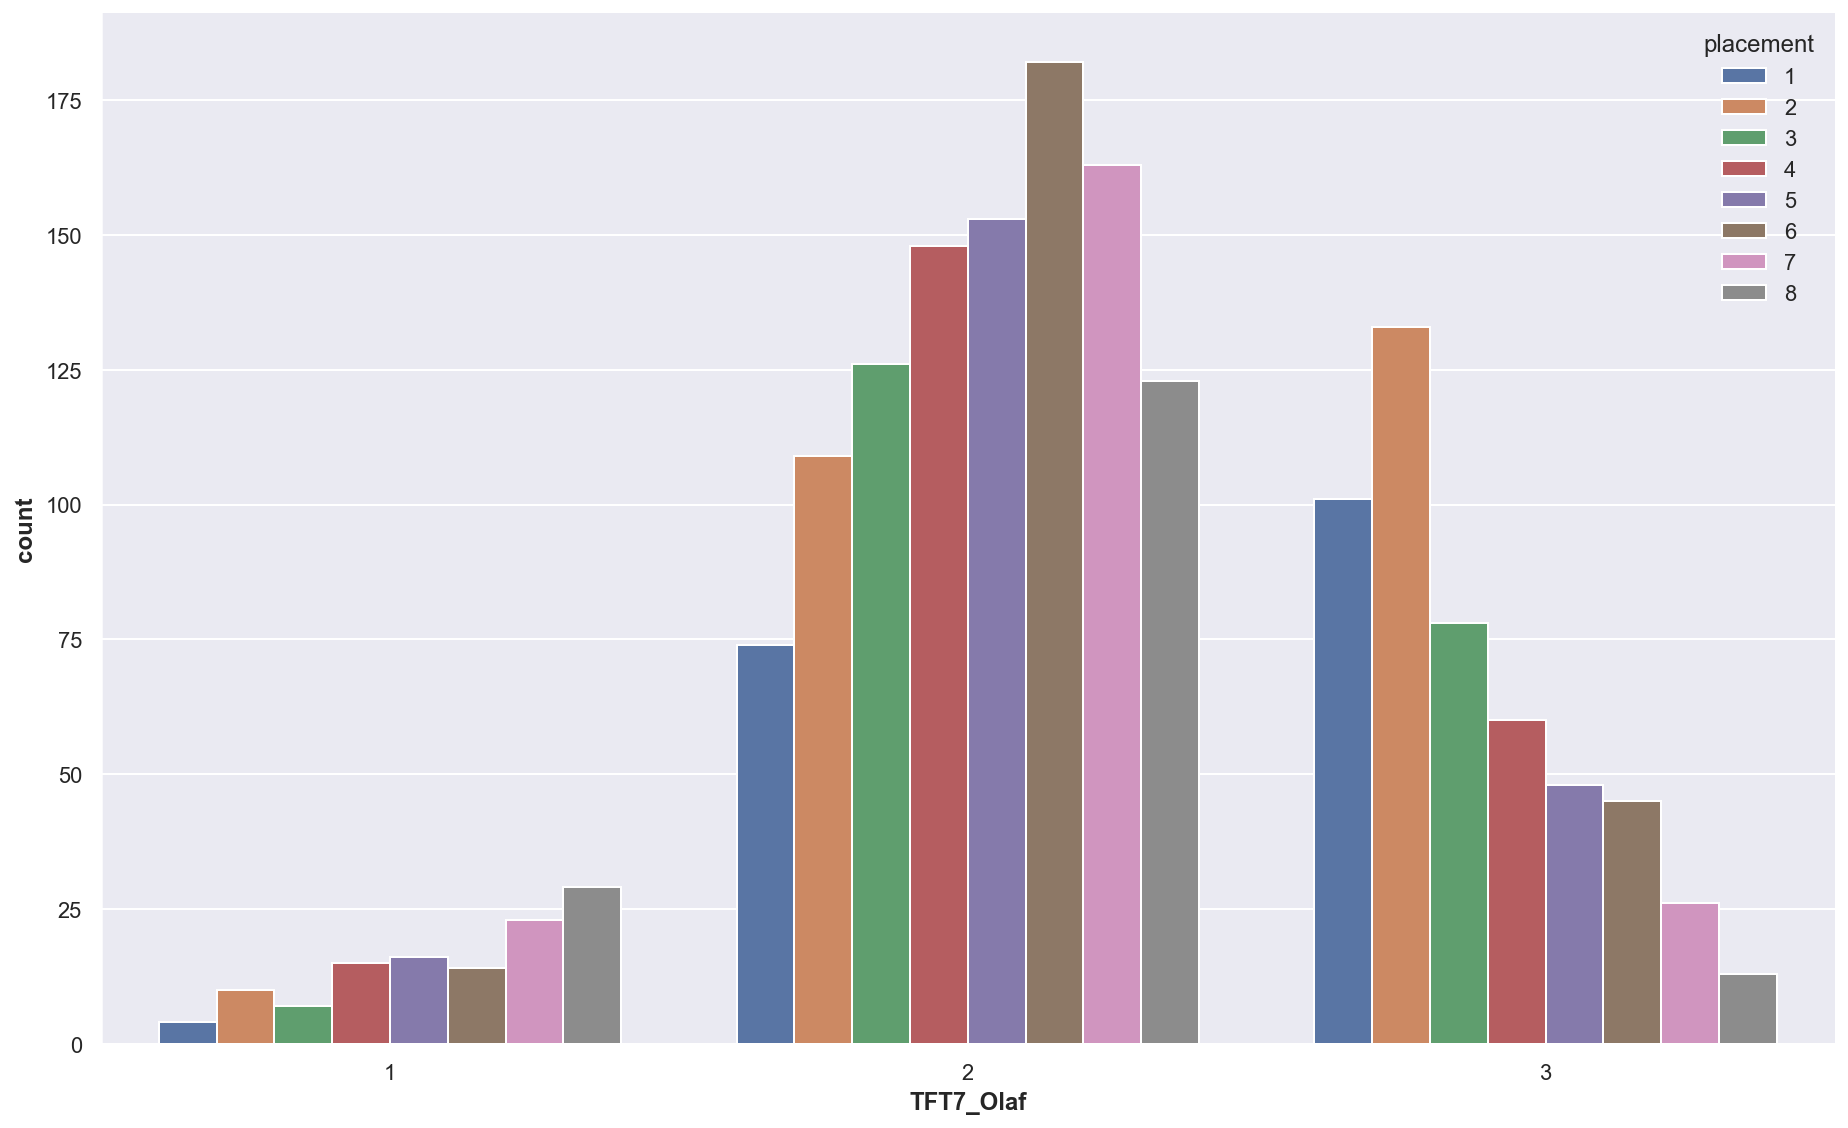

In [224]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

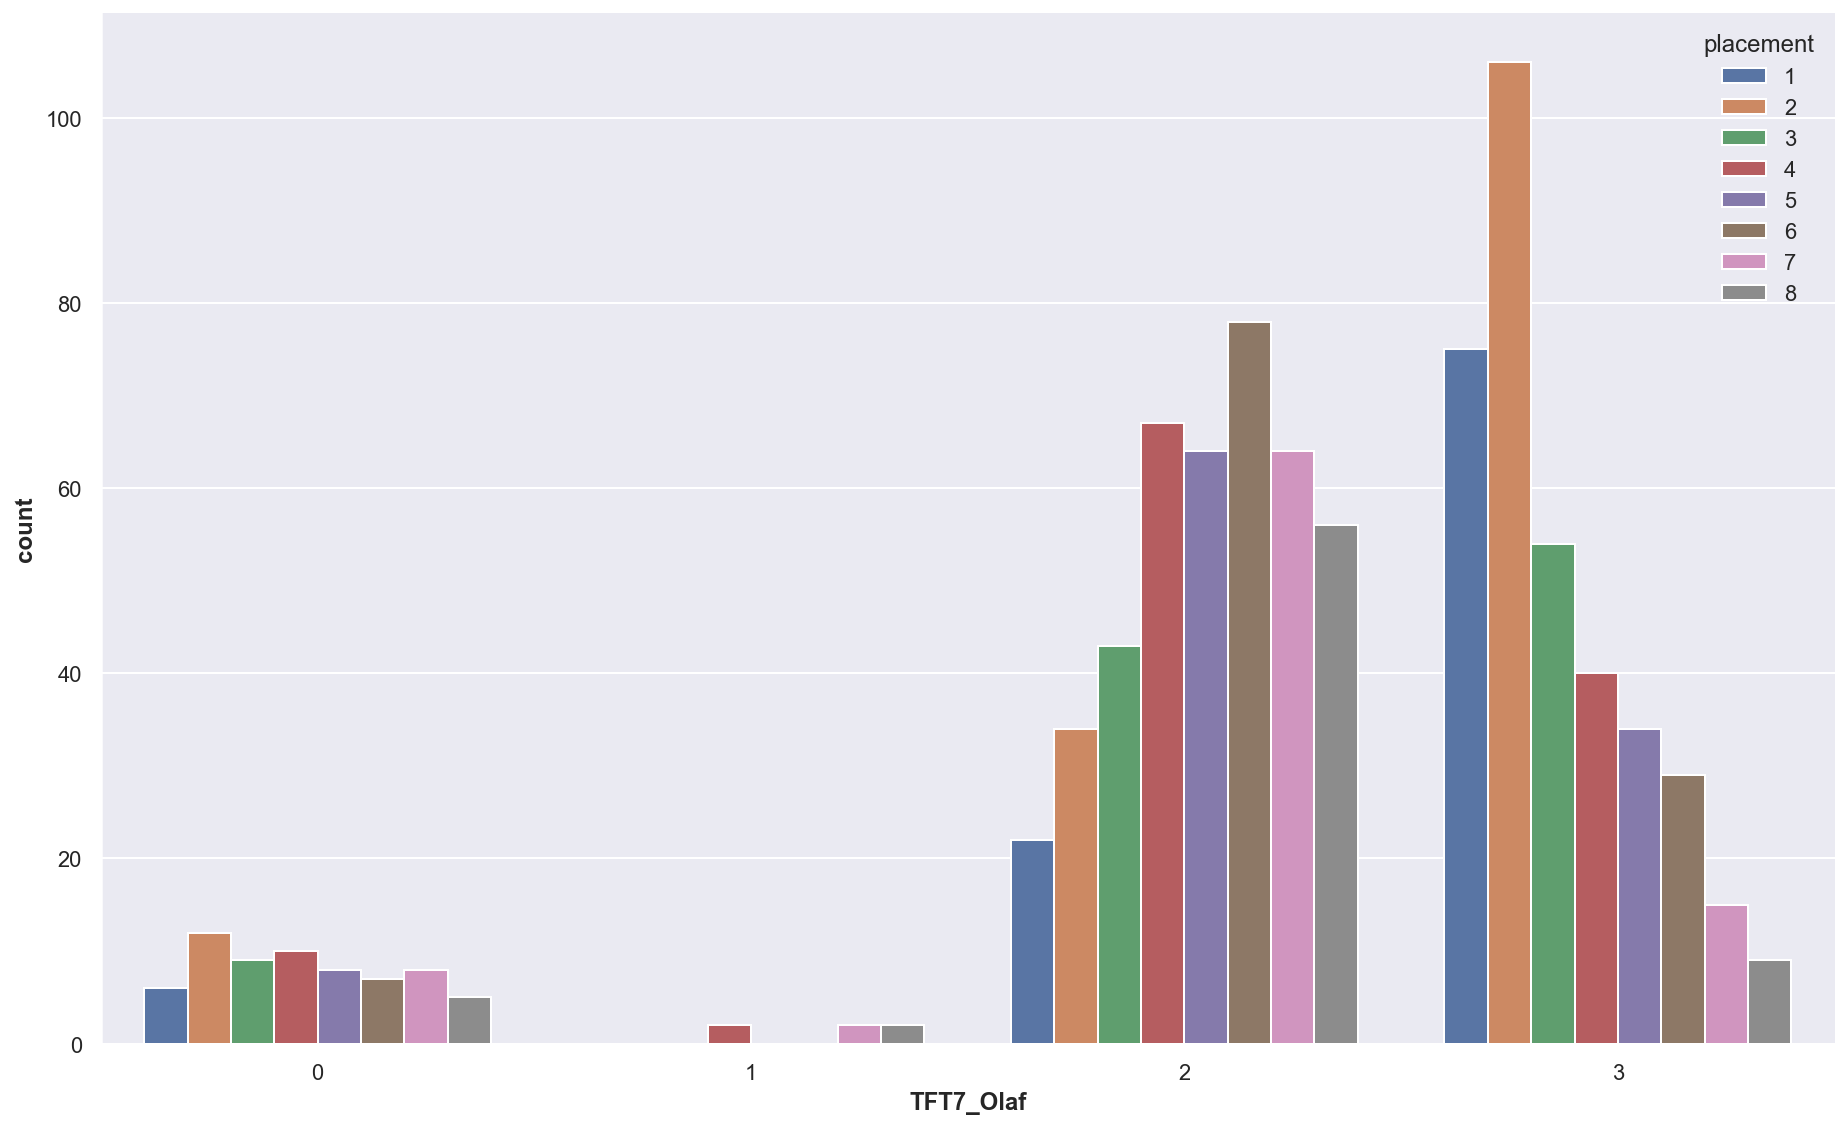

In [225]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

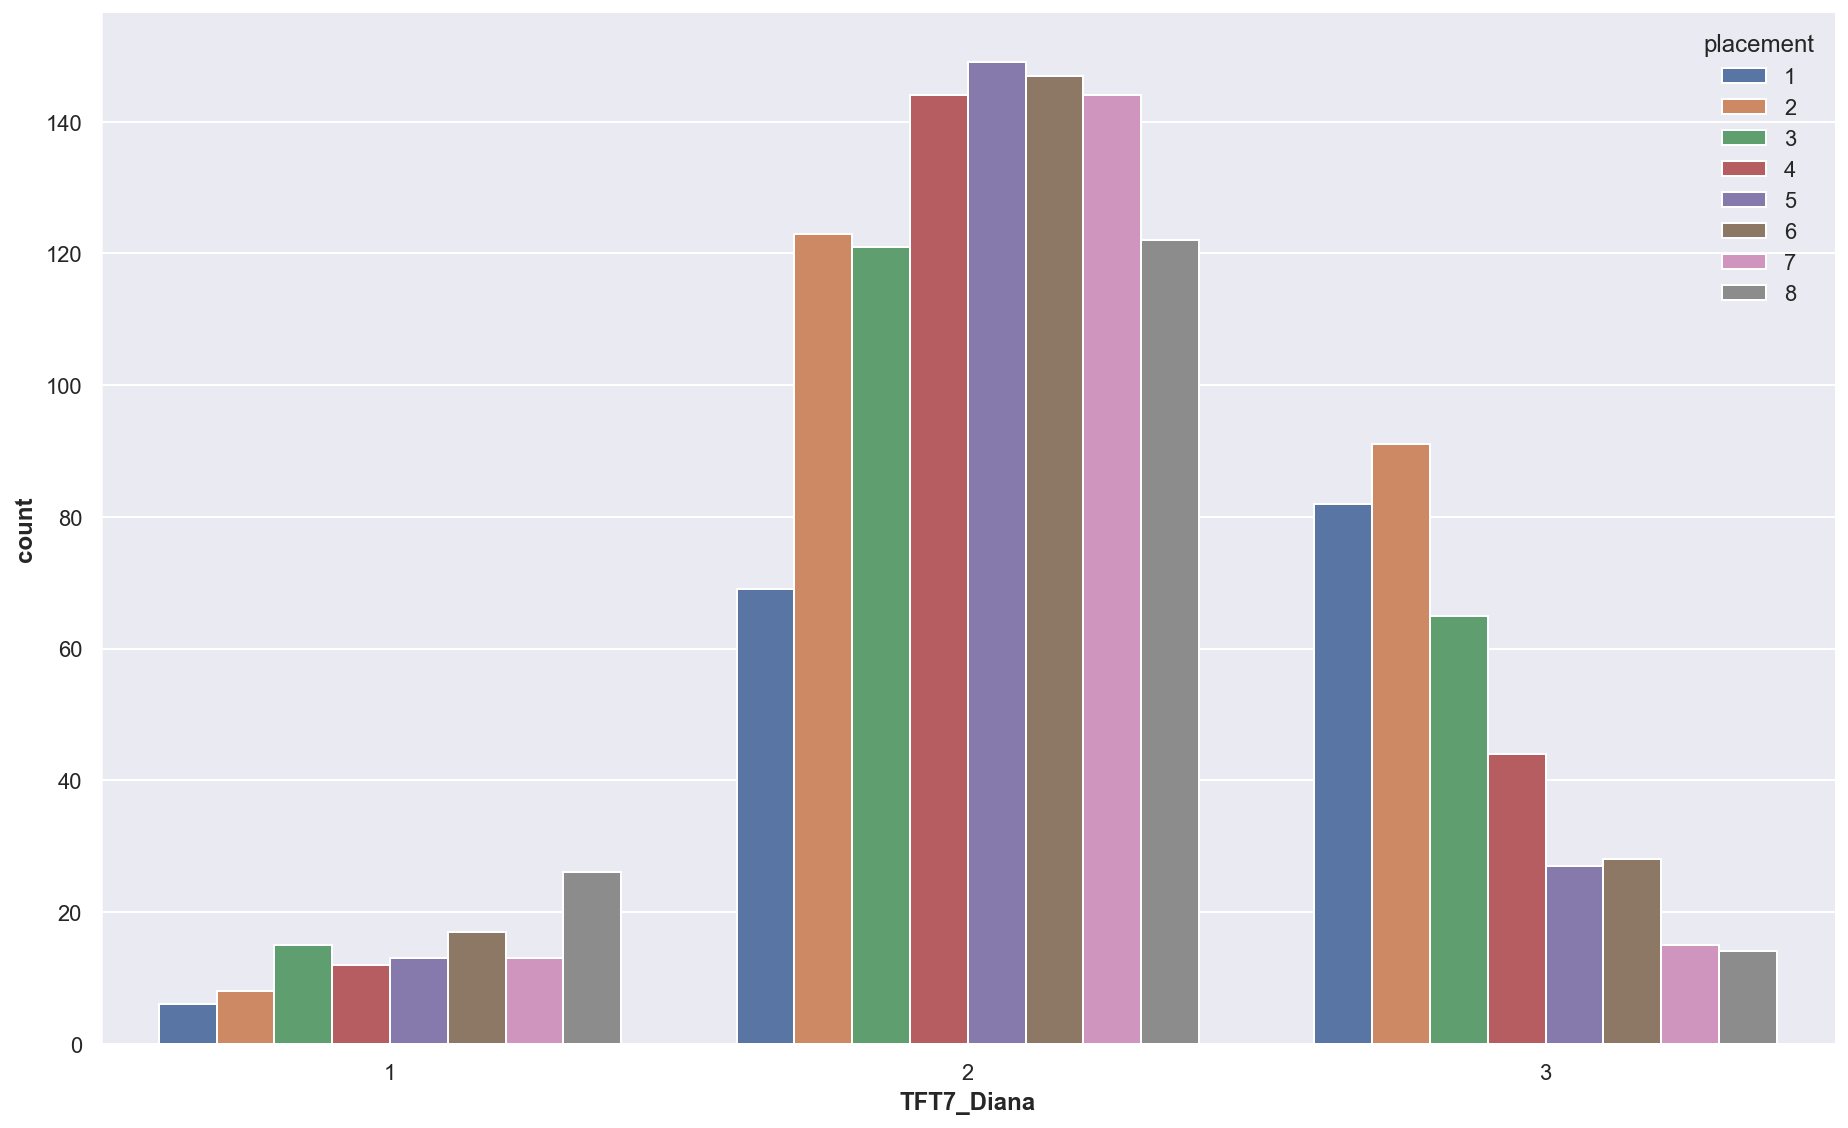

In [226]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

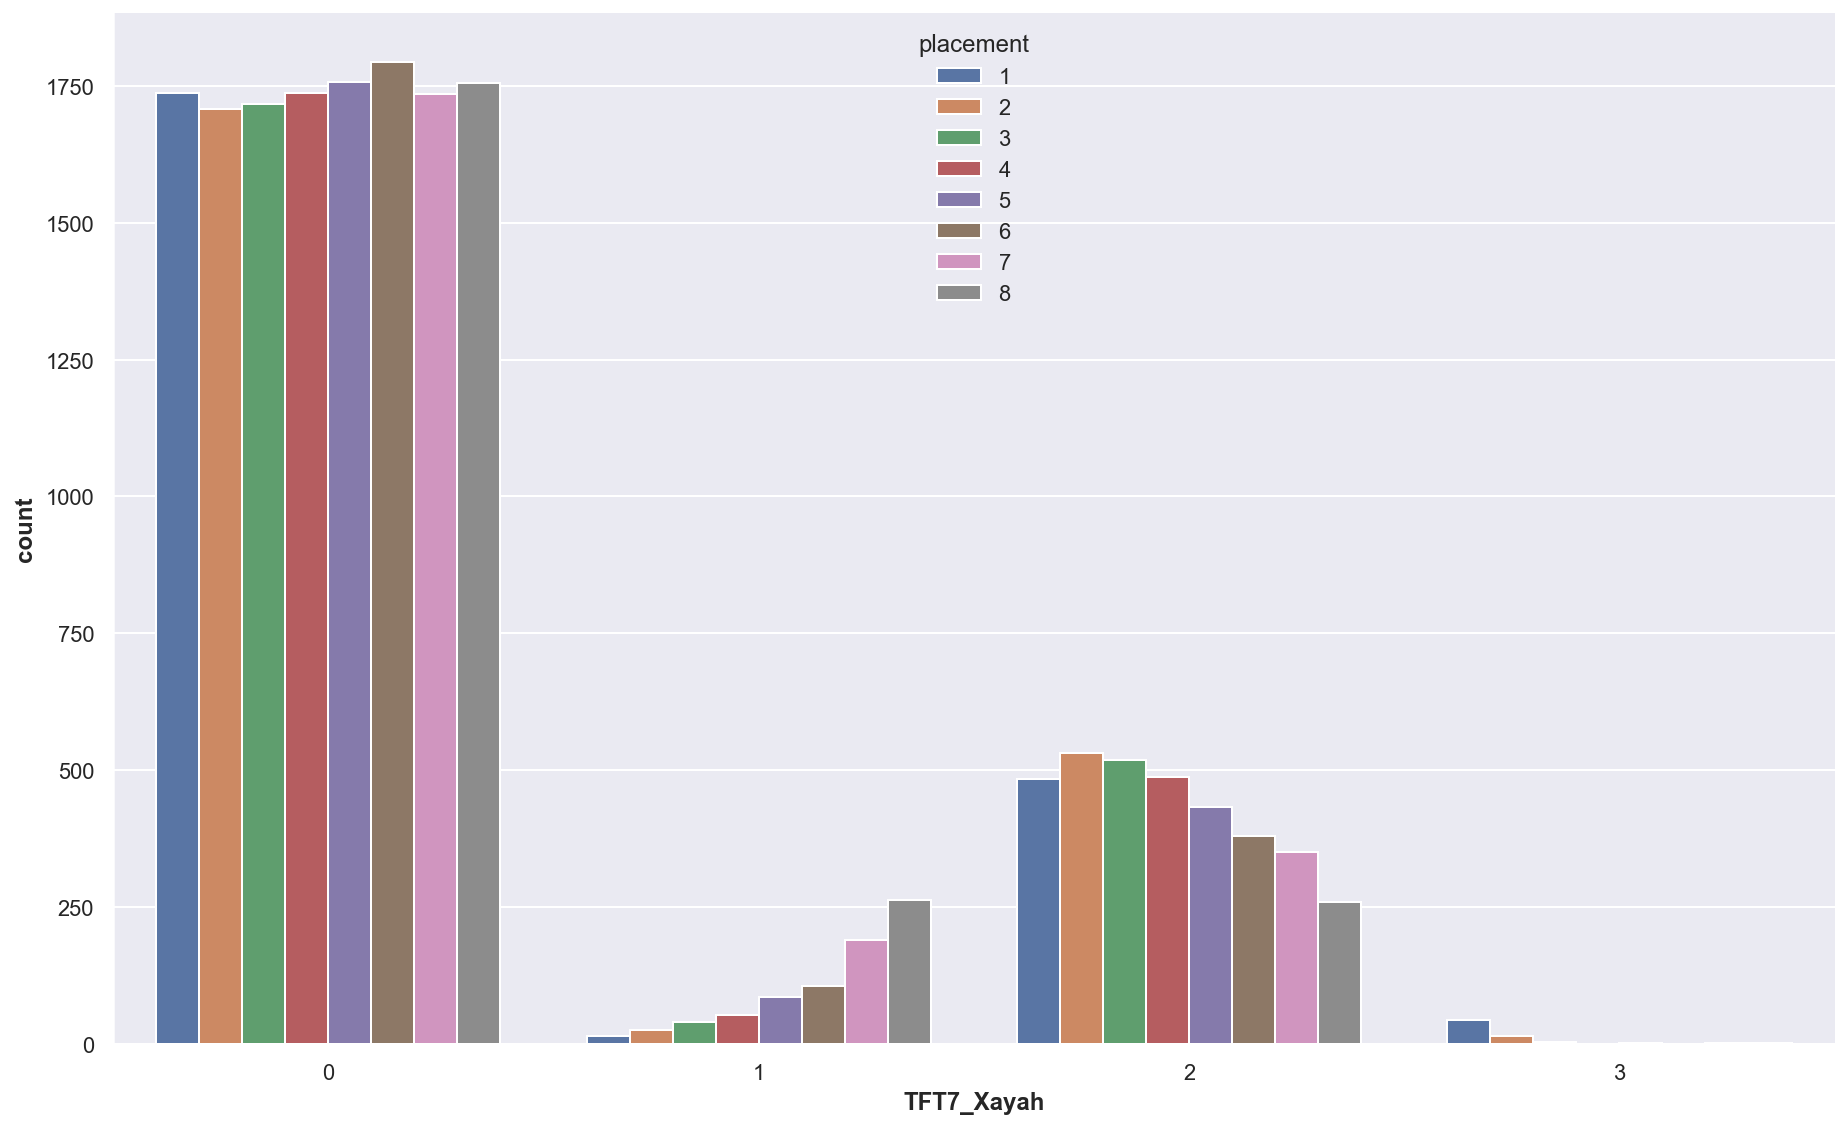

In [227]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

## Items

When TFT7_DragonGold (Idas) is holding item TFT7_Item_ShimmerscaleDiamondHands.

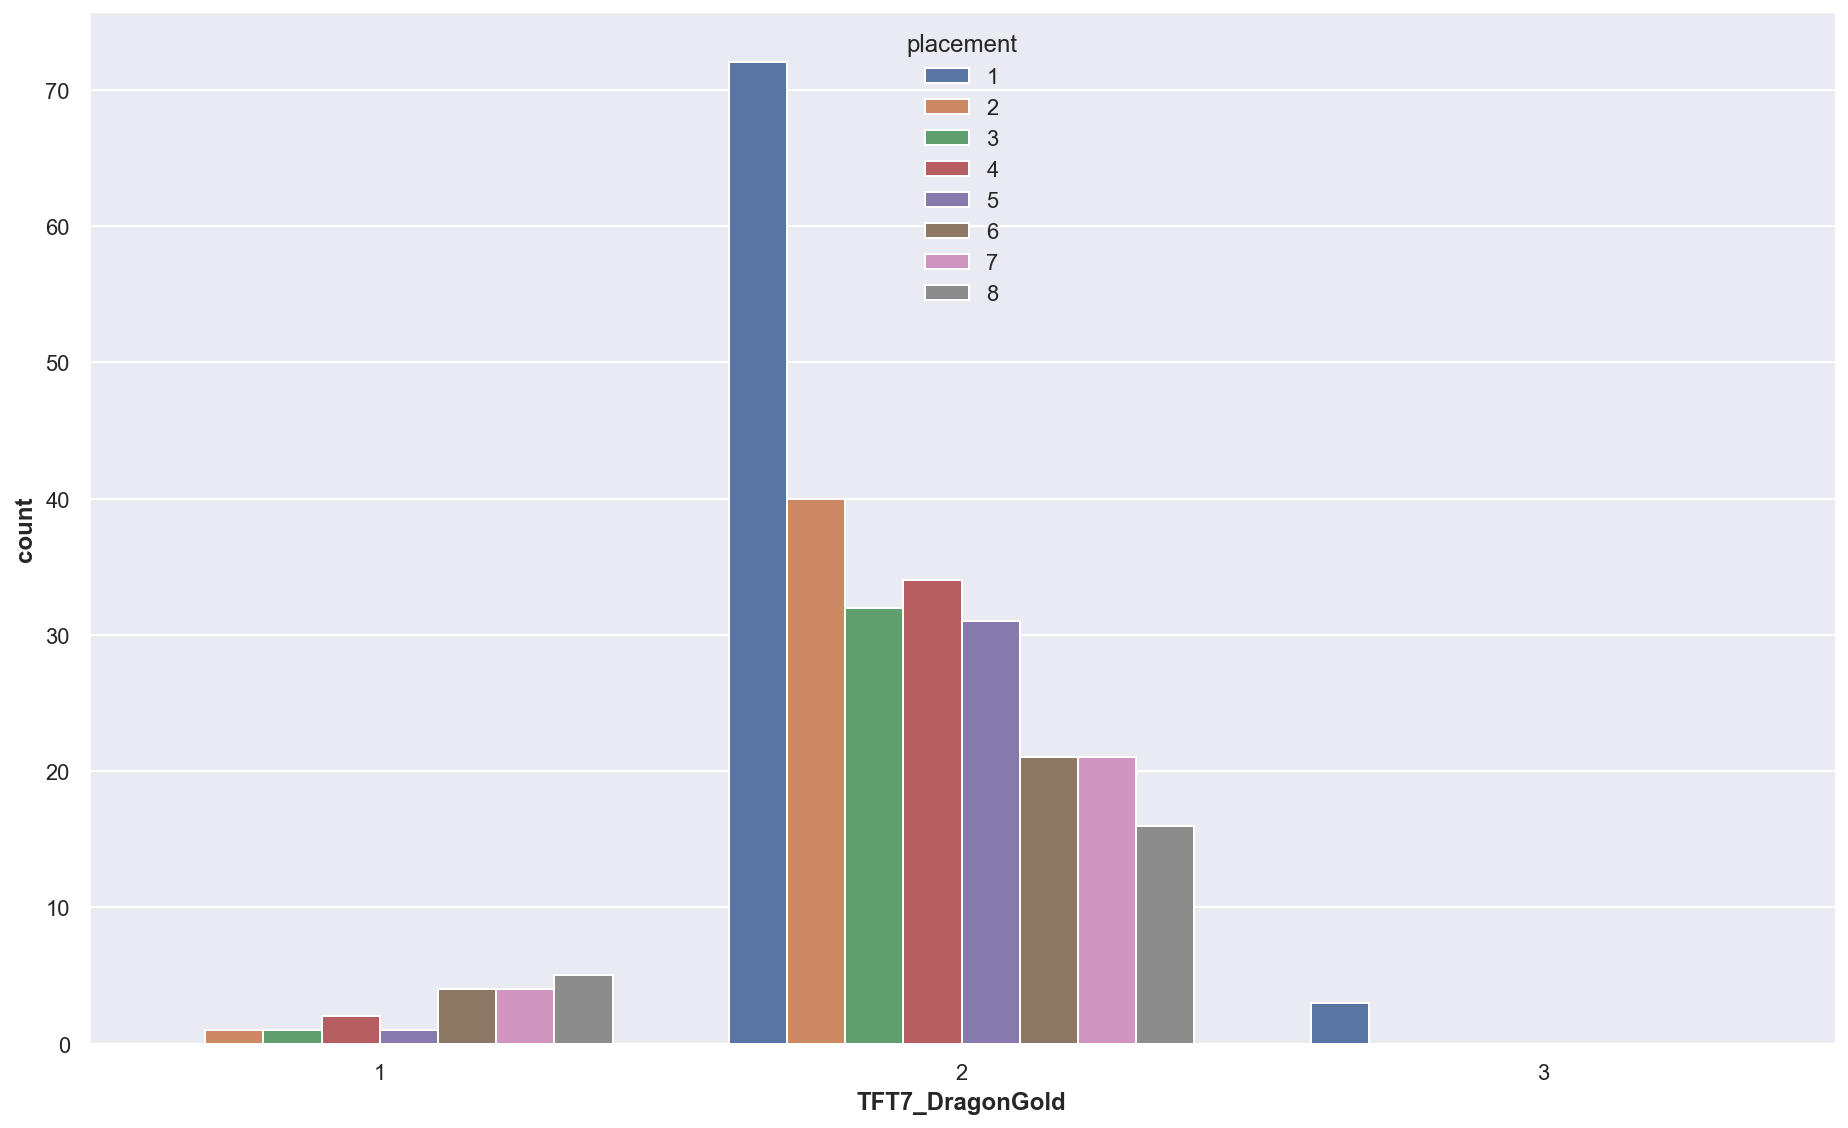

In [228]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='TFT7_Item_ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item TFT7_Item_ShimmerscaleDiamondHands.

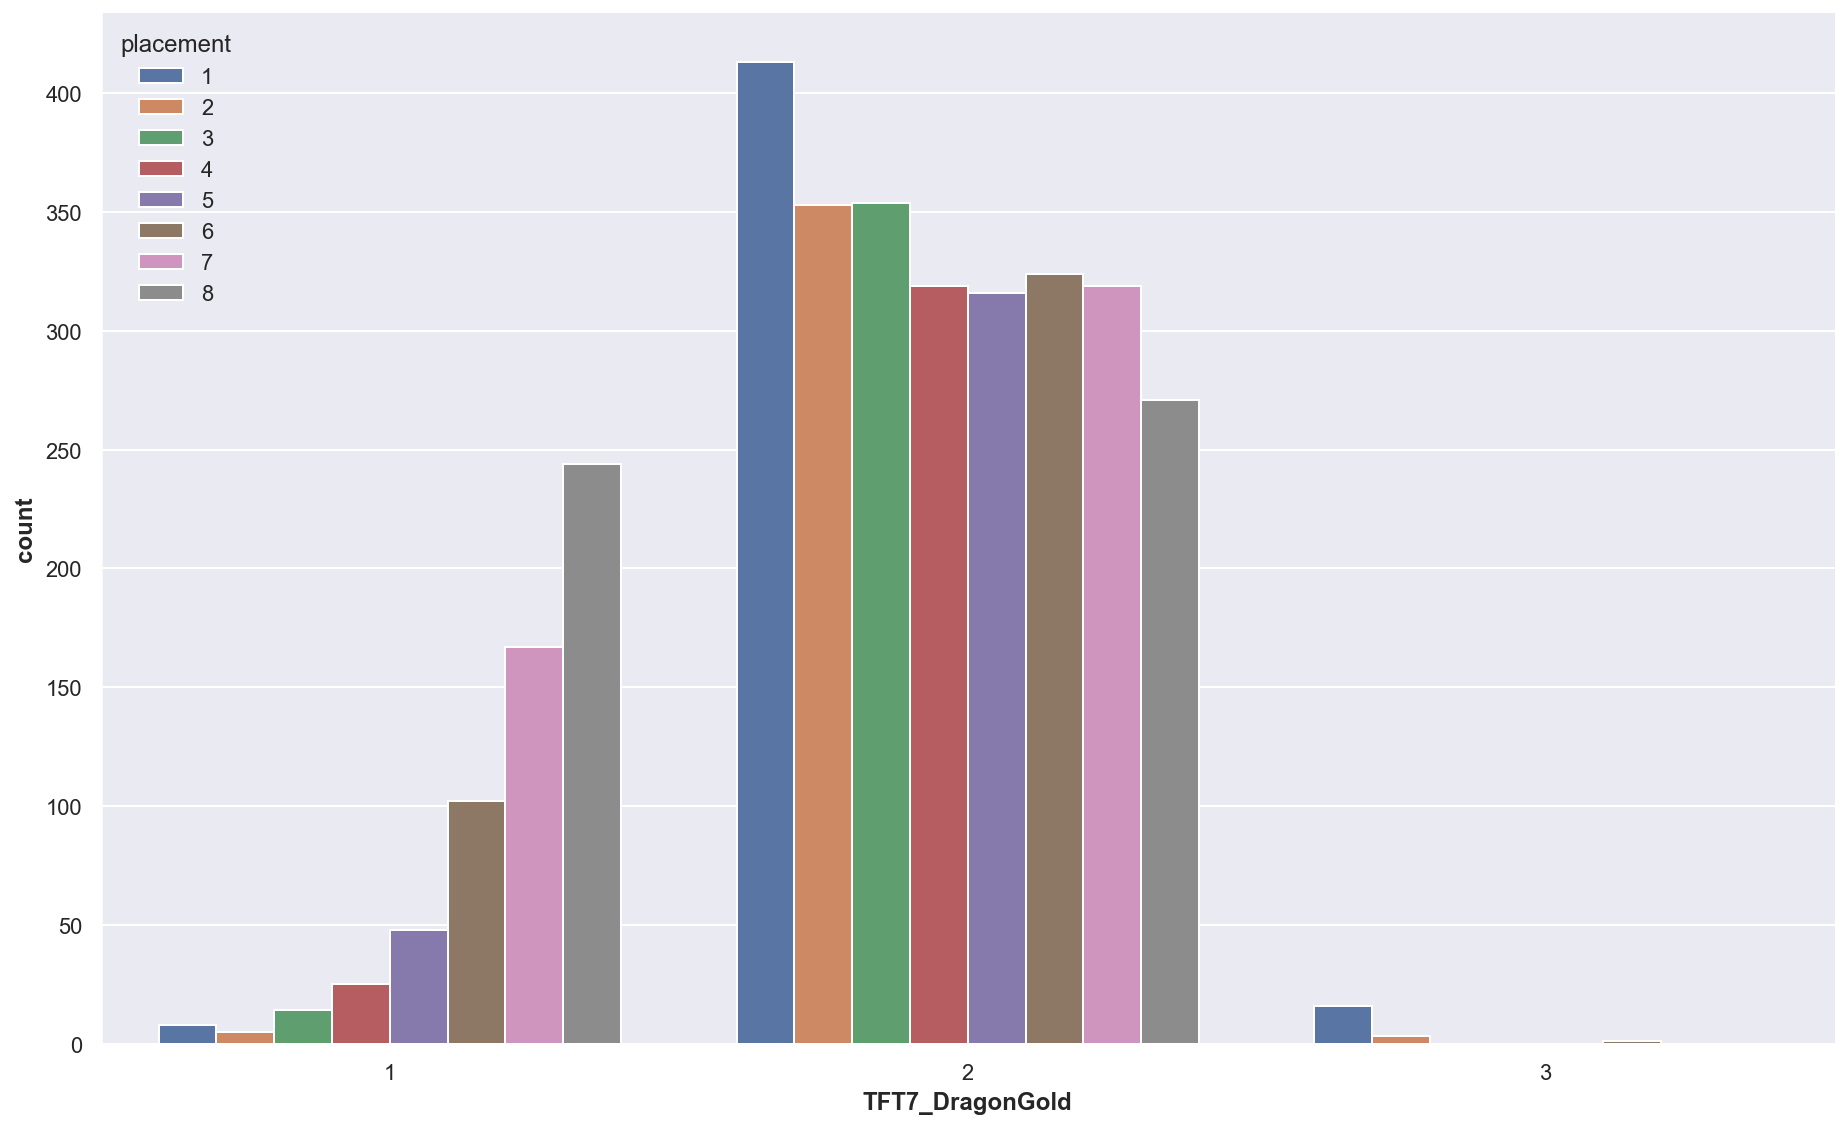

In [229]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

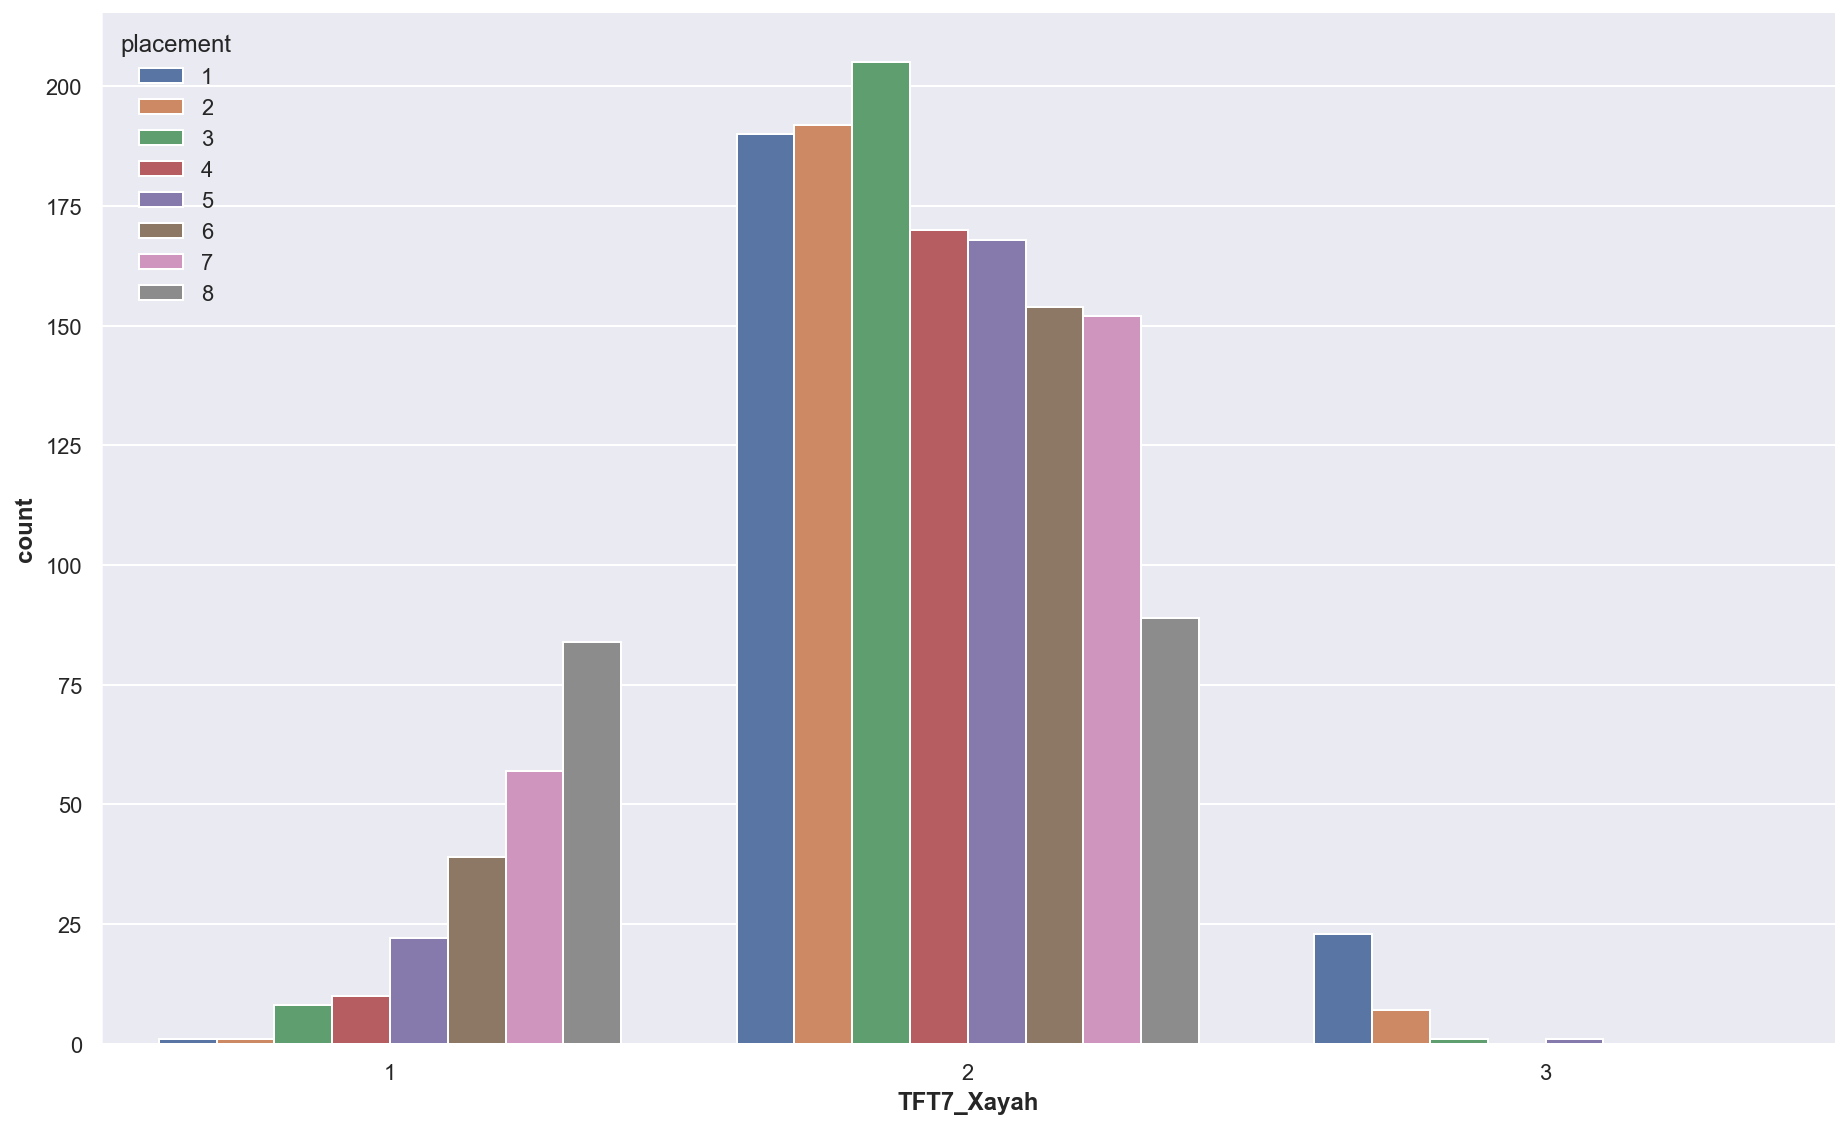

In [230]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item1']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item2']=='TFT_Item_Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

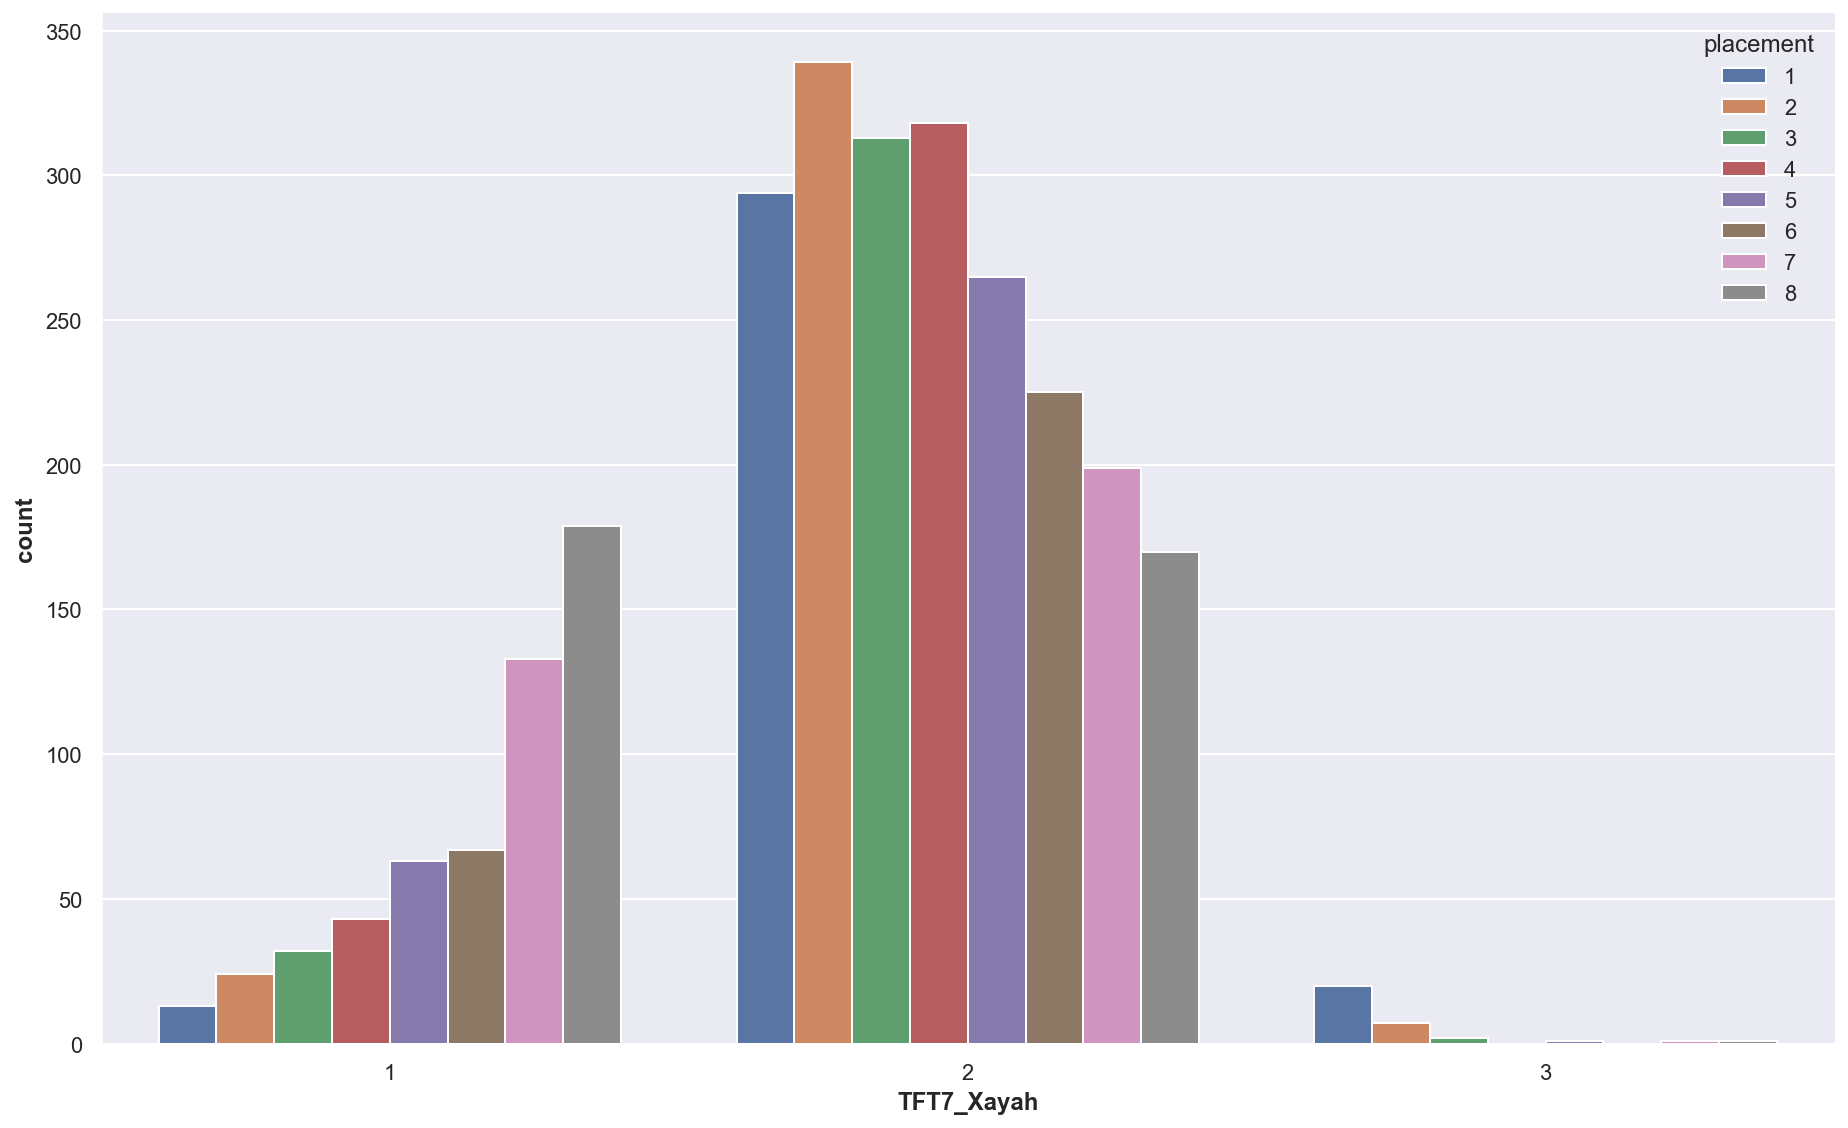

In [231]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item1']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item2']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

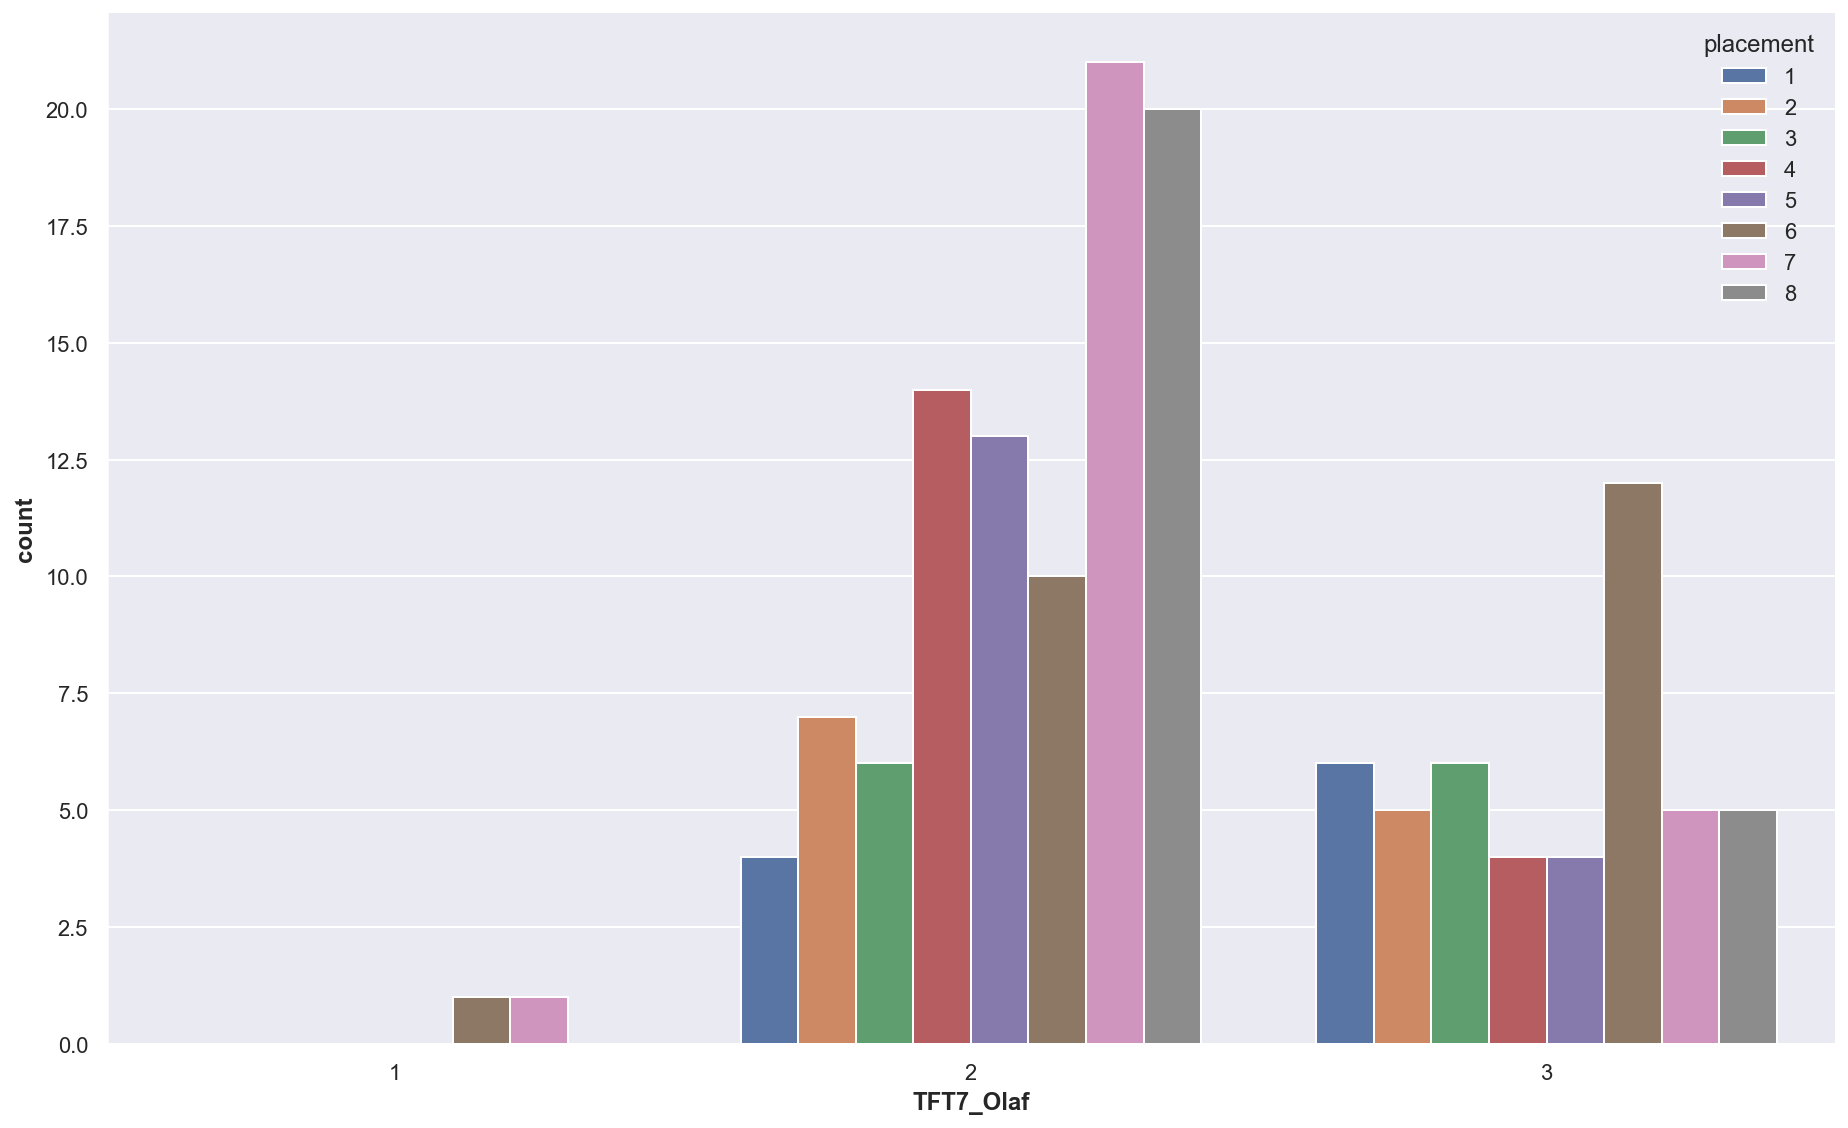

In [232]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='TFT_Item_GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without TFT_Item_GuinsoosRageblade

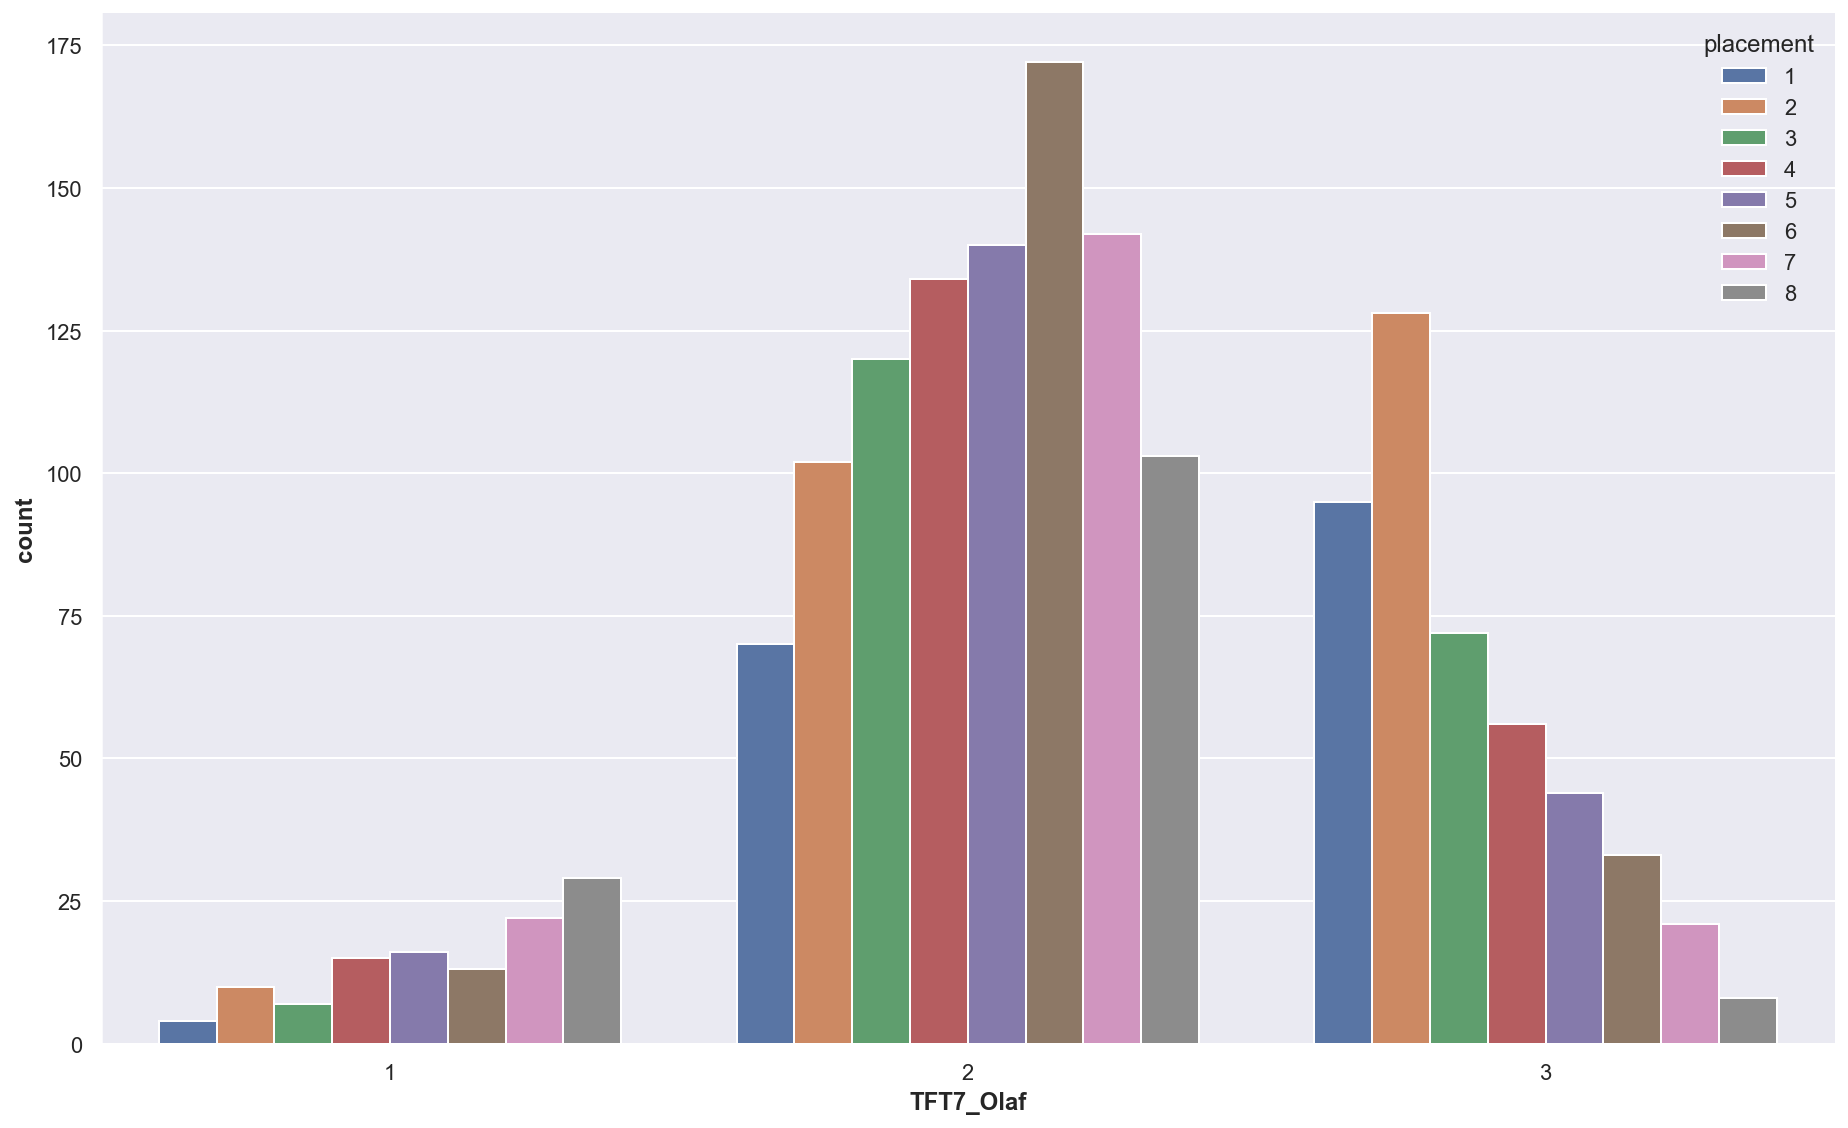

In [233]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='TFT_Item_GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

In [234]:
def get_unit_item_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    m = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2').melt(
        'placement', value_name=f'{unit}_item')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_item', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_item', as_index=False).agg(**dct).sort_values(by='average_placement')


In [235]:
TFT7_Olaf_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Olaf')
TFT7_Olaf_item_merged_df[TFT7_Olaf_item_merged_df['value_count']>=10][:35]

TFT7_Olaf_item  value_count  average_placement
65                TFT_Item_RedBuff           21           3.428571
50        TFT_Item_HextechGunblade           14           3.571429
55  TFT_Item_LocketOfTheIronSolari           12           3.750000
60          TFT_Item_PowerGauntlet           16           3.812500
81                 TFT_Item_Zephyr           15           3.866667
42             TFT_Item_Deathblade           72           4.013889
80            TFT_Item_ZekesHerald           59           4.067797
37                TFT_Item_BFSword           11           4.090909
48          TFT_Item_GuardianAngel           52           4.096154
51           TFT_Item_InfinityEdge          722           4.112188
22    TFT7_Item_AssassinEmblemItem          830           4.121687
63        TFT_Item_RapidFireCannon          290           4.175862
67       TFT_Item_RunaansHurricane          651           4.244240
75           TFT_Item_ThiefsGloves           39           4.282051
54            TFT_Item_LastWhisper           34           4.294118
78     TFT_Item_UnstableConcoction          112           4.375000
77          TFT_Item_TitansResolve           52           4.384615
79           TFT_Item_WarmogsArmor           10           4.400000
73            TFT_Item_StatikkShiv           17           4.411765
56      TFT_Item_MadredsBloodrazor          232           4.461207
61            TFT_Item_Quicksilver          204           4.500000
0                             None        50589           4.517069
35    TFT7_Item_WhispersEmblemItem           14           4.571429
38          TFT_Item_Bloodthirster          176           4.602273
69                 TFT_Item_Shroud           16           4.625000
27      TFT7_Item_MirageEmblemItem           20           4.750000
70         TFT_Item_SparringGloves           14           4.857143
2     TFT4_Item_OrnnDeathsDefiance           17           4.882353
64             TFT_Item_RecurveBow           16           4.937500
3      TFT4_Item_OrnnInfinityForce           14           5.000000
23    TFT7_Item_CavalierEmblemItem           19           5.052632
49      TFT_Item_GuinsoosRageblade          147           5.244898

In [236]:
TFT7_Xayah_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Xayah')
TFT7_Xayah_item_merged_df[TFT7_Xayah_item_merged_df['value_count']>=20][:35]

TFT7_Xayah_item  value_count  average_placement
85                 TFT_Item_ZekesHerald           96           3.552083
56             TFT_Item_HextechGunblade           39           3.820513
2           TFT4_Item_OrnnInfinityForce          120           3.841667
3         TFT4_Item_OrnnObsidianCleaver           33           3.939394
24     TFT7_Item_DragonmancerEmblemItem           53           3.962264
80                TFT_Item_ThiefsGloves           31           4.064516
78                 TFT_Item_StatikkShiv          207           4.096618
54               TFT_Item_GuardianAngel          229           4.152838
73            TFT_Item_RunaansHurricane          335           4.217910
4            TFT4_Item_OrnnTheCollector           55           4.218182
48                  TFT_Item_Deathblade          642           4.309969
44               TFT_Item_Bloodthirster           97           4.329897
83          TFT_Item_UnstableConcoction          506           4.337945
62           TFT_Item_MadredsBloodrazor         2600           4.354615
60                 TFT_Item_LastWhisper          216           4.361111
25            TFT7_Item_GuildEmblemItem          232           4.370690
55           TFT_Item_GuinsoosRageblade         3045           4.396716
67                 TFT_Item_Quicksilver         1574           4.406607
69             TFT_Item_RapidFireCannon           86           4.406977
33     TFT7_Item_ShimmerscaleDravensAxe          164           4.439024
57                TFT_Item_InfinityEdge          734           4.449591
0                                  None        43027           4.534455
66               TFT_Item_PowerGauntlet           21           4.666667
82               TFT_Item_TitansResolve           78           4.743590
36  TFT7_Item_ShimmerscaleGamblersBlade           52           5.000000
43                     TFT_Item_BFSword           30           6.033333
70                  TFT_Item_RecurveBow           24           6.458333

In [237]:
TFT7_Corki_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Corki')
TFT7_Corki_item_merged_df[TFT7_Corki_item_merged_df['value_count']>=20][:35]

TFT7_Corki_item  value_count  average_placement
2              TFT4_Item_OrnnInfinityForce          105           3.819048
74                    TFT_Item_StatikkShiv          207           3.922705
53                TFT_Item_HextechGunblade          150           4.193333
81                    TFT_Item_ZekesHerald           32           4.250000
73                  TFT_Item_SpearOfShojin           89           4.258427
4            TFT4_Item_OrnnObsidianCleaver           42           4.261905
51                  TFT_Item_GuardianAngel           89           4.303371
69               TFT_Item_RunaansHurricane          321           4.330218
57                    TFT_Item_LastWhisper          615           4.338211
78                  TFT_Item_TitansResolve           53           4.339623
66                TFT_Item_RapidFireCannon           55           4.345455
31        TFT7_Item_ShimmerscaleDravensAxe          321           4.485981
0                                     None        45597           4.493782
79             TFT_Item_UnstableConcoction          725           4.525517
54                   TFT_Item_InfinityEdge         1156           4.526817
52              TFT_Item_GuinsoosRageblade         1620           4.565432
59              TFT_Item_MadredsBloodrazor         1766           4.607588
47                     TFT_Item_Deathblade          654           4.633028
5               TFT4_Item_OrnnTheCollector           39           4.666667
43                  TFT_Item_Bloodthirster          118           4.728814
64                    TFT_Item_Quicksilver          359           4.746518
70                 TFT_Item_SeraphsEmbrace           95           4.757895
56                TFT_Item_JeweledGauntlet           46           4.934783
33     TFT7_Item_ShimmerscaleGamblersBlade          108           5.083333
34  TFT7_Item_ShimmerscaleGoldmancersStaff           37           5.297297

In [238]:
TFT7_Shyvana_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Shyvana')
TFT7_Shyvana_item_merged_df[TFT7_Shyvana_item_merged_df['value_count']>=10][:25]

TFT7_Shyvana_item  value_count  average_placement
64         TFT_Item_RunaansHurricane           19           1.894737
54           TFT_Item_Morellonomicon          108           2.944444
72             TFT_Item_TitanicHydra           20           2.950000
50          TFT_Item_JeweledGauntlet           83           3.096386
59         TFT_Item_RabadonsDeathcap          121           3.148760
49               TFT_Item_IonicSpark          126           3.182540
57            TFT_Item_PowerGauntlet           14           3.214286
36              TFT_Item_BrambleVest          106           3.386792
47          TFT_Item_HextechGunblade           89           3.393258
45            TFT_Item_GuardianAngel           36           3.472222
33          TFT_Item_ArchangelsStaff           95           3.473684
43       TFT_Item_GargoyleStoneplate          137           3.481752
20      TFT7_Item_CavalierEmblemItem           31           3.483871
42              TFT_Item_FrozenHeart          158           3.493671
21  TFT7_Item_DragonmancerEmblemItem          100           3.500000
65           TFT_Item_SeraphsEmbrace           18           3.500000
77                   TFT_Item_Zephyr           14           3.500000
73            TFT_Item_TitansResolve          160           3.525000
58              TFT_Item_Quicksilver           45           3.533333
46        TFT_Item_GuinsoosRageblade           42           3.571429
66                   TFT_Item_Shroud           27           3.592593
40              TFT_Item_DragonsClaw          153           3.627451
38                  TFT_Item_Chalice           11           3.636364
53        TFT_Item_MadredsBloodrazor           70           3.728571
71             TFT_Item_ThiefsGloves           81           3.790123

In [239]:
TFT7_DragonBlue_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_item_merged_df[TFT7_DragonBlue_item_merged_df['value_count']>=10][:25]

TFT7_DragonBlue_item  value_count  average_placement
67                  TFT_Item_TitansResolve           25           3.240000
2              TFT4_Item_OrnnInfinityForce           18           3.277778
26               TFT7_Item_RevelEmblemItem          126           3.626984
31  TFT7_Item_ShimmerscaleGoldmancersStaff           19           3.684211
23               TFT7_Item_GuildEmblemItem           17           4.117647
52                 TFT_Item_Morellonomicon           31           4.193548
34            TFT7_Item_WhispersEmblemItem           13           4.230769
5               TFT4_Item_OrnnTheCollector           10           4.300000
46                TFT_Item_HextechGunblade          121           4.347107
56               TFT_Item_RabadonsDeathcap          151           4.370861
65                    TFT_Item_StatikkShiv          279           4.376344
55                    TFT_Item_Quicksilver          284           4.411972
35                TFT_Item_ArchangelsStaff          575           4.436522
0                                     None        50151           4.493689
57                TFT_Item_RapidFireCannon           55           4.509091
51              TFT_Item_MadredsBloodrazor          631           4.564184
68             TFT_Item_UnstableConcoction          249           4.582329
45              TFT_Item_GuinsoosRageblade          640           4.679688
48                TFT_Item_JeweledGauntlet          557           4.754039
6             TFT4_Item_OrnnZhonyasParadox           12           4.833333
47                   TFT_Item_InfinityEdge          408           4.862745
44                  TFT_Item_GuardianAngel           29           4.931034
64                  TFT_Item_SpearOfShojin           61           5.196721
37                  TFT_Item_Bloodthirster           37           5.297297

In [240]:
TFT7_DragonPurple_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_item_merged_df[TFT7_DragonPurple_item_merged_df['value_count']>=10][:25]

TFT7_DragonPurple_item  value_count  average_placement
4    TFT4_Item_OrnnInfinityForce           29           3.000000
9     TFT4_Item_OrnnTheCollector           10           3.400000
28  TFT7_Item_CavalierEmblemItem           16           3.437500
31     TFT7_Item_GuildEmblemItem           10           3.500000
58      TFT_Item_HextechGunblade           46           3.717391
32      TFT7_Item_MageEmblemItem           14           3.785714
2   TFT4_Item_OrnnDeathsDefiance           43           3.813953
54   TFT_Item_GargoyleStoneplate           45           3.866667
85   TFT_Item_UnstableConcoction          319           3.868339
69          TFT_Item_Quicksilver          427           3.903981
61      TFT_Item_JeweledGauntlet           12           4.000000
25  TFT7_Item_AssassinEmblemItem          334           4.014970
64    TFT_Item_MadredsBloodrazor          294           4.023810
59         TFT_Item_InfinityEdge          514           4.056420
84        TFT_Item_TitansResolve          543           4.068140
71      TFT_Item_RapidFireCannon          130           4.076923
48          TFT_Item_BrambleVest           38           4.078947
73              TFT_Item_RedBuff          106           4.122642
56        TFT_Item_GuardianAngel          105           4.123810
53          TFT_Item_FrozenHeart           79           4.151899
47        TFT_Item_Bloodthirster          896           4.174107
1      TFT4_Item_OrnnAnimaVisage           16           4.187500
79        TFT_Item_SpearOfShojin           14           4.214286
86         TFT_Item_WarmogsArmor           56           4.232143
75     TFT_Item_RunaansHurricane          129           4.271318

In [241]:
pd.options.display.max_colwidth = 100

In [242]:
def get_unit_items_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    df = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
    df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    m = df.melt(
        'placement', value_name=f'{unit}_items')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_items', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_items', as_index=False).agg(**dct).sort_values(by='average_placement')

In [243]:
TFT7_Corki_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Corki')
TFT7_Corki_items_merged_df[TFT7_Corki_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_Corki_items  \
906                                                           TFT_Item_LocketOfTheIronSolari   
456        TFT_Item_GuinsoosRageblade_TFT7_Item_ShimmerscaleDravensAxe_TFT_Item_InfinityEdge   
1486             TFT_Item_UnstableConcoction_TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazor   
1023                     TFT_Item_MadredsBloodrazor_TFT_Item_LastWhisper_TFT_Item_Deathblade   
1474            TFT_Item_UnstableConcoction_TFT_Item_InfinityEdge_TFT_Item_GuinsoosRageblade   
874               TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
32                                                                    TFT4_Item_OrnnMuramana   
1461            TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
858                    TFT_Item_LastWhisper_TFT_Item_InfinityEdge_TFT_Item_GuinsoosRageblade   
1476            TFT_Item_UnstableConcoction_TFT_Item_InfinityEdge_TFT_Item_MadredsBloodrazor   
1233                TFT_Item_RunaansHurricane_TFT_Item_GuinsoosRageblade_TFT_Item_Deathblade   
324                     TFT_Item_Deathblade_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
1398                                                                   TFT_Item_ThiefsGloves   
503        TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge_TFT7_Item_ShimmerscaleDravensAxe   
284                                                                         TFT_Item_Chalice   
801             TFT_Item_InfinityEdge_TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade   
538   TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT7_Item_ShimmerscaleDravensAxe   
1168              TFT_Item_Quicksilver_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
530               TFT_Item_GuinsoosRageblade_TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazor   
4                                                                TFT4_Item_OrnnInfinityForce   

      value_count  average_placement  
906             6           2.000000  
456             8           2.375000  
1486            6           2.666667  
1023            6           3.000000  
1474           11           3.181818  
874            14           3.285714  
32              9           3.333333  
1461           17           3.352941  
858            12           3.416667  
1476           11           3.454545  
1233            5           3.600000  
324             8           3.625000  
1398           14           3.642857  
503             7           3.714286  
284             7           3.714286  
801             7           3.714286  
538            11           3.727273  
1168            9           3.777778  
530            11           3.818182  
4             105           3.819048

In [244]:
TFT7_Xayah_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Xayah')
TFT7_Xayah_items_merged_df[TFT7_Xayah_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_Xayah_items  \
1108                                                               TFT_Item_RabadonsDeathcap   
1333            TFT_Item_UnstableConcoction_TFT_Item_InfinityEdge_TFT_Item_MadredsBloodrazor   
266                                                              TFT7_Item_TempestEmblemItem   
760                    TFT_Item_InfinityEdge_TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade   
1039             TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade_TFT4_Item_OrnnInfinityForce   
1133                                                                     TFT_Item_Redemption   
196                                                   TFT7_Item_ShimmerscaleCrownOfChampions   
829        TFT_Item_MadredsBloodrazor_TFT4_Item_OrnnInfinityForce_TFT_Item_GuinsoosRageblade   
362               TFT_Item_Deathblade_TFT_Item_GuinsoosRageblade_TFT_Item_UnstableConcoction   
934                      TFT_Item_MadredsBloodrazor_TFT_Item_Quicksilver_TFT_Item_Deathblade   
356                TFT_Item_Deathblade_TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor   
924         TFT_Item_MadredsBloodrazor_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
388                      TFT_Item_Deathblade_TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade   
667               TFT_Item_GuinsoosRageblade_TFT_Item_UnstableConcoction_TFT_Item_Deathblade   
576   TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor_TFT7_Item_ShimmerscaleDravensAxe   
1326            TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade_TFT_Item_InfinityEdge   
494         TFT_Item_GuinsoosRageblade_TFT7_Item_ShimmerscaleDravensAxe_TFT_Item_Quicksilver   
519                TFT_Item_GuinsoosRageblade_TFT_Item_Deathblade_TFT_Item_MadredsBloodrazor   
751              TFT_Item_InfinityEdge_TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade   
1366                                                                    TFT_Item_ZekesHerald   

      value_count  average_placement  
1108            9           2.222222  
1333            5           2.400000  
266             9           2.444444  
760             7           2.714286  
1039            5           2.800000  
1133            5           3.000000  
196             8           3.000000  
829             9           3.111111  
362             8           3.125000  
934             5           3.200000  
356            17           3.235294  
924            20           3.350000  
388            18           3.388889  
667             6           3.500000  
576             6           3.500000  
1326            8           3.500000  
494            11           3.545455  
519            22           3.545455  
751            20           3.550000  
1366           96           3.552083

In [245]:
TFT7_DragonPurple_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_items_merged_df[TFT7_DragonPurple_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_DragonPurple_items  \
583   TFT_Item_InfinityEdge_TFT7_Item_AssassinEmblemItem_TFT_Item_RunaansHurricane   
683         TFT_Item_MadredsBloodrazor_TFT_Item_Bloodthirster_TFT_Item_Quicksilver   
1035      TFT_Item_TitansResolve_TFT_Item_MadredsBloodrazor_TFT_Item_Bloodthirster   
1145       TFT_Item_UnstableConcoction_TFT_Item_TitansResolve_TFT_Item_Quicksilver   
578      TFT_Item_InfinityEdge_TFT7_Item_AssassinEmblemItem_TFT_Item_Bloodthirster   
354      TFT_Item_Bloodthirster_TFT_Item_UnstableConcoction_TFT_Item_TitansResolve   
31                                                     TFT4_Item_OrnnInfinityForce   
76                                                  TFT5_Item_TitansResolveRadiant   
343       TFT_Item_Bloodthirster_TFT_Item_TitansResolve_TFT_Item_MadredsBloodrazor   
344             TFT_Item_Bloodthirster_TFT_Item_TitansResolve_TFT_Item_Quicksilver   
648     TFT_Item_InfinityEdge_TFT_Item_UnstableConcoction_TFT_Item_RapidFireCannon   
736         TFT_Item_Quicksilver_TFT_Item_Bloodthirster_TFT_Item_GuinsoosRageblade   
630   TFT_Item_InfinityEdge_TFT_Item_RunaansHurricane_TFT7_Item_AssassinEmblemItem   
314             TFT_Item_Bloodthirster_TFT_Item_Quicksilver_TFT_Item_TitansResolve   
589      TFT_Item_InfinityEdge_TFT_Item_Bloodthirster_TFT7_Item_AssassinEmblemItem   
241      TFT_Item_Bloodthirster_TFT7_Item_AssassinEmblemItem_TFT_Item_InfinityEdge   
49                                                      TFT4_Item_OrnnTheCollector   
1088     TFT_Item_UnstableConcoction_TFT_Item_Bloodthirster_TFT_Item_TitansResolve   
162                                                   TFT7_Item_CavalierEmblemItem   
173                                                      TFT7_Item_GuildEmblemItem   

      value_count  average_placement  
583             5           2.000000  
683             7           2.714286  
1035            5           2.800000  
1145            5           2.800000  
578            13           2.923077  
354             5           3.000000  
31             29           3.000000  
76              7           3.142857  
343             7           3.142857  
344            13           3.153846  
648             5           3.200000  
736            10           3.300000  
630             6           3.333333  
314             9           3.333333  
589             6           3.333333  
241             8           3.375000  
49             10           3.400000  
1088            5           3.400000  
162            16           3.437500  
173            10           3.500000

In [246]:
TFT7_DragonBlue_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_items_merged_df[TFT7_DragonBlue_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_DragonBlue_items  \
812              TFT_Item_StatikkShiv_TFT7_Item_RevelEmblemItem_TFT_Item_Quicksilver   
898  TFT_Item_UnstableConcoction_TFT_Item_GuinsoosRageblade_TFT_Item_ArchangelsStaff   
684        TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade_TFT7_Item_RevelEmblemItem   
109        TFT7_Item_RevelEmblemItem_TFT_Item_StatikkShiv_TFT_Item_GuinsoosRageblade   
265        TFT_Item_GuinsoosRageblade_TFT7_Item_RevelEmblemItem_TFT_Item_Quicksilver   
686         TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade_TFT_Item_ArchangelsStaff   
878                                                           TFT_Item_TitansResolve   
6                                                        TFT4_Item_OrnnInfinityForce   
157     TFT_Item_ArchangelsStaff_TFT_Item_ArchangelsStaff_TFT_Item_MadredsBloodrazor   
59                                                      TFT7_Item_CavalierEmblemItem   
498         TFT_Item_JeweledGauntlet_TFT_Item_InfinityEdge_TFT_Item_RabadonsDeathcap   
83                                                         TFT7_Item_RevelEmblemItem   
602        TFT_Item_MadredsBloodrazor_TFT_Item_InfinityEdge_TFT_Item_JeweledGauntlet   
37                                                TFT5_Item_GuinsoosRagebladeRadiant   
541                                                             TFT_Item_LastWhisper   
53                                                      TFT7_Item_AssassinEmblemItem   
124                                           TFT7_Item_ShimmerscaleGoldmancersStaff   
451       TFT_Item_InfinityEdge_TFT_Item_UnstableConcoction_TFT_Item_JeweledGauntlet   
692       TFT_Item_Quicksilver_TFT_Item_GuinsoosRageblade_TFT_Item_MadredsBloodrazor   
582   TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRageblade_TFT_Item_ArchangelsStaff   

     value_count  average_placement  
812            6           2.166667  
898            5           2.400000  
684            5           2.600000  
109            5           2.800000  
265            9           2.888889  
686            7           3.142857  
878           25           3.240000  
6             18           3.277778  
157            6           3.333333  
59             5           3.400000  
498            5           3.600000  
83           126           3.626984  
602           11           3.636364  
37             6           3.666667  
541            6           3.666667  
53             6           3.666667  
124           19           3.684211  
451            7           3.714286  
692            6           3.833333  
582            6           3.833333

In [247]:
# unit='TFT7_DragonBlue'
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
# unit_g = df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2', 'placement']) #.size() #.unstack(level=0)

In [248]:
# unit_g.value_counts()

In [249]:
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')

In [250]:
# from itertools import chain, combinations

# def powerset(iterable):
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# dfe =pd.DataFrame()
# for perm in powerset(df.columns[:-1]):
#     features =list(perm)
#     if len(features) != 0 and f'{unit}_item0' in features:
#         dfe = pd.concat([dfe,df.groupby(features,as_index=False).agg({'placement':'mean'})],axis=0)
        
# # result_df = dfe.fillna('all').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=False)

In [251]:
# result_df = dfe.fillna('None').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=True)
# result_df[:50]

In [252]:
# result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement']

In [253]:
# group_df = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].mean() #transform(lambda x: ",".join(x))

In [254]:
# group_df['count'] = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].size()

In [255]:
# group_df[:30].sort_values()

In [256]:
# df['items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [257]:
# df['avg'] = df.groupby(['items'])['placement'].mean()

In [258]:
# df['vc'] = df.groupby(['items'])['placement'].size()

In [259]:
# ddf = pd.concat([ddf,df.groupby(['items'],as_index=False).agg({'placement':'sum'})],axis=0)

In [260]:
# ddf = pd.DataFrame(ddf)

In [261]:
# df1 = df.filter(regex=f'placement|items')

In [262]:
# m = df1.melt(
#         'placement', value_name=f'items')
# # group and aggregate mean/median
# dct = {'value_count': (f'items', 'count'),
#         'average_placement': ('placement', 'mean')}
# df2 = m.groupby(f'items', as_index=False).agg(**dct).sort_values(by='average_placement')

# Augment

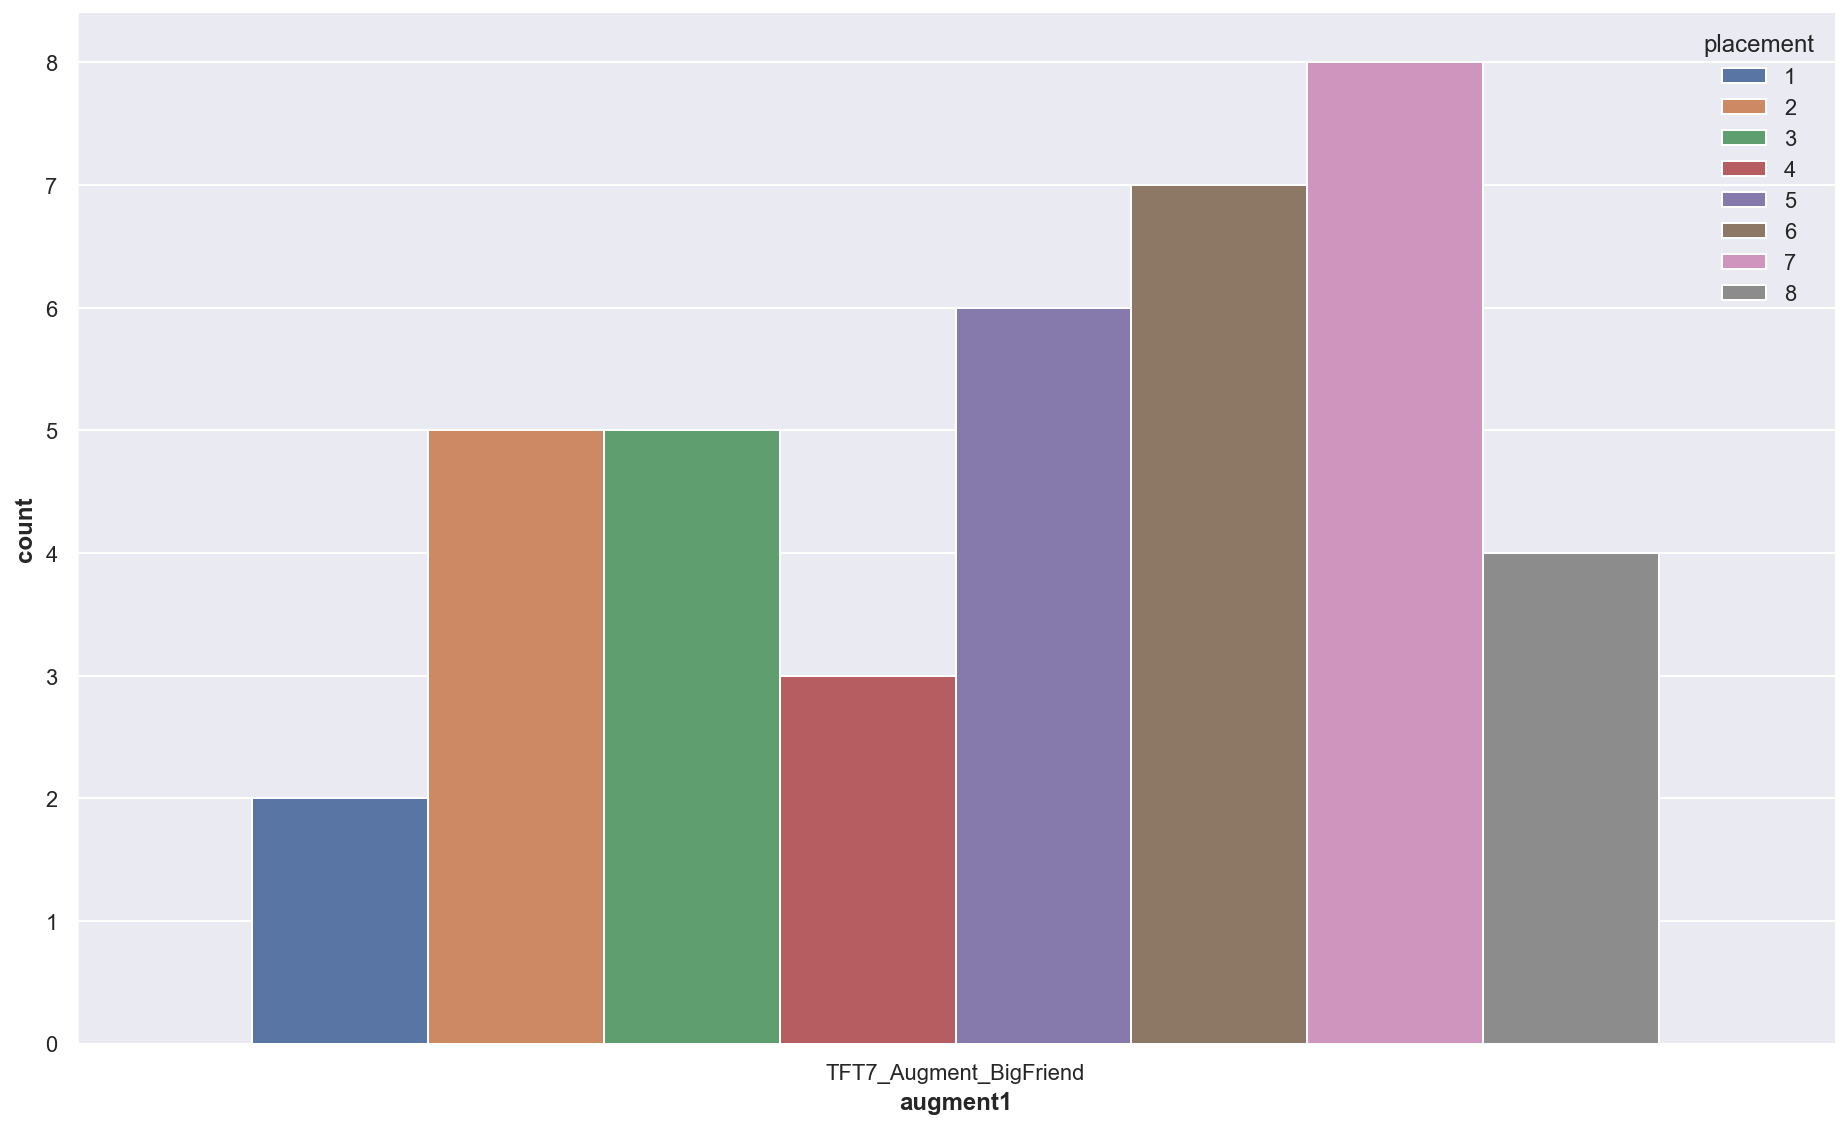

In [263]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

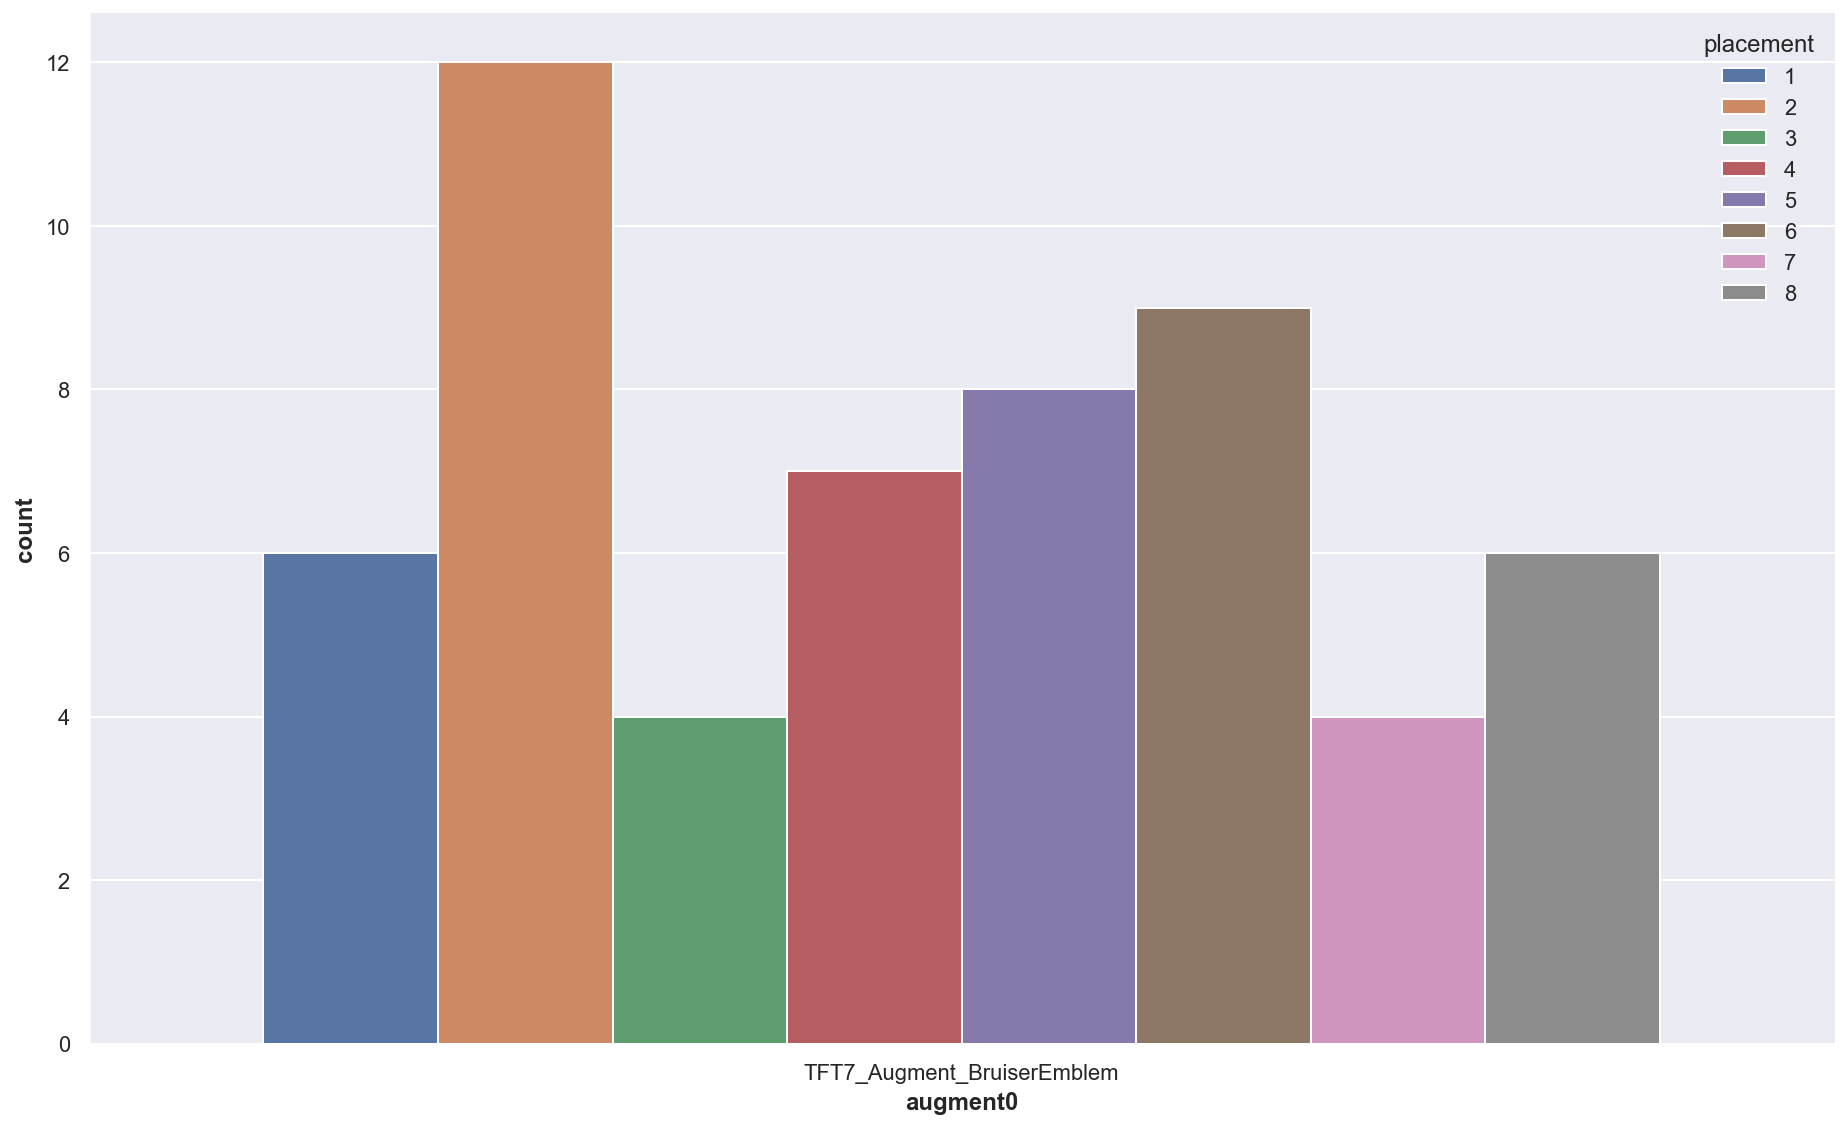

In [264]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

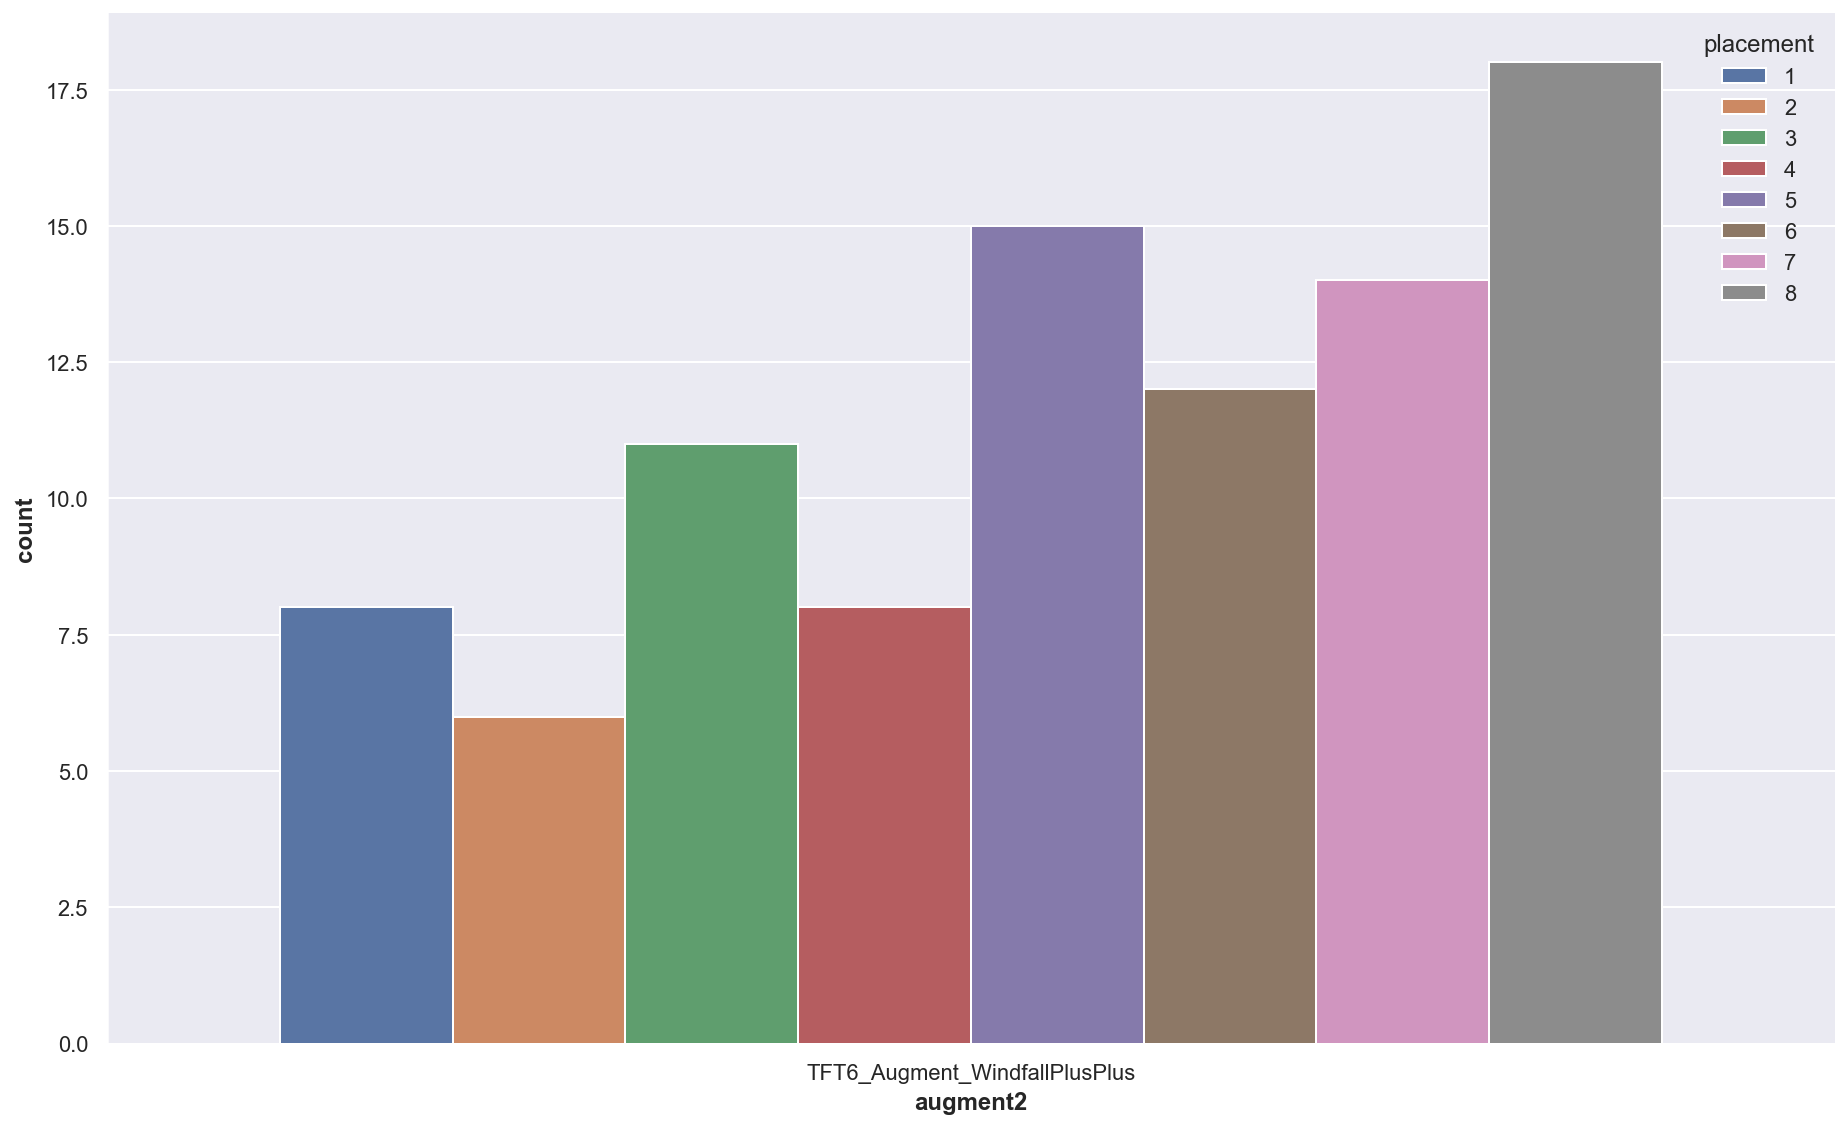

In [265]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

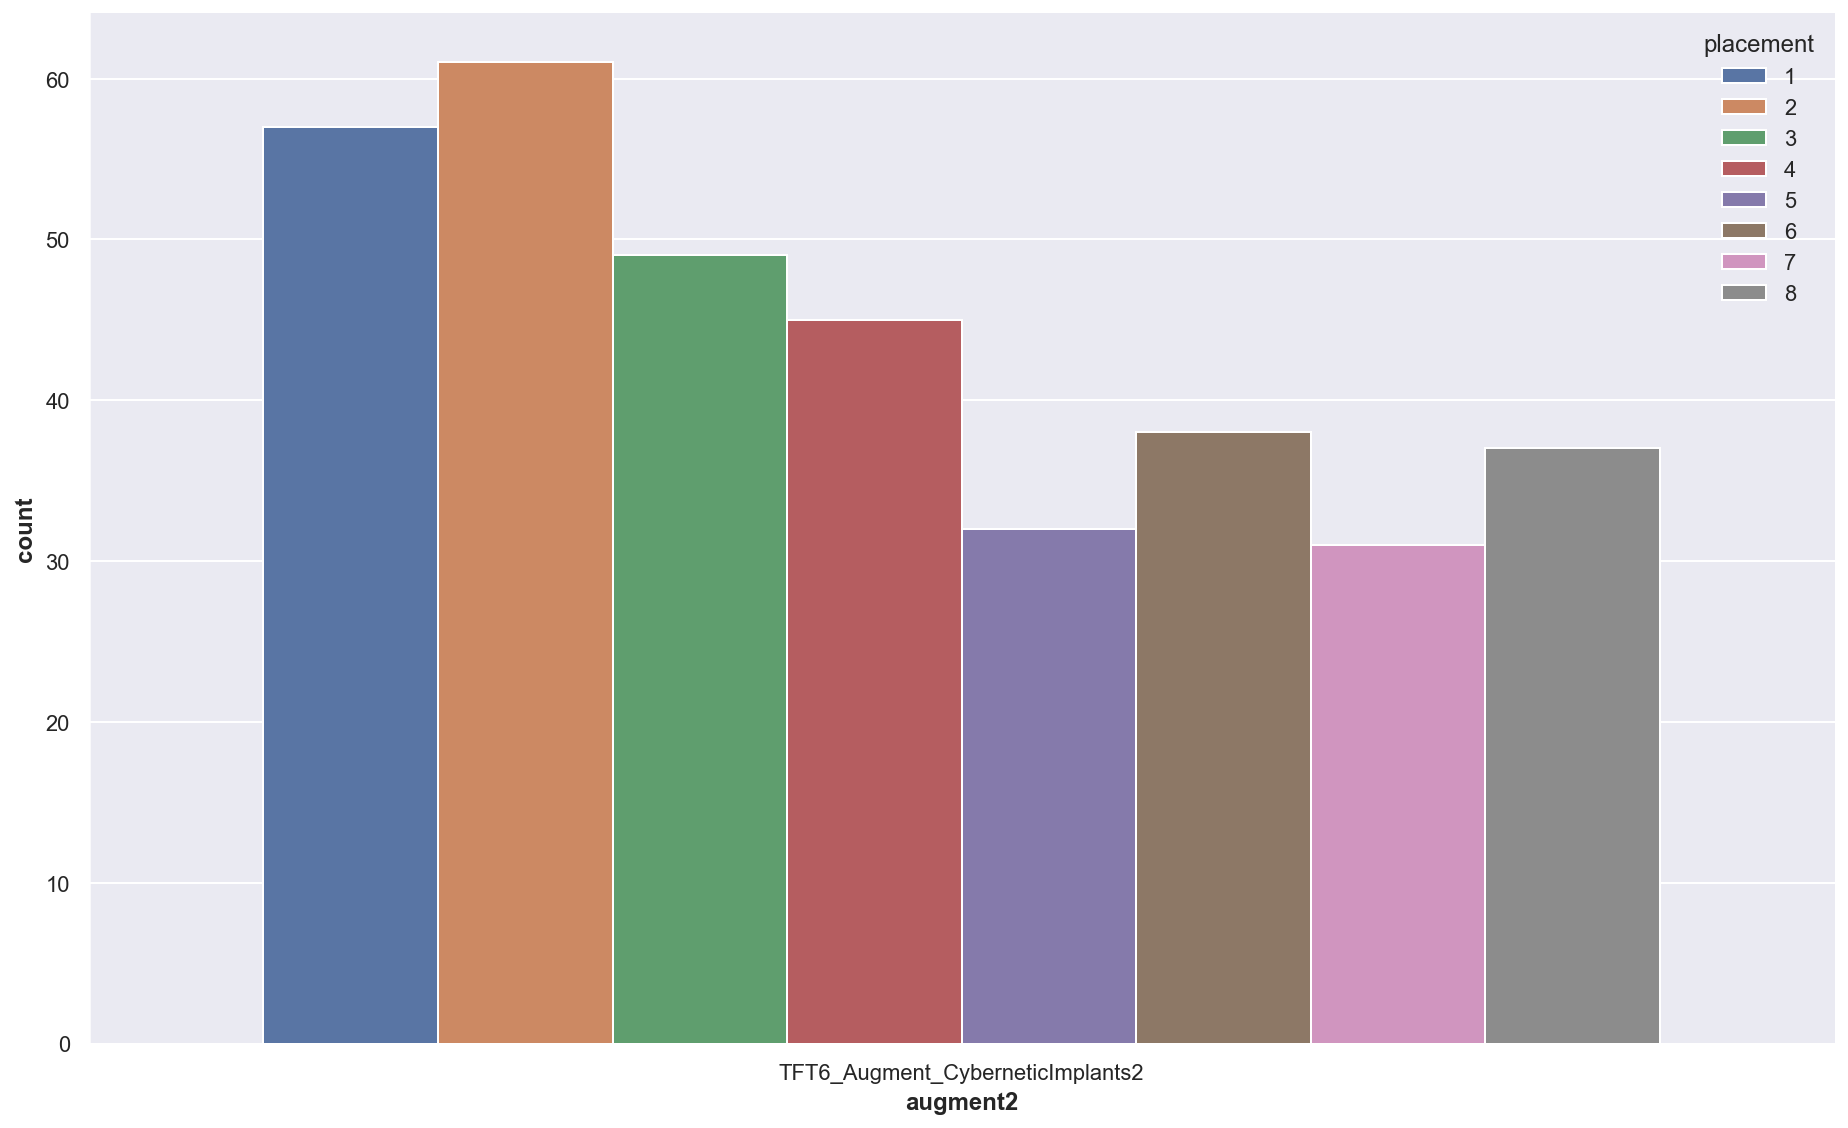

In [266]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

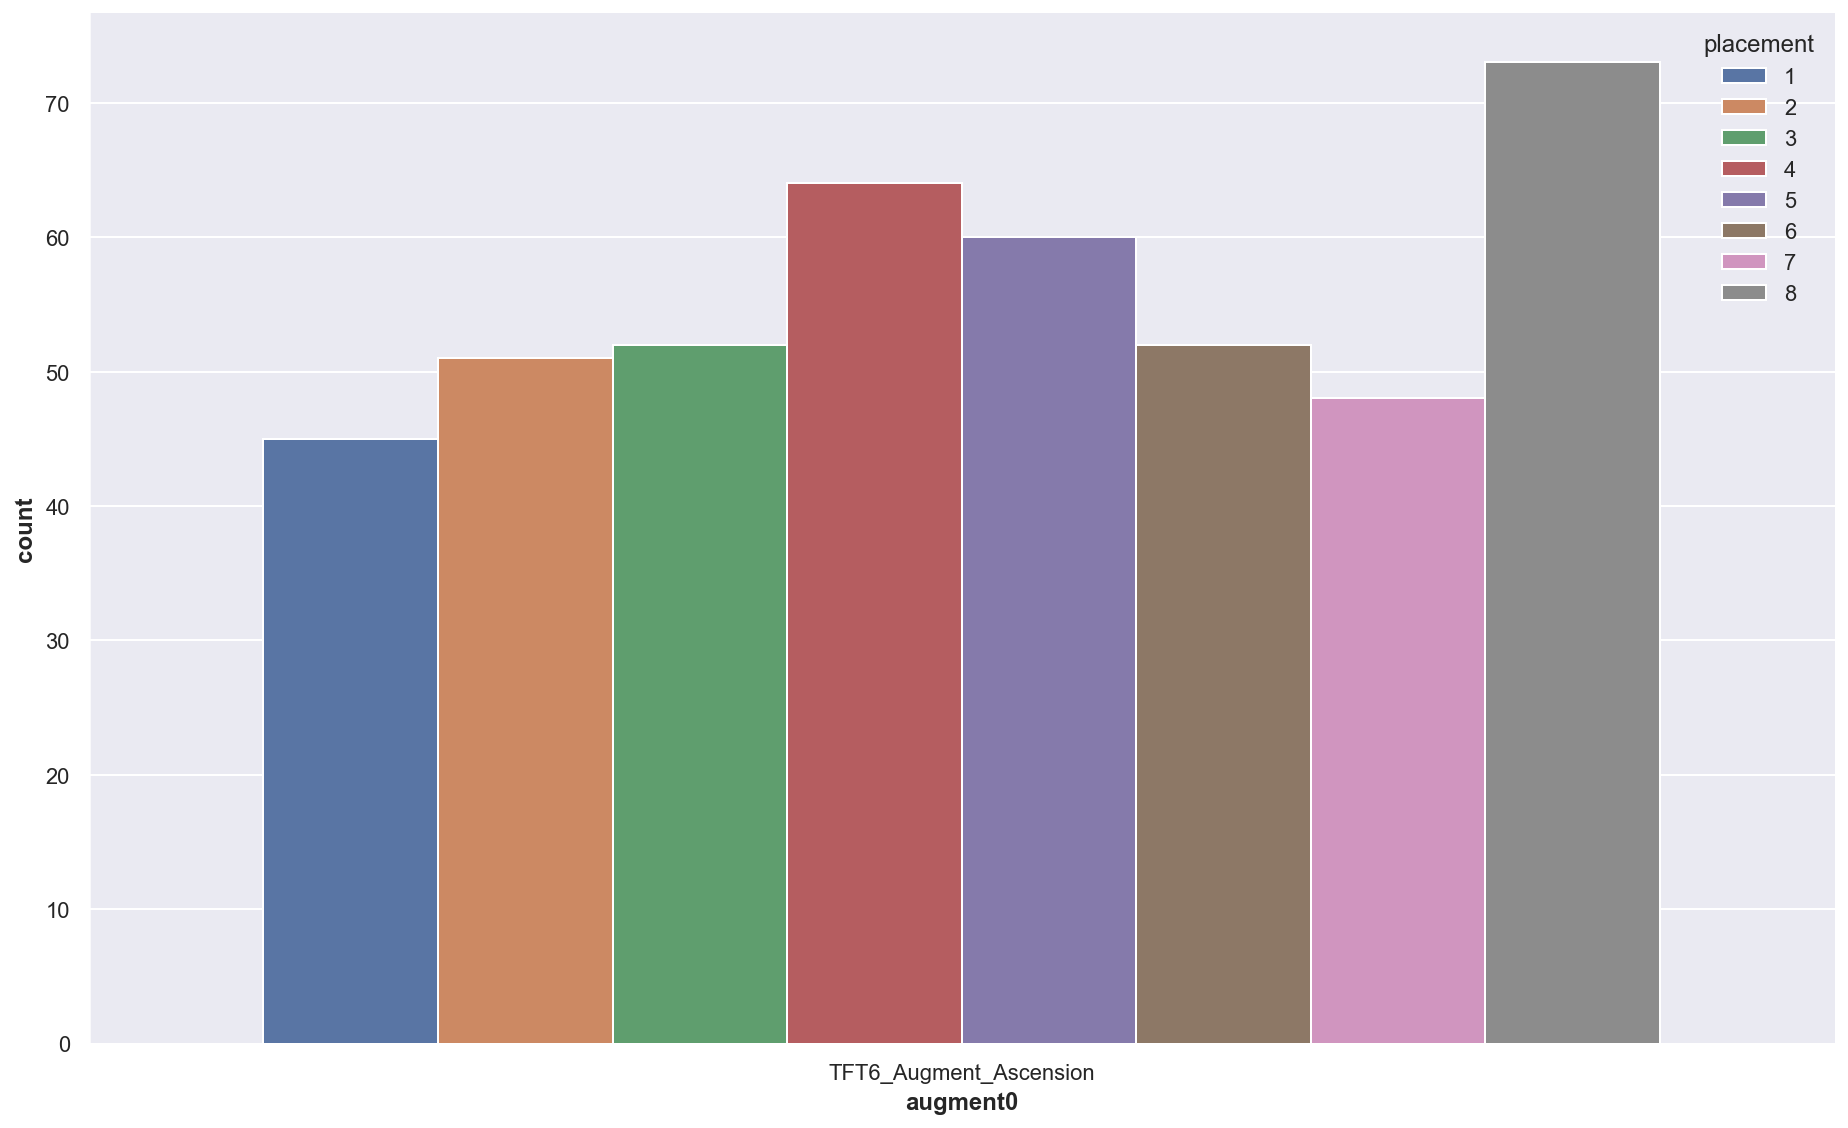

In [267]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Ascension'], x='augment0', hue=TARGETNAME)
sns.despine()

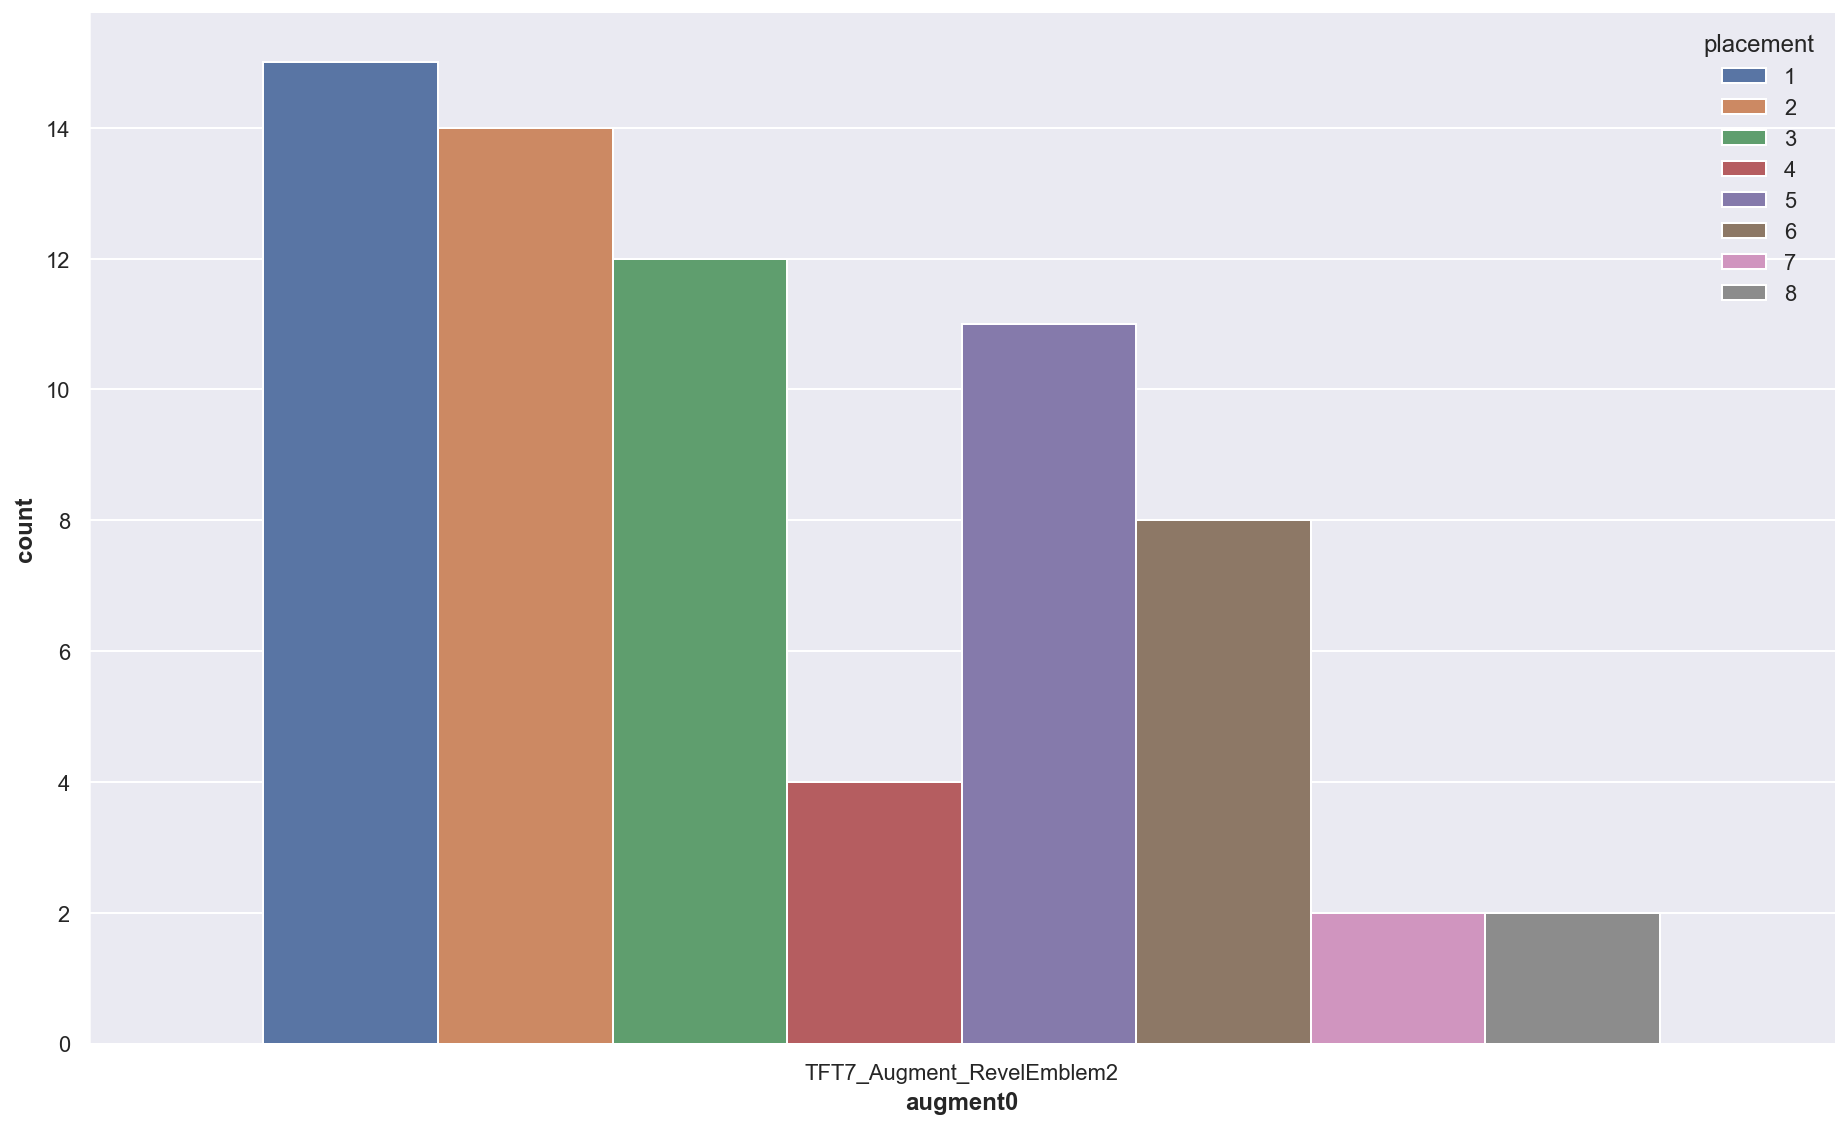

In [268]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_RevelEmblem2'], x='augment0', hue=TARGETNAME)
sns.despine()

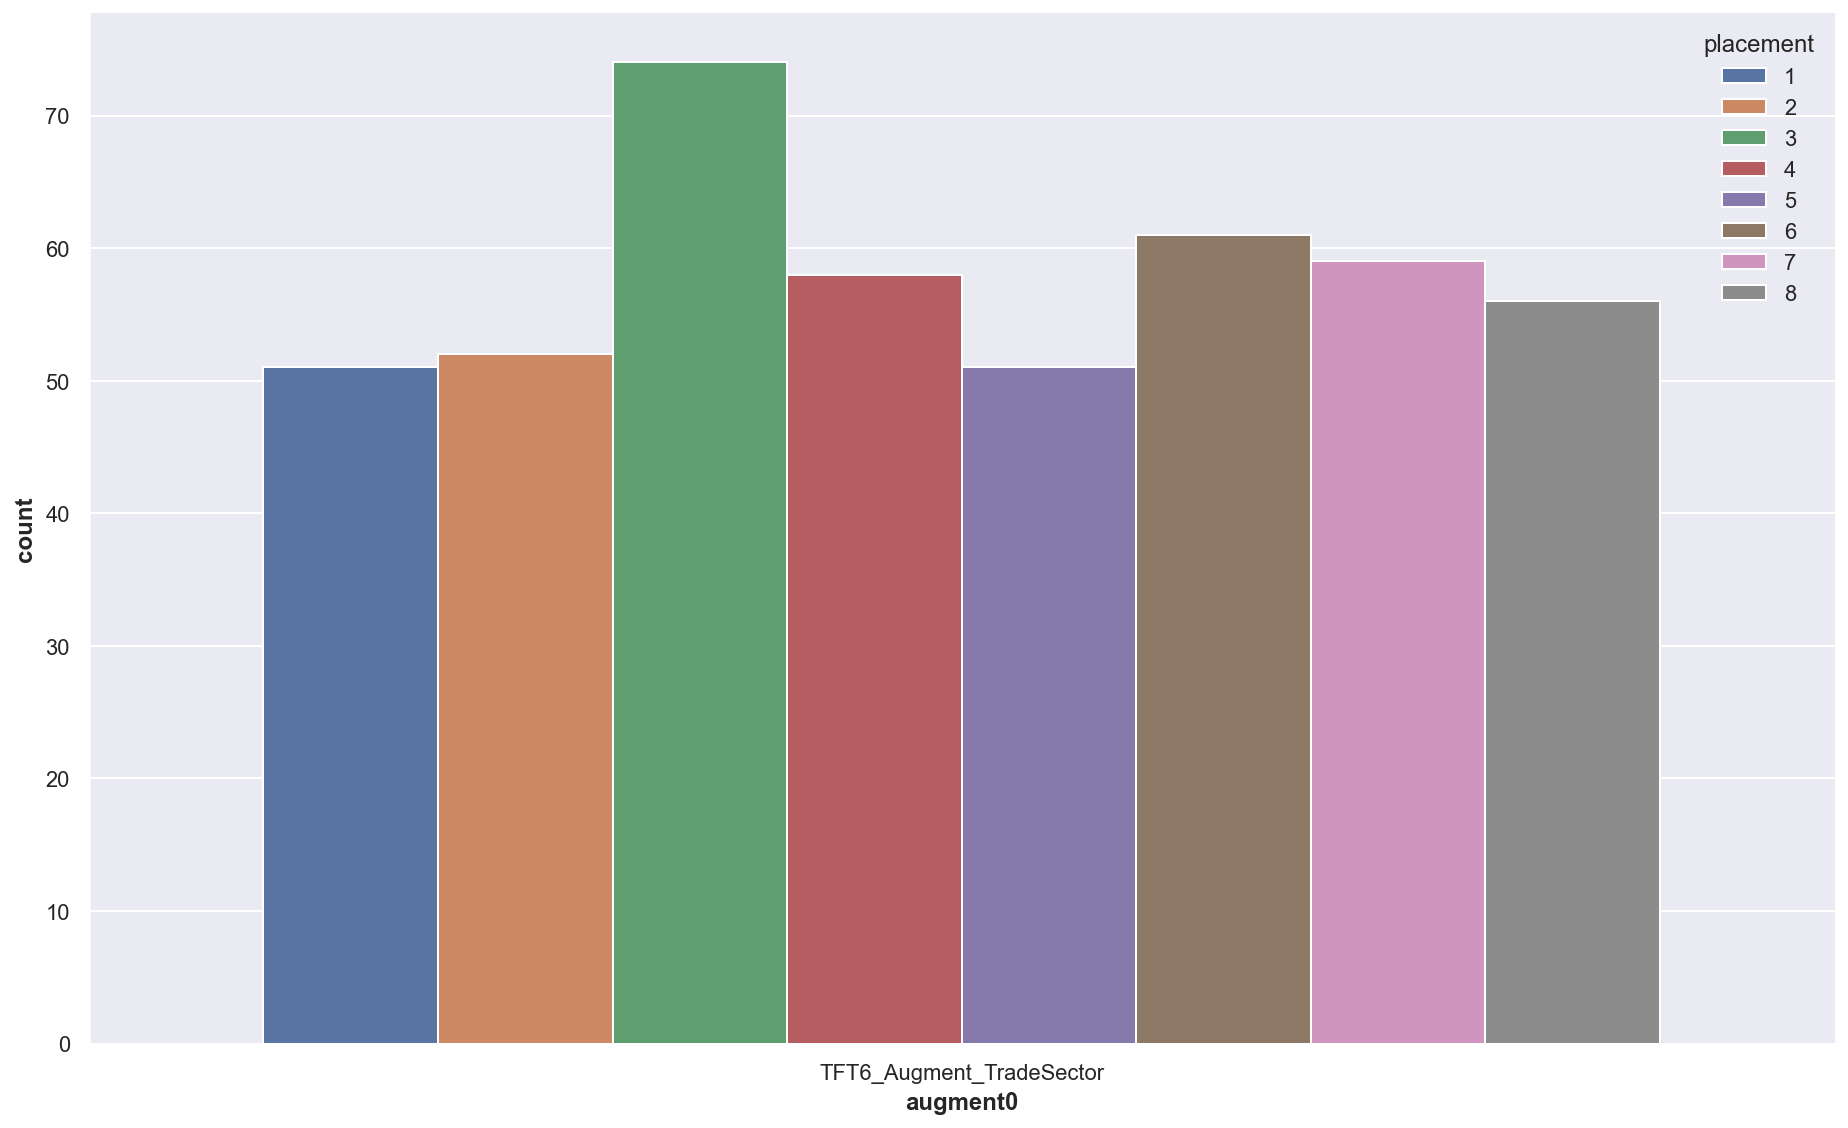

In [269]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_TradeSector'], x='augment0', hue=TARGETNAME)
sns.despine()

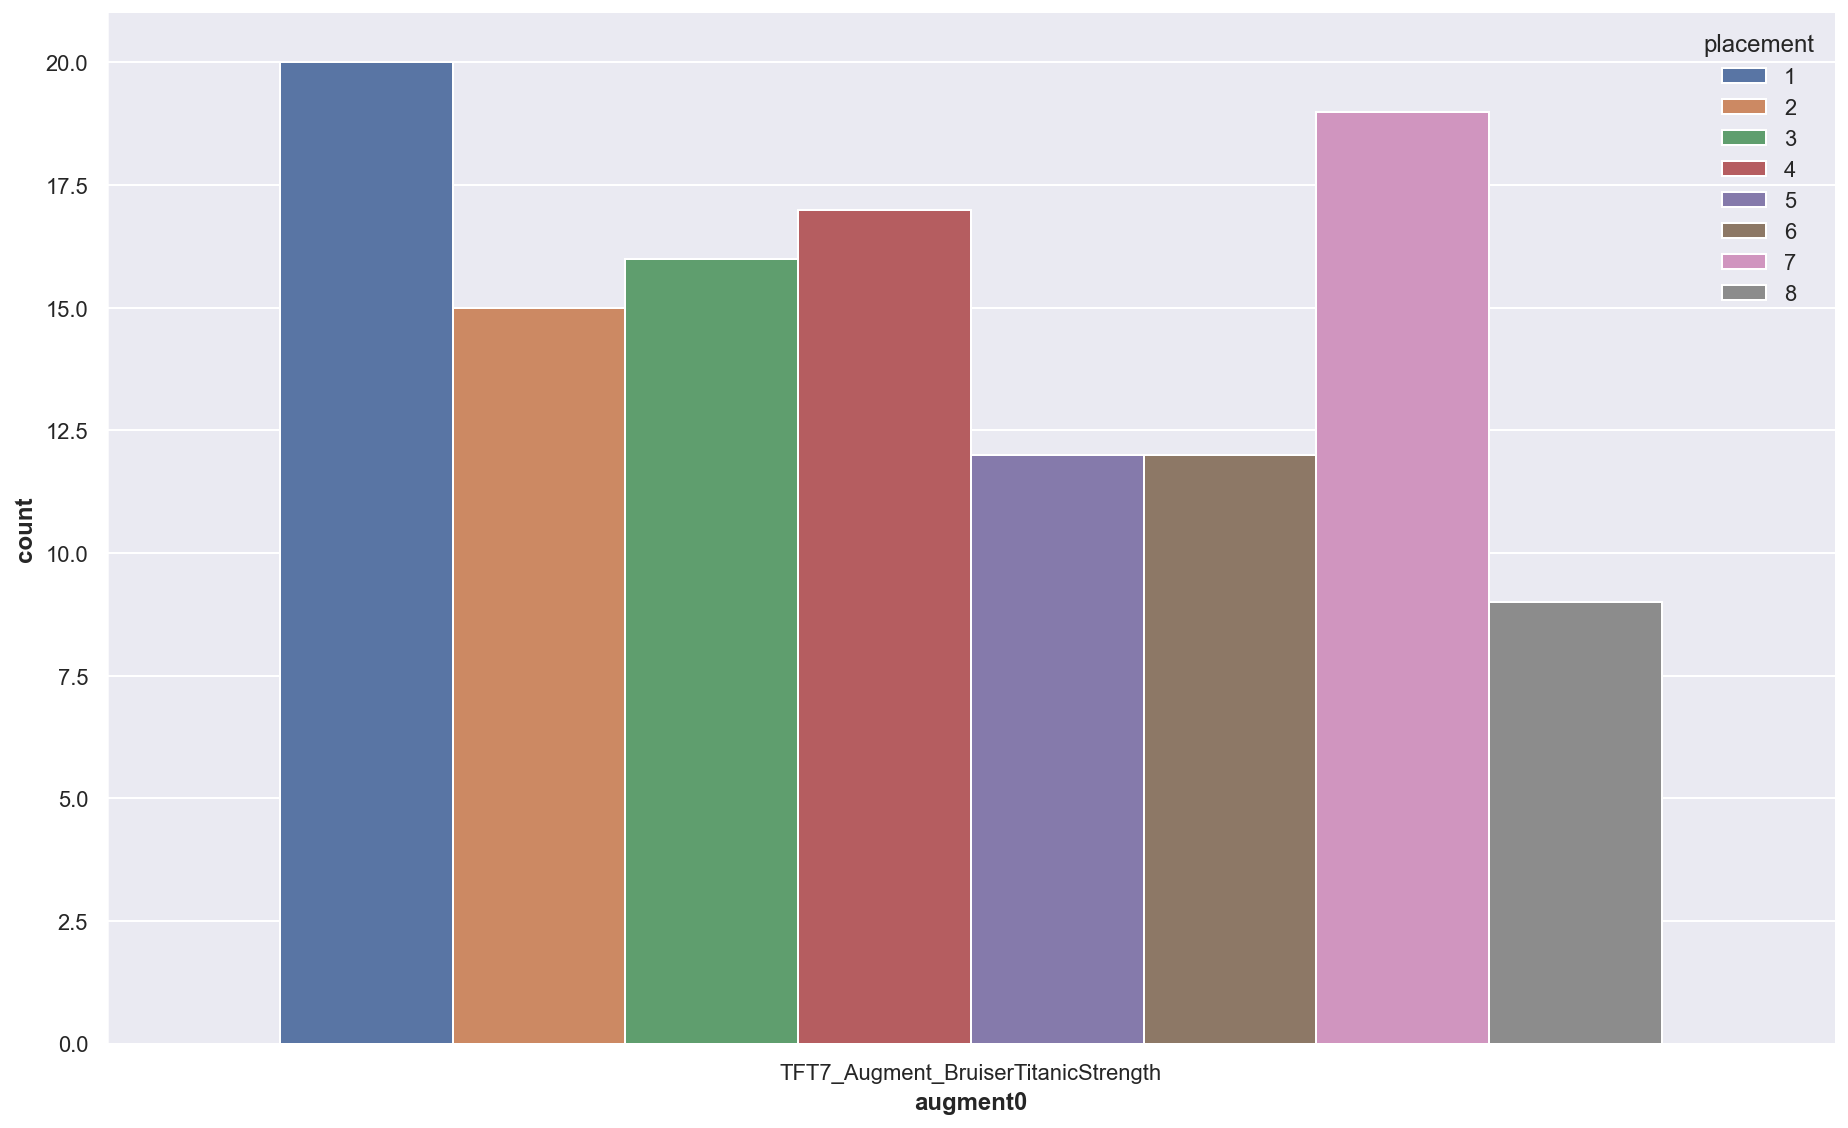

In [270]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserTitanicStrength'], x='augment0', hue=TARGETNAME)
sns.despine()

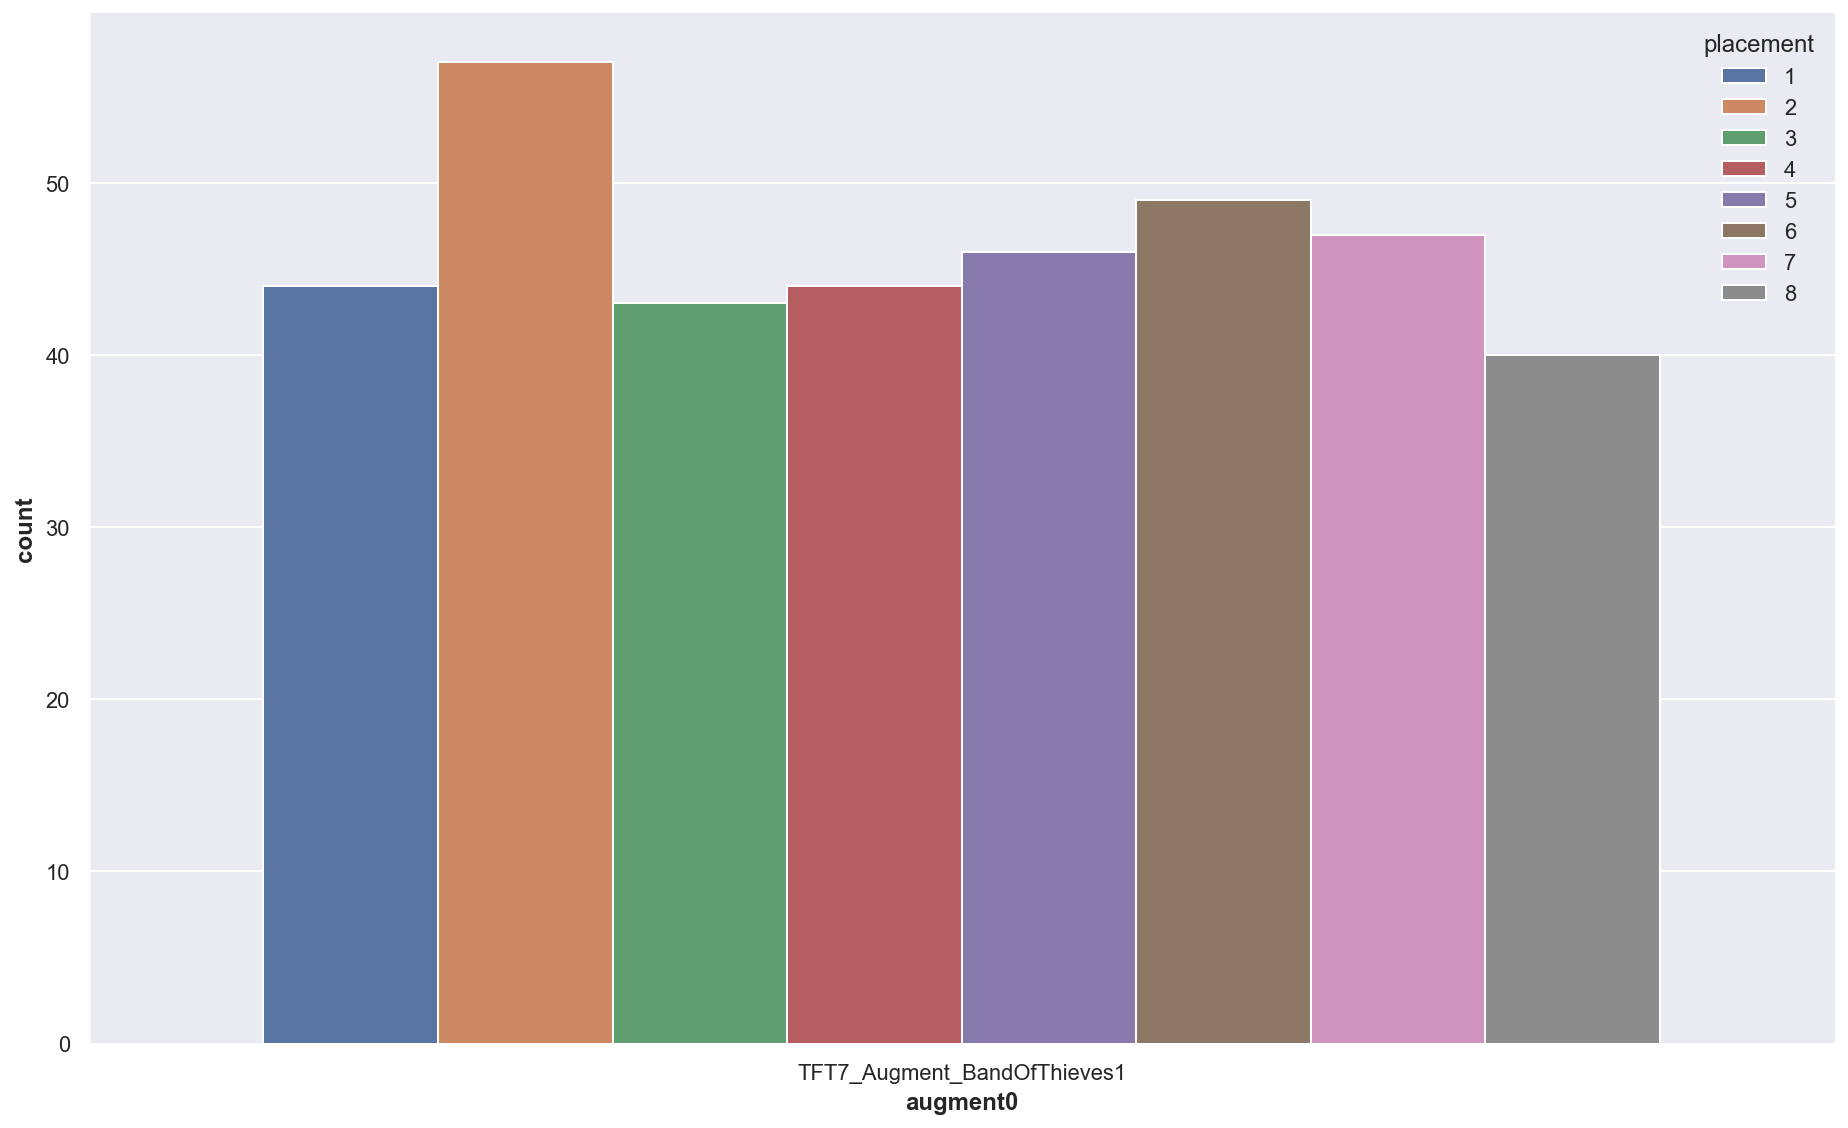

In [271]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BandOfThieves1'], x='augment0', hue=TARGETNAME)
sns.despine()

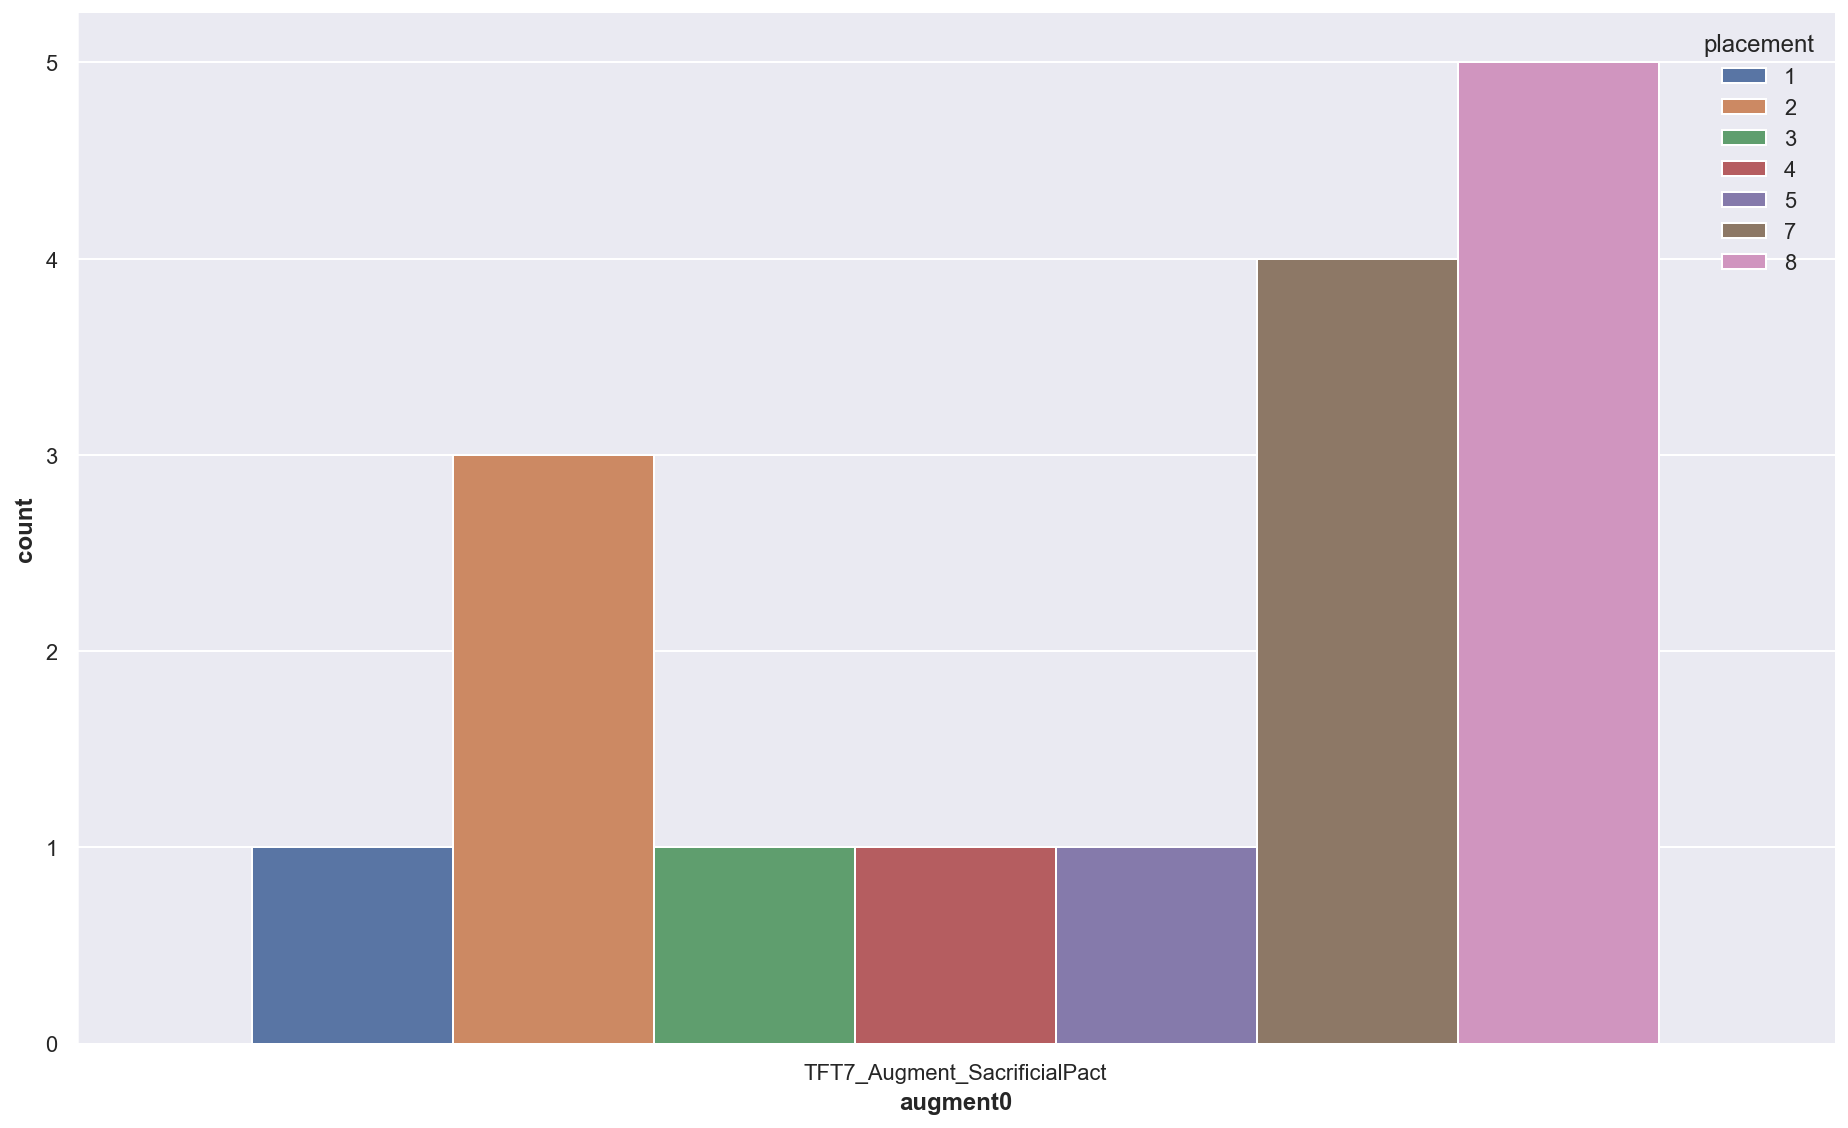

In [272]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_SacrificialPact'], x='augment0', hue=TARGETNAME)
sns.despine()

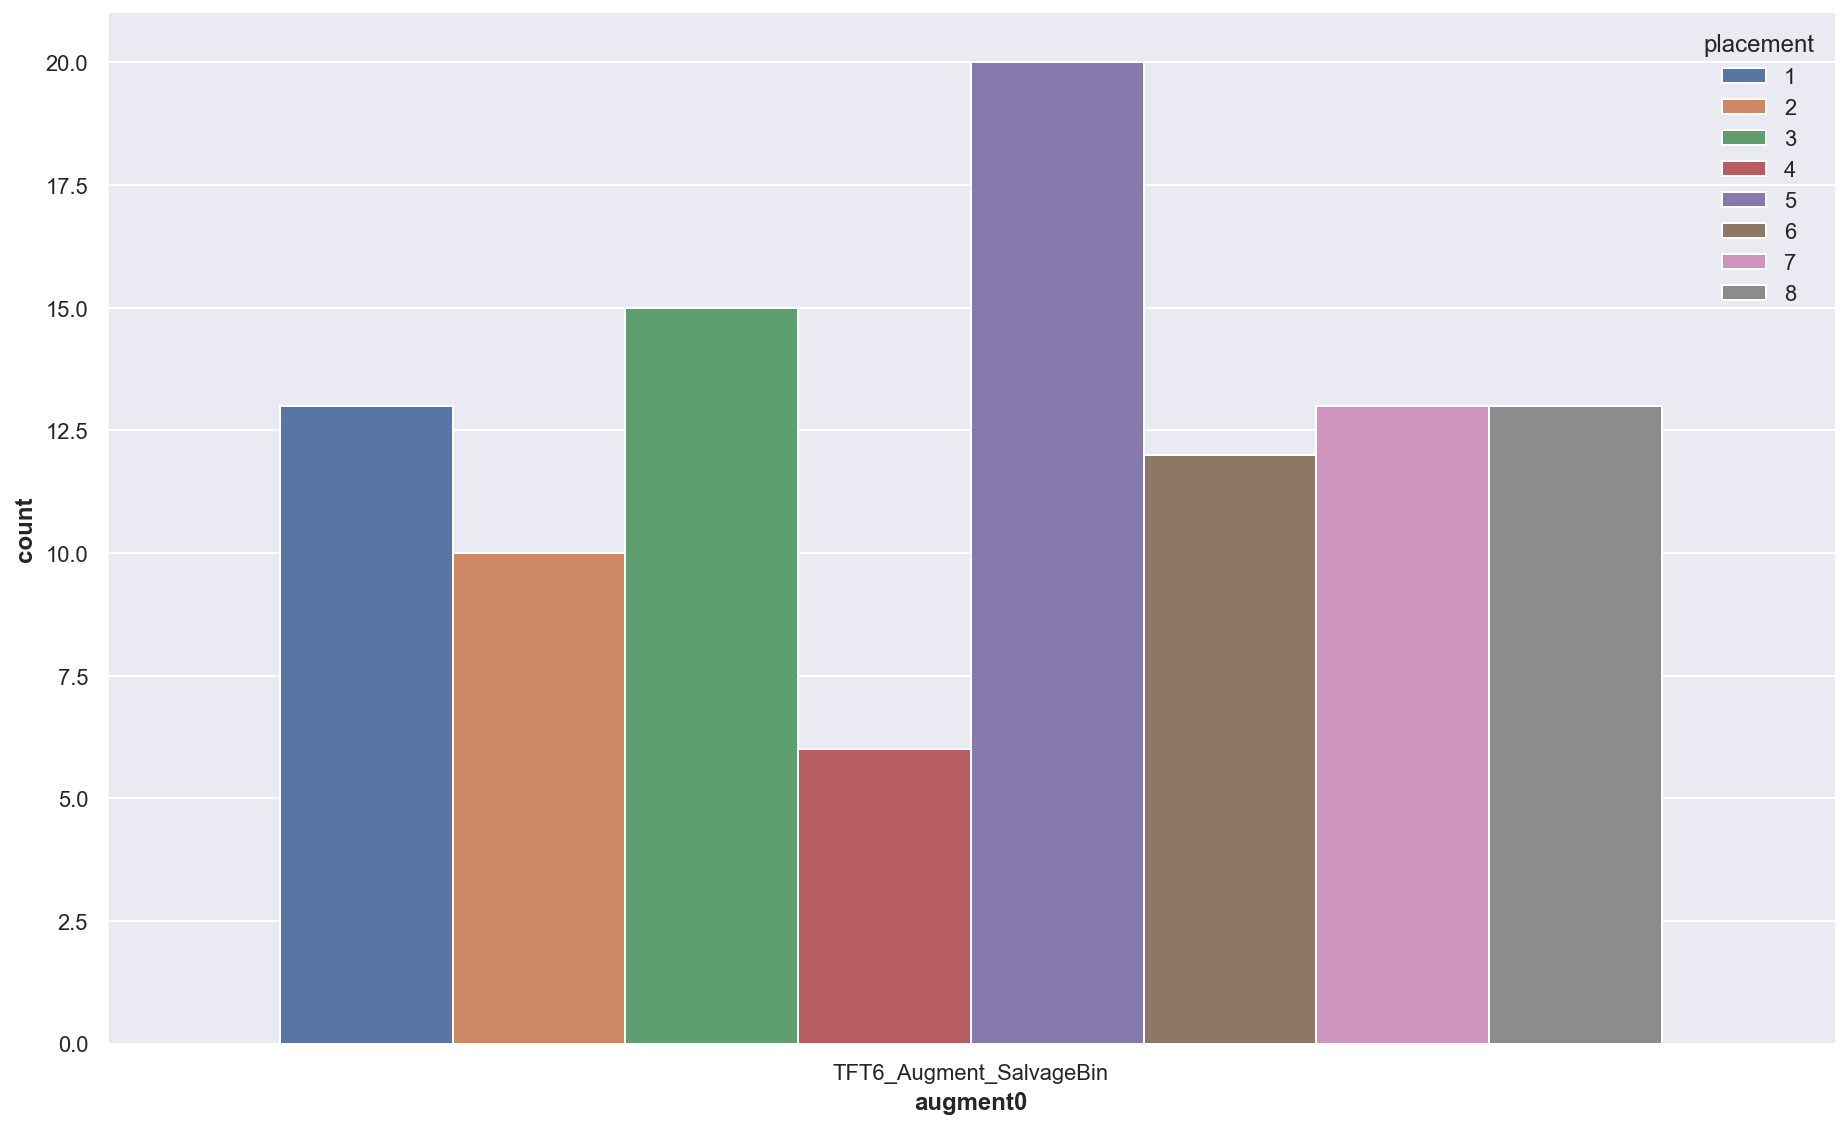

In [273]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_SalvageBin'], x='augment0', hue=TARGETNAME)
sns.despine()

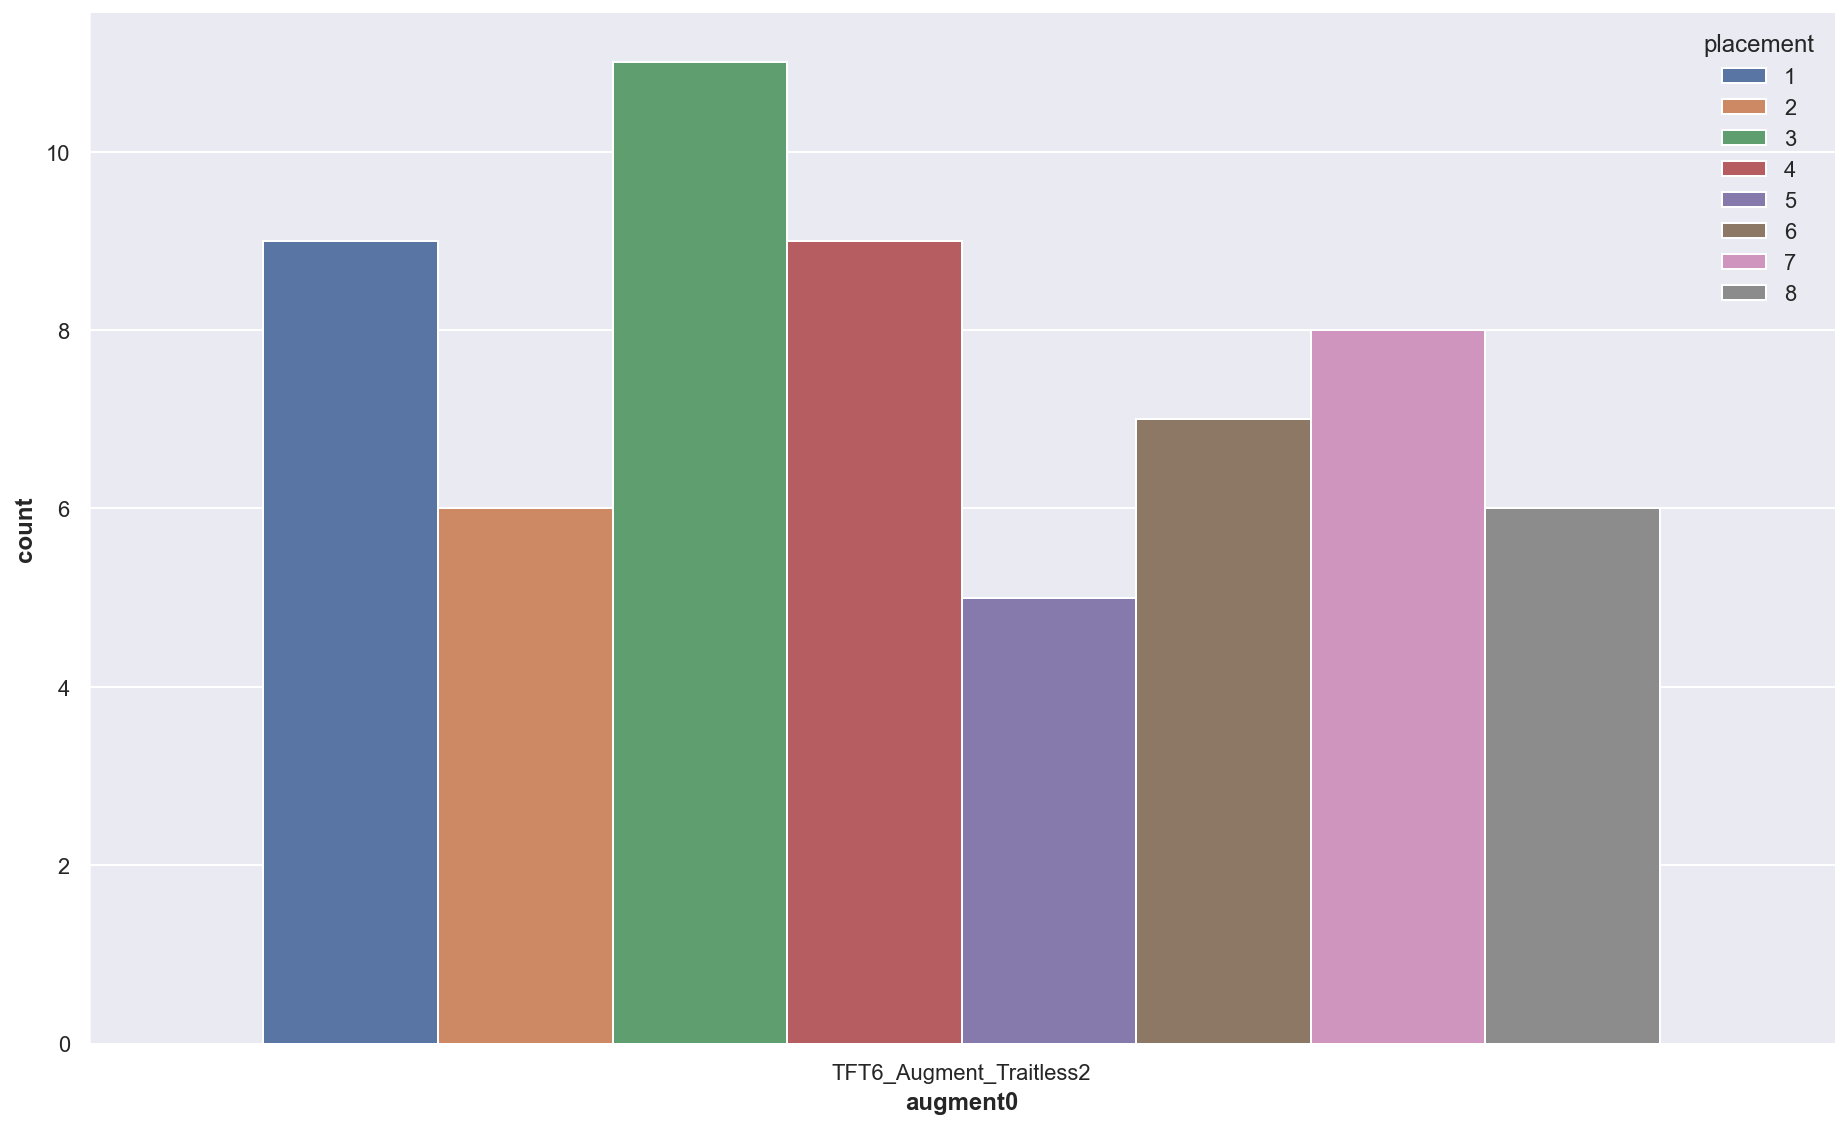

In [274]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Traitless2'], x='augment0', hue=TARGETNAME)
sns.despine()

No Good.

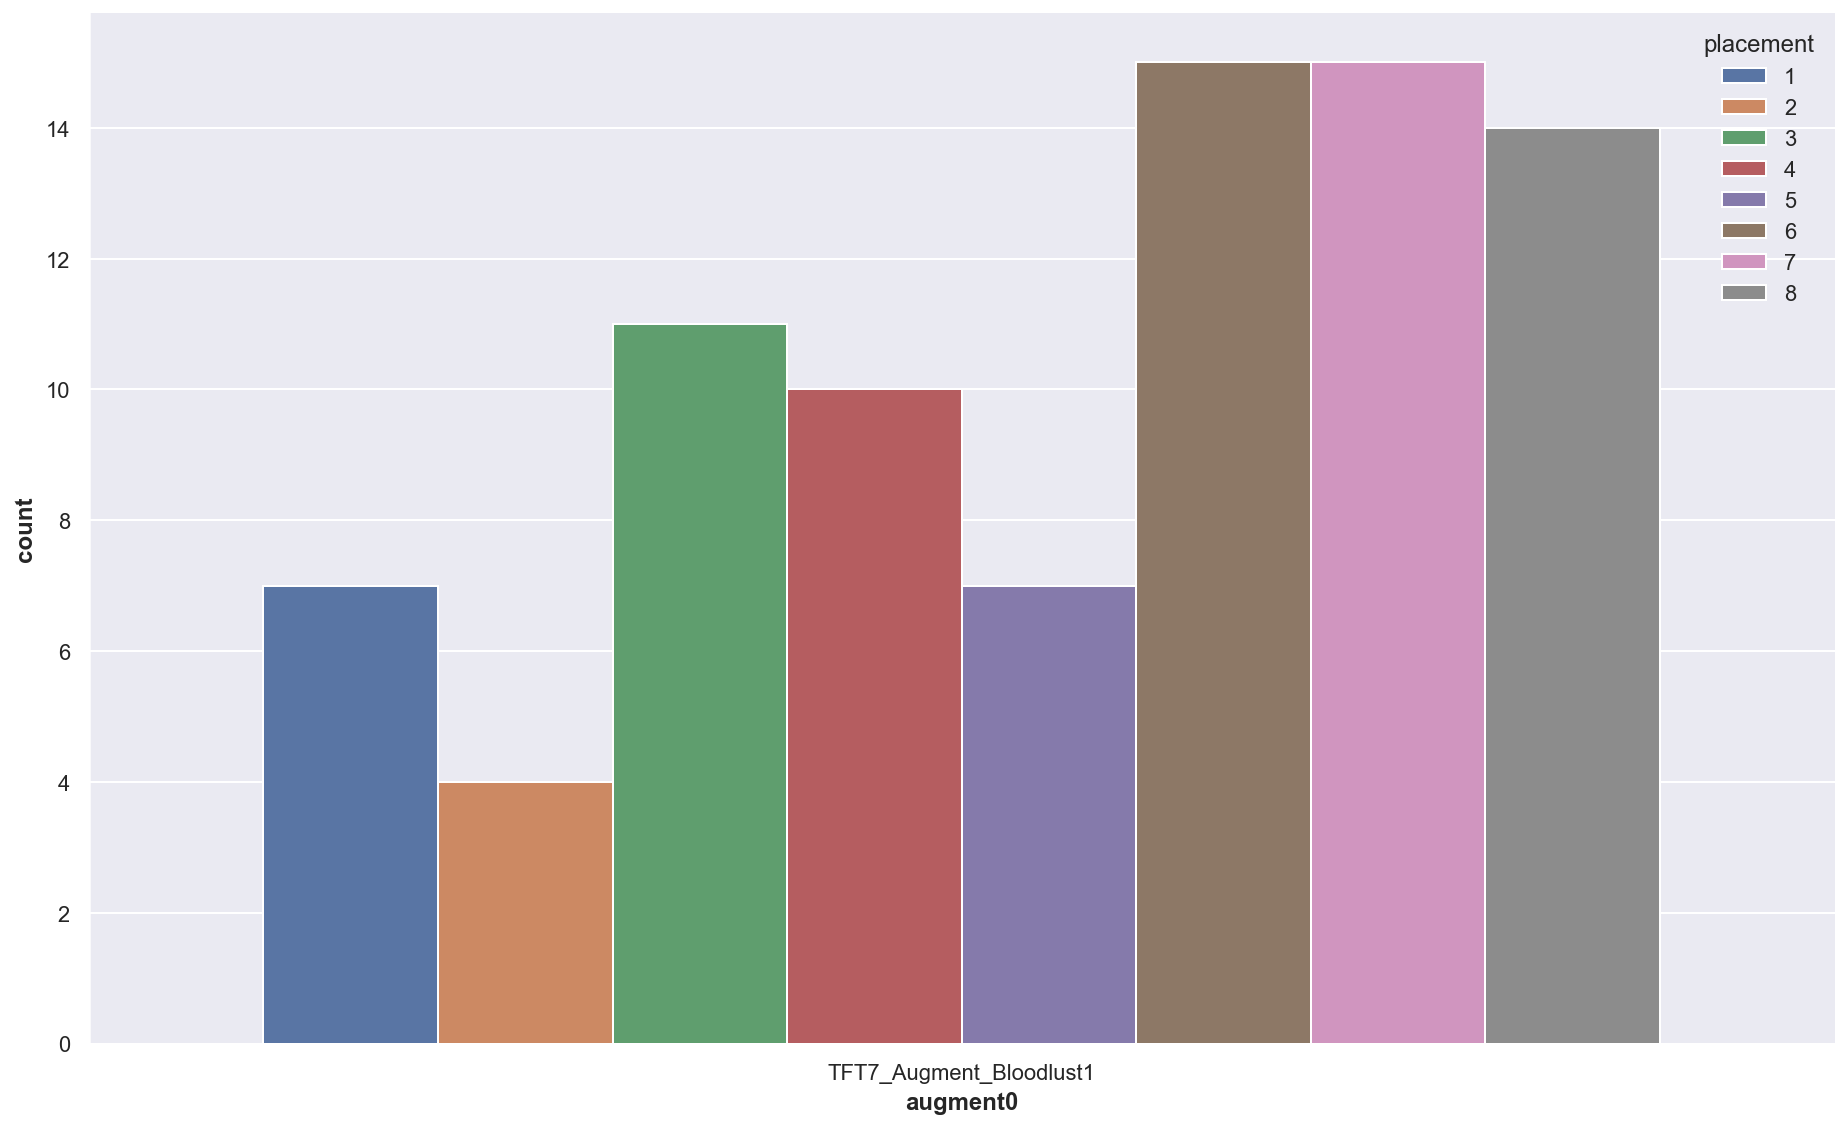

In [275]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_Bloodlust1'], x='augment0', hue=TARGETNAME)
sns.despine()

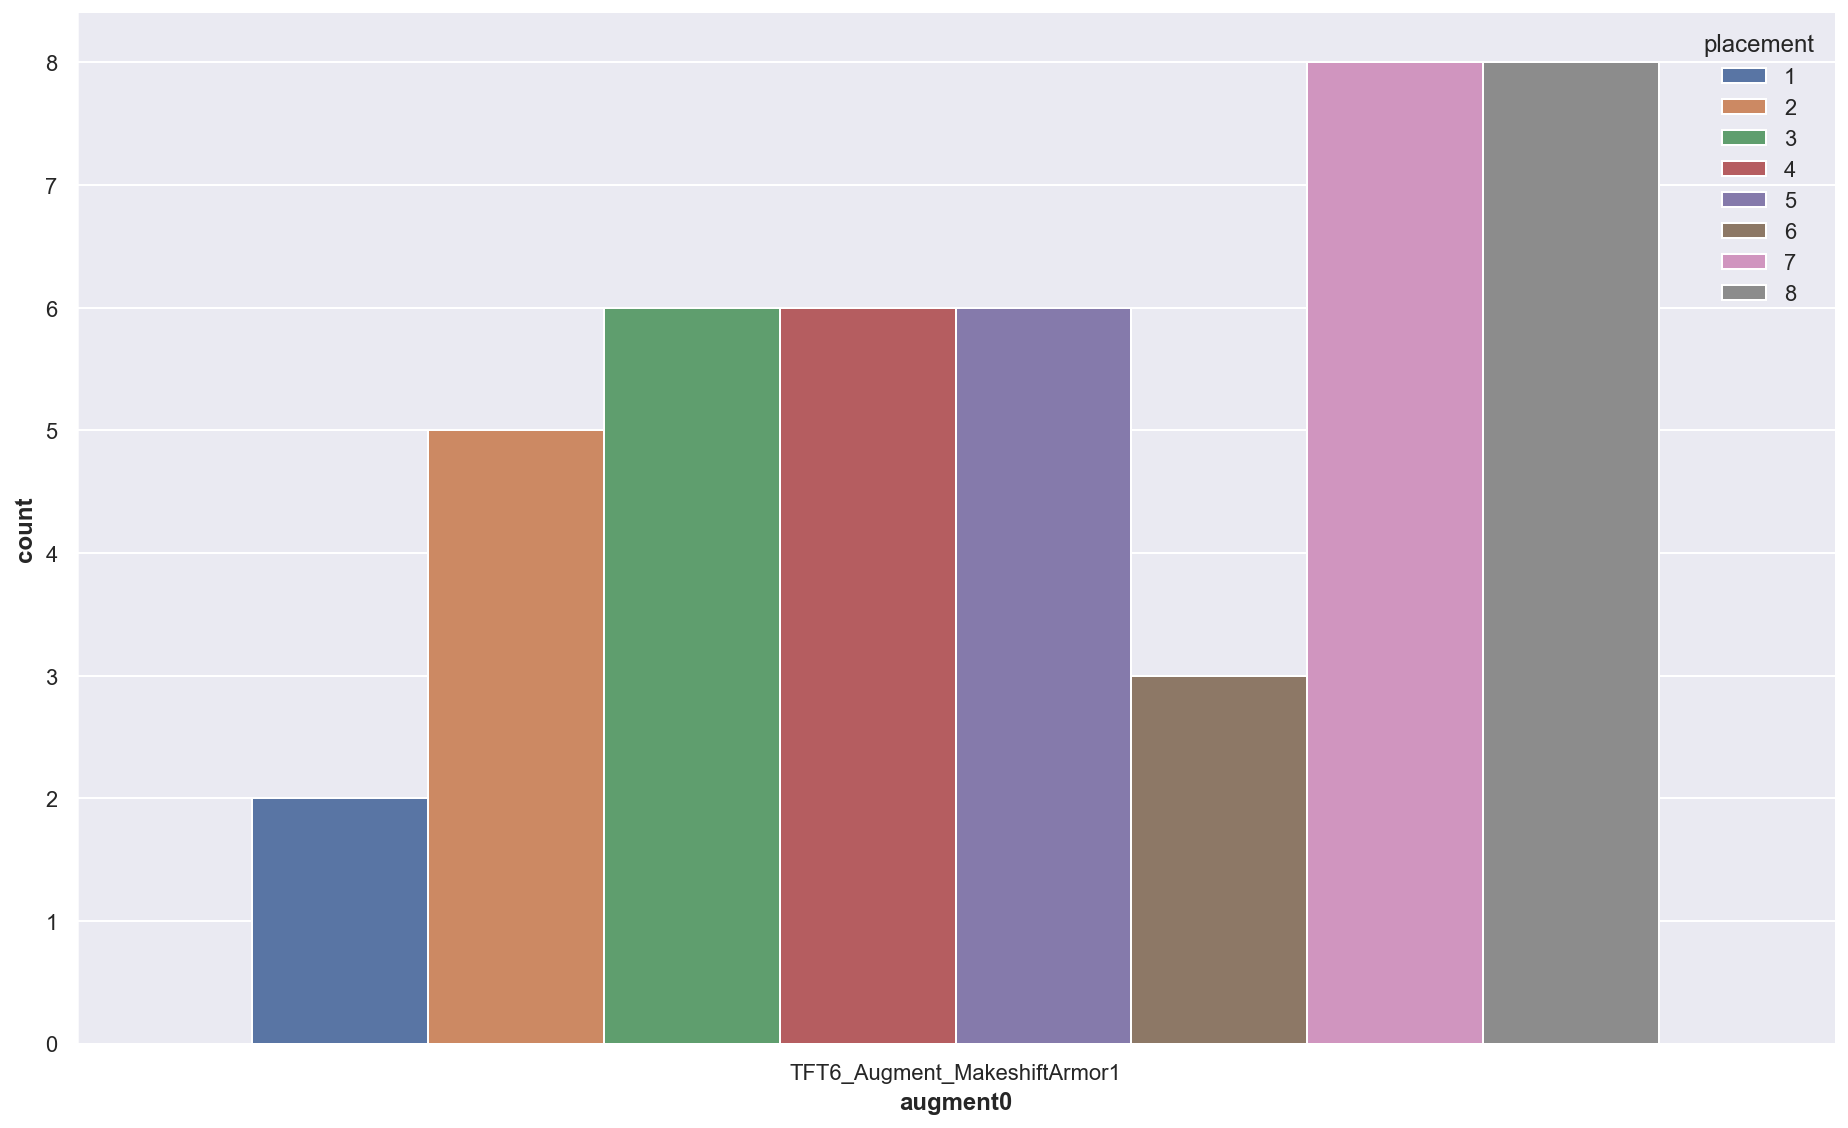

In [276]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor1'], x='augment0', hue=TARGETNAME)
sns.despine()

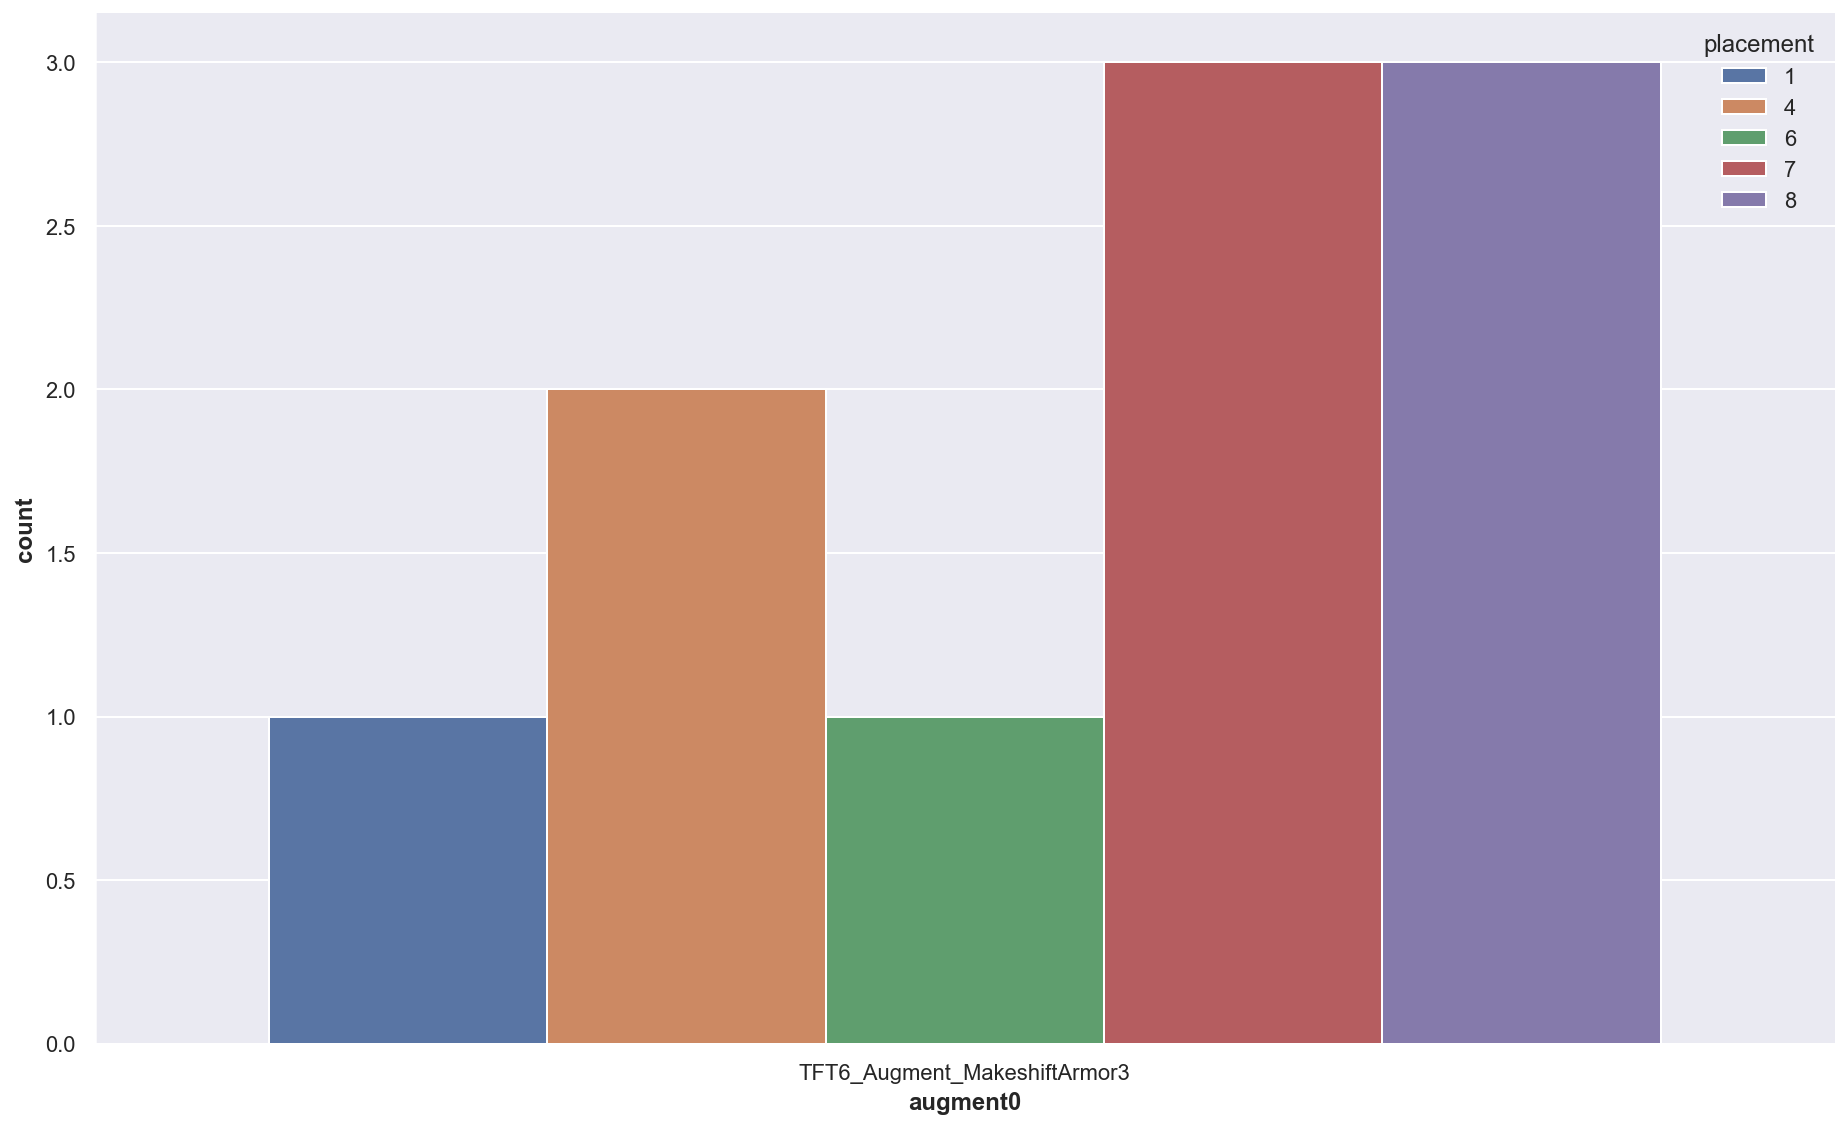

In [277]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor3'], x='augment0', hue=TARGETNAME)
sns.despine()

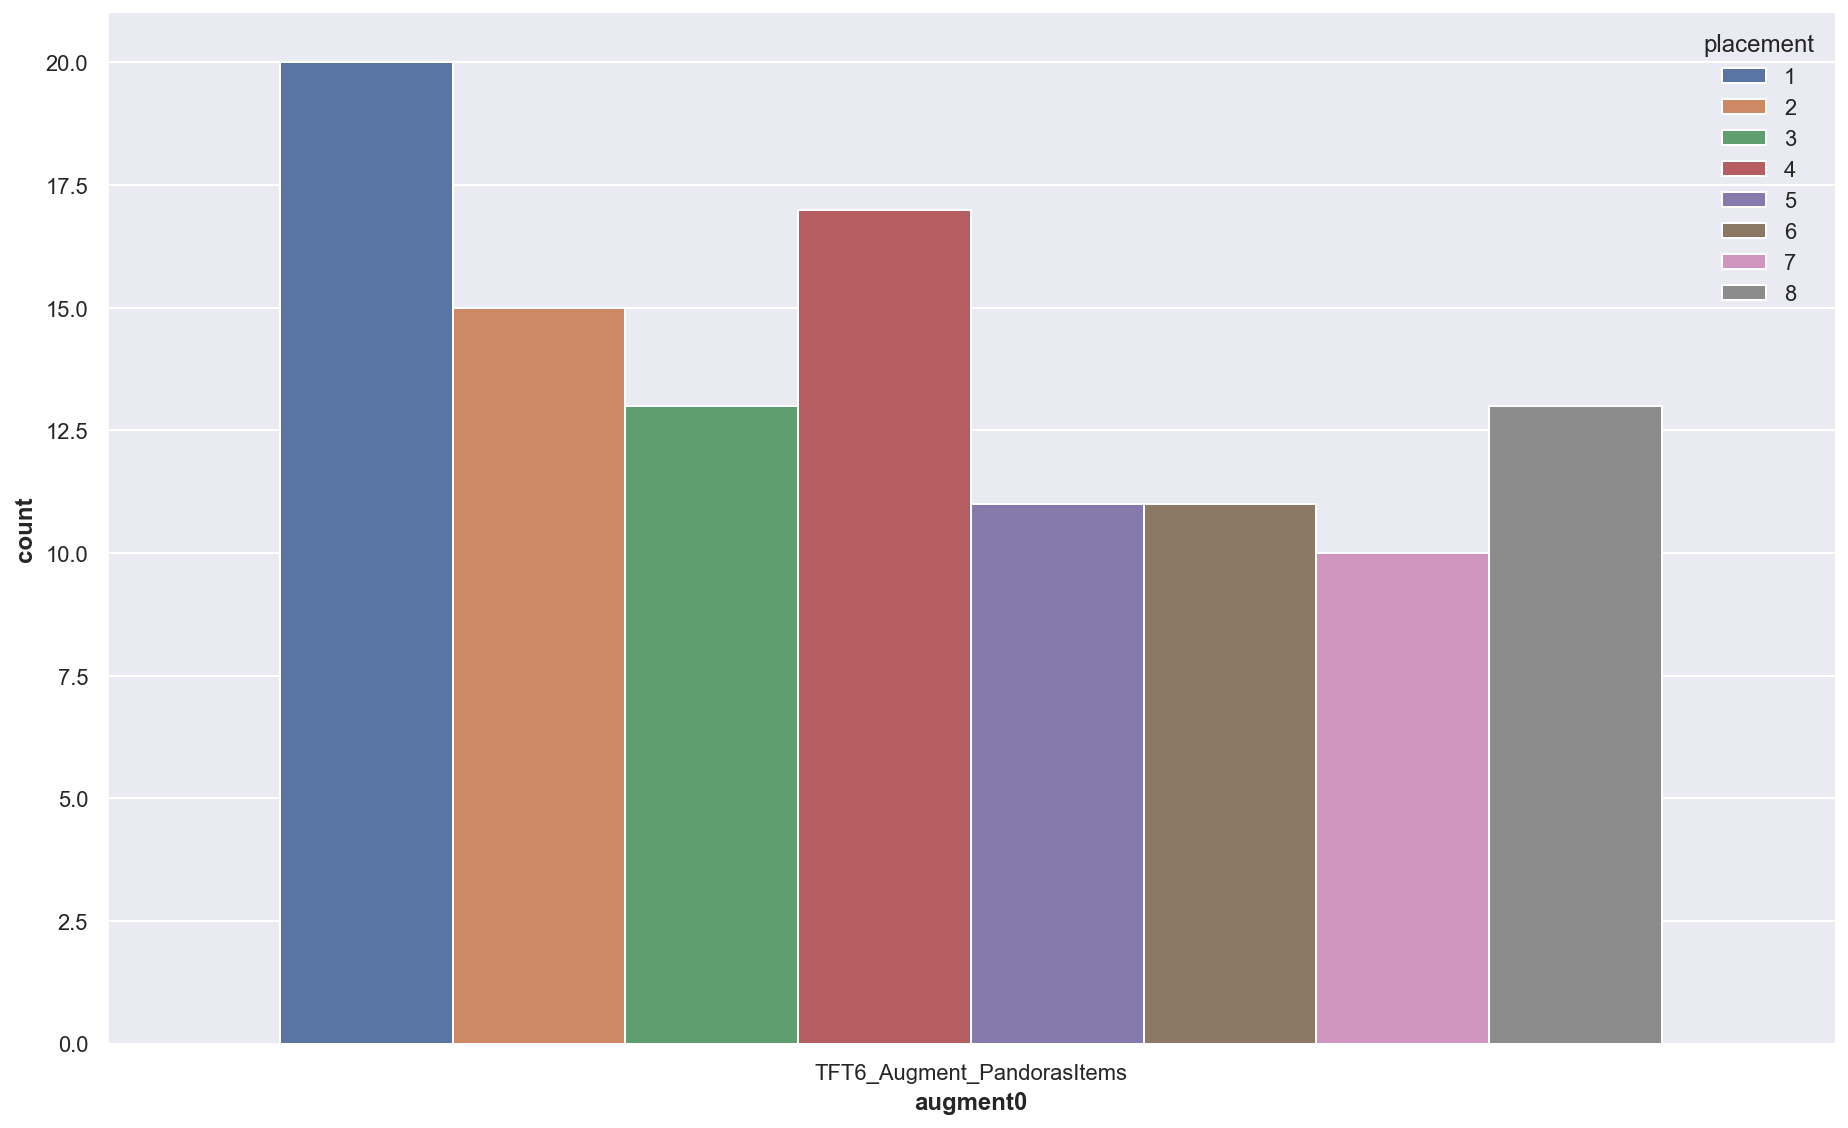

In [278]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_PandorasItems'], x='augment0', hue=TARGETNAME)
sns.despine()

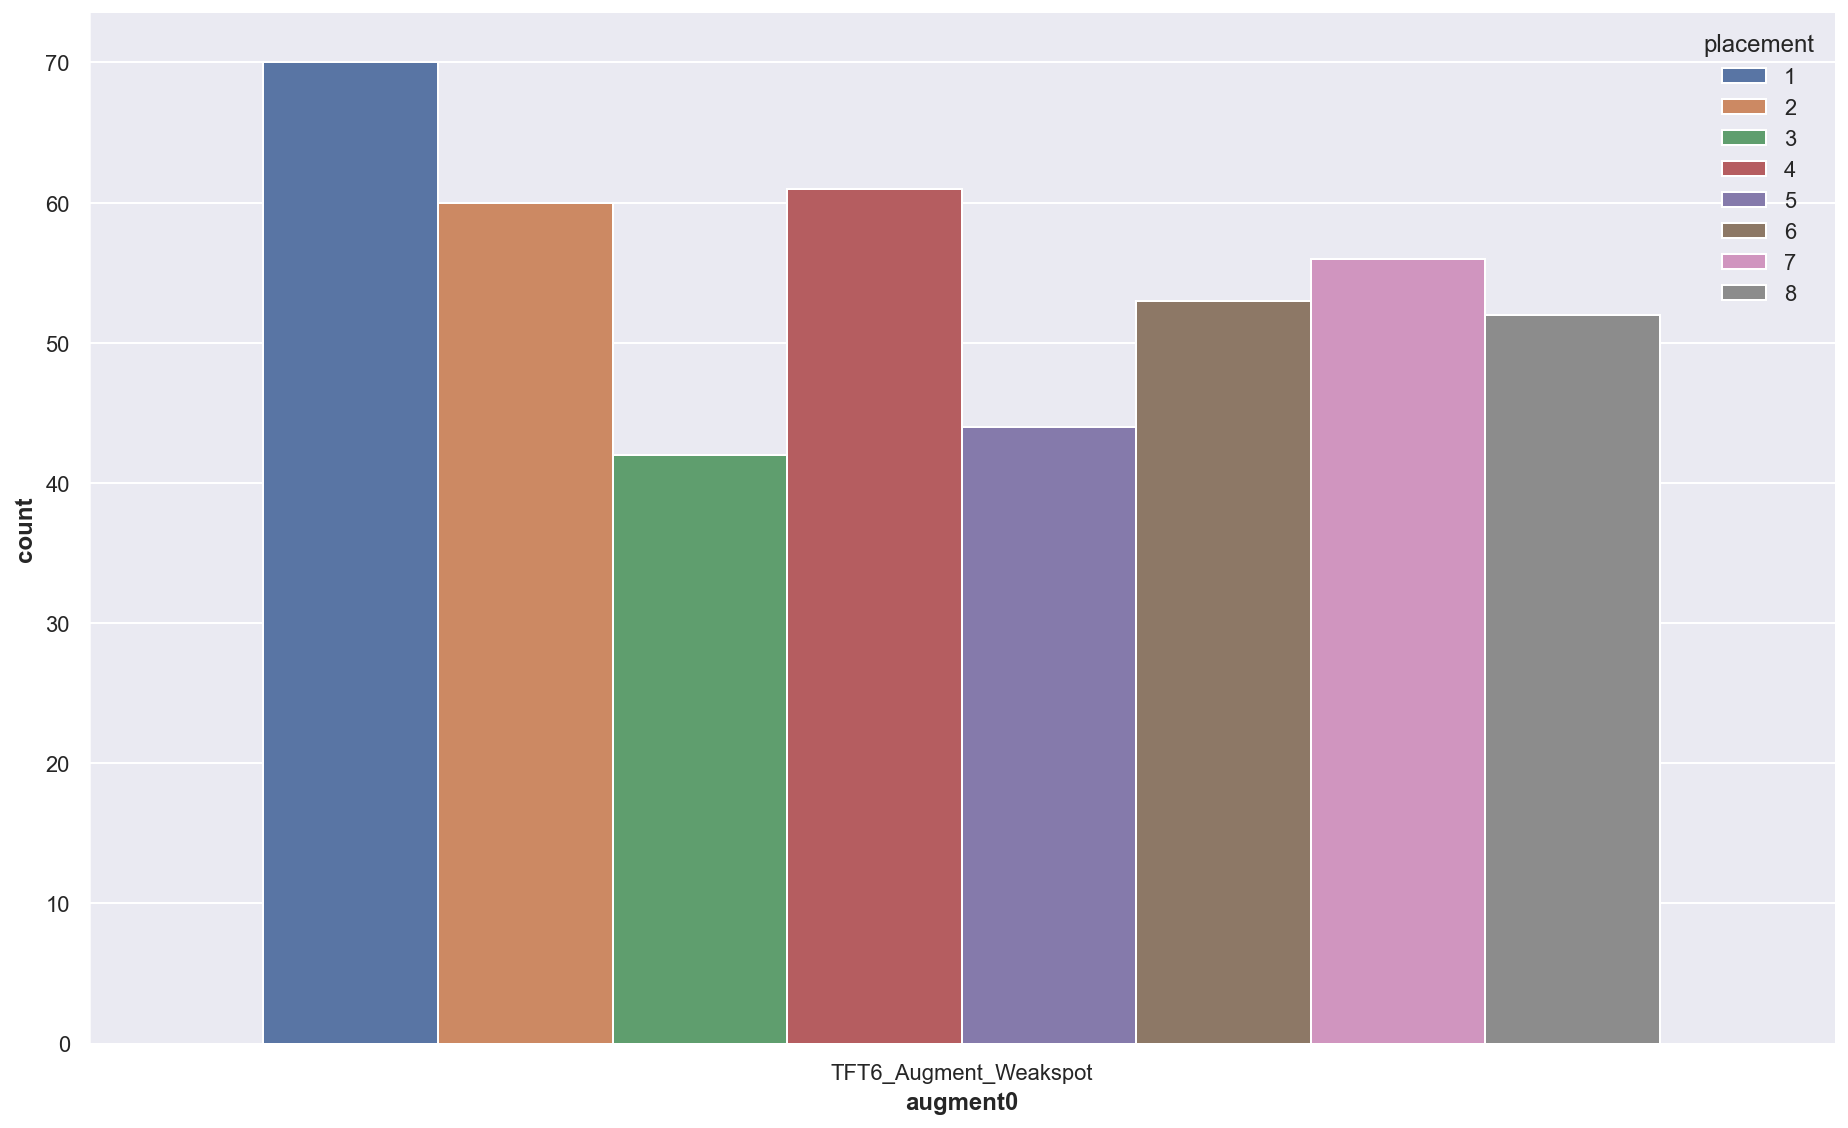

In [279]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Weakspot'], x='augment0', hue=TARGETNAME)
sns.despine()

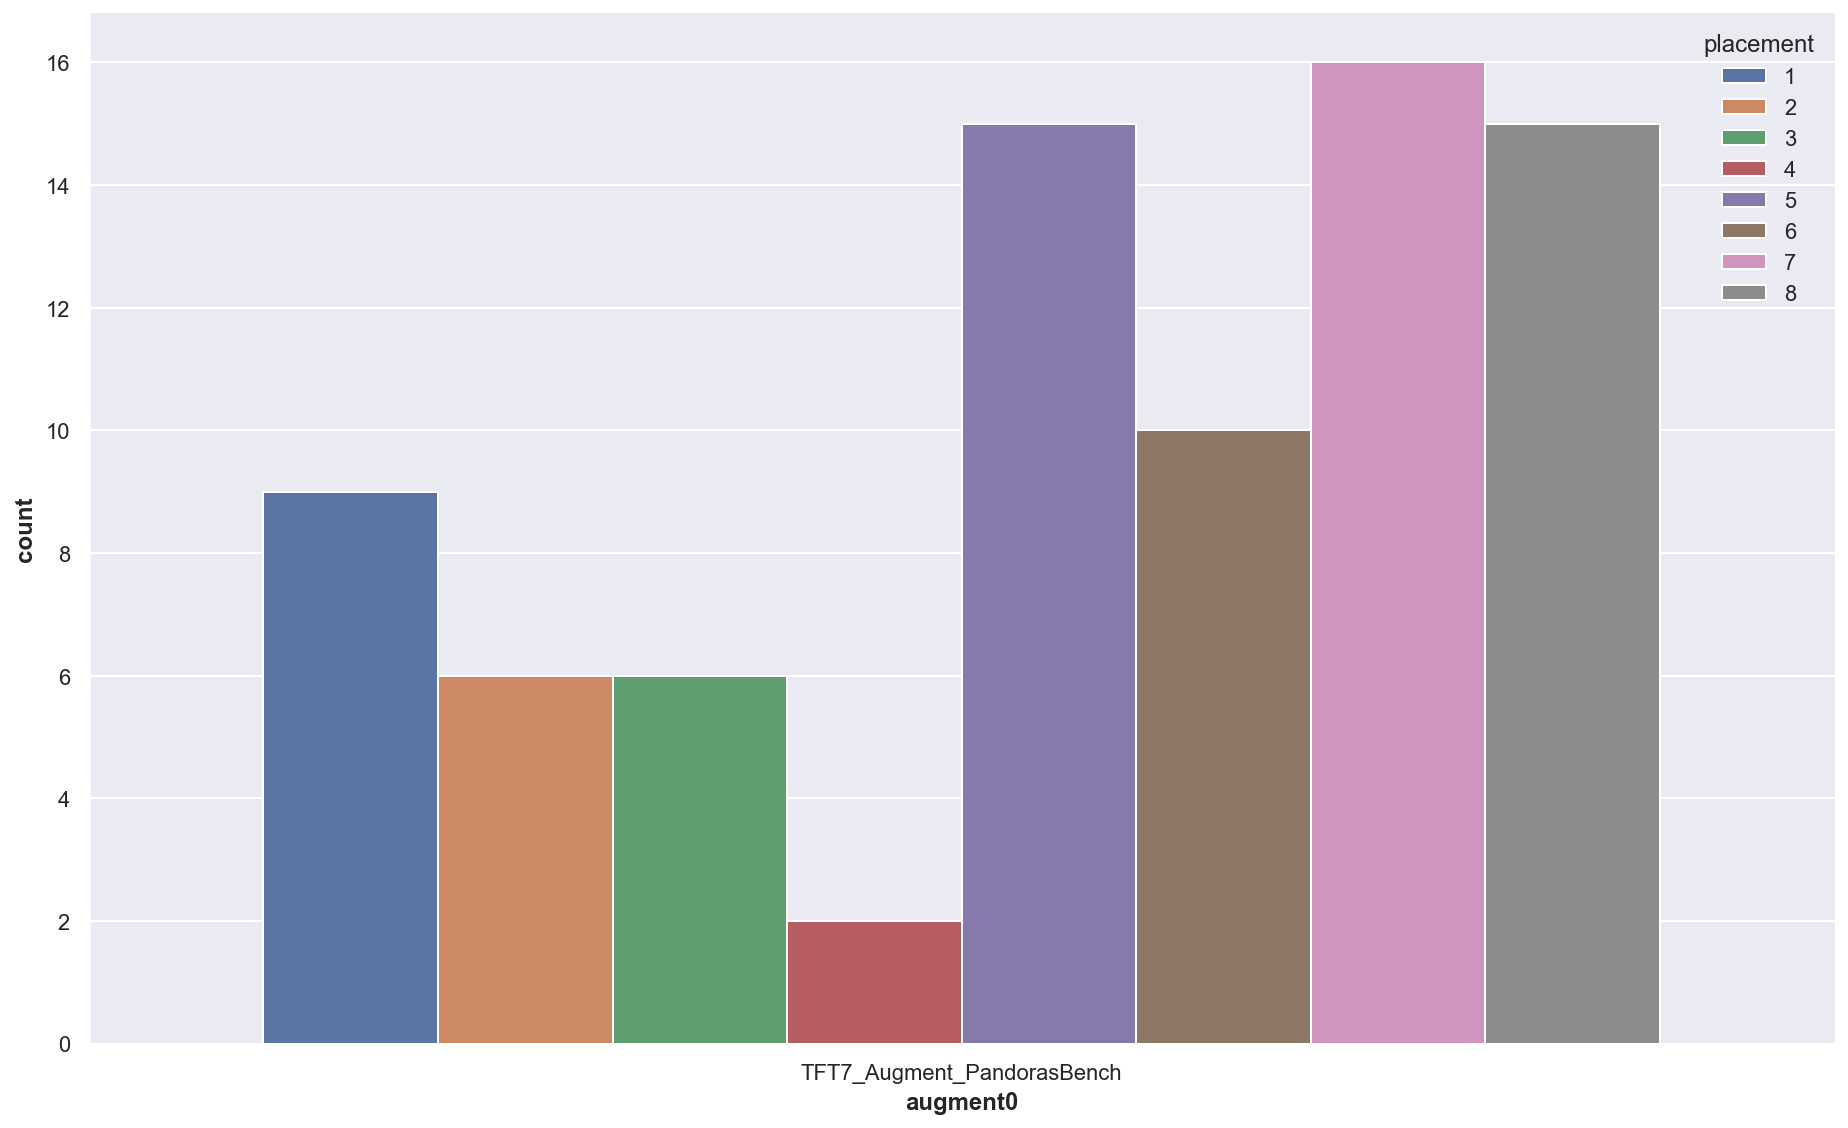

In [280]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_PandorasBench'], x='augment0', hue=TARGETNAME)
sns.despine()

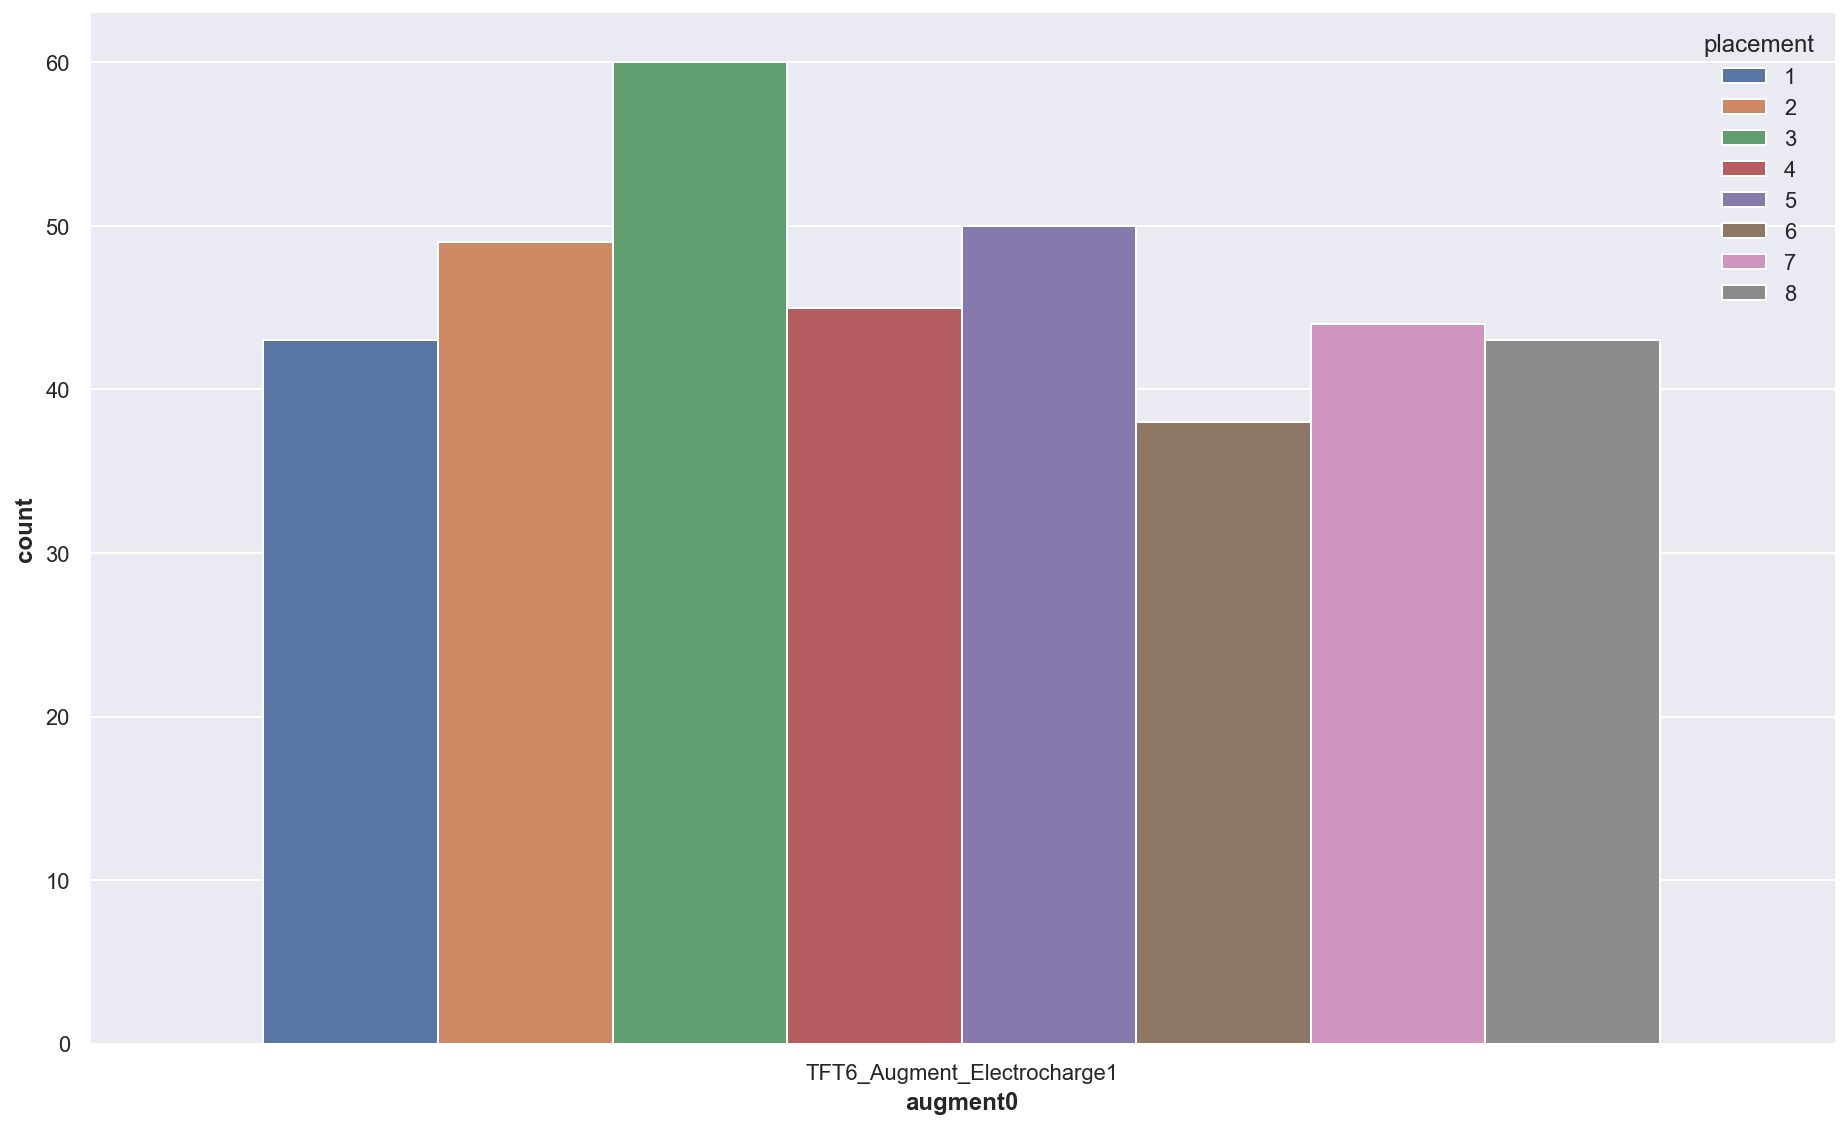

In [281]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Electrocharge1'], x='augment0', hue=TARGETNAME)
sns.despine()

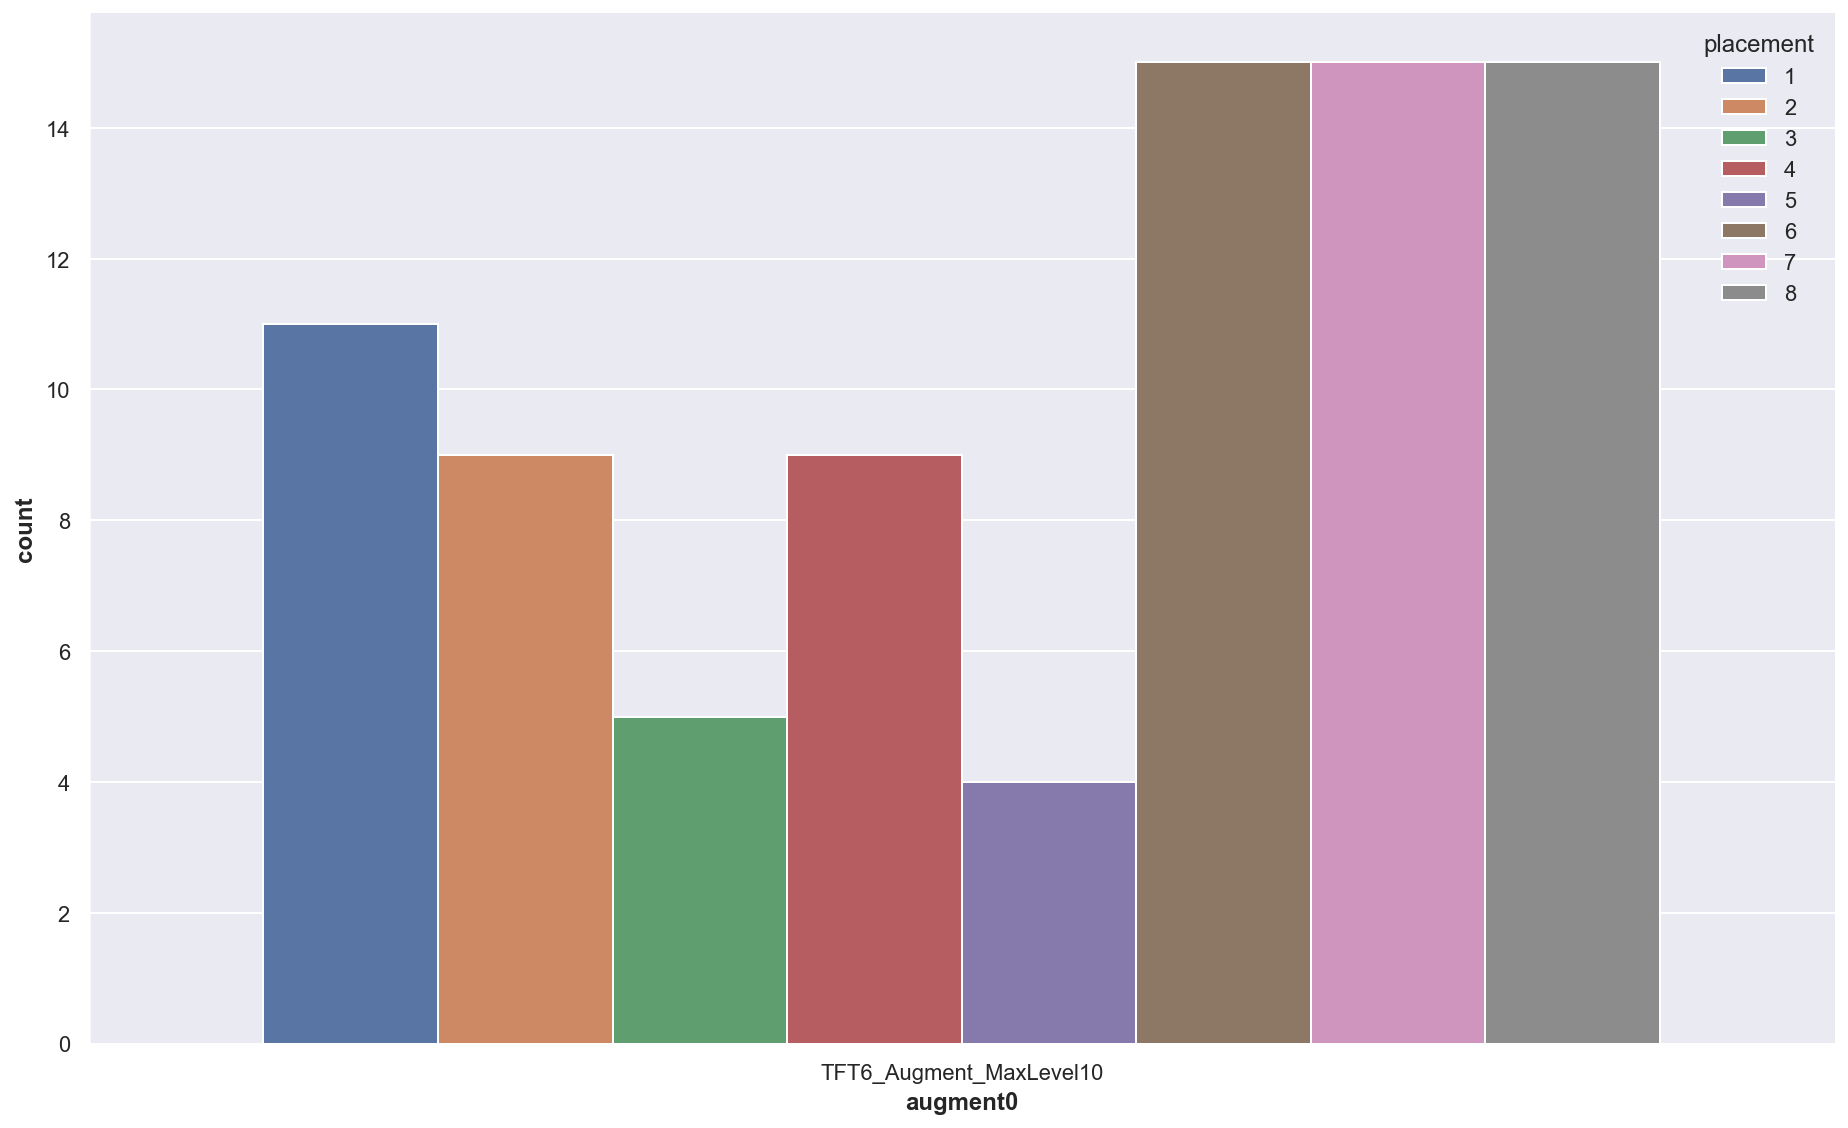

In [282]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MaxLevel10'], x='augment0', hue=TARGETNAME)
sns.despine()

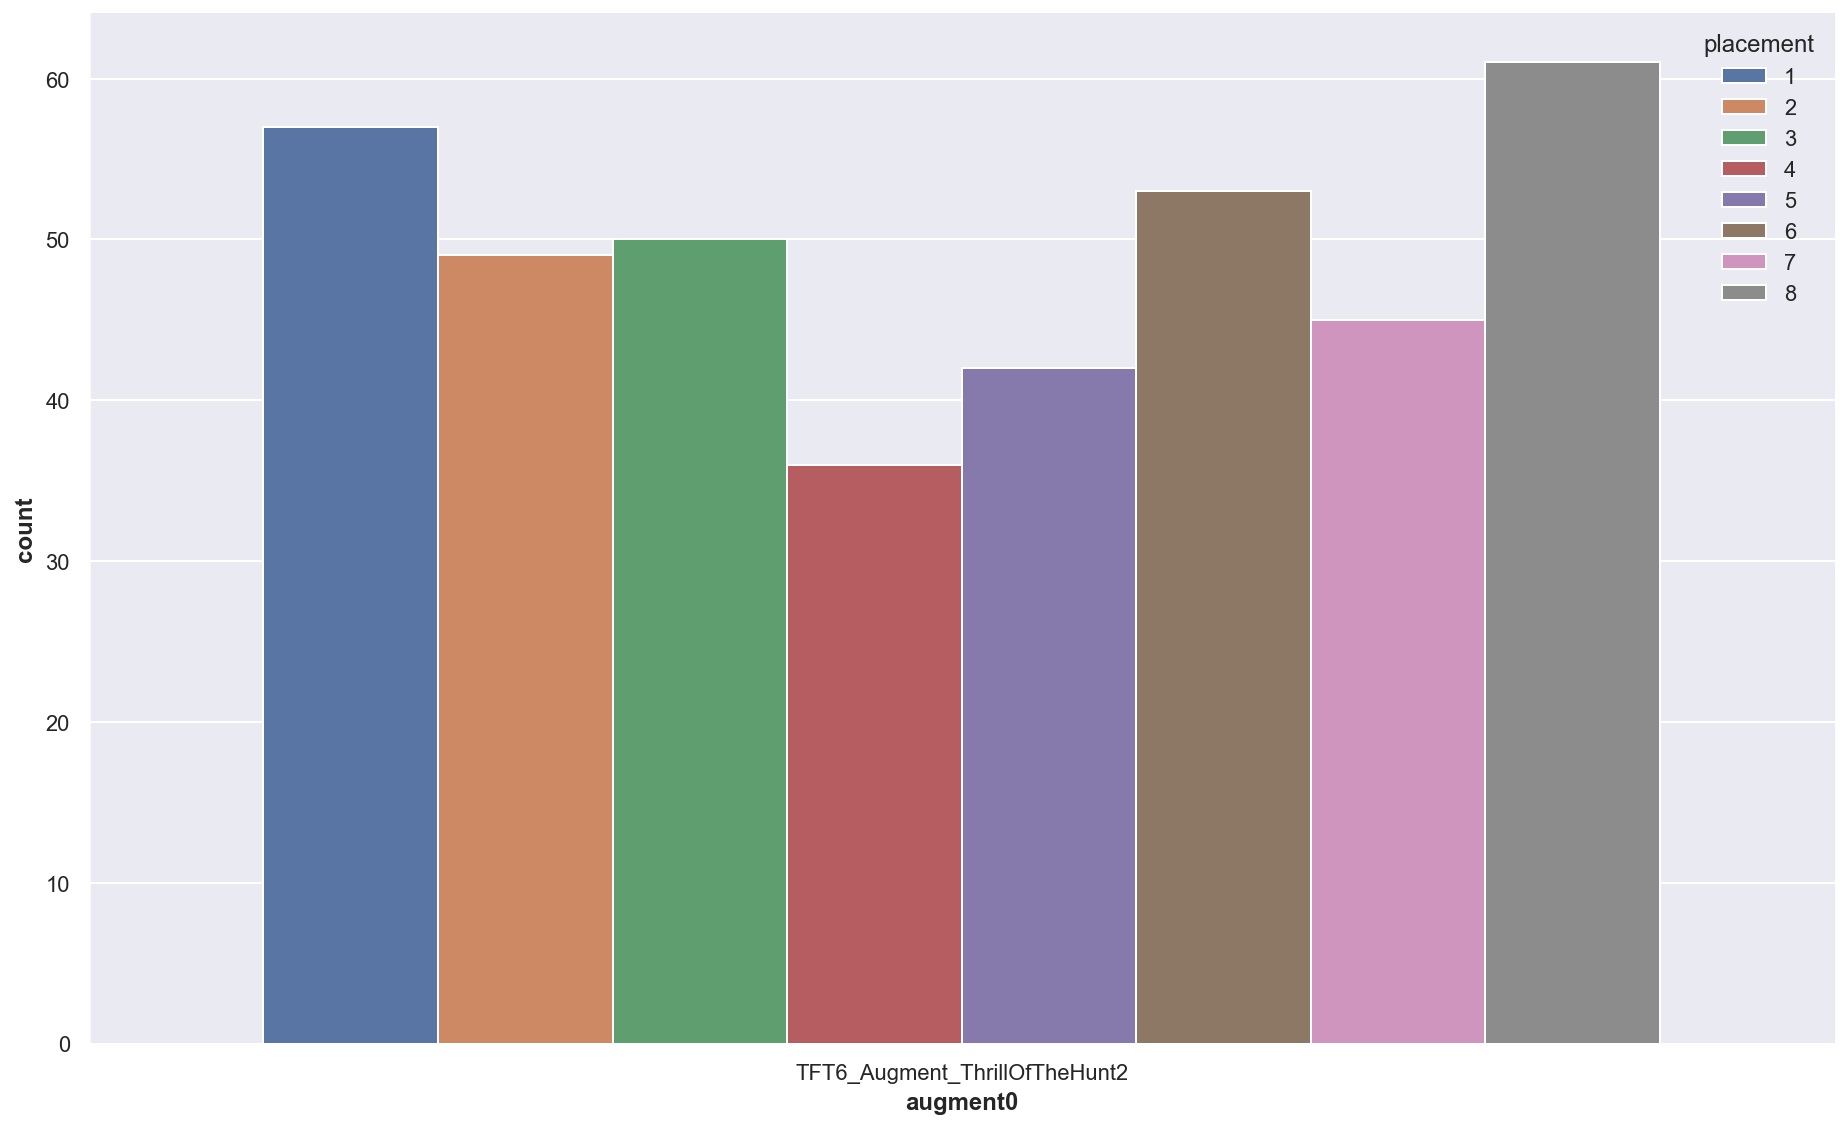

In [283]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_ThrillOfTheHunt2'], x='augment0', hue=TARGETNAME)
sns.despine()

In [284]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')
# group and aggregate mean/median
dct = {'Value_Count': ('augment0', 'count'), 'average_placement': ('placement', 'mean')}
augment0_rank_df = m.groupby('augment0', as_index=False).agg(**dct).sort_values(by='average_placement')
augment0_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\207590299.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')


augment0  Value_Count  average_placement
21                TFT6_Augment_Diversify1            3           2.000000
181            TFT7_Augment_WarriorEmblem            6           3.000000
122   TFT7_Augment_GuardianHeroicPresence            8           3.250000
155             TFT7_Augment_RevelEmblem2           68           3.352941
60                TFT6_Augment_ThriftShop           18           3.444444
22                TFT6_Augment_Diversify2            2           3.500000
133               TFT7_Augment_JadeTrait2           38           3.605263
80            TFT7_Augment_AssassinEmblem          162           3.641975
177                TFT7_Augment_ThinkFast           18           3.722222
159         TFT7_Augment_ScalescornEmblem           23           3.739130
11       TFT6_Augment_CyberneticImplants3           51           3.803922
160        TFT7_Augment_ScalescornEmblem2           15           3.866667
119             TFT7_Augment_GadgetExpert          220           3.881818
81           TFT7_Augment_AssassinEmblem2           92           3.891304
74                    TFT6_Augment_Twins2           47           3.893617
113        TFT7_Augment_DragonmancerTrait           67           3.910448
47               TFT6_Augment_Meditation3           12           3.916667
105          TFT7_Augment_CavalierEmblem2           56           3.964286
19               TFT6_Augment_Distancing2           65           3.969231
91              TFT7_Augment_BestFriends3           53           3.981132
50             TFT6_Augment_PortableForge          801           3.993758
79         TFT7_Augment_AssassinCutthroat            5           4.000000
153          TFT7_Augment_RagewingTantrum           20           4.000000
90              TFT7_Augment_BestFriends2          181           4.038674
110       TFT7_Augment_DragonmancerEmblem          120           4.100000
49             TFT6_Augment_PandorasItems          110           4.109091
172           TFT7_Augment_SwiftshotTrait           16           4.125000
100         TFT7_Augment_CannoneerHotShot          133           4.127820
83    TFT7_Augment_AstralIntercosmicGifts           23           4.130435
171  TFT7_Augment_SwiftshotPressTheAttack           92           4.141304

In [285]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')
# group and aggregate mean/median
dct = {'Value_Count': ('augment1', 'count'), 'average_placement': ('placement', 'mean')}
augment1_rank_df = m.groupby('augment1', as_index=False).agg(**dct).sort_values(by='average_placement')
augment1_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\1890264867.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')


augment1  Value_Count  average_placement
65                 TFT6_Augment_Traitless1           10           2.500000
160          TFT7_Augment_ScalescornEmblem           15           3.333333
156              TFT7_Augment_RevelEmblem2           27           3.370370
10        TFT6_Augment_CyberneticImplants2           58           3.431034
132                TFT7_Augment_JadeTrait2           44           3.454545
78            TFT7_Augment_AssassinEmblem2           30           3.466667
163     TFT7_Augment_ShapeshifterBeastsDen           36           3.500000
66                 TFT6_Augment_Traitless2            4           3.500000
153            TFT7_Augment_RagewingScorch           32           3.562500
16          TFT6_Augment_CyberneticUplink2           43           3.744186
103           TFT7_Augment_CavalierEmblem2           19           3.789474
110        TFT7_Augment_DragonmancerEmblem           96           3.791667
168         TFT7_Augment_ShimmerscaleTrait           21           3.809524
111       TFT7_Augment_DragonmancerEmblem2           54           3.833333
161         TFT7_Augment_ScalescornEmblem2           13           3.846154
102            TFT7_Augment_CavalierEmblem           50           3.920000
19                TFT6_Augment_Distancing2           56           3.964286
128                TFT7_Augment_JadeEmblem          123           3.975610
113         TFT7_Augment_DragonmancerTrait          180           3.977778
79              TFT7_Augment_AssassinTrait           48           4.000000
152           TFT7_Augment_RagewingEmblem2           11           4.000000
151            TFT7_Augment_RagewingEmblem            9           4.000000
175            TFT7_Augment_TempestEmblem2            6           4.000000
92   TFT7_Augment_BruiserPersonalTrainerHR            1           4.000000
114              TFT7_Augment_EvokerEmblem            6           4.000000
104       TFT7_Augment_CavalierForAllUnits           15           4.000000
77             TFT7_Augment_AssassinEmblem           32           4.031250
12           TFT6_Augment_CyberneticShell1           91           4.032967
121           TFT7_Augment_GuardianEmblem2           15           4.066667
72                     TFT6_Augment_Twins3           29           4.068966

In [286]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')
# group and aggregate mean/median
dct = {'Value_Count': ('augment2', 'count'), 'average_placement': ('placement', 'mean')}
augment2_rank_df = m.groupby('augment2', as_index=False).agg(**dct).sort_values(by='average_placement')
augment2_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_10360\3922423790.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')


augment2  Value_Count  average_placement
56                  TFT6_Augment_Traitless3            1           1.000000
55                  TFT6_Augment_Traitless2            3           2.000000
57                   TFT6_Augment_TriForce2            6           3.333333
125               TFT7_Augment_MysticTrait2            2           3.500000
85   TFT7_Augment_CavalierDevastatingCharge           20           3.550000
141          TFT7_Augment_ShapeshifterTrait           15           3.666667
130             TFT7_Augment_RagewingScorch          150           3.693333
132              TFT7_Augment_RagewingTrait            4           3.750000
72                TFT7_Augment_BestFriends2          367           3.782016
148           TFT7_Augment_SwiftshotEmblem2           14           3.785714
51                TFT6_Augment_TheGoldenEgg          134           3.798507
143         TFT7_Augment_ShimmerscaleEmblem           12           3.833333
39                 TFT6_Augment_Meditation1           33           3.878788
64             TFT7_Augment_AssassinEmblem2           29           3.896552
163            TFT7_Augment_WhispersEmblem2           15           3.933333
2               TFT6_Augment_BandOfThieves2           67           3.970149
133               TFT7_Augment_RevelEmblem2           35           3.971429
24             TFT6_Augment_Featherweights1            2           4.000000
60                    TFT6_Augment_Weakspot          139           4.014388
10         TFT6_Augment_CyberneticImplants2          350           4.020000
115                 TFT7_Augment_JadeTrait2           31           4.032258
78      TFT7_Augment_BruiserTitanicStrength          138           4.036232
11         TFT6_Augment_CyberneticImplants3           97           4.041237
16           TFT6_Augment_CyberneticUplink2          297           4.047138
87             TFT7_Augment_CavalierEmblem2           21           4.047619
5           TFT6_Augment_CelestialBlessing1           96           4.052083
75                  TFT7_Augment_BigFriend2          200           4.075000
74                   TFT7_Augment_BigFriend           38           4.105263
158               TFT7_Augment_UrfsGrabBag2          137           4.116788
140      TFT7_Augment_ShapeshifterBeastsDen           95           4.136842

# Baseline Model

In [287]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [288]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=250) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [289]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [290]:
# augment_oe.fit(X[categorical_cols[:3]])

In [291]:
# item_oe.fit(X[categorical_cols[3:]])

In [292]:
# Encode category columns.
logistic_regression_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    ),
    xgb,
)

In [293]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Shen_item0',
                                                   'TFT7_Hecarim_item0',
                                                   'TFT7_Hecarim_item1',
                                                   'TFT7_Talon_item0',
                                                   'TFT7_Talon_item1',
                                                   'TFT7_Xayah_item0',
                                                   'TFT7_Xayah_item1',
                                                   'TFT7_Xayah_item...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=250, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [294]:
y_pred = logistic_regression_pipeline.predict(X_test)

In [295]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [296]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [297]:
len(y_test)

2734

In [298]:
y_pred.shape

(2734,)

In [299]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

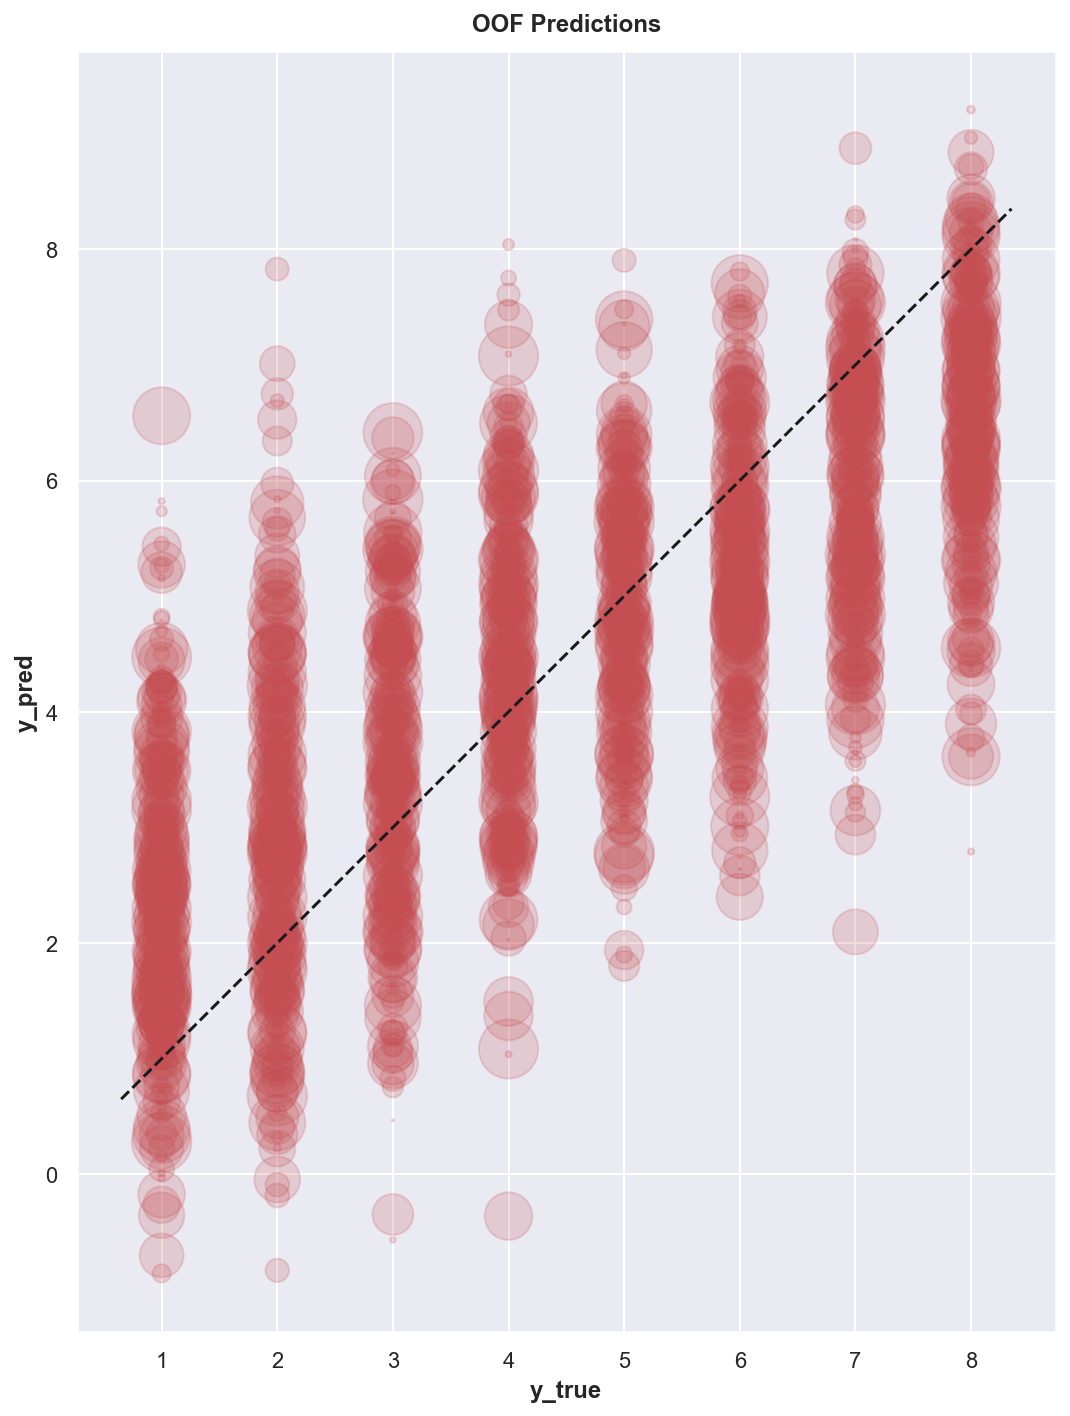

In [300]:
plot_oof(y_test, y_pred)

In [301]:
min(y_pred)

-0.85726845

In [302]:
mean_absolute_error(y_test, y_pred)

1.2050261

In [303]:
mean_squared_error(y_test, y_pred)

2.30569

# mdi_importances

In [304]:
feature_names = logistic_regression_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    logistic_regression_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

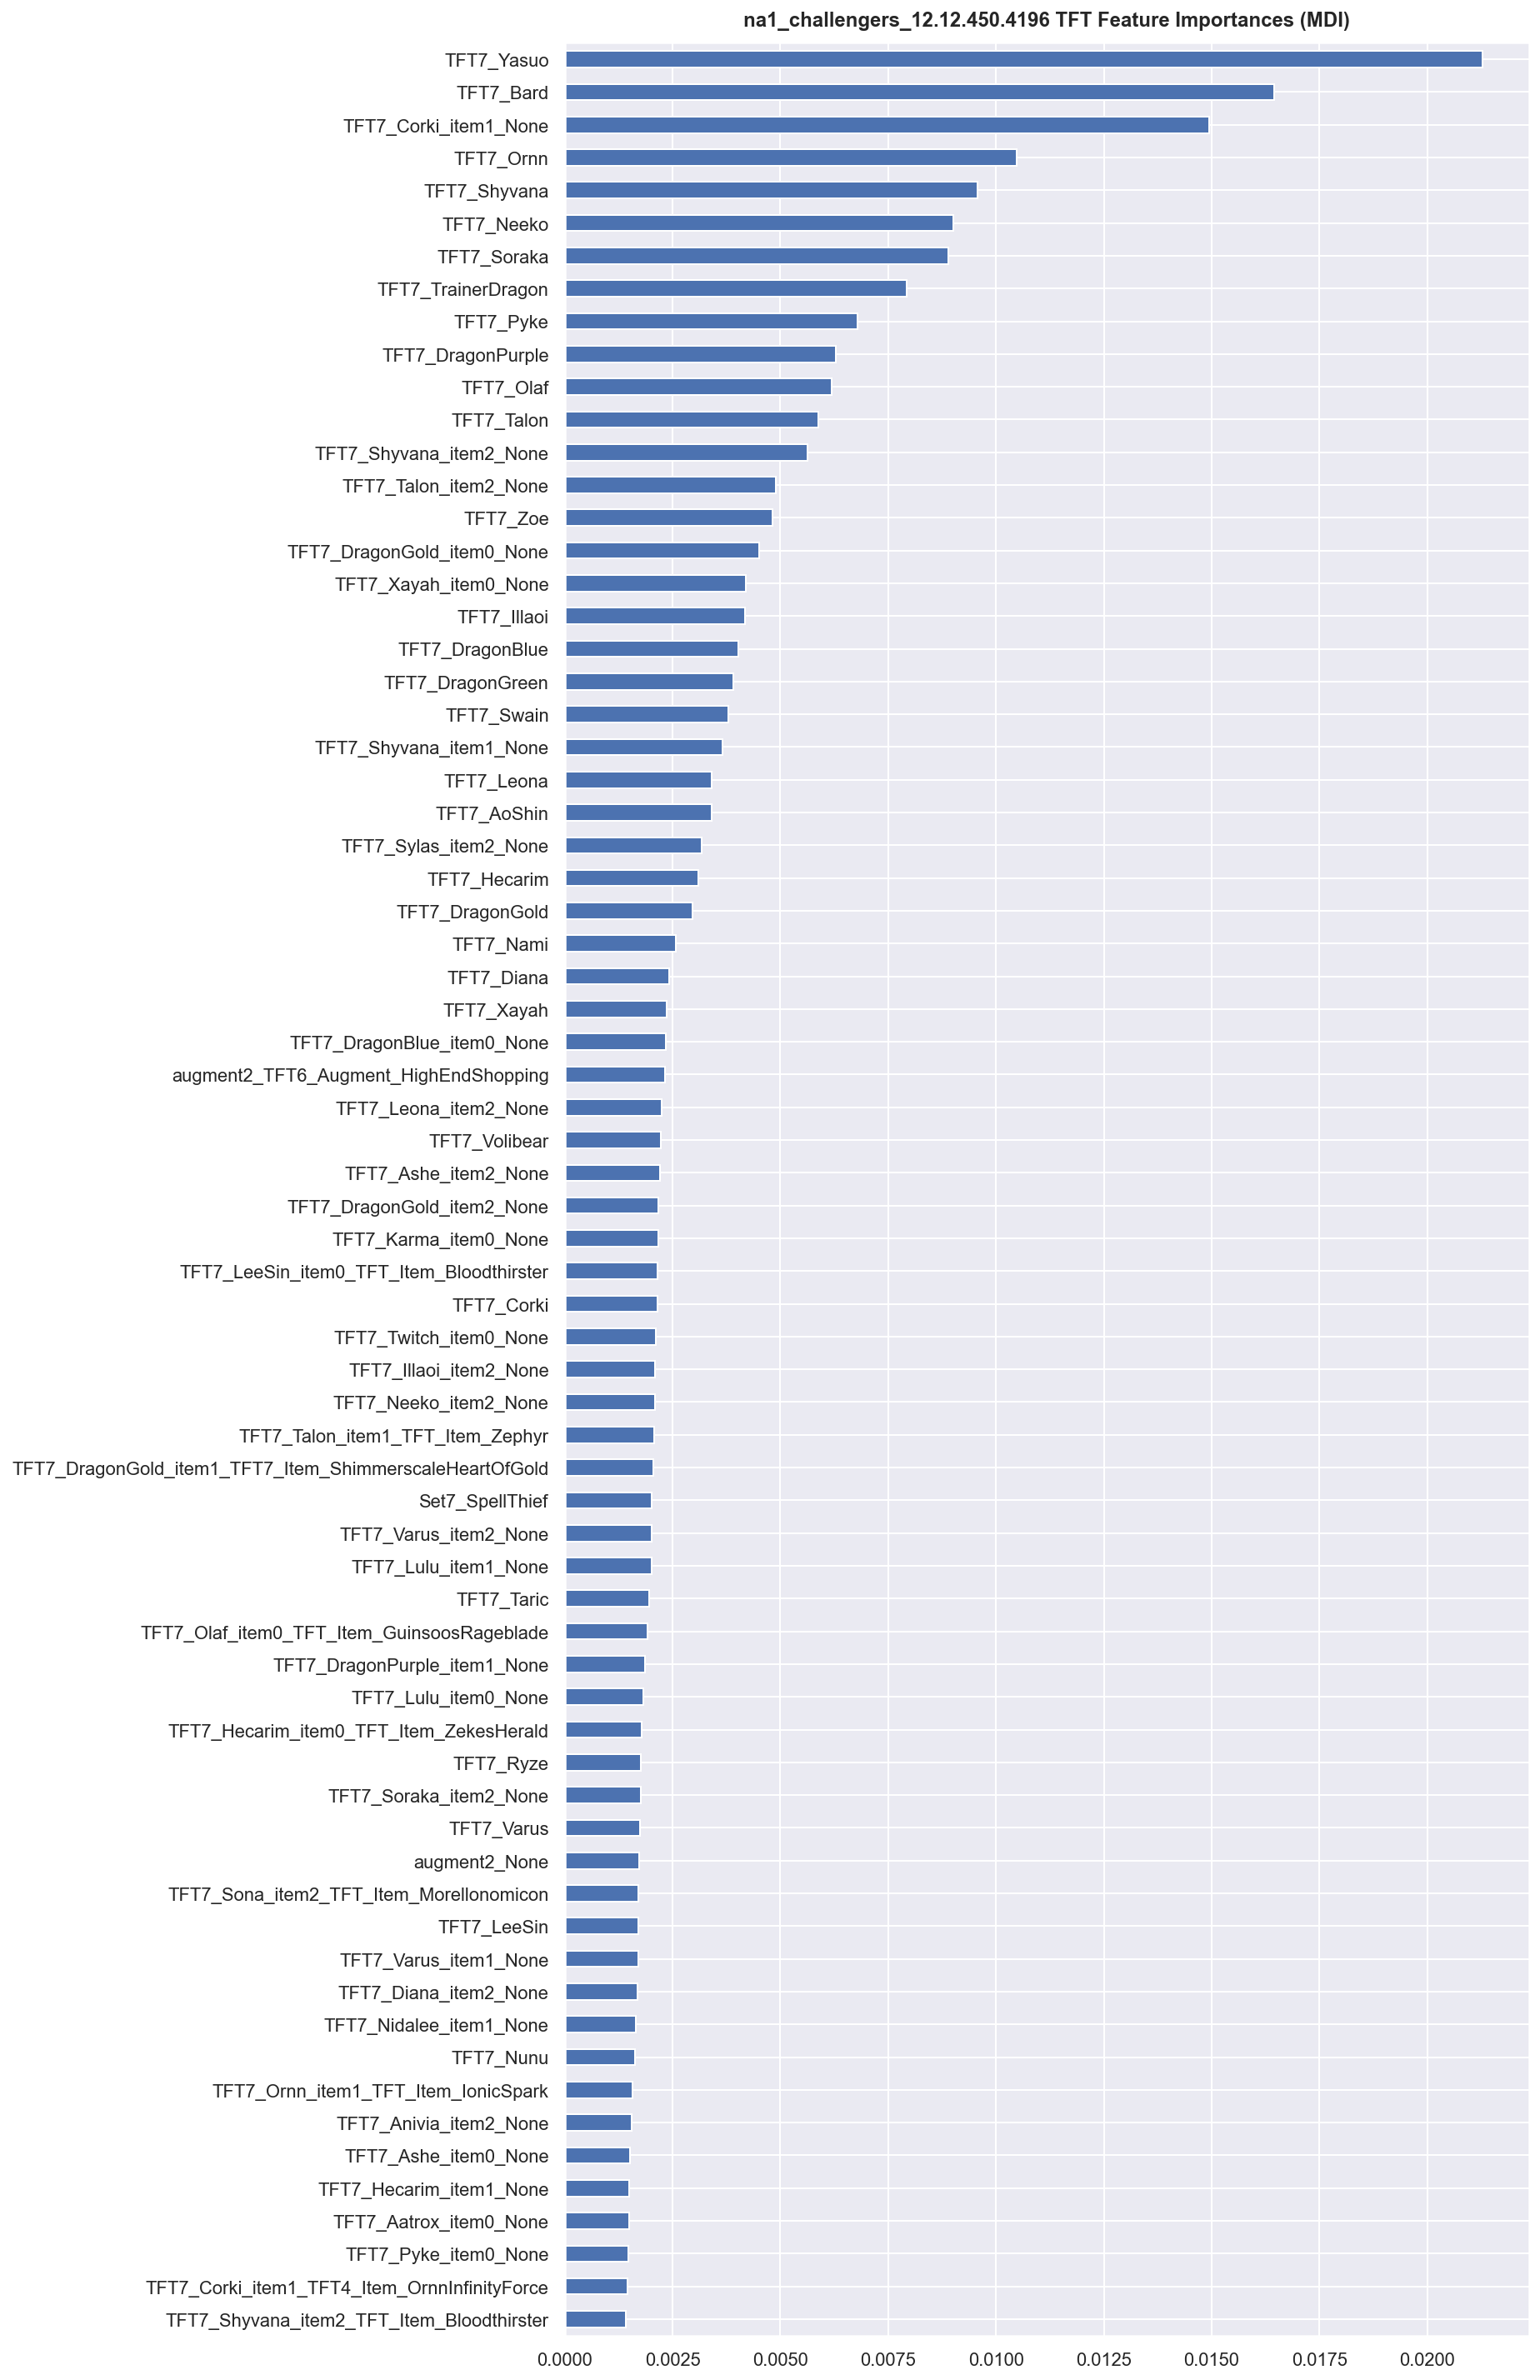

In [305]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [306]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_mdi_importances.csv'))

In [307]:
mdi_importances[-60:]

TFT7_Diana_item2_None                                      0.001680
TFT7_Varus_item1_None                                      0.001699
TFT7_LeeSin                                                0.001707
TFT7_Sona_item2_TFT_Item_Morellonomicon                    0.001711
augment2_None                                              0.001721
TFT7_Varus                                                 0.001739
TFT7_Soraka_item2_None                                     0.001762
TFT7_Ryze                                                  0.001767
TFT7_Hecarim_item0_TFT_Item_ZekesHerald                    0.001782
TFT7_Lulu_item0_None                                       0.001817
TFT7_DragonPurple_item1_None                               0.001851
TFT7_Olaf_item0_TFT_Item_GuinsoosRageblade                 0.001911
TFT7_Taric                                                 0.001961
TFT7_Lulu_item1_None                                       0.002009
TFT7_Varus_item2_None                           